In [1]:
import warnings
import matplotlib
import pandas as pd
import datetime
import numpy as np
import pickle
import csep
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from cartopy.io import img_tiles
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
import shapefile
from csep.models import Polygon
from matplotlib import gridspec
from csep.models import EvaluationResult
import scipy
import numpy
from csep.utils import time_utils
from csep.core import poisson_evaluations as poisson
from csep.utils.stats import poisson_joint_log_likelihood_ndarray
import datetime
from typing import Optional, Union, Sequence, Any, Tuple, List
from csep.core import binomial_evaluations as binomial
from csep.core import catalogs
from csep.utils import plots
import cartopy.crs as ccrs
from matplotlib.dates import AutoDateLocator, DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats
import math
from csep.core.forecasts import GriddedForecast
from csep.core.regions import CartesianGrid2D
from matplotlib.ticker import FormatStrFormatter
import geopandas as gpd

In [2]:
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.family'] = 'Arial'

#### Available forecast dates

In [3]:
# Mw 3.95+ earthquake forecasting models
ETAS = pd.read_csv('preprocessed_inputs/ETAS/ETAS_dates.csv', sep=',', header=0)
ETASv1 = pd.read_csv('preprocessed_inputs/ETASv1/ETASv1_dates.csv', sep=',', header=0)
ETAS_DROneDayMd2 = pd.read_csv('preprocessed_inputs/ETAS_DROneDayMd2/ETAS_DROneDayMd2_dates.csv', sep=',', header=0)
ETAS_DROneDayMd3 = pd.read_csv('preprocessed_inputs/ETAS_DROneDayMd3/ETAS_DROneDayMd3_dates.csv', sep=',', header=0)
ETAS_HWMd2 = pd.read_csv('preprocessed_inputs/ETAS_HWMd2/ETAS_HWMd2_dates.csv', sep=',', header=0)
ETAS_HWMd3 = pd.read_csv('preprocessed_inputs/ETAS_HWMd3/ETAS_HWMd3_dates.csv', sep=',', header=0)
ETAS_DROneDayMd295 = pd.read_csv('preprocessed_inputs/ETAS_DROneDayMd295/ETAS_DROneDayMd295_dates.csv', sep=',', header=0)
ETASSYN_DROneDayMd295 = pd.read_csv('preprocessed_inputs/ETASSYN_DROneDayMd295/ETASSYN_DROneDayMd295_dates.csv', sep=',', header=0)

STEP = pd.read_csv('preprocessed_inputs/STEP/STEP_dates.csv', sep=',', header=0)
STEPJAVA = pd.read_csv('preprocessed_inputs/STEPJAVA/STEPJAVA_dates.csv', sep=',', header=0)

HKJ = pd.read_csv('preprocessed_inputs/ETAS/ETAS_dates.csv', sep=',', header=0)
KJSSOneDayCalifornia = pd.read_csv('preprocessed_inputs/KJSSOneDayCalifornia/KJSSOneDayCalifornia_dates.csv', sep=',', header=0)
ETAS_DROneDayPPEMd2 = pd.read_csv('preprocessed_inputs/ETAS_DROneDayPPEMd2/ETAS_DROneDayPPEMd2_dates.csv', sep=',', header=0)
ETAS_DROneDayPPEMd3 = pd.read_csv('preprocessed_inputs/ETAS_DROneDayPPEMd3/ETAS_DROneDayPPEMd3_dates.csv', sep=',', header=0)

K3Md2 = pd.read_csv('preprocessed_inputs/K3Md2/K3Md2_dates.csv', sep=',', header=0)
K3Md3 = pd.read_csv('preprocessed_inputs/K3Md3/K3Md3_dates.csv', sep=',', header=0)
GSF_ISO = pd.read_csv('preprocessed_inputs/GSF_ISO/GSF_ISO_number_counts.csv', sep=',', header=0)
GSF_ANISO = pd.read_csv('preprocessed_inputs/GSF_ANISO/GSF_ANISO_number_counts.csv', sep=',', header=0)

OneDayBayesianBMA = pd.read_csv('preprocessed_inputs/OneDayBayesianBMA/OneDayBayesianBMA_dates.csv', sep=',', header=0)
OneDayBayesianSeqBMA = pd.read_csv('preprocessed_inputs/OneDayBayesianSeqBMA/OneDayBayesianSeqBMA_dates.csv', sep=',', header=0)
ETAS_HW_K3_AVERAGE_Md2 = pd.read_csv('preprocessed_inputs/ETAS_HW_K3_AVERAGE_Md2/ETAS_HW_K3_AVERAGE_Md2_dates.csv', sep=',', header=0)
ETAS_HW_K3_AVERAGE_Md3 = pd.read_csv('preprocessed_inputs/ETAS_HW_K3_AVERAGE_Md3/ETAS_HW_K3_AVERAGE_Md3_dates.csv', sep=',', header=0)

# Mw 4.95+ earthquake forecasting models 
KJSSFiveYearCalifornia = pd.read_csv('preprocessed_inputs/KJSSFiveYearCalifornia/KJSSFiveYearCalifornia_dates.csv', sep=',', header=0)
JANUSOneDayEEPAS1F = pd.read_csv('preprocessed_inputs/JANUSOneDayEEPAS1F/JANUSOneDayEEPAS1F_dates.csv', sep=',', header=0)
JANUSOneDayPPE = pd.read_csv('preprocessed_inputs/JANUSOneDayPPE/JANUSOneDayPPE_dates.csv', sep=',', header=0)

JANUSOneDay = pd.read_csv('preprocessed_inputs/JANUSOneDay/JANUSOneDay_dates.csv', sep=',', header=0)
SE2OneDay = pd.read_csv('preprocessed_inputs/SE2OneDay/SE2OneDay_dates.csv', sep=',', header=0)

JANUSOneDayTV = pd.read_csv('preprocessed_inputs/JANUSOneDayTV/JANUSOneDayTV_dates.csv', sep=',', header=0)

In [4]:
HKJ5 = pd.DataFrame()
HKJ5['date'] = HKJ.date.values

In [5]:
models = [HKJ, ETAS, STEP, KJSSOneDayCalifornia, STEPJAVA, OneDayBayesianBMA, OneDayBayesianSeqBMA,
         ETASv1, KJSSFiveYearCalifornia, ETAS_DROneDayMd2, ETAS_DROneDayMd3, ETAS_DROneDayPPEMd2,
         ETAS_DROneDayPPEMd3, ETAS_HWMd2, ETAS_HWMd3, ETAS_HW_K3_AVERAGE_Md2, ETAS_HW_K3_AVERAGE_Md3,
         JANUSOneDay, JANUSOneDayEEPAS1F, JANUSOneDayPPE, JANUSOneDayTV, K3Md2, K3Md3, SE2OneDay,
         ETAS_DROneDayMd295, ETASSYN_DROneDayMd295, GSF_ISO, GSF_ANISO]

In [6]:
def format_dates(forecast_dates):
    
    aux = []
    for i in range(len(forecast_dates)):
        aux.append(datetime.datetime.strptime(forecast_dates.date[i], '%Y-%m-%d'))
    
    return aux    

In [7]:
forecast_dates = []

for i in range(len(models)):
    forecast_dates.append(format_dates(models[i]))

#### Prospective earthquake catalogue:

In [8]:
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)

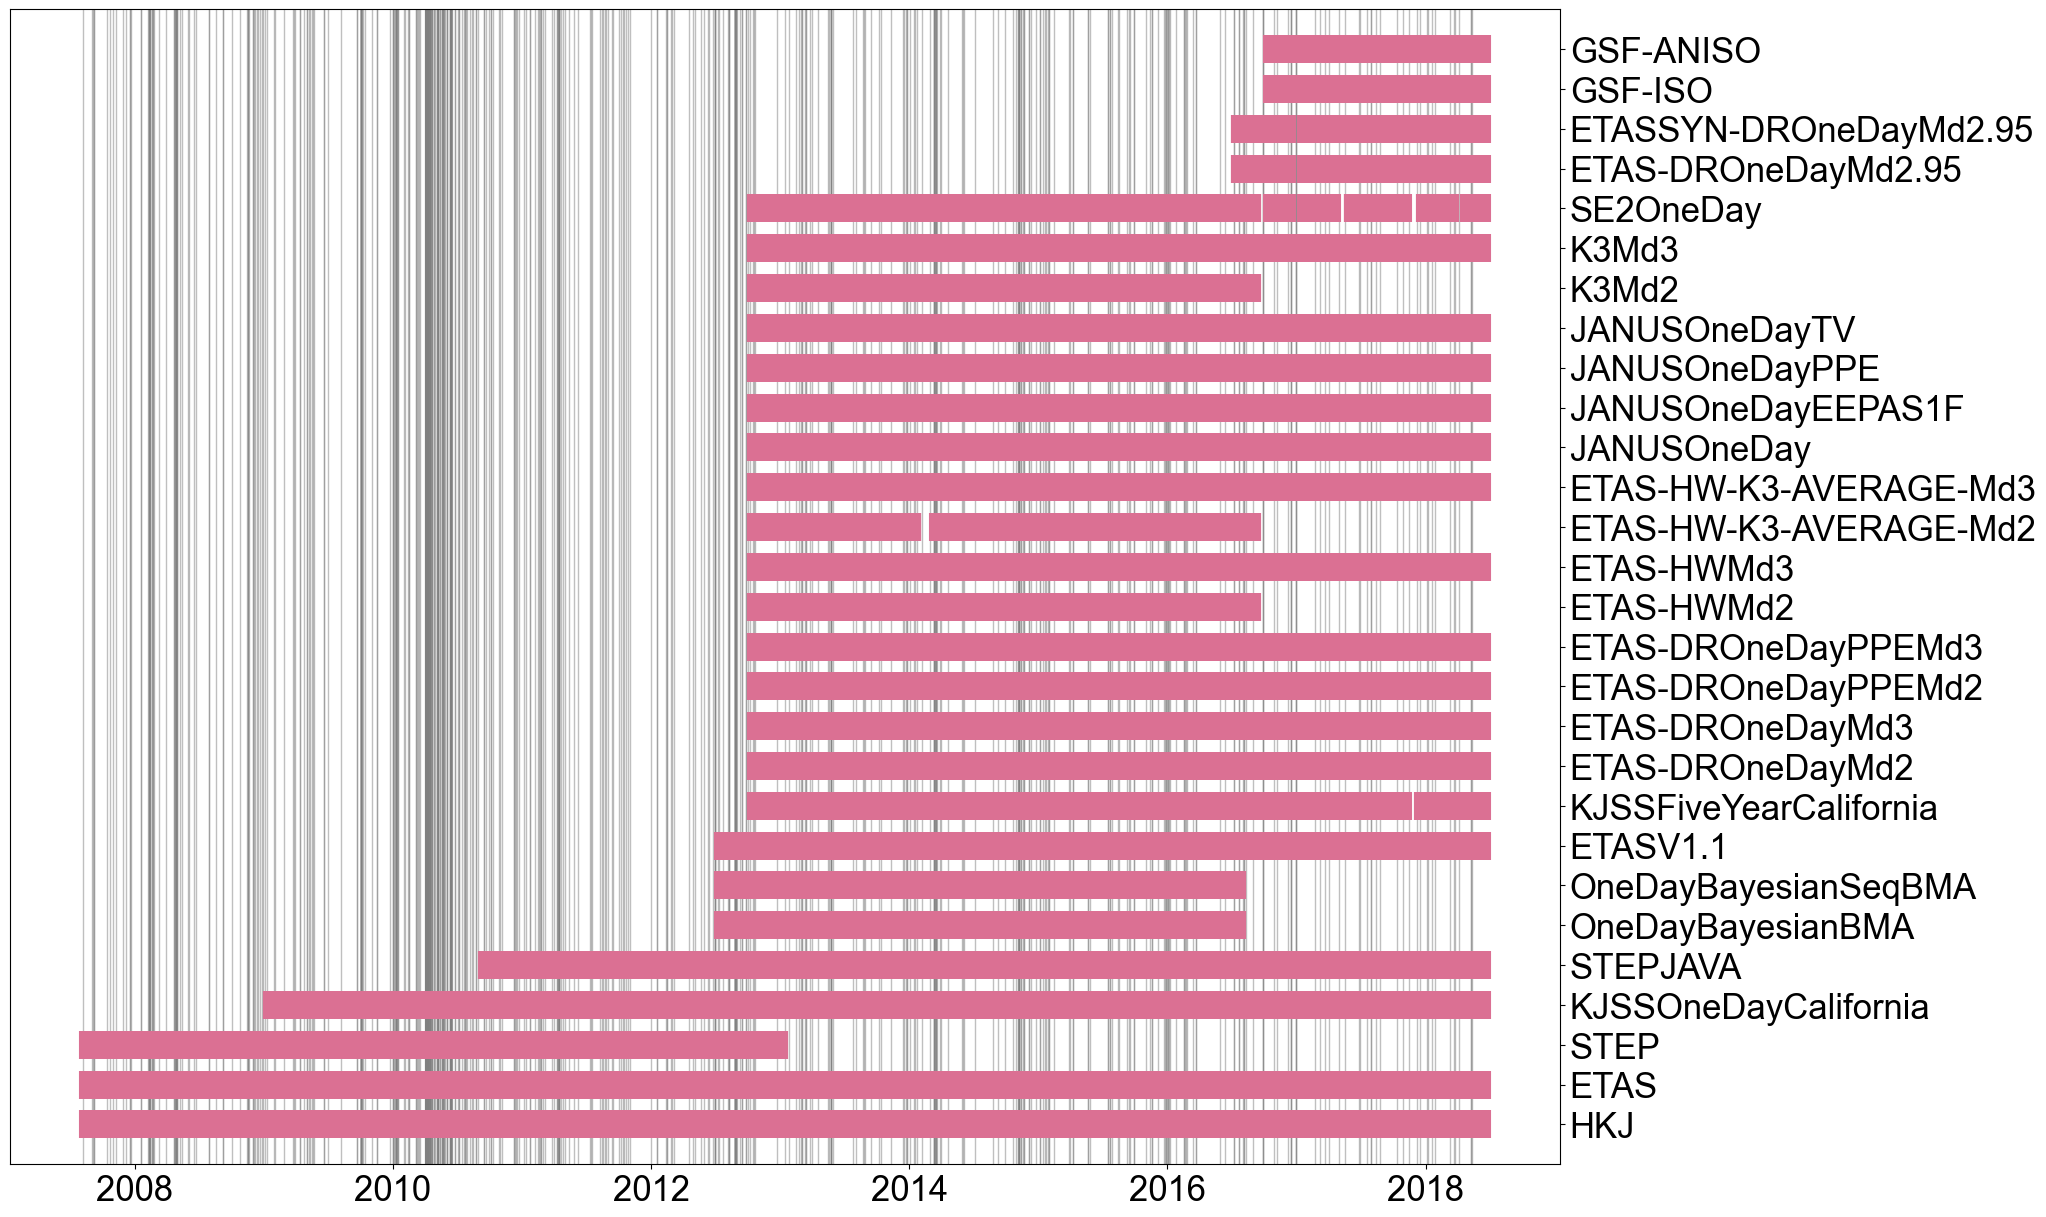

In [9]:
fig, ax = plt.subplots(figsize=(20, 15))

for i in range(len(catalogue.get_datetimes())):
    ax.axvline(catalogue.get_datetimes()[i], color='grey', linewidth=1, zorder=0, alpha=0.5)  

n = np.arange(0, len(forecast_dates))    
for i in range(len(forecast_dates)):
    plt.scatter(forecast_dates[i], np.ones(len(forecast_dates[i])) * n[i], s=20**2, marker="|",color="palevioletred")
    
models = ['HKJ', 'ETAS', 'STEP', 'KJSSOneDayCalifornia', 'STEPJAVA', 'OneDayBayesianBMA', 'OneDayBayesianSeqBMA', 
          'ETASV1.1', 'KJSSFiveYearCalifornia','ETAS-DROneDayMd2','ETAS-DROneDayMd3',
          'ETAS-DROneDayPPEMd2', 'ETAS-DROneDayPPEMd3',
          'ETAS-HWMd2', 'ETAS-HWMd3', 'ETAS-HW-K3-AVERAGE-Md2', 'ETAS-HW-K3-AVERAGE-Md3',
          'JANUSOneDay', 'JANUSOneDayEEPAS1F', 'JANUSOneDayPPE', 'JANUSOneDayTV',
          'K3Md2', 'K3Md3', 'SE2OneDay', 'ETAS-DROneDayMd2.95', 'ETASSYN-DROneDayMd2.95',
          'GSF-ISO', 'GSF-ANISO']

ax.yaxis.tick_right() 
plt.yticks(np.arange(28), models, fontsize=25)
ax.set_xticklabels(['', '2008', '2010', '2012', '2014', '2016', '2018' ], fontsize=25)
ax.set_ylim(-1, 28)
plt.savefig('expected_outputs/FigureS1.png', dpi=150, bbox_inches='tight')

#### Some forecast maps:

In [10]:
duration_d = (max(forecast_dates[0]) - min(forecast_dates[0])) # in days
f1 = 1.0 / (365.25 * 5.0)
f2 = 1.0 / (10**(-0.95 *(5.95 - 4.95)))

mw_min = 3.95
mw_min2 = 4.95
mw_max = 8.95
dmw = 0.1
mws = np.arange(mw_min, mw_max+dmw/2, dmw)
mws2 = np.arange(mw_min2, mw_max+dmw/2, dmw)
seed = 123456

In [11]:
# Mw >= 3.95 earthquake forecasting models
ETAS_example = pd.read_csv('data/forecasts/ETAS_fexample.csv', sep=',', header=0)
ETASv1_example = pd.read_csv('data/forecasts/ETASv1_fexample.csv', sep=',', header=0)
ETAS_DROneDayMd2_example = pd.read_csv('data/forecasts/ETAS_DROneDayMd2_fexample.csv', sep=',', header=0)
ETAS_DROneDayMd3_example = pd.read_csv('data/forecasts/ETAS_DROneDayMd3_fexample.csv', sep=',', header=0)
ETAS_HWMd2_example = pd.read_csv('data/forecasts/ETAS_HWMd2_fexample.csv', sep=',', header=0)
ETAS_HWMd3_example = pd.read_csv('data/forecasts/ETAS_HWMd3_fexample.csv', sep=',', header=0)
ETAS_DROneDayM295_example = pd.read_csv('data/forecasts/ETAS_DROneDayM295_fexample.csv', sep=',', header=0)
ETASSYN_DROneDayM295_example = pd.read_csv('data/forecasts/ETASSYN_DROneDayM295_fexample.csv', sep=',', header=0)

STEP_example = pd.read_csv('data/forecasts/STEP_fexample.csv', sep=',', header=0)
STEPJAVA_example = pd.read_csv('data/forecasts/STEPJAVA_fexample.csv', sep=',', header=0)

HKJ4_example = pd.read_csv('data/forecasts/HKJ4_fexample.csv', sep=',', header=0)
KJSSOneDayCalifornia_example = pd.read_csv('data/forecasts/KJSSOneDayCalifornia_fexample.csv', sep=',', header=0)
ETAS_DROneDayPPEMd2_example = pd.read_csv('data/forecasts/ETAS_DROneDayPPEMd2_fexample.csv', sep=',', header=0)
ETAS_DROneDayPPEMd3_example = pd.read_csv('data/forecasts/ETAS_DROneDayPPEMd3_fexample.csv', sep=',', header=0)

K3Md2_example = pd.read_csv('data/forecasts/K3Md2_fexample.csv', sep=',', header=0)
K3Md3_example = pd.read_csv('data/forecasts/K3Md3_fexample.csv', sep=',', header=0)
GSF_ISO_example = pd.read_csv('data/forecasts/GSF_ISO_fexample.csv', sep=',', header=0)
GSF_ANISO_example = pd.read_csv('data/forecasts/GSF_ANISO_fexample.csv', sep=',', header=0)

OneDayBayesianBMA_example =  pd.read_csv('data/forecasts/OneDayBayesianBMA_fexample.csv', sep=',', header=0)
OneDayBayesianSeqBMA_example =  pd.read_csv('data/forecasts/OneDayBayesianSeqBMA_fexample.csv', sep=',', header=0)
ETAS_HW_K3_AVERAGE_Md2_example =  pd.read_csv('data/forecasts/ETAS_HW_K3_AVERAGE_Md2_fexample.csv', sep=',', header=0)
ETAS_HW_K3_AVERAGE_Md3_example =  pd.read_csv('data/forecasts/ETAS_HW_K3_AVERAGE_Md3_fexample.csv', sep=',', header=0)

# Mw >= 4.95 earthquake forecasting models
HKJ5_example = pd.read_csv('data/forecasts/HKJ5_fexample.csv', sep=',', header=0)
KJSSFiveYearCalifornia_example = pd.read_csv('data/forecasts/KJSSFiveYearCalifornia_fexample.csv', sep=',', header=0)
JANUSOneDayEEPAS1F_example = pd.read_csv('data/forecasts/JANUSOneDayEEPAS1F_fexample.csv', sep=',', header=0)
JANUSOneDayPPE_example = pd.read_csv('data/forecasts/JANUSOneDayPPE_fexample.csv', sep=',', header=0)

JANUSOneDay_example = pd.read_csv('data/forecasts/JANUSOneDay_fexample.csv', sep=',', header=0)
SE2OneDay_example = pd.read_csv('data/forecasts/SE2OneDay_fexample.csv', sep=',', header=0)

JANUSOneDayTV_example = pd.read_csv('data/forecasts/JANUSOneDayTV_fexample.csv', sep=',', header=0)

In [12]:
california_region = csep.core.regions.california_relm_region(dh_scale=1, magnitudes=mws, use_midpoint=True)
ptsC = california_region.tight_bbox()
dh = 0.1

In [13]:
# Users could download the United States Quaternary Fault and Fold database and plot it in Figs. 1, 2, 6, and S2 (see the "expected_output" folder).

# This database can be found at https://www.usgs.gov/programs/earthquake-hazards/faults
# Users should extract all in the files from the downloaded zip folder and store them in a folder ("others" in this example).

# faults_USGS = gpd.read_file('others/Qfaults_US_Database.shp')
# faults_USGS = faults_USGS.to_crs(4326)

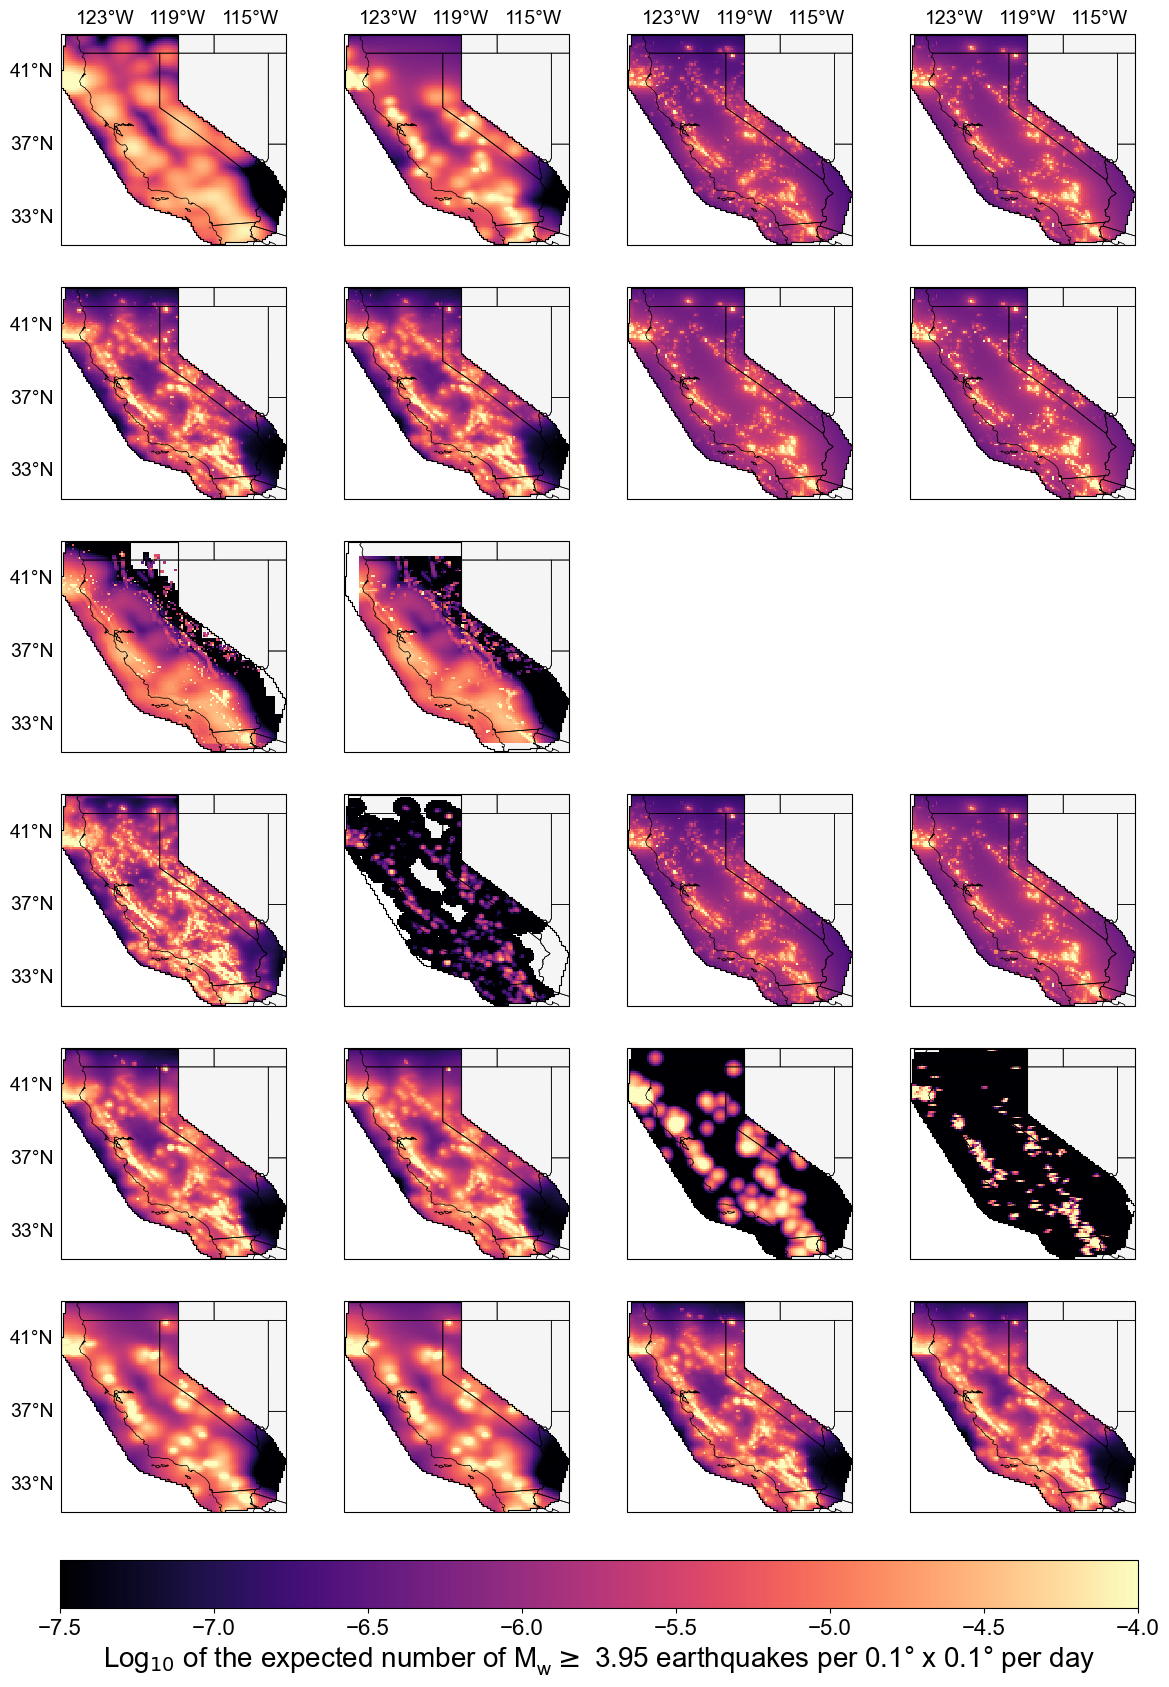

In [14]:
fig = plt.figure(figsize=(14, 19.2))


forecast_4ex = ['', ETAS_example, ETASv1_example, ETAS_DROneDayMd2_example, ETAS_DROneDayMd3_example,
                ETAS_HWMd2_example, ETAS_HWMd3_example, ETAS_DROneDayM295_example, ETASSYN_DROneDayM295_example,
                STEP_example, STEPJAVA_example, '', '',
                HKJ4_example, KJSSOneDayCalifornia_example, ETAS_DROneDayPPEMd2_example, ETAS_DROneDayPPEMd3_example,
                K3Md2_example, K3Md3_example, GSF_ISO_example, GSF_ANISO_example,
                OneDayBayesianBMA_example, OneDayBayesianSeqBMA_example, ETAS_HW_K3_AVERAGE_Md2_example, ETAS_HW_K3_AVERAGE_Md3_example]

xtop_labs = ['', True, True, True, True,
             False, False, False, False,
             False, False, False, False,
             False, False, False, '',
             False, False, False, False,
             False, False, False, False]

yleft_labs = ['', True, False, '', '',
             True, False, False, False,
             True, False, False, False,
             True, False, False, '',
             True, False, False, False,
             True, False, False, False]

for i in range(1, len(forecast_4ex)):
    if type(forecast_4ex[i]) !=  str:
        ax = fig.add_subplot(6,4,i, projection=ccrs.PlateCarree())
        ax.add_feature(cartopy.feature.LAND, edgecolor='grey', facecolor='whitesmoke', linewidth=0.5, zorder=0)
        ax.add_feature(cartopy.feature.COASTLINE, facecolor='lightgrey', edgecolor='lightgrey', linewidth=0.5, zorder=0)
        ax.add_feature(cartopy.feature.STATES, facecolor='None', edgecolor='k', linewidth=0.5)
        #faults_USGS.plot(ax = ax, edgecolor="grey", zorder=2, linewidth=0.5, in_layout=True)
        ax.set_aspect("equal")

        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.xlocator = mticker.FixedLocator([-123,-119,-115])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.ylocator = mticker.FixedLocator([33, 37, 41])
        gl.yformatter = LATITUDE_FORMATTER
        gl.top_labels = xtop_labs[i]
        gl.bottom_labels = False
        gl.right_labels = False
        gl.left_labels = yleft_labs[i]
        gl.xlines = False
        gl.ylines = False
        gl.xlabel_style = {'size': 14}
        gl.ylabel_style = {'size': 14}

        ax.set_ylim(min(forecast_4ex[i].latitudes.values)-0.1+dh/2, max(forecast_4ex[i].latitudes.values)+0.1+dh/2)
        ax.set_xlim(min(forecast_4ex[i].longitudes.values)-0.1+dh/2, max(forecast_4ex[i].longitudes.values)+0.1+dh/2)

        scatter = ax.scatter(forecast_4ex[i].longitudes.values+dh/2, forecast_4ex[i].latitudes.values+dh/2,  
                             c = np.log10(forecast_4ex[i].spatial_counts.values), cmap='magma', s=4, marker='s', 
                             alpha =1, edgecolor="None", zorder=1, vmin=-7.50, vmax=-4.00)

        ax.plot(ptsC[:,0], ptsC[:,1], lw=0.8, color='k', transform=ccrs.PlateCarree(), zorder=2)

cax = fig.add_axes([0.128, 0.06, 0.77, 0.025]) #left #up #length # width
cbar = plt.colorbar(scatter, cax = cax, orientation="horizontal")  
cbar.set_label('Log$_{10}$ of the expected number of $\mathregular{M_w}\geq$ 3.95 earthquakes per ' f'{str(dh)}° x {str(dh)}° per day', fontsize=20)
cbar.ax.tick_params(labelsize=16)
plt.savefig('expected_outputs/Figure1.png', dpi=200, bbox_inches='tight')    

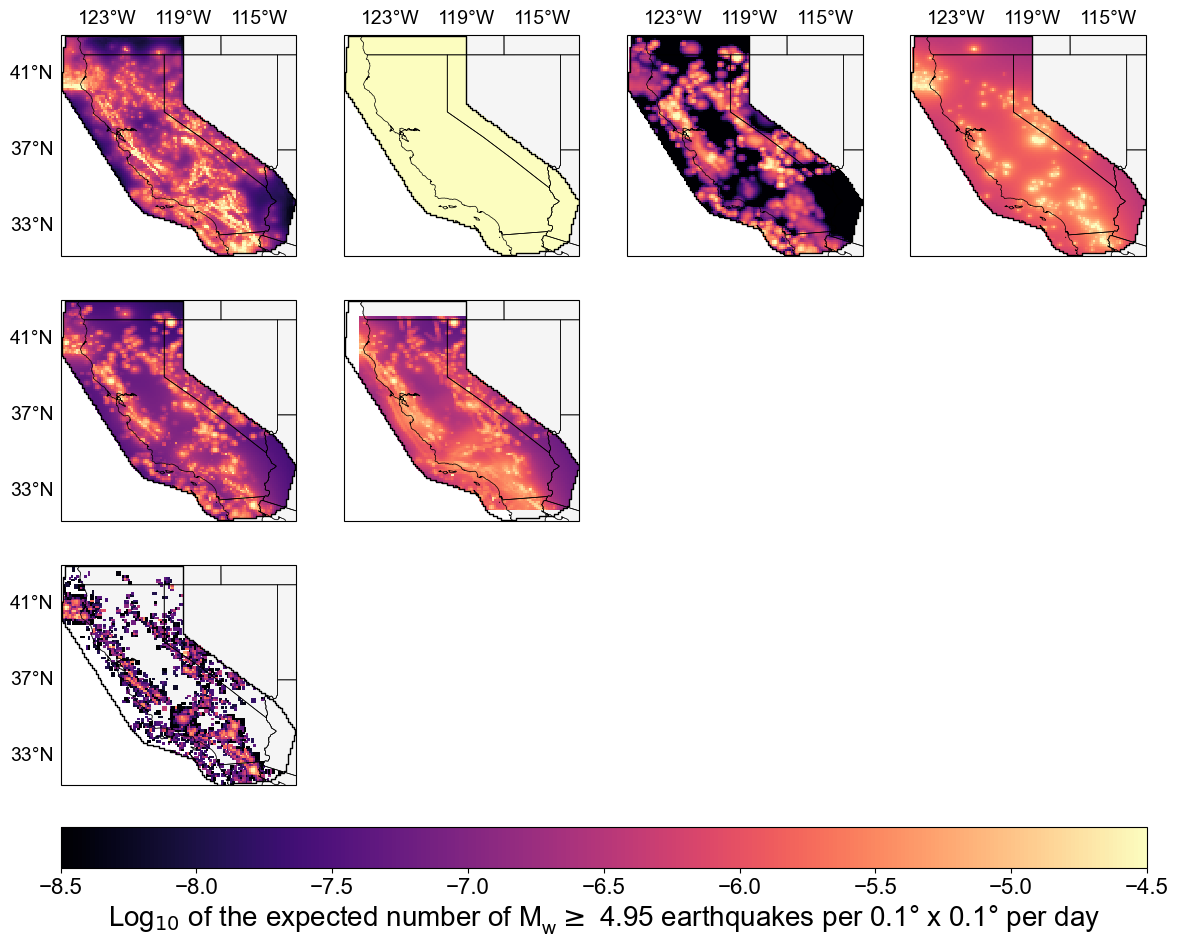

In [15]:
fig = plt.figure(figsize=(14, 9.75))

forecast_5ex = ['', HKJ5_example, KJSSFiveYearCalifornia_example, JANUSOneDayEEPAS1F_example, JANUSOneDayPPE_example, 
                JANUSOneDay_example, SE2OneDay_example, '', '',
                JANUSOneDayTV_example, '', '', '']

xbot_labs = ['', False, False, '', '',
             False, False, False, False,
             False, False, False, False,
             False, False, False, '',
             False, False, False, False,
             True, True, True, True]

yleft_labs = ['', True, False, '', '',
             True, False, False, False,
             True, False, False, False,
             True, False, False, '',
             True, False, False, False,
             True, False, False, False]

for i in range(1, len(forecast_5ex)):
    if type(forecast_5ex[i]) != str:
        ax = fig.add_subplot(3,4,i, projection=ccrs.PlateCarree())
        ax.add_feature(cartopy.feature.LAND, edgecolor='grey', facecolor='whitesmoke', linewidth=0.5, zorder=0)
        ax.add_feature(cartopy.feature.COASTLINE, facecolor='lightgrey', edgecolor='lightgrey', linewidth=0.5, zorder=0)
        ax.add_feature(cartopy.feature.STATES, facecolor='None', edgecolor='k', linewidth=0.5)
        #faults_USGS.plot(ax = ax, edgecolor="grey", zorder=2, linewidth=0.5, in_layout=True)
        ax.set_aspect("equal")

        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.xlocator = mticker.FixedLocator([-123,-119, -115])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.ylocator = mticker.FixedLocator([33, 37, 41])
        gl.yformatter = LATITUDE_FORMATTER
        gl.top_labels = xtop_labs[i]
        gl.bottom_labels = False
        gl.right_labels = False
        gl.left_labels = yleft_labs[i]
        gl.xlines = False
        gl.ylines = False
        gl.xlabel_style = {'size': 14}
        gl.ylabel_style = {'size': 14}

        ax.set_ylim(min(forecast_5ex[i].latitudes.values)-0.1+dh/2, max(forecast_5ex[i].latitudes.values)+0.1+dh/2)
        ax.set_xlim(min(forecast_5ex[i].longitudes.values)-0.1+dh/2, max(forecast_5ex[i].longitudes.values)+0.1+dh/2)

        scatter = ax.scatter(forecast_5ex[i].longitudes.values+dh/2, forecast_5ex[i].latitudes.values+dh/2,
                             c = np.log10(forecast_5ex[i].spatial_counts.values), cmap='magma', s=4, marker='s', 
                             alpha =1, edgecolor="None", zorder=1, vmin=-8.50, vmax=-4.50)

        ax.plot(ptsC[:,0], ptsC[:,1], lw=1, color='k', transform=ccrs.PlateCarree(), zorder=2)

cax = fig.add_axes([0.125, 0.025, 0.776, 0.042]) #left #up #length # width
cbar = plt.colorbar(scatter, cax = cax, orientation="horizontal")  
cbar.set_label('Log$_{10}$ of the expected number of $\mathregular{M_w}\geq$ 4.95 earthquakes per ' f'{str(dh)}° x {str(dh)}° per day', fontsize=20)
cbar.ax.tick_params(labelsize=16)

plt.savefig('expected_outputs/FigureS2.png', dpi=200, bbox_inches='tight')    

#### Plotting the evaluation dataset on a map:

In [16]:
DEFAULT_PLOT_ARGS = {
    # General figure/axes handling
    "figsize": None,
    "tight_layout": True,
    "grid": True,
    "title": None,
    "title_fontsize": 16,
    "xlabel": None,
    "ylabel": None,
    "xlabel_fontsize": 12,
    "ylabel_fontsize": 12,
    "xlabel_rotation": 90,
    "xticks_fontsize": 12,
    "yticks_fontsize": 12,
    "xlim": None,
    "ylim": None,
    "legend": True,
    "legend_loc": "best",
    "legend_fontsize": 10,
    "legend_title": None,
    "legend_titlesize": None,
    "legend_labelspacing": 1,
    "legend_borderpad": 0.4,
    "legend_framealpha": None,
    # Line/Scatter parameters
    "color": "steelblue",
    "secondary_color": "red",
    "alpha": 0.8,
    "linewidth": 1,
    "linestyle": "-",
    "size": 5,
    "marker": "o",
    "markersize": 5,
    "markercolor": "steelblue",
    "markeredgecolor": "black",
    # Time-Series
    "datetime_locator": AutoDateLocator(),
    "datetime_formatter": DateFormatter("%Y-%m-%d"),
    # Consistency and Comparison tests
    "capsize": 2,
    "hbars": True,
    # Spatial plotting
    "grid_labels": True,
    "grid_fontsize": 8,
    "region_color": "none",
    "coastline": "none",
    "coastline_color": "white",
    "coastline_linewidth": 0,
    "borders_color": "none",
    "borders_linewidth": 0,
    # Color bars
    "colorbar_labelsize": 8,
    "colorbar_ticksize": 2,
}

In [17]:
def datetime_to_decimal_year(dt):
    start_of_year = datetime.datetime(2007, 8, 1, tzinfo=datetime.timezone.utc)
    end_of_year = datetime.datetime(2018, 8, 30, tzinfo=datetime.timezone.utc)
    year_fraction = (dt - start_of_year).total_seconds() / (end_of_year - start_of_year).total_seconds()
    return dt.year + year_fraction

def create_geo_axes(
        figsize: Optional[Tuple[float, float]],
        extent: Optional[List[float]],
        projection: Union[ccrs.Projection, str],
        set_global: bool,
) -> plt.Axes:
    """
    Creates and returns GeoAxes for plotting.

    Args:
        figsize (Optional[Tuple[float, float]]): The size of the figure.
        extent (Optional[List[float]]): The spatial extent to set.
        projection (Union[ccrs.Projection, str]): The projection to use.
        set_global (bool): If True, sets the global view.

    Returns:
        plt.Axes: The created GeoAxes object.
    """

    if projection == "approx":
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
        central_latitude = (extent[2] + extent[3]) / 2.0
        # Set plot aspect according to local longitude-latitude ratio in metric units
        LATKM = 110.574  # length of a ° of latitude [km] --> ignores Earth's flattening
        ax.set_aspect(LATKM / (111.320 * numpy.cos(numpy.deg2rad(central_latitude))))
    elif projection is None:
        projection = ccrs.PlateCarree()
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection=projection)
    else:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection=projection)
    if set_global:
        ax.set_global()
    elif extent:
        ax.set_extent(extent, crs=ccrs.PlateCarree())
    return ax

def autosize_scatter(
        values: numpy.ndarray,
        min_size: float = 50.0,
        max_size: float = 400.0,
        power: float = 3.0,
        min_val: Optional[float] = None,
        max_val: Optional[float] = None,
) -> numpy.ndarray:
    """
    Auto-sizes scatter plot markers based on values.

    Args:
        values (numpy.ndarray): The data values (e.g., magnitude) to base the sizing on.
        min_size (float): The minimum marker size.
        max_size (float): The maximum marker size.
        power (float): The power to apply for scaling.
        min_val (Optional[float]): The minimum value (e.g., magnitude) for normalization.
        max_val (Optional[float]): The maximum value (e.g., magnitude) for normalization.

    Returns:
        numpy.ndarray: The calculated marker sizes.
    """
    min_val = min_val or numpy.min(values)
    max_val = max_val or numpy.max(values)
    normalized_values = ((values - min_val) / (max_val - min_val)) ** power
    marker_sizes = min_size + normalized_values * (max_size - min_size) * bool(power)
    return marker_sizes

def calculate_spatial_extent(
        element: Union["CSEPCatalog", "CartesianGrid2D"],
        set_global: bool,
        region_border: bool,
        padding_fraction: float = 0.05,
) -> Optional[List[float]]:
    """
    Calculates the spatial extent for plotting based on the catalog.

    Args:
        element (CSEPCatalog), CartesianGrid2D: The catalog or region object to base the extent
                                                on.
        set_global (bool): If True, sets the extent to the global view.
        region_border (bool): If True, uses the catalog's region border.
        padding_fraction (float): The fraction of padding to apply to the extent.

    Returns:
        Optional[List[float]]: The calculated extent or None if global view is set.
    """
    bbox = element.get_bbox()
    if region_border:
        try:
            bbox = element.region.get_bbox()
        except AttributeError:
            pass

    if set_global:
        return None

    dh = (bbox[1] - bbox[0]) * padding_fraction
    dv = (bbox[3] - bbox[2]) * padding_fraction
    return [bbox[0] - dh, bbox[1] + dh, bbox[2] - dv, bbox[3] + dv]

In [18]:
def plot_catalog(
        catalog: "CSEPCatalog",
        basemap: Optional[str] = None,
        projection: Optional[Union[ccrs.Projection, str]] = None,
        extent: Optional[Sequence[float]] = None,
        set_global: bool = False,
        mag_ticks: Optional[Union[Sequence[float], numpy.ndarray, int]] = None,
        size: float = 12,
        max_size: float = 300,
        power: float = 3,
        min_val: Optional[float] = None,
        max_val: Optional[float] = None,
        cbar_height: float = 1.0,
        plot_region: bool = False,
        ax: Optional[matplotlib.axes.Axes] = None,
        show: bool = False,
        **kwargs: Any,
) -> matplotlib.axes.Axes:
    """
    Spatial plot of catalog epicenters. Can be plotted over a basemap if desired by passing the
    keyword parameters of the function :func:`~csep.utils.plots.plot_basemap`. The size of the
    events is automatically scaled according to their magnitude. Fine-tuning of an exponential
    sizing function can be set with the parameters ``size``, ``max_size``, ``power``,
    ``min_val`` and ``max_val``.

    .. admonition:: Usage Tutorials

        - :ref:`tutorial-catalog-filtering-plot`
        - :ref:`tutorial-plot-customizations-ex3`
        - :ref:`tutorial-plot-customizations-ex4`

    Args:
        catalog (CSEPCatalog): Catalog object to be plotted.
        basemap (str, optional): Passed to :func:`~csep.utils.plots.plot_basemap` along with
            `kwargs`. Possible values are: `'stock_img'`, `'google-satellite'`,
            `'ESRI_terrain'`, `'ESRI_imagery'`, `'ESRI_relief'`, `'ESRI_topo'`, a custom web
            service link, or a GeoTiff filepath. Defaults to `None`.
        projection (cartopy.crs.Projection or str, optional): Projection to be used in the
            underlying basemap. Can be a cartopy projection instance, or `approx` for a quick
            approximation of Mercator. Defaults to :class:`~cartopy.crs.PlateCarree` if `None`.
        extent (list of float, optional): Defaults to `1.05` * :meth:`catalog.region.get_bbox`.
            Defaults to `None`.
        set_global (bool, optional): Display the complete globe. Defaults to `False`.
        mag_ticks (list of float or int, optional): Ticks to display in the legend. Can be an
            array/list of magnitudes, or a number of bins to discretize the magnitude range.
            Defaults to `None`.
        size (float, optional): Size of the minimum magnitude event. Defaults to `15`.
        max_size (float, optional): Size of the maximum magnitude event. Defaults to `300`.
        power (float, optional): Power scaling of the scatter sizing. Defaults to `3`.
        min_val (float, optional): Override minimum magnitude of the catalog for scatter sizing.
            Useful to plot multiple catalogs with different magnitude ranges. Defaults to
            `None`.
        max_val (float, optional): Override maximum magnitude of the catalog for scatter sizing.
            Useful to plot multiple catalogs with different magnitude ranges. Defaults to
            `None`.
        plot_region (bool, optional): Flag to plot the catalog region border. Defaults to
            `False`.
        ax (matplotlib.axes.Axes, optional): Previously defined ax object. Defaults to `None`.
        show (bool, optional): If `True`, displays the plot. Defaults to `False`.
        **kwargs (optional): Additional keyword arguments to customize the plot:

            - **alpha** (`float`): Transparency level for the scatter points.
            - **markercolor** (`str`): Color for the scatter points.
            - **markeredgecolor** (`str`): Color for the edges of the scatter points.
            - **figsize** (`tuple`): The size of the figure.
            - **legend** (`bool`): Whether to display a legend. Defaults to `True`.
            - **legend_title** (`str`): Title for the legend.
            - **legend_labelspacing** (`float`): Spacing between labels in the legend.
            - **legend_borderpad** (`float`): Border padding for the legend.
            - **legend_framealpha** (`float`): Frame alpha for the legend.
            - **region_color** (`str`): Color for the region border.
            - **title** (`str`): Title of the plot.
            - **title_fontsize** (`int`): Font size of the plot title.
            - **tight_layout** (`bool`): Whether to use tight layout for the figure.

    Returns:
        matplotlib.axes.Axes: The Matplotlib axes object with the plotted data.

    .. versionchanged:: 0.8.0
        The `plot_args` dictionary is only partially supported and will be removed in v1.0.0.
        Changed `region_border` name to `plot_region`. Scaling the events size through
        `mag_scale` is no longer used.
    .. versionadded:: 0.8.0
        Added parameters `size`, `max_size`, `power`, `min_val`, `max_val` for fine-tuning of
        the events sizing.
    """

    # Get plotting arguments
    plot_args = {**DEFAULT_PLOT_ARGS, **kwargs.get("plot_args", {}), **kwargs}
    # Get spatial information for plotting
    extent = extent or calculate_spatial_extent(catalog, set_global, plot_region)
    # Instantiate GeoAxes object
    if ax is None:
        ax = create_geo_axes(plot_args["figsize"], extent, projection, set_global)
        ax = plots.plot_basemap(basemap, extent, ax=ax, set_global=set_global, show=False, linewidth=0)
        
    # Core plotting func
    ####################
    event_decimal_years = [datetime_to_decimal_year(i) for i in catalogue.get_datetimes()]
    # Plot catalog
    im = ax.scatter(
        catalogue.get_longitudes(),
        catalogue.get_latitudes(),
        s=autosize_scatter(
            values=catalog.get_magnitudes(),
            min_size=size,
            max_size=max_size,
            power=power,
            min_val=min_val,
            max_val=max_val,
        ), marker='s', 
        transform=ccrs.PlateCarree(),
        c=event_decimal_years,
        cmap=plot_args['colormap'],
        edgecolors="grey",#plot_args["markeredgecolor"],
        linewidths=0.5,
        alpha=0.5,#plot_args["alpha"],
    )

    ####################
    # Legend
    if plot_args["legend"]:
        if isinstance(mag_ticks, (list, numpy.ndarray)):
            mag_ticks = numpy.array(mag_ticks)
        else:
            mw_range = [min(catalogue.get_magnitudes()), max(catalogue.get_magnitudes())]
            mag_ticks = numpy.linspace(mw_range[0], mw_range[1], mag_ticks or 4, endpoint=True)
            
        # Map mag_ticks to marker sizes using the custom size mapping function
        legend_sizes = autosize_scatter(
            values=mag_ticks,
            min_size=size,
            max_size=max_size,
            power=power,
            min_val=min_val or numpy.min(catalogue.get_magnitudes()),
            max_val=max_val or numpy.max(catalogue.get_magnitudes()),
        )
        # Create custom legend handles
        handles = [
            plt.Line2D(
                [0],
                [0],
                marker="s",
                lw=0,
                label="Date of occurrence",#str(m),
                markersize=numpy.sqrt(s),
                markerfacecolor="none",
                alpha=0.7,
                markeredgewidth=1,
                markeredgecolor="grey",
            )
            for m, s in zip(mag_ticks, legend_sizes)
        ]
        ax.legend(
            handles,
            numpy.round(mag_ticks, 1),
            loc=1, #plot_args["legend_loc"],
            handletextpad=2,
            title=plot_args.get("legend_title") or "Magnitudes",
            fontsize= 16, #plot_args["legend_fontsize"],
            title_fontsize= 18,#plot_args["legend_titlesize"],
            labelspacing= 0.3, #plot_args["legend_labelspacing"],
            borderpad=1.5,#plot_args["legend_borderpad"],
            framealpha=plot_args["legend_framealpha"],
            edgecolor='dimgrey',
        )

    ##### Colorbar
    cax = ax.get_figure().add_axes(
        [
            ax.get_position().x1 + 0.037,
            ax.get_position().y0 + 0.036,
            0.025,
            ax.get_position().height*cbar_height,
        ]
    )
    cbar = ax.get_figure().colorbar(im, ax=ax, cax=cax)
    cbar.ax.tick_params(labelsize=14)

    ######

    # Draw catalog's region border
    if plot_region:
        try:
            pts = catalog.region.tight_bbox()
            ax.plot(pts[:, 0], pts[:, 1], lw=1, color=plot_args["region_color"])
        except AttributeError:
            pass
    ax.set_title(plot_args["title"], fontsize=plot_args["title_fontsize"], y=1.06)

    if show:
        plt.show()

    return ax

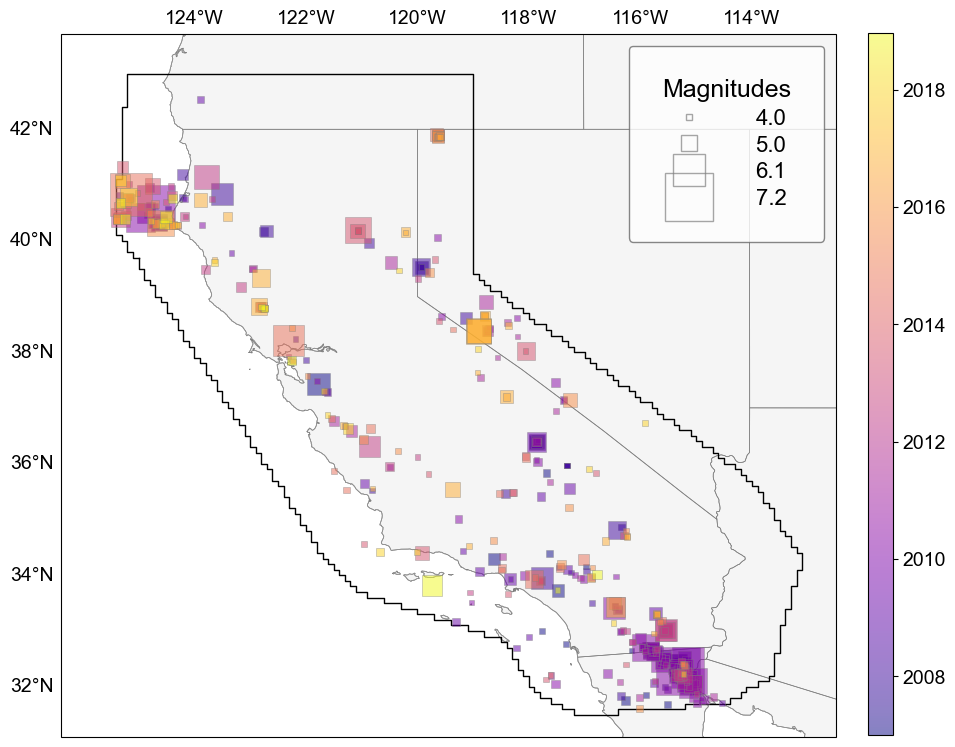

In [19]:
if __name__ == '__main__':    
    # Plot catalog function
    ax = plot_catalog(catalogue,
                 figsize=(10,10),
                 colormap='plasma', # Colormap of datetimes
                 alpha=0.4,  # Transparency of circles
                 cbar_height=0.912, # Fraction of axes height
                 size=16, # Size of minimum magnitude
                 max_size=1200, # Size of maximum magnitude
                 power=2) # For exponential sizing function
                  #   markeredgecolor='b')               
    
    ax.add_feature(cartopy.feature.LAND, edgecolor='grey', facecolor='whitesmoke', linewidth=0.5, zorder=0)
    ax.add_feature(cartopy.feature.COASTLINE, facecolor='lightgrey', edgecolor='lightgrey', linewidth=0.5, zorder=0)
    ax.add_feature(cartopy.feature.STATES, facecolor='None', edgecolor='grey', linewidth=0.5, zorder=0)
    ax.plot(ptsC[:,0], ptsC[:,1], lw=1, color='k', transform=ccrs.PlateCarree(), zorder=0)
    #faults_USGS.plot(ax = ax, edgecolor="grey", zorder=2, linewidth=0.5, in_layout=True)
    ax.set_aspect("equal")
    ax.set_xlim(-126.4,-112.5)
    ax.set_ylim(31.1,43.7)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.xlocator = mticker.FixedLocator([-124,-122,-120,-118,-116,-114])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.ylocator = mticker.FixedLocator([32, 34, 36, 38, 40, 42])
    gl.yformatter = LATITUDE_FORMATTER
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xlines = False
    gl.ylines = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}

    plt.savefig('expected_outputs/Figure2.png', dpi=300, bbox_inches='tight')

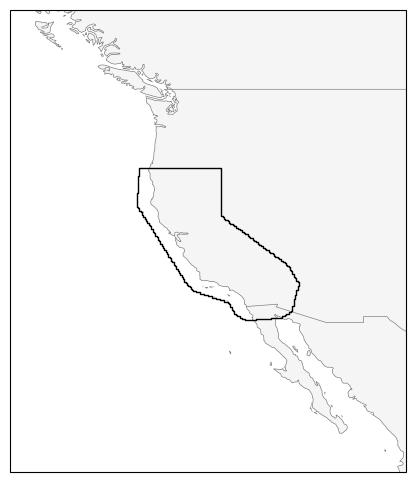

In [20]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(), facecolor='None')
ax.add_feature(cartopy.feature.COASTLINE, facecolor='g', edgecolor='grey', linewidth=0.5, zorder=1)
ax.add_feature(cartopy.feature.LAND, edgecolor='grey', facecolor='whitesmoke', linewidth=1, zorder=1)
ax.add_feature(cartopy.feature.OCEAN, edgecolor='None', facecolor='white', linewidth=1, zorder=1)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='grey', facecolor='grey', linewidth=0.5, zorder=1)
gl = ax.gridlines()
gl.xlines = False
gl.ylines = False
gl.xlabel_style = {'size': 14}
gl.ylabel_style = {'size': 14}
gl.xlabels_top = False 
gl.xlabels_bottom = False 
gl.ylabels_right = False
gl.ylabels_left = False

ax.plot(ptsC[:,0], ptsC[:,1], lw=1, color='black', transform=ccrs.PlateCarree(), zorder=1)
ax.set_xlim(-135,-105)
ax.set_ylim(20,55)

plt.savefig('expected_outputs/Figure2_inset.png', dpi=200, bbox_inches = 'tight')

#### Let's now compile catalogs of observed seismicity to assess (in)consistencies between forecasts and observations. We use different catalogs because not all forecast model are available simultaneously (see Fig. S1) and because not all are designed to forecast earthquakes with magnitude 3.95 or above (e.g., the JANUS family) across the entire CSEP-California test region (see, for example, STEP in Fig. 1).

In [21]:
start_epoch_HKJ5 = csep.utils.time_utils.strptime_to_utc_epoch(str(min(forecast_dates[0])))
end_epoch_HKJ5 = csep.utils.time_utils.strptime_to_utc_epoch(str(max(forecast_dates[0])))
filters_HKJ5 = [f'origin_time >= {start_epoch_HKJ5}', f'origin_time < {end_epoch_HKJ5}']

with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue5 = pickle.load(obj)
catalogue5 = catalogue5.filter('magnitude >= 4.95')

In [22]:
start_epoch_STEP = csep.utils.time_utils.strptime_to_utc_epoch(str(min(forecast_dates[2])))
end_epoch_STEP = csep.utils.time_utils.strptime_to_utc_epoch(str(max(forecast_dates[2])))
filters_STEP = [f'origin_time >= {start_epoch_STEP}', f'origin_time < {end_epoch_STEP}']
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
    catalogue_STEP = pickle.load(obj)
catalogue_STEP = catalogue_STEP.filter(filters_STEP)#.filter_spatial(region=step_region, update_stats=False, in_place=True)

In [23]:
start_epoch_KJSSOneDayCalifornia = csep.utils.time_utils.strptime_to_utc_epoch(str(min(forecast_dates[3])))
end_epoch_KJSSOneDayCalifornia = csep.utils.time_utils.strptime_to_utc_epoch(str(max(forecast_dates[3])))
filters_KJSSOneDayCalifornia = [f'origin_time >= {start_epoch_KJSSOneDayCalifornia}', f'origin_time < {end_epoch_KJSSOneDayCalifornia}']
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
    catalogue_KJSSOneDayCalifornia = pickle.load(obj)
catalogue_KJSSOneDayCalifornia = catalogue_KJSSOneDayCalifornia.filter(filters_KJSSOneDayCalifornia)

In [24]:
start_epoch_STEPJAVA = csep.utils.time_utils.strptime_to_utc_epoch(str(min(forecast_dates[4])))
end_epoch_STEPJAVA = csep.utils.time_utils.strptime_to_utc_epoch(str(max(forecast_dates[4])))
filters_STEPJAVA = [f'origin_time >= {start_epoch_STEPJAVA}', f'origin_time < {end_epoch_STEPJAVA}']
with open ('data/catalogues/catalogue_2007_2018_sj.obj', 'rb') as obj:
    catalogue_STEPJAVA = pickle.load(obj)
catalogue_STEPJAVA = catalogue_STEPJAVA.filter(filters_STEPJAVA)

In [25]:
start_epoch_OneDayBayesianBMA = csep.utils.time_utils.strptime_to_utc_epoch(str(min(forecast_dates[5])))
end_epoch_OneDayBayesianBMA = csep.utils.time_utils.strptime_to_utc_epoch(str(max(forecast_dates[5])))
filters_OneDayBayesianBMA = [f'origin_time >= {start_epoch_OneDayBayesianBMA}', f'origin_time < {end_epoch_OneDayBayesianBMA}']
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
    catalogue_OneDayBayesianBMA = pickle.load(obj)
catalogue_OneDayBayesianBMA = catalogue_OneDayBayesianBMA.filter(filters_OneDayBayesianBMA)

In [26]:
start_epoch_ETASv1 = csep.utils.time_utils.strptime_to_utc_epoch(str(min(forecast_dates[7])))
end_epoch_ETASv1 = csep.utils.time_utils.strptime_to_utc_epoch(str(max(forecast_dates[7])))
filters_ETASv1 = [f'origin_time >= {start_epoch_ETASv1}', f'origin_time < {end_epoch_ETASv1}']
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
    catalogue_ETASv1 = pickle.load(obj)
catalogue_ETASv1 = catalogue_ETASv1.filter(filters_ETASv1)

In [27]:
start_epoch_KJSSFiveYearCalifornia = csep.utils.time_utils.strptime_to_utc_epoch(str(min(forecast_dates[8])))
end_epoch_KJSSFiveYearCalifornia = csep.utils.time_utils.strptime_to_utc_epoch(str(max(forecast_dates[8])))
filters_KJSSFiveYearCalifornia = [f'origin_time >= {start_epoch_KJSSFiveYearCalifornia}', f'origin_time < {end_epoch_KJSSFiveYearCalifornia}']
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
    catalogue_KJSSFiveYearCalifornia = pickle.load(obj)
catalogue_KJSSFiveYearCalifornia = catalogue_KJSSFiveYearCalifornia.filter(filters_KJSSFiveYearCalifornia)

In [28]:
with open ('data/catalogues/catalogue_2007_2018b.obj', 'rb') as obj:
    catalogue_KJSSFiveYearCaliforniab = pickle.load(obj)
catalogue_KJSSFiveYearCaliforniab = catalogue_KJSSFiveYearCaliforniab.filter(filters_KJSSFiveYearCalifornia)

In [29]:
start_epoch_ETAS_HWMd2 = csep.utils.time_utils.strptime_to_utc_epoch(str(min(forecast_dates[13])))
end_epoch_ETAS_HWMd2 = csep.utils.time_utils.strptime_to_utc_epoch(str(max(forecast_dates[13])))
filters_ETAS_HWMd2 = [f'origin_time >= {start_epoch_ETAS_HWMd2}', f'origin_time < {end_epoch_ETAS_HWMd2}']
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
    catalogue_ETAS_HWMd2 = pickle.load(obj)
catalogue_ETAS_HWMd2 = catalogue_ETAS_HWMd2.filter(filters_ETAS_HWMd2)

In [30]:
start_epoch_SE2OneDay = csep.utils.time_utils.strptime_to_utc_epoch(str(min(forecast_dates[23])))
end_epoch_SE2OneDay  = csep.utils.time_utils.strptime_to_utc_epoch(str(max(forecast_dates[23])))
filters_SE2OneDay  = [f'origin_time >= {start_epoch_SE2OneDay}', f'origin_time < {end_epoch_SE2OneDay}']
with open ('data/catalogues/catalogue_2007_2018b_se2.obj', 'rb') as obj:
    catalogue_SE2OneDay = pickle.load(obj)
catalogue_SE2OneDay = catalogue_SE2OneDay.filter(filters_SE2OneDay)

In [31]:
start_epoch_ETAS_DROneDayMd295 = csep.utils.time_utils.strptime_to_utc_epoch(str(min(forecast_dates[24])))
end_epoch_ETAS_DROneDayMd295 = csep.utils.time_utils.strptime_to_utc_epoch(str(max(forecast_dates[24])))
filters_ETAS_DROneDayMd295 = [f'origin_time >= {start_epoch_ETAS_DROneDayMd295}', f'origin_time < {end_epoch_ETAS_DROneDayMd295}']
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
    catalogue_ETAS_DROneDayMd295 = pickle.load(obj)
catalogue_ETAS_DROneDayMd295 = catalogue_ETAS_DROneDayMd295.filter(filters_ETAS_DROneDayMd295)

In [32]:
start_epoch_GSF_ISO = csep.utils.time_utils.strptime_to_utc_epoch(str(min(forecast_dates[26])))
end_epoch_GSF_ISO = csep.utils.time_utils.strptime_to_utc_epoch(str(max(forecast_dates[26])))
filters_GSF_ISO = [f'origin_time >= {start_epoch_GSF_ISO}', f'origin_time < {end_epoch_GSF_ISO}']
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
    catalogue_GSF_ISO = pickle.load(obj)
catalogue_GSF_ISO = catalogue_GSF_ISO.filter(filters_GSF_ISO)

### How good are the models at forecasting the total number of earthquakes?

In [33]:
# Mw >= 3.95 earthquake forecasting models
ETAS_ncounts = np.genfromtxt('preprocessed_inputs/ETAS/ETAS_ncounts.dat', delimiter='\t')
ETASv1_ncounts = np.genfromtxt('preprocessed_inputs/ETASv1/ETASv1_ncounts.dat', delimiter='\t')
ETAS_DROneDayMd2_ncounts = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayMd2/ETAS_DROneDayMd2_ncounts.dat', delimiter='\t')
ETAS_DROneDayMd3_ncounts = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayMd3/ETAS_DROneDayMd3_ncounts.dat', delimiter='\t')
ETAS_HWMd2_ncounts = np.genfromtxt('preprocessed_inputs/ETAS_HWMd2/ETAS_HWMd2_ncounts.dat', delimiter='\t')
ETAS_HWMd3_ncounts = np.genfromtxt('preprocessed_inputs/ETAS_HWMd3/ETAS_HWMd3_ncounts.dat', delimiter='\t')
ETAS_DROneDayMd295_ncounts = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayMd295/ETAS_DROneDayMd295_ncounts.dat',  delimiter='\t')
ETASSYN_DROneDayMd295_ncounts = np.genfromtxt('preprocessed_inputs/ETASSYN_DROneDayMd295/ETASSYN_DROneDayMd295_ncounts.dat',  delimiter='\t')

STEP_ncounts = np.genfromtxt('preprocessed_inputs/STEP/STEP_ncounts.dat', delimiter='\t')
STEPJAVA_ncounts = np.genfromtxt('preprocessed_inputs/STEPJAVA/STEPJAVA_ncounts.dat', delimiter='\t')

HKJ4_ncounts = np.genfromtxt('preprocessed_inputs/HKJ/HKJ_ncounts.dat', delimiter='\t') 
KJSSOneDayCalifornia_ncounts = np.genfromtxt('preprocessed_inputs/KJSSOneDayCalifornia/KJSSOneDayCalifornia_ncounts.dat', delimiter='\t')
ETAS_DROneDayPPEMd2_ncounts = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayPPEMd2/ETAS_DROneDayPPEMd2_ncounts.dat', delimiter='\t')
ETAS_DROneDayPPEMd3_ncounts = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayPPEMd3/ETAS_DROneDayPPEMd3_ncounts.dat', delimiter='\t')

K3Md2_ncounts = np.genfromtxt('preprocessed_inputs/K3Md2/K3Md2_ncounts.dat',  delimiter='\t')
K3Md3_ncounts = np.genfromtxt('preprocessed_inputs/K3Md3/K3Md3_ncounts.dat', delimiter='\t')

OneDayBayesianBMA_ncounts = np.genfromtxt('preprocessed_inputs/OneDayBayesianBMA/OneDayBayesianBMA_ncounts.dat', delimiter='\t')
OneDayBayesianSeqBMA_ncounts = np.genfromtxt('preprocessed_inputs/OneDayBayesianSeqBMA/OneDayBayesianSeqBMA_ncounts.dat', delimiter='\t')
GSF_ISO_ncounts = np.genfromtxt('preprocessed_inputs/GSF_ISO/GSF_ISO_ncounts.dat', delimiter='\t')
GSF_ANISO_ncounts = np.genfromtxt('preprocessed_inputs/GSF_ANISO/GSF_ANISO_ncounts.dat', delimiter='\t')
ETAS_HW_K3_AVERAGE_Md2_ncounts = np.genfromtxt('preprocessed_inputs/ETAS_HW_K3_AVERAGE_Md2/ETAS_HW_K3_AVERAGE_Md2_ncounts.dat',  delimiter='\t')
ETAS_HW_K3_AVERAGE_Md3_ncounts = np.genfromtxt('preprocessed_inputs/ETAS_HW_K3_AVERAGE_Md3/ETAS_HW_K3_AVERAGE_Md3_ncounts.dat',  delimiter='\t')

# Mw >= 4.95 earthquake forecasting models
HKJ5_ncounts = np.genfromtxt('preprocessed_inputs/HKJ/HKJ5_ncounts.dat', delimiter='\t')
KJSSFiveYearCalifornia_ncounts = np.genfromtxt('preprocessed_inputs/KJSSFiveYearCalifornia/KJSSFiveYearCalifornia_ncounts.dat', delimiter='\t')
JANUSOneDay_ncounts = np.genfromtxt('preprocessed_inputs/JANUSOneDay/JANUSOneDay_ncounts.dat',  delimiter='\t')
JANUSOneDayEEPAS1F_ncounts = np.genfromtxt('preprocessed_inputs/JANUSOneDayEEPAS1F/JANUSOneDayEEPAS1F_ncounts.dat',  delimiter='\t')
JANUSOneDayPPE_ncounts = np.genfromtxt('preprocessed_inputs/JANUSOneDayPPE/JANUSOneDayPPE_ncounts.dat',  delimiter='\t')
JANUSOneDayTV_ncounts = np.genfromtxt('preprocessed_inputs/JANUSOneDayTV/JANUSOneDayTV_ncounts.dat',  delimiter='\t')
SE2OneDay_ncounts = np.genfromtxt('preprocessed_inputs/SE2OneDay/SE2OneDay_ncounts.dat',  delimiter='\t')

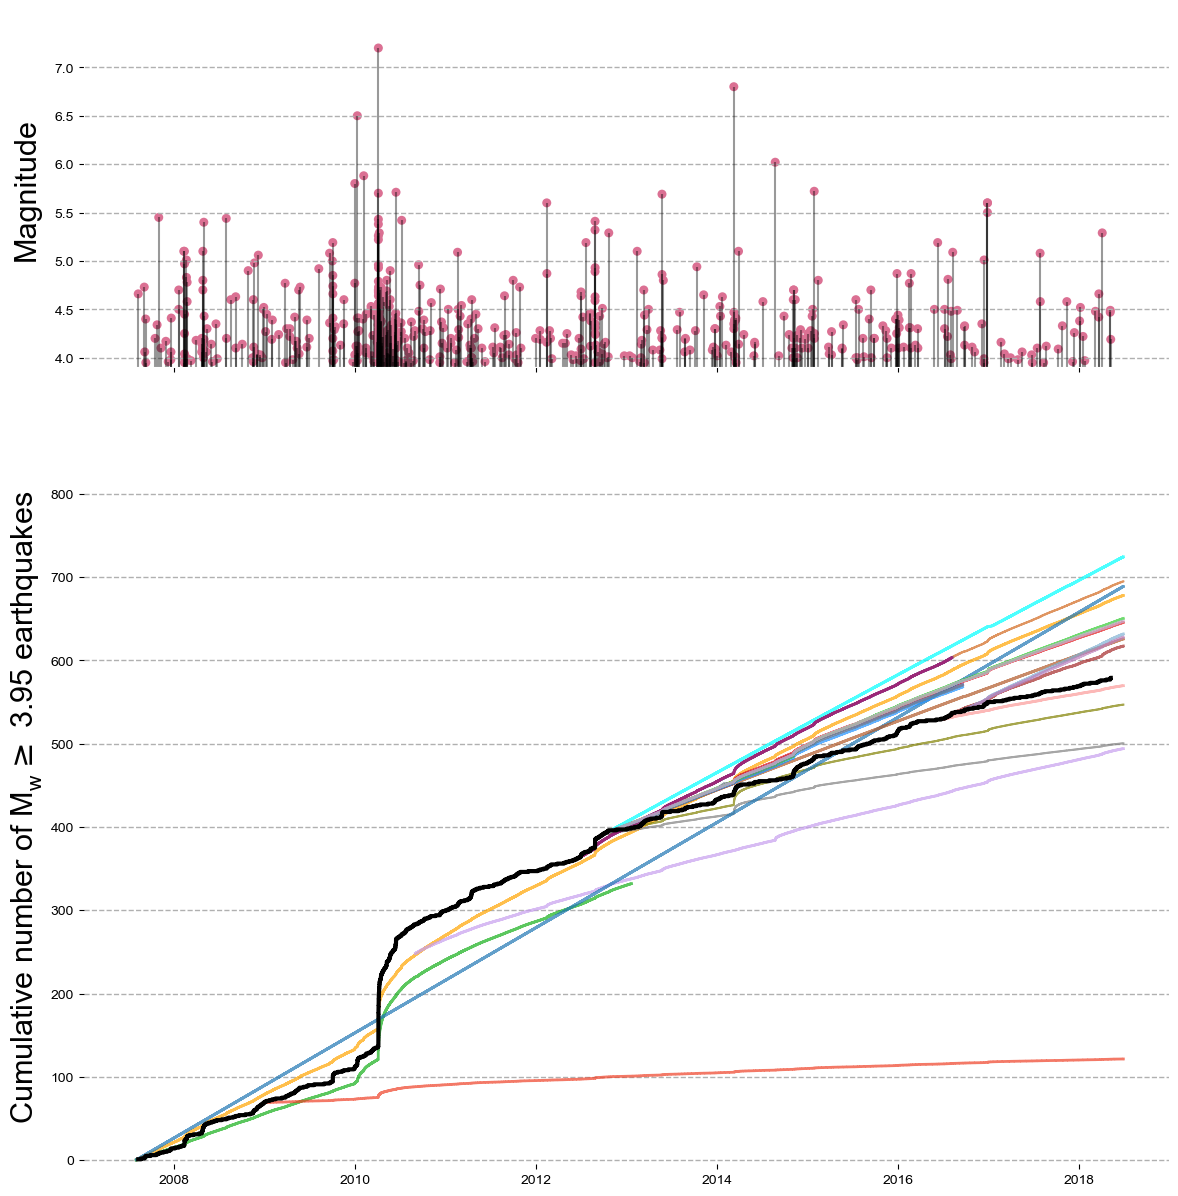

In [34]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1.5,3],'hspace': 0.15}, sharex=True, figsize=(14,15))

ax[1].set_xlim(datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2018, 12, 30, 0, 0))
ax[1].set_ylim(-5,855)
ax[1].grid(axis="y", which='major', linestyle='--', linewidth=1, zorder=0)
ax[1].set_ylabel('Cumulative number of $\mathregular{M_w}\geq$ 3.95 earthquakes', fontsize=22)
plt.setp(ax[1].spines.values(), color='None')

ax[1] = plt.step(forecast_dates[1], ETAS_ncounts.cumsum(), zorder=2, alpha=0.7, linewidth=2, color='#FFA500', where='mid')
ax[1] = plt.step(forecast_dates[7], ETASv1_ncounts.cumsum() + (catalogue.event_count - catalogue_ETASv1.event_count), zorder=2, alpha=0.7, linewidth=1.5, color='#D2691E', where='mid') 
ax[1] = plt.step(forecast_dates[9], ETAS_DROneDayMd2_ncounts.cumsum() + (catalogue.event_count - catalogue_KJSSFiveYearCalifornia.event_count), zorder=2, alpha=0.7, linewidth=1.5, color='#808080', where='mid')
ax[1] = plt.step(forecast_dates[10], ETAS_DROneDayMd3_ncounts.cumsum() + (catalogue.event_count - catalogue_KJSSFiveYearCalifornia.event_count), zorder=2, alpha=0.7, linewidth=1.5, color='#808000', where='mid')  
ax[1] = plt.step(forecast_dates[13], ETAS_HWMd2_ncounts.cumsum() + (catalogue.event_count - catalogue_KJSSFiveYearCalifornia.event_count), zorder=2, alpha=0.7, linewidth=2, color='#6a3d9a', where='mid')
ax[1] = plt.step(forecast_dates[14], ETAS_HWMd3_ncounts.cumsum() + (catalogue.event_count - catalogue_KJSSFiveYearCalifornia.event_count), zorder=2, alpha=0.7, linewidth=2, color='#e31a1c', where='mid')
ax[1] = plt.step(np.sort(forecast_dates[24]), ETAS_DROneDayMd295_ncounts.cumsum() + (catalogue.event_count - catalogue_ETAS_DROneDayMd295.event_count), color='#fb9a99', zorder=2, alpha=0.7, linewidth=2, where='mid')
ax[1] = plt.step(forecast_dates[25], ETASSYN_DROneDayMd295_ncounts.cumsum() + (catalogue.event_count - catalogue_ETAS_DROneDayMd295.event_count), zorder=2, alpha=0.7, linewidth=2, color='brown', where='mid')

ax[1] = plt.step(forecast_dates[2], STEP_ncounts.cumsum(), zorder=2, alpha=0.7, linewidth=2, color='#15B01A', where='mid')
ax[1] = plt.step(forecast_dates[4], STEPJAVA_ncounts.cumsum() + 248.0, zorder=2, alpha = 0.7, linewidth=2, color='#C79FEF', where='mid')

ax[1] = plt.step(forecast_dates[0], HKJ4_ncounts.cumsum(), zorder=2, alpha=0.7, linewidth=2, color='#1f77b4', where='mid', label='HKJ')
ax[1] = plt.step(forecast_dates[3], KJSSOneDayCalifornia_ncounts.cumsum() + (catalogue.event_count - catalogue_KJSSOneDayCalifornia.event_count), zorder=2, alpha=0.7, linewidth=2, color='#EF4026', where='mid')
ax[1] = plt.step(forecast_dates[11], ETAS_DROneDayPPEMd2_ncounts.cumsum() + (catalogue.event_count - catalogue_KJSSFiveYearCalifornia.event_count),  zorder=2, alpha=0.7, linewidth=2, color='#00FFFF', where='mid')
ax[1] = plt.step(forecast_dates[12], ETAS_DROneDayPPEMd3_ncounts.cumsum() + (catalogue.event_count - catalogue_KJSSFiveYearCalifornia.event_count),  zorder=2, alpha=0.7, linewidth=2, color='#b15928', where='mid')

ax[1] = plt.step(forecast_dates[21], K3Md2_ncounts.cumsum() + (catalogue.event_count - catalogue_KJSSFiveYearCalifornia.event_count), zorder=2, alpha=0.7, linewidth=2, color='dodgerblue', where='mid')
ax[1] = plt.step(forecast_dates[22], K3Md3_ncounts.cumsum() + (catalogue.event_count - catalogue_KJSSFiveYearCalifornia.event_count), zorder=2, alpha=0.7, linewidth=2, color='limegreen', where='mid')
ax[1] = plt.step(forecast_dates[26], GSF_ISO_ncounts.cumsum() + (catalogue.event_count - catalogue_GSF_ISO.event_count), zorder=2, alpha=0.7, linewidth=2, color='#80b1d3', where='mid')
ax[1] = plt.step(forecast_dates[27], GSF_ANISO_ncounts.cumsum() + (catalogue.event_count - catalogue_GSF_ISO.event_count), zorder=2,alpha=0.7, linewidth=2, color='#bc80bd', where='mid')  

ax[1] = plt.step(forecast_dates[5], OneDayBayesianBMA_ncounts.cumsum() + (catalogue.event_count - catalogue_ETASv1.event_count), zorder=2, alpha=0.7, linewidth=2, color='#008080', where='mid') 
ax[1] = plt.step(forecast_dates[6], OneDayBayesianSeqBMA_ncounts.cumsum() + (catalogue.event_count - catalogue_ETASv1.event_count), zorder=2, alpha=0.7, linewidth=2, color='#C20078', where='mid') 
ax[1] = plt.step(forecast_dates[15], ETAS_HW_K3_AVERAGE_Md2_ncounts.cumsum() + (catalogue.event_count - catalogue_KJSSFiveYearCalifornia.event_count), zorder=2, alpha=0.7, linewidth=2, color='#708090', where='mid')
ax[1] = plt.step(forecast_dates[16], ETAS_HW_K3_AVERAGE_Md3_ncounts.cumsum() + (catalogue.event_count - catalogue_KJSSFiveYearCalifornia.event_count), zorder=2, alpha=0.7, linewidth=2, color='#cab2d6', where='mid')

ax[1] = plt.step(catalogue.get_datetimes(), catalogue.get_cumulative_number_of_events(), color='k', zorder=2, linewidth=3, where='mid', label='$\mathregular{M_w}\geq$ 3.95 Observations')

ax[0].set_ylim(3.99, 7.5)
ax[0].grid(axis="y", linestyle='--', linewidth=1, zorder=0)
plt.setp(ax[0].spines.values(), color='white')
ax[0].yaxis.set_ticks(np.arange(4.0, 7.5, step=0.5))
ax[0].vlines(catalogue.get_datetimes(), [0], catalogue.get_magnitudes(), color='k', alpha=0.4)
ax[0].scatter(catalogue.get_datetimes(), catalogue.get_magnitudes(), color='palevioletred', marker='o', edgecolor='none', s=42)
ax[0].set_ylim(3.9, 7.6)
ax[0].set_ylabel('Magnitude', fontsize=22, rotation=90, labelpad=10)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.savefig('expected_outputs/Figure3ab.png', dpi=200, bbox_inches='tight')

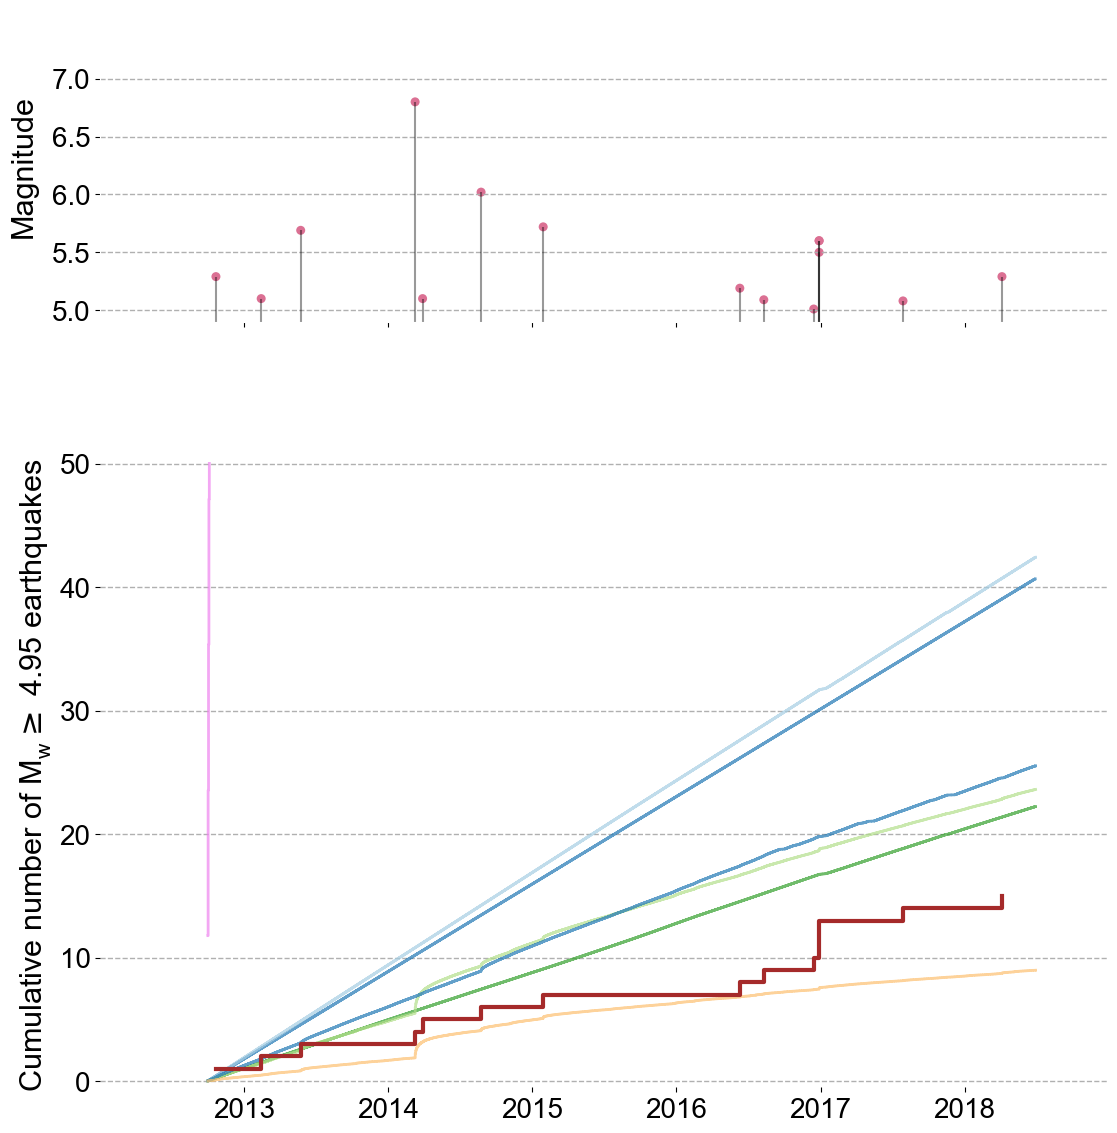

In [35]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1.5,3],'hspace': 0.3}, sharex=True, figsize=(13,14))

ax[1].set_xlim(datetime.datetime(2012, 1, 2, 0, 0), datetime.datetime(2018, 12, 30, 0, 0))
ax[1].set_ylim(-0.5,50.1) 
ax[1].grid(axis="y", which='major', linestyle='--', linewidth=1, zorder=0)
ax[1].set_ylabel('Cumulative number of $\mathregular{M_w}\geq$ 4.95 earthquakes', fontsize=22)
plt.setp(ax[1].spines.values(), color='None')

ax[1] = plt.step(forecast_dates[1][1888:3986], HKJ5_ncounts.cumsum()[:2098], zorder=2, alpha=0.7, linewidth=2, color='#1f77b4', where='mid')
ax[1] = plt.step(forecast_dates[8], KJSSFiveYearCalifornia_ncounts.cumsum(), zorder=2, alpha=0.7, linewidth=2, color='#EE82EE', where='mid')
ax[1] = plt.step(forecast_dates[18], JANUSOneDayEEPAS1F_ncounts.cumsum(), zorder=2, alpha=0.7, linewidth=2, color='#33a02c', where='mid')
ax[1] = plt.step(forecast_dates[19], JANUSOneDayPPE_ncounts.cumsum(), zorder=2, alpha=0.7, linewidth=2, color='#a6cee3', where='mid')

ax[1] = plt.step(forecast_dates[17], JANUSOneDay_ncounts.cumsum(), zorder=2, alpha=0.7, linewidth=2, color='#b2df8a', where='mid')
ax[1] = plt.step(forecast_dates[23], SE2OneDay_ncounts.cumsum(), zorder=2, alpha=0.7, linewidth=2, color='#1f78b4', where='mid')

ax[1] = plt.step(forecast_dates[20], JANUSOneDayTV_ncounts.cumsum(), zorder=2, alpha=0.7, linewidth=2, color='#fdbf6f', where='mid')

ax[1] = plt.step(catalogue_KJSSFiveYearCaliforniab.get_datetimes(), catalogue_KJSSFiveYearCaliforniab.get_cumulative_number_of_events(), color='brown', zorder=2, linewidth=3, where='post', label='$\mathregular{M_w}\geq$ 4.95 Observations')

ax[0].set_ylim(4.99, 7.5)
ax[0].grid(axis="y", linestyle='--', linewidth=1, zorder=0)
plt.setp(ax[0].spines.values(), color='white')
ax[0].yaxis.set_ticks(np.arange(4.0, 7.5, step=0.5))
ax[0].vlines(catalogue_KJSSFiveYearCaliforniab.get_datetimes(), [0], catalogue_KJSSFiveYearCaliforniab.get_magnitudes(), color='k', alpha=0.4)
ax[0].scatter(catalogue_KJSSFiveYearCaliforniab.get_datetimes(), catalogue_KJSSFiveYearCaliforniab.get_magnitudes(), color='palevioletred', marker='o', edgecolor='none', s=42)
ax[0].set_ylim(4.9, 7.6)
ax[0].set_ylabel('Magnitude', fontsize=22, rotation=90, labelpad=10)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.savefig('expected_outputs/FigureS3ab.png', dpi=200, bbox_inches='tight')

### Poisson number tests

In [36]:
def _number_test_ndarray(fore_cnt, obs_cnt, epsilon=1e-6):
    """ Computes delta1 and delta2 values from the csep1 number test.

    Args:
        fore_cnt (float): parameter of poisson distribution coming from expected value of the forecast
        obs_cnt (float): count of earthquakes observed during the testing period.
        epsilon (float): tolerance level to satisfy the requirements of two-sided p-value

    Returns
        result (tuple): (delta1, delta2)
    """
    delta1 = 1.0 - scipy.stats.poisson.cdf(obs_cnt - epsilon, fore_cnt)
    delta2 = scipy.stats.poisson.cdf(obs_cnt + epsilon, fore_cnt)
    return delta1, delta2

In [37]:
def number_test(forecast, observed_catalog):
    """Computes "N-Test" on a gridded forecast.
    author: @asim

    Computes Number (N) test for Observed and Forecasts. Both data sets are expected to be in terms of event counts.
    We find the Total number of events in Observed Catalog and Forecasted Catalogs. Which are then employed to compute the probablities of
    (i) At least no. of events (delta 1)
    (ii) At most no. of events (delta 2) assuming the poissonian distribution.

    Args:
        observation: Observed (Gridded) seismicity (Numpy Array):
                    An Observation has to be Number of Events in Each Bin
                    It has to be a either zero or positive integer only (No Floating Point)
        forecast:   Forecast of a Model (Gridded) (Numpy Array)
                    A forecast has to be in terms of Average Number of Events in Each Bin
                    It can be anything greater than zero

    Returns:
        out (tuple): (delta_1, delta_2)
    """
    result = EvaluationResult()

    # observed count
    obs_cnt = observed_catalog.event_count

    # forecasts provide the expected number of events during the time horizon of the forecast
    fore_cnt = np.float64(sum(forecast))

    epsilon = 1e-6

    # stores the actual result of the number test
    delta1, delta2 = _number_test_ndarray(fore_cnt, obs_cnt, epsilon=epsilon)

    # store results
    result.test_distribution = ('poisson', fore_cnt)
    result.name = 'Poisson N-Test'
    result.observed_statistic = obs_cnt
    result.quantile = (delta1, delta2)
    result.status = 'normal'
    result.min_mw = 3.95

    return result

In [38]:
# Mw >= 3.95 earthquake forecasting models
ntest_ETAS = number_test(ETAS_ncounts, catalogue)
ntest_ETASv1 = number_test(ETASv1_ncounts, catalogue_ETASv1)
ntest_ETAS_DROneDayMd2 = number_test(ETAS_DROneDayMd2_ncounts, catalogue_KJSSFiveYearCalifornia)
ntest_ETAS_DROneDayMd3 = number_test(ETAS_DROneDayMd3_ncounts, catalogue_KJSSFiveYearCalifornia)
ntest_ETAS_HWMd2 = number_test(ETAS_HWMd2_ncounts, catalogue_ETAS_HWMd2)
ntest_ETAS_HWMd3 = number_test(ETAS_HWMd3_ncounts, catalogue_KJSSFiveYearCalifornia)
ntest_ETAS_DROneDayMd295 = number_test(ETAS_DROneDayMd295_ncounts, catalogue_ETAS_DROneDayMd295)
ntest_ETASSYN_DROneDayMd295 = number_test(ETASSYN_DROneDayMd295_ncounts, catalogue_ETAS_DROneDayMd295)

ntest_STEP = number_test(STEP_ncounts, catalogue_STEP)
ntest_STEPJAVA = number_test(STEPJAVA_ncounts, catalogue_STEPJAVA)

ntest_HKJ4 = number_test(HKJ4_ncounts, catalogue)
ntest_KJSSOneDayCalifornia = number_test(KJSSOneDayCalifornia_ncounts, catalogue_KJSSOneDayCalifornia)
ntest_ETAS_DROneDayPPEMd2 = number_test(ETAS_DROneDayPPEMd2_ncounts, catalogue_KJSSFiveYearCalifornia)
ntest_ETAS_DROneDayPPEMd3 = number_test(ETAS_DROneDayPPEMd3_ncounts, catalogue_KJSSFiveYearCalifornia)

ntest_K3Md2 = number_test(K3Md2_ncounts, catalogue_ETAS_HWMd2)
ntest_K3Md3 = number_test(K3Md3_ncounts, catalogue_KJSSFiveYearCalifornia)
ntest_GSF_ISO = number_test(GSF_ISO_ncounts, catalogue_GSF_ISO)
ntest_GSF_ANISO = number_test(GSF_ANISO_ncounts, catalogue_GSF_ISO)

ntest_OneDayBayesianBMA = number_test(OneDayBayesianBMA_ncounts, catalogue_OneDayBayesianBMA)
ntest_OneDayBayesianSeqBMA = number_test(OneDayBayesianSeqBMA_ncounts, catalogue_OneDayBayesianBMA)
ntest_ETAS_HW_K3_AVERAGE_Md2 = number_test(ETAS_HW_K3_AVERAGE_Md2_ncounts, catalogue_ETAS_HWMd2)
ntest_ETAS_HW_K3_AVERAGE_Md3 = number_test(ETAS_HW_K3_AVERAGE_Md3_ncounts, catalogue_KJSSFiveYearCalifornia)

# Mw >= 4.95 earthquake forecasting models
ntest_HKJ5 = number_test(HKJ5_ncounts[:2098], catalogue_KJSSFiveYearCaliforniab)
ntest_KJSSFiveYearCalifornia = number_test(KJSSFiveYearCalifornia_ncounts, catalogue_KJSSFiveYearCaliforniab)
ntest_JANUSOneDayEEPAS1F = number_test(JANUSOneDayEEPAS1F_ncounts, catalogue_KJSSFiveYearCaliforniab)
ntest_JANUSOneDayPPE = number_test(JANUSOneDayPPE_ncounts, catalogue_KJSSFiveYearCaliforniab)

ntest_JANUSOneDay = number_test(JANUSOneDay_ncounts, catalogue_KJSSFiveYearCaliforniab)
ntest_SE2OneDay = number_test(SE2OneDay_ncounts, catalogue_SE2OneDay)

ntest_JANUSOneDayTV = number_test(JANUSOneDayTV_ncounts, catalogue_KJSSFiveYearCaliforniab)

### Negative Binomial Distribution (NBD) number test:

In [39]:
def _nbd_number_test_ndarray(fore_cnt, obs_cnt, variance, epsilon=1e-6):
    """ Computes delta1 and delta2 values from the Negative Binomial (NBD) number test.

    Args:
        fore_cnt (float): parameter of negative binomial distribution coming from expected value of the forecast
        obs_cnt (float): count of earthquakes observed during the testing period.
        variance (float): variance parameter of negative binomial distribution coming from historical catalog. 
        A variance value of approximately 23541 has been calculated using M5.95+ earthquakes observed worldwide from 1982 to 2013.
        epsilon (float): tolerance level to satisfy the requirements of two-sided p-value

    Returns
        result (tuple): (delta1, delta2)
    """
    var = variance
    mean = fore_cnt
    upsilon = 1.0 - ((var - mean) / var)
    tau = mean**2 /(var - mean)

    delta1 = 1.0 - scipy.stats.nbinom.cdf(obs_cnt - epsilon, tau, upsilon, loc=0)
    delta2 = scipy.stats.nbinom.cdf(obs_cnt + epsilon, tau, upsilon, loc=0)
    return delta1, delta2

In [40]:
def number_test_nbd(forecast, observed_catalog, variance):
    """Computes "NBD N-Test" on a gridded forecast.

    Computes Number (N) test for Observed and Forecasts. Both data sets are expected to be in terms of event counts.
    We find the Total number of events in Observed Catalog and Forecasted Catalogs. Which are then employed to compute the probablities of
    (i) At least no. of events (delta 1)
    (ii) At most no. of events (delta 2) assuming the negative binomial distribution.

    Args:
        observation: Observed (Gridded) seismicity (Numpy Array):
                    An Observation has to be Number of Events in Each Bin
                    It has to be a either zero or positive integer only (No Floating Point)
        forecast:   Forecast of a Model (Gridded) (Numpy Array)
                    A forecast has to be in terms of Average Number of Events in Each Bin
                    It can be anything greater than zero

    Returns:
        out (tuple): (delta_1, delta_2)
    """
    result = EvaluationResult()

    # observed count
    obs_cnt = observed_catalog.event_count

    # forecasts provide the expeceted number of events during the time horizon of the forecast
    fore_cnt =  np.float64(sum(forecast))

    epsilon = 1e-6

    # stores the actual result of the number test
    delta1, delta2 = _nbd_number_test_ndarray(fore_cnt, obs_cnt, variance, epsilon=epsilon)

    # store results
    result.test_distribution = ('negative_binomial', fore_cnt)
    result.name = 'NBD N-Test'
    result.observed_statistic = obs_cnt
    result.quantile = (delta1, delta2)
    result.status = 'normal'
    result.min_mw = 3.95

    return result

In [41]:
with open ('data/catalogues/anss_catalog1932.obj', 'rb') as obj:
        cat4_1932 = pickle.load(obj)

In [42]:
def nbd_input(fdates, dt, f5_models=False):
    with open ('data/catalogues/anss_catalog1932.obj', 'rb') as obj:
        cat4_1932 = pickle.load(obj)
        
    duration = datetime.timedelta(milliseconds=(time_utils.strptime_to_utc_epoch(str(max(fdates))) - 
                                  time_utils.strptime_to_utc_epoch(str(min(fdates))))).days
    
    start_date = min(fdates) - datetime.timedelta(days=(duration * (dt+1)))
    end_date = min(fdates) - datetime.timedelta(days=(duration * dt))

    start_timex = csep.utils.time_utils.strptime_to_utc_epoch(str(start_date))
    end_timex = csep.utils.time_utils.strptime_to_utc_epoch(str(end_date))
    filters = ([f'origin_time >= {start_timex}', f'origin_time < {end_timex}'])
    if f5_models== True:
        filters = ([f'origin_time >= {start_timex}', f'origin_time < {end_timex}', 'magnitude >= 4.95'])
    cat4_1932 = cat4_1932.filter(filters)
    if fdates == 2: # STEP
        cat4_1932 = cat4_1932.filter(filters)
    if fdates == 4 or  23: 
        cat4_1932 = cat4_1932.filter(filters)
    if fdates ==  8:
        cat4_1932 = cat4_1932.filter(filters)
    n_event = cat4_1932.event_count
    return n_event

In [43]:
sorted_index4= [1, 7, 9, 10, 
               13, 14, 24, 25,
               2, 4,
               0, 8, 11, 12,
               21, 22, 26, 27,
               5, 6, 15, 16]

dts4 = [6, 13, 14, 14,
       20, 14, 42, 42, 
       13, 10, 
       6, 14, 14, 14,
       20, 14, 48, 48,
       19, 19, 20, 14]

sorted_index5 = [0, 8, 18, 19,
                 17, 23,
                 20]

dts5 = [6, 14, 14, 14,
        14, 14,
        14]

In [44]:
nbd_4rates = []

for j in range(len(sorted_index4)):
    for i in range(dts4[j]):
        nbd_4rates.append(nbd_input(forecast_dates[sorted_index4[j]], i))

In [45]:
nbd_5rates = []

for j in range(len(sorted_index5)):
    for i in range(dts5[j]):
        nbd_5rates.append(nbd_input(forecast_dates[sorted_index5[j]], i, f5_models=True))

In [46]:
# Mw >= 3.95 earthquake forecasting models
nbd_ETAS = nbd_4rates[:dts4[0]]
nbd_ETASv1 = nbd_4rates[dts4[0]: dts4[0] + dts4[1]]
nbd_ETAS_DROneDayMd2 = nbd_4rates[dts4[0] + dts4[1]: \
dts4[0] + dts4[1] + dts4[2]]
nbd_ETAS_DROneDayMd3 = nbd_4rates[dts4[0] + dts4[1] + dts4[2]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3]]
nbd_ETAS_HWMd2 = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4]]
nbd_ETAS_HWMd3 = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5]]
nbd_ETAS_DROneDayMd295 = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]]
nbd_ETASSYN_DROneDayMd295 = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7]]

nbd_STEP = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8]]
nbd_STEPJAVA = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9]]

nbd_HKJ4 = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10]]
nbd_KJSSOneDayCalifornia = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11]]
nbd_ETAS_DROneDayPPEMd2 = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12]]
nbd_ETAS_DROneDayPPEMd3 = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13]]

nbd_K3Md2 = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13] + dts4[14]]
nbd_K3Md3 = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13] + dts4[14]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13] + dts4[14] + dts4[15]]
nbd_GSF_ISO = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13] + dts4[14] + dts4[15]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13] + dts4[14] + dts4[15] + dts4[16]]
nbd_GSF_ANISO = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13] + dts4[14] + dts4[15] + dts4[16]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13] + dts4[14] + dts4[15] + dts4[16] + dts4[17]]

nbd_OneDayBayesianBMA = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13] + dts4[14] + dts4[15] + dts4[16] + dts4[17]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13] + dts4[14] + dts4[15] + dts4[16] + dts4[17] + dts4[18]]
nbd_OneDayBayesianSeqBMA = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13] + dts4[14] + dts4[15] + dts4[16] + dts4[17] + dts4[18]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13] + dts4[14] + dts4[15] + dts4[16] + dts4[17] + dts4[18] + dts4[19]]
nbd_ETAS_HW_K3_AVERAGE_Md2 = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13] + dts4[14] + dts4[15] + dts4[16] + dts4[17] + dts4[18] + dts4[19]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13] + dts4[14] + dts4[15] + dts4[16] + dts4[17] + dts4[18] + dts4[19] + dts4[20]]
nbd_ETAS_HW_K3_AVERAGE_Md3 = nbd_4rates[dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13] + dts4[14] + dts4[15] + dts4[16] + dts4[17] + dts4[18] + dts4[19] + dts4[20]: \
dts4[0] + dts4[1] + dts4[2] + dts4[3] + dts4[4] + dts4[5] + dts4[6]+ dts4[7] + dts4[8] + dts4[9] + dts4[10] + dts4[11] + dts4[12] + dts4[13] + dts4[14] + dts4[15] + dts4[16] + dts4[17] + dts4[18] + dts4[19] + dts4[20] + dts4[21]]

# Mw >= 4.95 earthquake forecasting models
nbd_HKJ5 = nbd_5rates[:dts5[0]]
nbd_KJSSFiveYearCalifornia = nbd_5rates[dts5[0]: dts5[0] + dts5[1]]
nbd_JANUSOneDayEEPAS1F = nbd_5rates[dts5[0] + dts5[1]: \
dts5[0] + dts5[1] + dts5[2]]
nbd_JANUSOneDayPPE = nbd_5rates[dts5[0] + dts5[1] + dts5[2]: \
dts5[0] + dts5[1] + dts5[2] + dts5[3]]

nbd_JANUSOneDay = nbd_5rates[dts5[0] + dts5[1] + dts5[2] + dts5[3]: \
dts5[0] + dts5[1] + dts5[2] + dts5[3] + dts5[4]]
nbd_SE2OneDay = nbd_5rates[dts5[0] + dts5[1] + dts5[2] + dts5[3] + dts5[4]: \
dts5[0] + dts5[1] + dts5[2] + dts5[3] + dts5[4] + dts5[5]]

nbd_JANUSOneDayTV = nbd_5rates[dts5[0] + dts5[1] + dts5[2] + dts5[3] + dts5[4] + dts5[5]: \
dts5[0] + dts5[1] + dts5[2] + dts5[3] + dts5[4] + dts5[5] + dts5[6]]

In [47]:
# Mw >= 3.95 earthquake forecasting models
var_ETAS = np.var(nbd_ETAS)
var_ETASv1 = np.var(nbd_ETASv1)
var_ETAS_DROneDayMd2 = np.var(nbd_ETAS_DROneDayMd2)
var_ETAS_DROneDayMd3 = np.var(nbd_ETAS_DROneDayMd3)
var_ETAS_HWMd2 = np.var(nbd_ETAS_HWMd2)
var_ETAS_HWMd3 = np.var(nbd_ETAS_HWMd3)
var_ETAS_DROneDayMd295 = np.var(nbd_ETAS_DROneDayMd295)
var_ETASSYN_DROneDayMd295 = np.var(nbd_ETASSYN_DROneDayMd295)

var_STEP = np.var(nbd_STEP)
var_STEPJAVA = np.var(nbd_STEPJAVA)

var_HKJ4 = np.var(nbd_HKJ4)
var_KJSSOneDayCalifornia = np.var(nbd_KJSSOneDayCalifornia)
var_ETAS_DROneDayPPEMd2 = np.var(nbd_ETAS_DROneDayPPEMd2)
var_ETAS_DROneDayPPEMd3 = np.var(nbd_ETAS_DROneDayPPEMd3)

var_K3Md2 = np.var(nbd_K3Md2)
var_K3Md3 = np.var(nbd_K3Md3)
var_GSF_ISO = np.var(nbd_GSF_ISO)
var_GSF_ANISO = np.var(nbd_GSF_ANISO)

var_OneDayBayesianBMA = np.var(nbd_OneDayBayesianBMA)
var_OneDayBayesianSeqBMA = np.var(nbd_OneDayBayesianSeqBMA)
var_ETAS_HW_K3_AVERAGE_Md2 = np.var(nbd_ETAS_HW_K3_AVERAGE_Md2)
var_ETAS_HW_K3_AVERAGE_Md3 = np.var(nbd_ETAS_HW_K3_AVERAGE_Md3)

# Mw >= 4.95 earthquake forecasting models
var_HKJ5 = np.var(nbd_HKJ5)
var_KJSSFiveYearCalifornia = np.var(nbd_KJSSFiveYearCalifornia)
var_JANUSOneDayEEPAS1F = np.var(nbd_JANUSOneDayEEPAS1F)
var_JANUSOneDayPPE = np.var(nbd_JANUSOneDayPPE)
var_JANUSOneDay = np.var(nbd_JANUSOneDay)
var_SE2OneDay = np.var(nbd_SE2OneDay)
var_JANUSOneDayTV = np.var(nbd_JANUSOneDayTV)

In [48]:
# Mw >= 3.95 earthquake forecasting models
nbdntest_ETAS = number_test_nbd(ETAS_ncounts, catalogue, var_ETAS)
nbdntest_ETASv1 = number_test_nbd(ETASv1_ncounts, catalogue_ETASv1, var_ETASv1)
nbdntest_ETAS_DROneDayMd2 = number_test_nbd(ETAS_DROneDayMd2_ncounts, catalogue_KJSSFiveYearCalifornia, var_ETAS_DROneDayMd2)
nbdntest_ETAS_DROneDayMd3 = number_test_nbd(ETAS_DROneDayMd3_ncounts, catalogue_KJSSFiveYearCalifornia, var_ETAS_DROneDayMd3)
nbdntest_ETAS_HWMd2 = number_test_nbd(ETAS_HWMd2_ncounts, catalogue_ETAS_HWMd2, var_ETAS_HWMd2)
nbdntest_ETAS_HWMd3 = number_test_nbd(ETAS_HWMd3_ncounts, catalogue_KJSSFiveYearCalifornia, var_ETAS_HWMd3)
nbdntest_ETAS_DROneDayMd295 = number_test_nbd(ETAS_DROneDayMd295_ncounts, catalogue_ETAS_DROneDayMd295, var_ETAS_DROneDayMd295)
nbdntest_ETASSYN_DROneDayMd295 = number_test_nbd(ETASSYN_DROneDayMd295_ncounts, catalogue_ETAS_DROneDayMd295, var_ETASSYN_DROneDayMd295)

nbdntest_STEP = number_test_nbd(STEP_ncounts, catalogue_STEP, var_STEP)
nbdntest_STEPJAVA = number_test_nbd(STEPJAVA_ncounts, catalogue_STEPJAVA, var_STEPJAVA)

nbdntest_HKJ4 = number_test_nbd(HKJ4_ncounts, catalogue, var_HKJ4)
nbdntest_KJSSOneDayCalifornia = number_test_nbd(KJSSOneDayCalifornia_ncounts, catalogue_KJSSOneDayCalifornia, var_KJSSOneDayCalifornia)
nbdntest_ETAS_DROneDayPPEMd2 = number_test_nbd(ETAS_DROneDayPPEMd2_ncounts, catalogue_KJSSFiveYearCalifornia, var_ETAS_DROneDayPPEMd2)
nbdntest_ETAS_DROneDayPPEMd3 = number_test_nbd(ETAS_DROneDayPPEMd3_ncounts, catalogue_KJSSFiveYearCalifornia, var_ETAS_DROneDayPPEMd3)

nbdntest_K3Md2 = number_test_nbd(K3Md2_ncounts, catalogue_ETAS_HWMd2, var_K3Md2)
nbdntest_K3Md3 = number_test_nbd(K3Md3_ncounts, catalogue_KJSSFiveYearCalifornia, var_K3Md3)
nbdntest_GSF_ISO = number_test_nbd(GSF_ISO_ncounts, catalogue_GSF_ISO, var_GSF_ISO)
nbdntest_GSF_ANISO = number_test_nbd(GSF_ANISO_ncounts, catalogue_GSF_ISO, var_GSF_ANISO)

nbdntest_OneDayBayesianBMA = number_test_nbd(OneDayBayesianBMA_ncounts, catalogue_OneDayBayesianBMA, var_OneDayBayesianBMA)
nbdntest_OneDayBayesianSeqBMA = number_test_nbd(OneDayBayesianSeqBMA_ncounts, catalogue_OneDayBayesianBMA, var_OneDayBayesianSeqBMA)
nbdntest_ETAS_HW_K3_AVERAGE_Md2 = number_test_nbd(ETAS_HW_K3_AVERAGE_Md2_ncounts, catalogue_ETAS_HWMd2, var_ETAS_HW_K3_AVERAGE_Md2)
nbdntest_ETAS_HW_K3_AVERAGE_Md3 = number_test_nbd(ETAS_HW_K3_AVERAGE_Md3_ncounts, catalogue_KJSSFiveYearCalifornia, var_ETAS_HW_K3_AVERAGE_Md3)

# Mw >= 4.95 earthquake forecasting models
nbdntest_HKJ5 = number_test_nbd(HKJ5_ncounts[:2098], catalogue_KJSSFiveYearCaliforniab, var_HKJ5)
nbdntest_KJSSFiveYearCalifornia = number_test_nbd(KJSSFiveYearCalifornia_ncounts, catalogue_KJSSFiveYearCaliforniab, var_KJSSFiveYearCalifornia)
nbdntest_JANUSOneDayEEPAS1F = number_test_nbd(JANUSOneDayEEPAS1F_ncounts, catalogue_KJSSFiveYearCaliforniab, var_JANUSOneDayEEPAS1F)
nbdntest_JANUSOneDayPPE = number_test_nbd(JANUSOneDayPPE_ncounts, catalogue_KJSSFiveYearCaliforniab, var_JANUSOneDayPPE)
nbdntest_JANUSOneDay = number_test_nbd(JANUSOneDay_ncounts, catalogue_KJSSFiveYearCaliforniab, var_JANUSOneDay)
nbdntest_SE2OneDay = number_test_nbd(SE2OneDay_ncounts, catalogue_SE2OneDay, var_SE2OneDay)
nbdntest_JANUSOneDayTV = number_test_nbd(JANUSOneDayTV_ncounts, catalogue_KJSSFiveYearCaliforniab, var_JANUSOneDayTV)

In [49]:
def plot_consistency_test(eval_results, n_models, normalize=False, one_sided_lower=True, plot_args=None, variance=None):
    """ Plots results from CSEP1 tests following the CSEP1 convention.
    Note: All of the evaluations should be from the same type of evaluation, otherwise the results will not be
          comparable on the same figure.
    Args:
        eval_results (list): Contains the tests results :class:`csep.core.evaluations.EvaluationResult` (see note above)
        normalize (bool): select this if the forecast likelihood should be normalized by the observed likelihood. useful
                          for plotting simulation based simulation tests.
        one_sided_lower (bool): select this if the plot should be for a one sided test
        plot_args(dict): optional argument containing a dictionary of plotting arguments, with keys as strings and items as described below
    Optional plotting arguments:
        * figsize: (:class:`list`/:class:`tuple`) - default: [6.4, 4.8]
        * title: (:class:`str`) - default: name of the first evaluation result type
        * title_fontsize: (:class:`float`) Fontsize of the plot title - default: 10
        * xlabel: (:class:`str`) - default: 'X'
        * xlabel_fontsize: (:class:`float`) - default: 10
        * xticks_fontsize: (:class:`float`) - default: 10
        * ylabel_fontsize: (:class:`float`) - default: 10
        * color: (:class:`float`/:class:`None`) If None, sets it to red/green according to :func:`_get_marker_style` - default: 'black'
        * linewidth: (:class:`float`) - default: 1.5
        * capsize: (:class:`float`) - default: 4
        * hbars:  (:class:`bool`)  Flag to draw horizontal bars for each model - default: True
        * tight_layout: (:class:`bool`) Set matplotlib.figure.tight_layout to remove excess blank space in the plot - default: True
    Returns:
        ax (:class:`matplotlib.pyplot.axes` object)
    """

    try:
        results = list(eval_results)
    except TypeError:
        results = [eval_results]
    results.reverse()
    # Parse plot arguments. More can be added here
    if plot_args is None:
        plot_args = {}
    figsize= plot_args.get('figsize', (7,7))
    xlabel = plot_args.get('xlabel', 'X')
    xlabel_fontsize = plot_args.get('xlabel_fontsize', None)
    xticks_fontsize = plot_args.get('xticks_fontsize', None)
    ylabel_fontsize = plot_args.get('ylabel_fontsize', None)
    color = plot_args.get('color', 'black')
    linewidth = plot_args.get('linewidth', None)
    capsize = plot_args.get('capsize', 4)
    hbars = plot_args.get('hbars', True)
    tight_layout = plot_args.get('tight_layout', True)
    percentile = plot_args.get('percentile', 95)

    fig, ax = plt.subplots(figsize=(6, n_models + 0.4))
    xlims = []

    for index, res in enumerate(results):
        # handle analytical distributions first, they are all in the form ['name', parameters].
        if res.test_distribution[0] == 'poisson':
            plow = scipy.stats.poisson.ppf((1 - percentile/100.)/2., res.test_distribution[1])
            phigh = scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., res.test_distribution[1])
            observed_statistic = res.observed_statistic

        elif res.test_distribution[0] == 'negative_binomial':
            var = variance[index]
            observed_statistic = res.observed_statistic
            mean = res.test_distribution[1]
            upsilon = 1.0 - ((var - mean) / var)
            tau = (mean**2 /(var - mean))
            phigh = scipy.stats.nbinom.ppf((1 - percentile/100.)/2., tau, upsilon)
            plow = scipy.stats.nbinom.ppf(1 - (1 - percentile/100.)/2., tau, upsilon)

        # empirical distributions
        else:
            if normalize:
                test_distribution = numpy.array(res.test_distribution) - res.observed_statistic
                observed_statistic = 0
            else:
                test_distribution = numpy.array(res.test_distribution)
                observed_statistic = res.observed_statistic

        if not numpy.isinf(observed_statistic): # Check if test result does not diverge
            low = observed_statistic - plow
            high = phigh - observed_statistic
            #plt.hlines(y=index, xmin=plow, xmax=phigh, colors='k', lw=2, alpha=0.8)
            # determine the limits to use
            xlims.append((plow, phigh, observed_statistic))
            # we want to only extent the distribution where it falls outside of it in the acceptable tail
            if one_sided_lower:
                if observed_statistic >= plow and phigh < observed_statistic:
                    # draw dashed line to infinity
                    xt = numpy.linspace(phigh, 99999, 100)
                    yt = numpy.ones(100) * index
                    ax.plot(xt, yt, linestyle='--', linewidth=linewidth, color=color)

        else:
            print('Observed statistic diverges for forecast %s, index %i.'
                  ' Check for zero-valued bins within the forecast'% (res.sim_name, index))
            ax.barh(index, 99999, left=-10000, height=1, color=['red'], alpha=0.5)

    ax.set_yticks(numpy.arange(len(results)))
    ax.set_yticklabels([res.sim_name for res in results], fontsize=22)
    ax.set_ylim([-0.5, len(results)-0.5])
    if hbars:
        yTickPos = ax.get_yticks()
        if len(yTickPos) >= 2:
            ax.barh(yTickPos, numpy.array([99999] * len(yTickPos)), left=-10000,
                    height=(yTickPos[1] - yTickPos[0]), color=['w', 'grey'], alpha=0.3, zorder=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.xaxis.set_ticks(np.arange(0, 2000, step=100))
    if tight_layout:
        ax.figure.tight_layout()
        fig.tight_layout()
    return ax

In [50]:
def plot_percentages_and_intervals(test_results, ax, var=None, show_bar=False):
    """ Plots percentage discrepancies between forecasts and observations, as well as and intervals for a list of Poisson or NBD test results
    Args:
        test_results (list): list of EvaluationResults for N-test. All tests should use the same distribution
                             (ie Poisson or NBD).
        ax (matplotlib.axes.Axes.axis): axes to use for plot. create using matplotlib
        var (float): variance of the NBD distribution. Must be used for NBD plots.
    Returns:
        ax (matplotlib.axes.Axes.axis): axes handle containing this plot
    Raises:
        ValueError: throws error if NBD tests are supplied without a variance
    """

    variance = var
    percentile = 95.0
    for index, res in enumerate(test_results):
        if res.test_distribution[0] == 'negative_binomial':
            mean = res.test_distribution[1]
            upsilon = 1.0 - ((variance[index] - mean) / variance[index])
            tau = (mean**2 /(variance[index] - mean))
            plow95 = scipy.stats.nbinom.ppf(1 - (1 - percentile/100.)/2., tau, upsilon)
            phigh95 = scipy.stats.nbinom.ppf((1 - percentile/100.)/2., tau, upsilon)            
            low95 = res.observed_statistic - plow95
            high95 = phigh95 - res.observed_statistic
            observed_statistic =  res.observed_statistic
            
            if not numpy.isinf(res.observed_statistic):
                plt.hlines(y=index, xmin=plow95, xmax=phigh95, linestyle='--', colors='k', lw=1.5, alpha=0.4)
        
        elif res.test_distribution[0] == 'poisson':
            mean = res.test_distribution[1]
            plow95 = scipy.stats.poisson.ppf((1 - percentile/100.)/2., res.test_distribution[1])
            phigh95 = scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., res.test_distribution[1])
            low95 = res.observed_statistic - plow95
            high95 = phigh95 - res.observed_statistic
            observed_statistic =  res.observed_statistic

            if not numpy.isinf(res.observed_statistic):
                percentile_lims = numpy.array([[mean - plow95, phigh95 - mean]]).T
                ax.errorbar(mean, index, xerr=percentile_lims, color='k', lw=1.5, alpha=0.7)
                ax.scatter(mean, index, color='k', marker=".", s = 70)
            
            if np.abs(100.0 - ((res.test_distribution[1] * 100.0) / res.observed_statistic)) > 100.0:
                ax.scatter(observed_statistic, index, edgecolor='grey', facecolor= 'red', marker="o", s = 120, linewidth=0.7, zorder=2)

            elif np.abs(100.0 - ((res.test_distribution[1] * 100.0) / res.observed_statistic)) >= 80.0 and np.abs(100.0 - ((res.test_distribution[1] * 100.0) / res.observed_statistic)) < 100.0 :
                ax.scatter(observed_statistic, index, edgecolor='grey', facecolor= '#FF7F50', marker="o", s = 120, linewidth=0.7, zorder=2)

            elif np.abs(100.0 - ((res.test_distribution[1] * 100.0) / res.observed_statistic)) >= 60.0 and np.abs(100.0 - ((res.test_distribution[1] * 100.0) / res.observed_statistic)) < 80.0 :
                ax.scatter(observed_statistic, index, edgecolor='grey', facecolor= 'gold', marker="o", s = 120, linewidth=0.7, zorder=2)    

            elif np.abs(100.0 - ((res.test_distribution[1] * 100.0) / res.observed_statistic)) >= 40.0 and np.abs(100.0 - ((res.test_distribution[1] * 100.0) / res.observed_statistic)) < 60.0 :
                ax.scatter(observed_statistic, index, edgecolor='grey', facecolor= 'white', marker="o", s = 120, linewidth=0.7, zorder=2) 

            elif np.abs(100.0 - ((res.test_distribution[1] * 100.0) / res.observed_statistic)) >= 20.0 and np.abs(100.0 - ((res.test_distribution[1] * 100.0) / res.observed_statistic)) < 40.0 :
                ax.scatter(observed_statistic, index, edgecolor='grey', facecolor= 'skyblue', marker="o", s = 120, linewidth=0.7, zorder=2)

            elif np.abs(100.0 - ((res.test_distribution[1] * 100.0) / res.observed_statistic)) < 20.0:
                ax.scatter(observed_statistic, index, edgecolor='grey', facecolor= 'blue', marker="o", s = 120, linewidth=0.7, zorder=2)      

        if show_bar==True:   
        
            legend_elements = [
            matplotlib.lines.Line2D([0], [0], marker='o', color='red', lw=0, label=r'$\Delta$ $\geq$ 100$\%$', markersize=12, markeredgecolor='grey'),
            matplotlib.lines.Line2D([0], [0], marker='o', color='#FF7F50', lw=0, label=r'$\Delta$ [80$\% -$100$\%$)', markersize=12, markeredgecolor='grey'),
            matplotlib.lines.Line2D([0], [0], marker='o', color='gold', lw=0, label=r'$\Delta$ [60$\% -$80$\%$)', markersize=12, markeredgecolor='grey'),
            matplotlib.lines.Line2D([0], [0], marker='o', color='white', lw=0, label=r'$\Delta$ [40$\% -$60$\%$)', markersize=12, markeredgecolor='grey'),
            matplotlib.lines.Line2D([0], [0], marker='o', color='skyblue', lw=0, label=r'$\Delta$ [20$\% -$40$\%$)', markersize=12, markeredgecolor='grey'),
            matplotlib.lines.Line2D([0], [0], marker='o', color='blue', lw=0, label=r'$\Delta$ < 20$\%$', markersize=12, markeredgecolor='grey')]

            ax.legend(handles=legend_elements, loc=4, fontsize=15, edgecolor='grey') 

    return ax

<Figure size 1400x1500 with 0 Axes>

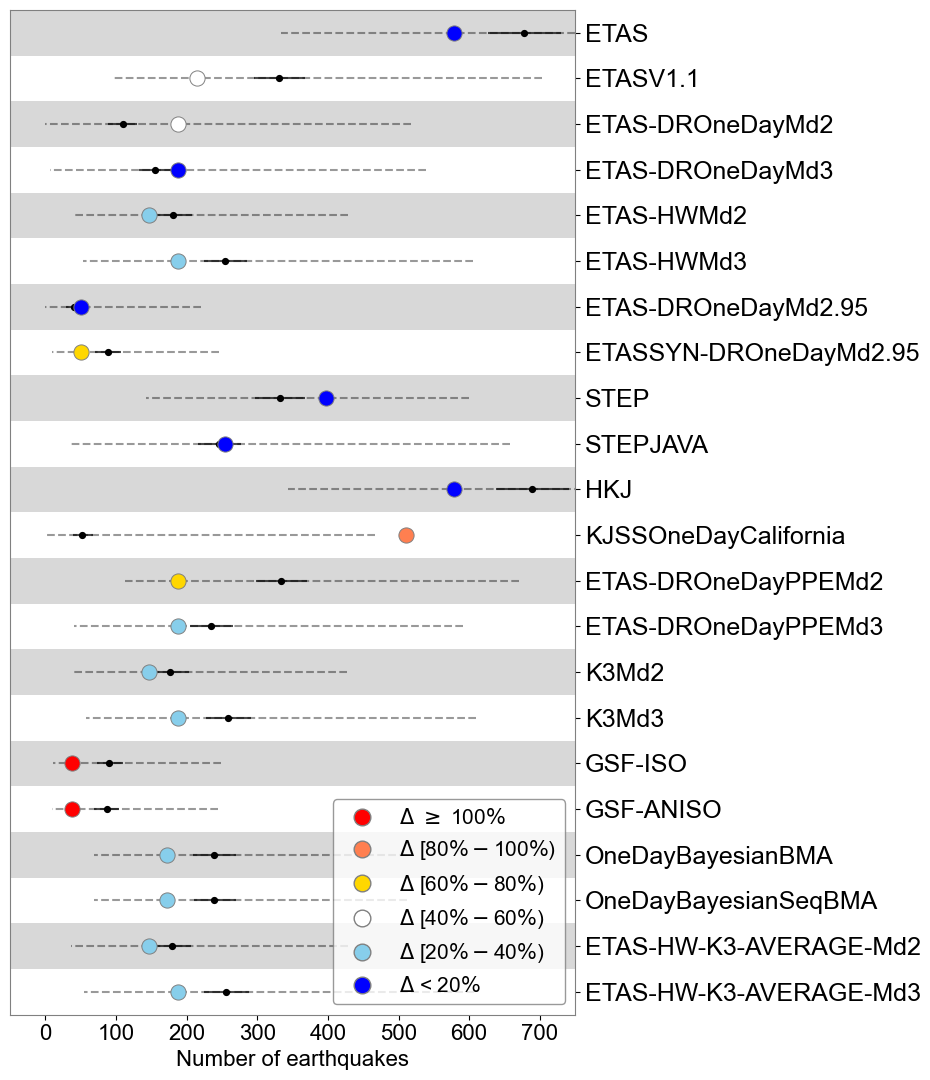

In [51]:
fig = plt.figure(figsize=(14,15))

nbd4_tests = [nbdntest_ETAS_HW_K3_AVERAGE_Md3, nbdntest_ETAS_HW_K3_AVERAGE_Md2, nbdntest_OneDayBayesianSeqBMA, nbdntest_OneDayBayesianBMA,
              nbdntest_GSF_ANISO, nbdntest_GSF_ISO, nbdntest_K3Md3, nbdntest_K3Md2,
              nbdntest_ETAS_DROneDayPPEMd3, nbdntest_ETAS_DROneDayPPEMd2, nbdntest_KJSSOneDayCalifornia, nbdntest_HKJ4,
              nbdntest_STEPJAVA, nbdntest_STEP,
              nbdntest_ETASSYN_DROneDayMd295, nbdntest_ETAS_DROneDayMd295, nbdntest_ETAS_HWMd3, nbdntest_ETAS_HWMd2,
              nbdntest_ETAS_DROneDayMd3, nbdntest_ETAS_DROneDayMd2, nbdntest_ETASv1, nbdntest_ETAS]


variances4 = [var_ETAS_HW_K3_AVERAGE_Md3, var_ETAS_HW_K3_AVERAGE_Md2, var_OneDayBayesianSeqBMA, var_OneDayBayesianBMA,
              var_GSF_ANISO, var_GSF_ISO, var_K3Md3, var_K3Md2,
              var_ETAS_DROneDayPPEMd3, var_ETAS_DROneDayPPEMd2, var_KJSSOneDayCalifornia, var_HKJ4,
              var_STEPJAVA, var_STEP,
              var_ETASSYN_DROneDayMd295, var_ETAS_DROneDayMd295, var_ETAS_HWMd3, var_ETAS_HWMd2,
              var_ETAS_DROneDayMd3, var_ETAS_DROneDayMd2, var_ETASv1, var_ETAS]


n4_tests = [ntest_ETAS_HW_K3_AVERAGE_Md3, ntest_ETAS_HW_K3_AVERAGE_Md2, ntest_OneDayBayesianSeqBMA, ntest_OneDayBayesianBMA,
            ntest_GSF_ANISO, ntest_GSF_ISO, ntest_K3Md3, ntest_K3Md2, 
            ntest_ETAS_DROneDayPPEMd3, ntest_ETAS_DROneDayPPEMd2, ntest_KJSSOneDayCalifornia, ntest_HKJ4,
            ntest_STEPJAVA, ntest_STEP,
            ntest_ETASSYN_DROneDayMd295, ntest_ETAS_DROneDayMd295, ntest_ETAS_HWMd3, ntest_ETAS_HWMd2,
            ntest_ETAS_DROneDayMd3, ntest_ETAS_DROneDayMd2, ntest_ETASv1, ntest_ETAS]

ax = plot_consistency_test(n4_tests, n_models=(len(n4_tests) - 1)/2, one_sided_lower=False, plot_args={'xlabel': 'Number of earthquakes'})

plt.setp(ax.spines.values(), color='grey') 

ax = plot_percentages_and_intervals(nbd4_tests, ax, var=variances4, show_bar=False)
ax = plot_percentages_and_intervals(n4_tests, ax, show_bar=True)

ax.set_yticklabels(['ETAS-HW-K3-AVERAGE-Md3', 'ETAS-HW-K3-AVERAGE-Md2', 'OneDayBayesianSeqBMA', 'OneDayBayesianBMA',
                    'GSF-ANISO', 'GSF-ISO', 'K3Md3', 'K3Md2',
                    'ETAS-DROneDayPPEMd3', 'ETAS-DROneDayPPEMd2', 'KJSSOneDayCalifornia', 'HKJ',
                    'STEPJAVA', 'STEP',
                    'ETASSYN-DROneDayMd2.95', 'ETAS-DROneDayMd2.95', 'ETAS-HWMd3', 'ETAS-HWMd2',
                    'ETAS-DROneDayMd3', 'ETAS-DROneDayMd2', 'ETASV1.1', 'ETAS'], fontsize=18)

ax.yaxis.tick_right() 
ax.set_xlim(-50,750)
ax.set_title('')
plt.savefig('expected_outputs/Figure3c.png', dpi=200, bbox_inches='tight')

<Figure size 1400x1500 with 0 Axes>

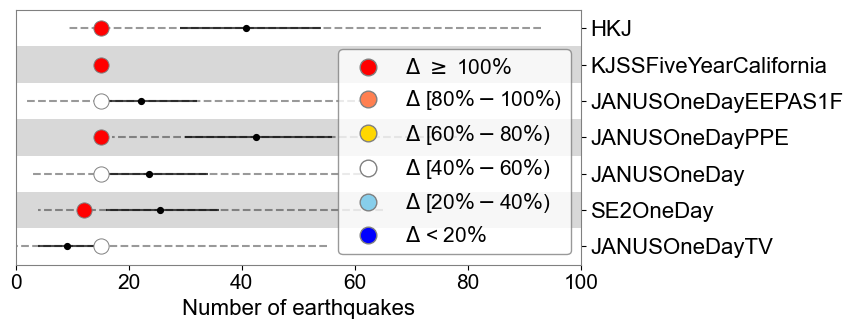

In [52]:
fig = plt.figure(figsize=(14,15))

nbd5_tests = [nbdntest_JANUSOneDayTV,
              nbdntest_SE2OneDay, nbdntest_JANUSOneDay,
              nbdntest_JANUSOneDayPPE, nbdntest_JANUSOneDayEEPAS1F, nbdntest_KJSSFiveYearCalifornia, nbdntest_HKJ5]

variances5 = [var_JANUSOneDayTV,
              var_SE2OneDay, var_JANUSOneDay,
              var_JANUSOneDayPPE, var_JANUSOneDayEEPAS1F, var_KJSSFiveYearCalifornia, var_HKJ5]

n5_tests = [ntest_JANUSOneDayTV, 
            ntest_SE2OneDay, ntest_JANUSOneDay,
            ntest_JANUSOneDayPPE, ntest_JANUSOneDayEEPAS1F, ntest_KJSSFiveYearCalifornia, ntest_HKJ5]

ax = plot_consistency_test(n5_tests, n_models=(len(n5_tests) - 1)/2, one_sided_lower=False, plot_args={'xlabel': 'Number of earthquakes'})

plt.setp(ax.spines.values(), color='grey') 

ax = plot_percentages_and_intervals(nbd5_tests, ax, var=variances5, show_bar=False)
ax = plot_percentages_and_intervals(n5_tests, ax, show_bar=True)

ax.set_yticklabels(['JANUSOneDayTV',
                    'SE2OneDay', 'JANUSOneDay',
                    'JANUSOneDayPPE', 'JANUSOneDayEEPAS1F', 'KJSSFiveYearCalifornia', 'HKJ'], fontsize=16)

ax.yaxis.tick_right() 
ax.set_xlim(0,80)
plt.xticks(np.arange(0, 100.01, step=20), fontsize=15)
ax.set_title('')
plt.savefig('expected_outputs/FigureS3c.png', dpi=200, bbox_inches='tight')

### How good are the models at forecasting the number of earthquakes observed daily?

In [53]:
ETAS['n_ETAS'] = ETAS_ncounts

STEP['n_STEP'] = STEP_ncounts

HKJ['n_HKJ'] = HKJ4_ncounts
KJSSOneDayCalifornia['n_KJSSOneDayCalifornia'] = KJSSOneDayCalifornia_ncounts

In [54]:
ETAS_ferndale = ETAS[(ETAS['date'] >= '2010-01-06') & (ETAS['date'] <= '2010-01-25')]

STEP_ferndale = STEP[(STEP['date'] >= '2010-01-06') & (STEP['date'] <= '2010-01-25')]

HKJ_ferndale = HKJ[(HKJ['date'] >='2010-01-06') & (HKJ['date'] <= '2010-01-25')]
KJSSOneDayCalifornia_ferndale = KJSSOneDayCalifornia[(KJSSOneDayCalifornia['date'] >= '2010-01-06') & (KJSSOneDayCalifornia['date'] <= '2010-01-25')]

In [55]:
ferndale_udates = []
ferndale_start_epoch = []
ferndale_end_epoch = []

for i in range(len(ETAS_ferndale)):
    ferndale_udates.append(datetime.datetime.strptime(ETAS_ferndale.date[ETAS_ferndale.index[i]], '%Y-%m-%d') + datetime.timedelta(days=1))
    ferndale_start_epoch.append(time_utils.strptime_to_utc_epoch(ETAS_ferndale.date[ETAS_ferndale.index[i]] + ' 00:00:00.0'))
    ferndale_end_epoch.append(time_utils.strptime_to_utc_epoch(str(ferndale_udates[i])))

In [56]:
start_date_ferndale = time_utils.strptime_to_utc_epoch('2010-01-06 00:00:00.0')
end_date_ferndale = time_utils.strptime_to_utc_epoch('2010-01-25 00:00:00.0')

catalogue_ferndale = catalogue
catalogue_ferndale.filter(f'origin_time >= {start_date_ferndale}')
catalogue_ferndale.filter(f'origin_time <= {end_date_ferndale}')

In [57]:
obs_ferndale = np.zeros(len(ferndale_start_epoch))

for i in range(len(ferndale_start_epoch)):
    obsx_ferndale = np.zeros(len(catalogue_ferndale.data))
    for j in range(len(catalogue_ferndale.data)):
        if catalogue_ferndale.get_epoch_times()[j] >= ferndale_start_epoch[i] and catalogue_ferndale.get_epoch_times()[j] < ferndale_end_epoch[i]:
            obsx_ferndale[j] = obsx_ferndale[j] + 1
            aux_ferndale = sum(obsx_ferndale)
    obs_ferndale[i] = sum(obsx_ferndale)

In [58]:
ETAS_ferndale['obs'] = obs_ferndale

STEP_ferndale['obs'] = obs_ferndale

HKJ_ferndale['obs'] = obs_ferndale
KJSSOneDayCalifornia_ferndale['obs'] = obs_ferndale

In [59]:
percentile = 95

ETAS_ferndale_plow95 = []
ETAS_ferndale_phigh95 = []

STEP_ferndale_plow95 = []
STEP_ferndale_phigh95 = []

HKJ_ferndale_plow95 = []
HKJ_ferndale_phigh95 = []

KJSSOneDayCalifornia_ferndale_plow95 = []
KJSSOneDayCalifornia_ferndale_phigh95 = []

for i in range(len(ETAS_ferndale)):
    ETAS_ferndale_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_ferndale.n_ETAS[ETAS_ferndale.n_ETAS.index[i]]))
    ETAS_ferndale_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_ferndale.n_ETAS[ETAS_ferndale.n_ETAS.index[i]]))

    STEP_ferndale_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., STEP_ferndale.n_STEP[STEP_ferndale.n_STEP.index[i]]))
    STEP_ferndale_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., STEP_ferndale.n_STEP[STEP_ferndale.n_STEP.index[i]]))
    
    HKJ_ferndale_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., HKJ_ferndale.n_HKJ[HKJ_ferndale.n_HKJ.index[i]]))
    HKJ_ferndale_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., HKJ_ferndale.n_HKJ[HKJ_ferndale.n_HKJ.index[i]]))
    
    KJSSOneDayCalifornia_ferndale_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., KJSSOneDayCalifornia_ferndale.n_KJSSOneDayCalifornia[KJSSOneDayCalifornia_ferndale.n_KJSSOneDayCalifornia.index[i]]))
    KJSSOneDayCalifornia_ferndale_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., KJSSOneDayCalifornia_ferndale.n_KJSSOneDayCalifornia[KJSSOneDayCalifornia_ferndale.n_KJSSOneDayCalifornia.index[i]]))

In [60]:
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)

In [61]:
ETAS_active = ETAS[(ETAS['date'] >= '2010-03-31') & (ETAS['date'] <= '2010-04-19')]

STEP_active = STEP[(STEP['date'] >= '2010-03-31') & (STEP['date'] <= '2010-04-19')]

HKJ_active = HKJ[(HKJ['date'] >= '2010-03-31') & (HKJ['date'] <= '2010-04-19')]
KJSSOneDayCalifornia_active = KJSSOneDayCalifornia[(KJSSOneDayCalifornia['date'] >= '2010-03-31') & (KJSSOneDayCalifornia['date'] <= '2010-04-19')]

In [62]:
active_udates = []
active_start_epoch = []
active_end_epoch = []

for i in range(len(ETAS_active)):
    active_udates.append(datetime.datetime.strptime(ETAS_active.date[ETAS_active.index[i]], '%Y-%m-%d') + datetime.timedelta(days=1))
    active_start_epoch.append(time_utils.strptime_to_utc_epoch(ETAS_active.date[ETAS_active.index[i]] + ' 00:00:00.0'))
    active_end_epoch.append(time_utils.strptime_to_utc_epoch(str(active_udates[i])))

In [63]:
start_date_active = time_utils.strptime_to_utc_epoch('2010-03-31 00:00:00.0')
end_date_active = time_utils.strptime_to_utc_epoch('2010-04-19 00:00:00.0')

catalogue_active = catalogue
catalogue_active.filter(f'origin_time >= {start_date_active}')
catalogue_active.filter(f'origin_time <= {end_date_active}')

In [64]:
obs_active = np.zeros(len(active_start_epoch))

for i in range(len(active_start_epoch)):
    obsx_active = np.zeros(len(catalogue_active.data))
    for j in range(len(catalogue_active.data)):
        if catalogue_active.get_epoch_times()[j] >= active_start_epoch[i] and catalogue_active.get_epoch_times()[j] < active_end_epoch[i]:
            obsx_active[j] = obsx_active[j] + 1
            aux_active = sum(obsx_active)
    obs_active[i] = sum(obsx_active)

In [65]:
ETAS_active['obs'] = obs_active

STEP_active['obs'] = obs_active

HKJ_active['obs'] = obs_active
KJSSOneDayCalifornia_active['obs'] = obs_active

In [66]:
ETAS_active_plow95 = []
ETAS_active_phigh95 = []

STEP_active_plow95 = []
STEP_active_phigh95 = []

HKJ_active_plow95 = []
HKJ_active_phigh95 = []

KJSSOneDayCalifornia_active_plow95 = []
KJSSOneDayCalifornia_active_phigh95 = []

for i in range(len(ETAS_active.n_ETAS)):
    ETAS_active_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_active.n_ETAS[ETAS_active.n_ETAS.index[i]]))
    ETAS_active_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_active.n_ETAS[ETAS_active.n_ETAS.index[i]]))

    STEP_active_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., STEP_active.n_STEP[STEP_active.n_STEP.index[i]]))
    STEP_active_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., STEP_active.n_STEP[STEP_active.n_STEP.index[i]]))
    
    HKJ_active_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., HKJ_active.n_HKJ[HKJ_active.n_HKJ.index[i]]))
    HKJ_active_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., HKJ_active.n_HKJ[HKJ_active.n_HKJ.index[i]]))

    KJSSOneDayCalifornia_active_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., KJSSOneDayCalifornia_active.n_KJSSOneDayCalifornia[KJSSOneDayCalifornia_active.n_KJSSOneDayCalifornia.index[i]]))
    KJSSOneDayCalifornia_active_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., KJSSOneDayCalifornia_active.n_KJSSOneDayCalifornia[KJSSOneDayCalifornia_active.n_KJSSOneDayCalifornia.index[i]]))

In [67]:
ETASv1['n_ETASv1'] = ETASv1_ncounts

STEPJAVA['n_STEPJAVA'] = STEPJAVA_ncounts

OneDayBayesianBMA['n_OneDayBayesianBMA'] = OneDayBayesianBMA_ncounts
OneDayBayesianSeqBMA['n_OneDayBayesianSeqBMA'] = OneDayBayesianSeqBMA_ncounts

In [68]:
ETAS_swarm = ETAS[(ETAS['date'] >= '2012-08-22') & (ETAS['date'] <= '2012-09-10')]
ETASv1_swarm = ETASv1[(ETASv1['date'] >= '2012-08-22') & (ETASv1['date'] <= '2012-09-10')]

STEP_swarm = STEP[(STEP['date'] >= '2012-08-22') & (STEP['date'] <= '2012-09-10')]
STEPJAVA_swarm = STEPJAVA[(STEPJAVA['date'] >= '2012-08-22') & (STEPJAVA['date'] <= '2012-09-10')]

HKJ_swarm = HKJ[(HKJ['date'] >= '2012-08-22') & (HKJ['date'] <= '2012-09-10')]
KJSSOneDayCalifornia_swarm = KJSSOneDayCalifornia[(KJSSOneDayCalifornia['date'] >= '2012-08-22') & (KJSSOneDayCalifornia['date'] <= '2012-09-10')]

OneDayBayesianBMA_swarm = OneDayBayesianBMA[(OneDayBayesianBMA['date'] >= '2012-08-22') & (OneDayBayesianBMA['date'] <= '2012-09-10')]
OneDayBayesianSeqBMA_swarm = OneDayBayesianSeqBMA[(OneDayBayesianSeqBMA['date'] >= '2012-08-22') & (OneDayBayesianSeqBMA['date'] <= '2012-09-10')]

In [69]:
swarm_udates = []
swarm_start_epoch = []
swarm_end_epoch = []

for i in range(len(ETAS_swarm)):
    swarm_udates.append(datetime.datetime.strptime(ETAS_swarm.date[ETAS_swarm.index[i]], '%Y-%m-%d') + datetime.timedelta(days=1))
    swarm_start_epoch.append(time_utils.strptime_to_utc_epoch(ETAS_swarm.date[ETAS_swarm.index[i]] + ' 00:00:00.0'))
    swarm_end_epoch.append(time_utils.strptime_to_utc_epoch(str(swarm_udates[i])))

In [70]:
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)

In [71]:
start_date_swarm = time_utils.strptime_to_utc_epoch('2012-08-22 00:00:00.0')
end_date_swarm = time_utils.strptime_to_utc_epoch('2012-09-10 00:00:00.0')

catalogue_swarm = catalogue
catalogue_swarm.filter(f'origin_time >= {start_date_swarm}')
catalogue_swarm.filter(f'origin_time <= {end_date_swarm}')

In [72]:
obs_swarm = np.zeros(len(swarm_start_epoch))

for i in range(len(swarm_start_epoch)):
    obsx_swarm = np.zeros(len(catalogue_swarm.data))
    for j in range(len(catalogue_swarm.data)):
        if catalogue_swarm.get_epoch_times()[j] >= swarm_start_epoch[i] and catalogue_swarm.get_epoch_times()[j] < swarm_end_epoch[i]:
            obsx_swarm[j] = obsx_swarm[j] + 1
            aux_swarm = sum(obsx_swarm)
    obs_swarm[i] = sum(obsx_swarm)

In [73]:
ETAS_swarm['obs'] = obs_swarm
ETASv1_swarm['obs'] = obs_swarm

STEP_swarm['obs'] = obs_swarm
STEPJAVA_swarm['obs'] = obs_swarm

HKJ_swarm['obs'] = obs_swarm
KJSSOneDayCalifornia_swarm['obs'] = obs_swarm

OneDayBayesianBMA_swarm['obs'] = obs_swarm
OneDayBayesianSeqBMA_swarm['obs'] = obs_swarm

In [74]:
ETAS_swarm_plow95 = []
ETAS_swarm_phigh95 = []

ETASv1_swarm_plow95 = []
ETASv1_swarm_phigh95 = []

STEP_swarm_plow95 = []
STEP_swarm_phigh95 = []

STEPJAVA_swarm_plow95 = []
STEPJAVA_swarm_phigh95 = []

HKJ_swarm_plow95 = []
HKJ_swarm_phigh95 = []

KJSSOneDayCalifornia_swarm_plow95 = []
KJSSOneDayCalifornia_swarm_phigh95 = []

OneDayBayesianBMA_swarm_plow95 = []
OneDayBayesianBMA_swarm_phigh95 = []

OneDayBayesianSeqBMA_swarm_plow95 = []
OneDayBayesianSeqBMA_swarm_phigh95 = []

for i in range(len(ETAS_swarm.n_ETAS)):
    ETAS_swarm_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_swarm.n_ETAS[ETAS_swarm.n_ETAS.index[i]]))
    ETAS_swarm_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_swarm.n_ETAS[ETAS_swarm.n_ETAS.index[i]]))

    ETASv1_swarm_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETASv1_swarm.n_ETASv1[ETASv1_swarm.n_ETASv1.index[i]]))
    ETASv1_swarm_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETASv1_swarm.n_ETASv1[ETASv1_swarm.n_ETASv1.index[i]]))

    STEP_swarm_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., STEP_swarm.n_STEP[STEP_swarm.n_STEP.index[i]]))
    STEP_swarm_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., STEP_swarm.n_STEP[STEP_swarm.n_STEP.index[i]]))

    STEPJAVA_swarm_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., STEPJAVA_swarm.n_STEPJAVA[STEPJAVA_swarm.n_STEPJAVA.index[i]]))
    STEPJAVA_swarm_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., STEPJAVA_swarm.n_STEPJAVA[STEPJAVA_swarm.n_STEPJAVA.index[i]]))

    HKJ_swarm_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., HKJ_swarm.n_HKJ[HKJ_swarm.n_HKJ.index[i]]))
    HKJ_swarm_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., HKJ_swarm.n_HKJ[HKJ_swarm.n_HKJ.index[i]]))
 
    KJSSOneDayCalifornia_swarm_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., KJSSOneDayCalifornia_swarm.n_KJSSOneDayCalifornia[KJSSOneDayCalifornia_swarm.n_KJSSOneDayCalifornia.index[i]]))
    KJSSOneDayCalifornia_swarm_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., KJSSOneDayCalifornia_swarm.n_KJSSOneDayCalifornia[KJSSOneDayCalifornia_swarm.n_KJSSOneDayCalifornia.index[i]]))

    OneDayBayesianBMA_swarm_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., OneDayBayesianBMA_swarm.n_OneDayBayesianBMA[OneDayBayesianBMA_swarm.n_OneDayBayesianBMA.index[i]]))
    OneDayBayesianBMA_swarm_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., OneDayBayesianBMA_swarm.n_OneDayBayesianBMA[OneDayBayesianBMA_swarm.n_OneDayBayesianBMA.index[i]]))
    
    OneDayBayesianSeqBMA_swarm_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., OneDayBayesianSeqBMA_swarm.n_OneDayBayesianSeqBMA[OneDayBayesianSeqBMA_swarm.n_OneDayBayesianSeqBMA.index[i]]))
    OneDayBayesianSeqBMA_swarm_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., OneDayBayesianSeqBMA_swarm.n_OneDayBayesianSeqBMA[OneDayBayesianSeqBMA_swarm.n_OneDayBayesianSeqBMA.index[i]])) 

In [75]:
ETAS_DROneDayMd2['n_ETAS_DROneDayMd2'] = ETAS_DROneDayMd2_ncounts
ETAS_DROneDayMd3['n_ETAS_DROneDayMd3'] = ETAS_DROneDayMd3_ncounts
ETAS_HWMd2['n_ETAS_HWMd2'] = ETAS_HWMd2_ncounts
ETAS_HWMd3['n_ETAS_HWMd3'] = ETAS_HWMd3_ncounts
ETAS_DROneDayMd295['n_ETAS_DROneDayMd295'] = ETAS_DROneDayMd295_ncounts
ETASSYN_DROneDayMd295['n_ETASSYN_DROneDayMd295'] = ETASSYN_DROneDayMd295_ncounts

ETAS_DROneDayPPEMd2['n_ETAS_DROneDayPPEMd2'] = ETAS_DROneDayPPEMd2_ncounts
ETAS_DROneDayPPEMd3['n_ETAS_DROneDayPPEMd3'] = ETAS_DROneDayPPEMd3_ncounts

K3Md2['n_K3Md2'] = K3Md2_ncounts
K3Md3['n_K3Md3'] = K3Md3_ncounts
GSF_ISO['n_GSF_ISO'] = GSF_ISO_ncounts
GSF_ANISO['n_GSF_ANISO'] = GSF_ANISO_ncounts

ETAS_HW_K3_AVERAGE_Md2['n_ETAS_HW_K3_AVERAGE_Md2'] = ETAS_HW_K3_AVERAGE_Md2_ncounts
ETAS_HW_K3_AVERAGE_Md3['n_ETAS_HW_K3_AVERAGE_Md3'] = ETAS_HW_K3_AVERAGE_Md3_ncounts

HKJ5['n_HKJ5'] = HKJ5_ncounts
KJSSFiveYearCalifornia['n_KJSSFiveYearCalifornia'] = KJSSFiveYearCalifornia_ncounts
JANUSOneDayEEPAS1F['n_JANUSOneDayEEPAS1F'] = JANUSOneDayEEPAS1F_ncounts
JANUSOneDayPPE['n_JANUSOneDayPPE'] = JANUSOneDayPPE_ncounts

JANUSOneDay['n_JANUSOneDay'] = JANUSOneDay_ncounts
SE2OneDay['n_SE2OneDay'] = SE2OneDay_ncounts

JANUSOneDayTV['n_JANUSOneDayTV'] = JANUSOneDayTV_ncounts

In [76]:
ETAS_mendo = ETAS[(ETAS['date'] >= '2014-03-06') & (ETAS['date'] <= '2014-03-25')]
ETASv1_mendo = ETASv1[(ETASv1['date'] >= '2014-03-06') & (ETASv1['date'] <= '2014-03-25')]
ETAS_DROneDayMd2_mendo = ETAS_DROneDayMd2[(ETAS_DROneDayMd2['date'] >= '2014-03-06') & (ETAS_DROneDayMd2['date'] <= '2014-03-25')]
ETAS_DROneDayMd3_mendo = ETAS_DROneDayMd3[(ETAS_DROneDayMd3['date'] >= '2014-03-06') & (ETAS_DROneDayMd3['date'] <= '2014-03-25')]
ETAS_HWMd2_mendo =  ETAS_HWMd2[(ETAS_HWMd2['date'] >= '2014-03-06') & (ETAS_HWMd2['date'] <= '2014-03-25')]
ETAS_HWMd3_mendo =  ETAS_HWMd3[(ETAS_HWMd3['date'] >= '2014-03-06') & (ETAS_HWMd3['date'] <= '2014-03-25')]

STEPJAVA_mendo = STEPJAVA[(STEPJAVA['date'] >= '2014-03-06') & (STEPJAVA['date'] <= '2014-03-25')]

HKJ_mendo = HKJ[(HKJ['date'] >= '2014-03-06') & (HKJ['date'] <= '2014-03-25')]
KJSSOneDayCalifornia_mendo = KJSSOneDayCalifornia[(KJSSOneDayCalifornia['date'] >= '2014-03-06') & (KJSSOneDayCalifornia['date'] <= '2014-03-25')]
ETAS_DROneDayPPEMd2_mendo = ETAS_DROneDayPPEMd2[(ETAS_DROneDayPPEMd2['date'] >= '2014-03-06') & (ETAS_DROneDayPPEMd2['date'] <= '2014-03-25')]
ETAS_DROneDayPPEMd3_mendo = ETAS_DROneDayPPEMd3[(ETAS_DROneDayPPEMd3['date'] >= '2014-03-06') & (ETAS_DROneDayPPEMd3['date'] <= '2014-03-25')]

K3Md2_mendo = K3Md2[(K3Md2['date'] >= '2014-03-06') & (K3Md2['date'] <= '2014-03-25')]
K3Md3_mendo = K3Md3[(K3Md3['date'] >= '2014-03-06') & (K3Md3['date'] <= '2014-03-25')]

ETAS_HW_K3_AVERAGE_Md2_mendo = ETAS_HW_K3_AVERAGE_Md2[(ETAS_HW_K3_AVERAGE_Md2['date'] >= '2014-03-06') & (ETAS_HW_K3_AVERAGE_Md2['date'] <= '2014-03-25')]
ETAS_HW_K3_AVERAGE_Md3_mendo = ETAS_HW_K3_AVERAGE_Md3[(ETAS_HW_K3_AVERAGE_Md3['date'] >= '2014-03-06') & (ETAS_HW_K3_AVERAGE_Md3['date'] <= '2014-03-25')]
OneDayBayesianBMA_mendo = OneDayBayesianBMA[(OneDayBayesianBMA['date'] >= '2014-03-06') & (OneDayBayesianBMA['date'] <= '2014-03-25')]
OneDayBayesianSeqBMA_mendo = OneDayBayesianSeqBMA[(OneDayBayesianSeqBMA['date'] >= '2014-03-06') & (OneDayBayesianSeqBMA['date'] <= '2014-03-25')]

HKJ5_mendo = HKJ5[(HKJ5['date'] >= '2014-03-06') & (HKJ5['date'] <= '2014-03-25')]
KJSSFiveYearCalifornia_mendo = KJSSFiveYearCalifornia[(KJSSFiveYearCalifornia['date'] >= '2014-03-06') & (KJSSFiveYearCalifornia['date'] <= '2014-03-25')]
JANUSOneDayEEPAS1F_mendo = JANUSOneDayEEPAS1F[(JANUSOneDay['date'] >= '2014-03-06') & (JANUSOneDayEEPAS1F['date'] <= '2014-03-25')]
JANUSOneDayPPE_mendo = JANUSOneDayPPE[(JANUSOneDayPPE['date'] >= '2014-03-06') & (JANUSOneDayPPE['date'] <= '2014-03-25')]

JANUSOneDay_mendo = JANUSOneDay[(JANUSOneDay['date'] >= '2014-03-06') & (JANUSOneDay['date'] <= '2014-03-25')]
SE2OneDay_mendo = SE2OneDay[(SE2OneDay['date'] >= '2014-03-06') & (SE2OneDay['date'] <= '2014-03-25')]

JANUSOneDayTV_mendo = JANUSOneDayTV[(JANUSOneDayTV['date'] >= '2014-03-06') & (JANUSOneDayTV['date'] <= '2014-03-25')]

In [77]:
mendo_udates = []
mendo_start_epoch = []
mendo_end_epoch = []

for i in range(len(ETAS_mendo)):
    mendo_udates.append(datetime.datetime.strptime(ETAS_mendo.date[ETAS_mendo.index[i]], '%Y-%m-%d') + datetime.timedelta(days=1))
    mendo_start_epoch.append(time_utils.strptime_to_utc_epoch(ETAS_mendo.date[ETAS_mendo.index[i]] + ' 00:00:00.0'))
    mendo_end_epoch.append(time_utils.strptime_to_utc_epoch(str(mendo_udates[i])))

In [78]:
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)

In [79]:
start_date_mendo = time_utils.strptime_to_utc_epoch('2014-03-06 00:00:00.0')
end_date_mendo = time_utils.strptime_to_utc_epoch('2014-03-25 00:00:00.0')

catalogue_mendo = catalogue
catalogue_mendo.filter(f'origin_time >= {start_date_mendo}')
catalogue_mendo.filter(f'origin_time <= {end_date_mendo}')

In [80]:
obs_mendo = np.zeros(len(mendo_start_epoch))

for i in range(len(mendo_start_epoch)):
    obsx_mendo = np.zeros(len(catalogue_mendo.data))
    for j in range(len(catalogue_mendo.data)):
        if catalogue_mendo.get_epoch_times()[j] >= mendo_start_epoch[i] and catalogue_mendo.get_epoch_times()[j] < mendo_end_epoch[i]:
            obsx_mendo[j] = obsx_mendo[j] + 1
            aux_mendo = sum(obsx_mendo)
    obs_mendo[i] = sum(obsx_mendo)

In [81]:
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)

In [82]:
start_date_mendo = time_utils.strptime_to_utc_epoch('2014-03-06 00:00:00.0')
end_date_mendo = time_utils.strptime_to_utc_epoch('2014-03-25 00:00:00.0')

catalogue_mendo2 = catalogue
catalogue_mendo2.filter(f'origin_time >= {start_date_mendo}')
catalogue_mendo2.filter(f'origin_time <= {end_date_mendo}')
catalogue_mendo2.filter(f'magnitude >= {4.95}')

In [83]:
obs_mendo2 = np.zeros(len(mendo_start_epoch))

for i in range(len(mendo_start_epoch)):
    obsx_mendo2 = np.zeros(len(catalogue_mendo2.data))
    for j in range(len(catalogue_mendo2.data)):
        if catalogue_mendo2.get_epoch_times()[j] >= mendo_start_epoch[i] and catalogue_mendo2.get_epoch_times()[j] < mendo_end_epoch[i]:
            obsx_mendo2[j] = obsx_mendo2[j] + 1
            aux_mendo2 = sum(obsx_mendo2)
    obs_mendo2[i] = sum(obsx_mendo2)

In [84]:
ETAS_mendo['obs'] = obs_mendo
ETASv1_mendo['obs'] = obs_mendo
ETAS_DROneDayMd2_mendo['obs'] = obs_mendo
ETAS_DROneDayMd3_mendo['obs'] = obs_mendo
ETAS_HWMd2_mendo['obs'] = obs_mendo
ETAS_HWMd3_mendo['obs'] = obs_mendo

STEPJAVA_mendo['obs'] = obs_mendo

HKJ_mendo['obs'] = obs_mendo
KJSSOneDayCalifornia_mendo['obs'] = obs_mendo
ETAS_DROneDayPPEMd2_mendo['obs'] = obs_mendo
ETAS_DROneDayPPEMd3_mendo['obs'] = obs_mendo

K3Md2_mendo['obs'] = obs_mendo
K3Md3_mendo['obs'] = obs_mendo

OneDayBayesianBMA_mendo['obs'] = obs_mendo
OneDayBayesianSeqBMA_mendo['obs'] = obs_mendo
ETAS_HW_K3_AVERAGE_Md2_mendo['obs'] = obs_mendo
ETAS_HW_K3_AVERAGE_Md3_mendo['obs'] = obs_mendo

HKJ5_mendo['obs'] = obs_mendo2
KJSSFiveYearCalifornia_mendo['obs'] = obs_mendo2
JANUSOneDayEEPAS1F_mendo['obs'] = obs_mendo2
JANUSOneDayPPE_mendo['obs'] = obs_mendo2

JANUSOneDay_mendo['obs'] = obs_mendo2
SE2OneDay_mendo['obs'] = obs_mendo2

JANUSOneDayTV_mendo['obs'] = obs_mendo2

In [85]:
ETAS_mendo_plow95 = []
ETAS_mendo_phigh95 = []

ETASv1_mendo_plow95 = []
ETASv1_mendo_phigh95 = []

ETAS_DROneDayMd2_mendo_plow95 = []
ETAS_DROneDayMd2_mendo_phigh95 = []

ETAS_DROneDayMd3_mendo_plow95 = []
ETAS_DROneDayMd3_mendo_phigh95 = []

ETAS_HWMd2_mendo_plow95 = []
ETAS_HWMd2_mendo_phigh95 = []

ETAS_HWMd3_mendo_plow95 = []
ETAS_HWMd3_mendo_phigh95 = []

STEPJAVA_mendo_plow95 = []
STEPJAVA_mendo_phigh95 = []

HKJ_mendo_plow95 = []
HKJ_mendo_phigh95 = []

KJSSOneDayCalifornia_mendo_plow95 = []
KJSSOneDayCalifornia_mendo_phigh95 = []

ETAS_DROneDayPPEMd2_mendo_plow95 = []
ETAS_DROneDayPPEMd2_mendo_phigh95 = []

ETAS_DROneDayPPEMd3_mendo_plow95 = []
ETAS_DROneDayPPEMd3_mendo_phigh95 = []

K3Md2_mendo_plow95 = []
K3Md2_mendo_phigh95 = []

K3Md3_mendo_plow95 = []
K3Md3_mendo_phigh95 = []

OneDayBayesianBMA_mendo_plow95 = []
OneDayBayesianBMA_mendo_phigh95 = []

OneDayBayesianSeqBMA_mendo_plow95 = []
OneDayBayesianSeqBMA_mendo_phigh95 = []

ETAS_HW_K3_AVERAGE_Md2_mendo_plow95 = []
ETAS_HW_K3_AVERAGE_Md2_mendo_phigh95 = []

ETAS_HW_K3_AVERAGE_Md3_mendo_plow95 = []
ETAS_HW_K3_AVERAGE_Md3_mendo_phigh95 = []

HKJ5_mendo_plow95 = []
HKJ5_mendo_phigh95 = []

KJSSFiveYearCalifornia_mendo_plow95 = []
KJSSFiveYearCalifornia_mendo_phigh95 = []

JANUSOneDayEEPAS1F_mendo_plow95 = []
JANUSOneDayEEPAS1F_mendo_phigh95 = []

JANUSOneDayPPE_mendo_plow95 = []
JANUSOneDayPPE_mendo_phigh95 = []

JANUSOneDay_mendo_plow95 = []
JANUSOneDay_mendo_phigh95 = []

SE2OneDay_mendo_plow95 = []
SE2OneDay_mendo_phigh95 = []

JANUSOneDayTV_mendo_plow95 = []
JANUSOneDayTV_mendo_phigh95 = []

for i in range(len(ETAS_mendo.n_ETAS)):
    ETAS_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_mendo.n_ETAS[ETAS_mendo.n_ETAS.index[i]]))
    ETAS_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_mendo.n_ETAS[ETAS_mendo.n_ETAS.index[i]]))

    ETASv1_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETASv1_mendo.n_ETASv1[ETASv1_mendo.n_ETASv1.index[i]]))
    ETASv1_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETASv1_mendo.n_ETASv1[ETASv1_mendo.n_ETASv1.index[i]]))

    ETAS_DROneDayMd2_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_DROneDayMd2_mendo.n_ETAS_DROneDayMd2[ETAS_DROneDayMd2_mendo.n_ETAS_DROneDayMd2.index[i]]))
    ETAS_DROneDayMd2_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_DROneDayMd2_mendo.n_ETAS_DROneDayMd2[ETAS_DROneDayMd2_mendo.n_ETAS_DROneDayMd2.index[i]]))
    
    ETAS_DROneDayMd3_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_DROneDayMd3_mendo.n_ETAS_DROneDayMd3[ETAS_DROneDayMd3_mendo.n_ETAS_DROneDayMd3.index[i]]))
    ETAS_DROneDayMd3_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_DROneDayMd3_mendo.n_ETAS_DROneDayMd3[ETAS_DROneDayMd3_mendo.n_ETAS_DROneDayMd3.index[i]]))

    ETAS_HWMd2_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_HWMd2_mendo.n_ETAS_HWMd2[ETAS_HWMd2_mendo.n_ETAS_HWMd2.index[i]]))
    ETAS_HWMd2_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_HWMd2_mendo.n_ETAS_HWMd2[ETAS_HWMd2_mendo.n_ETAS_HWMd2.index[i]]))
    
    ETAS_HWMd3_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_HWMd3_mendo.n_ETAS_HWMd3[ETAS_HWMd3_mendo.n_ETAS_HWMd3.index[i]]))
    ETAS_HWMd3_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_HWMd3_mendo.n_ETAS_HWMd3[ETAS_HWMd3_mendo.n_ETAS_HWMd3.index[i]]))

    STEPJAVA_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., STEPJAVA_mendo.n_STEPJAVA[STEPJAVA_mendo.n_STEPJAVA.index[i]]))
    STEPJAVA_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., STEPJAVA_mendo.n_STEPJAVA[STEPJAVA_mendo.n_STEPJAVA.index[i]]))
    
    HKJ_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., HKJ_mendo.n_HKJ[HKJ_mendo.n_HKJ.index[i]]))
    HKJ_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., HKJ_mendo.n_HKJ[HKJ_mendo.n_HKJ.index[i]]))
    
    KJSSOneDayCalifornia_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., KJSSOneDayCalifornia_mendo.n_KJSSOneDayCalifornia[KJSSOneDayCalifornia_mendo.n_KJSSOneDayCalifornia.index[i]]))
    KJSSOneDayCalifornia_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., KJSSOneDayCalifornia_mendo.n_KJSSOneDayCalifornia[KJSSOneDayCalifornia_mendo.n_KJSSOneDayCalifornia.index[i]]))
    
    ETAS_DROneDayPPEMd2_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_DROneDayPPEMd2_mendo.n_ETAS_DROneDayPPEMd2[ETAS_DROneDayPPEMd2_mendo.n_ETAS_DROneDayPPEMd2.index[i]]))
    ETAS_DROneDayPPEMd2_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_DROneDayPPEMd2_mendo.n_ETAS_DROneDayPPEMd2[ETAS_DROneDayPPEMd2_mendo.n_ETAS_DROneDayPPEMd2.index[i]]))
    
    ETAS_DROneDayPPEMd3_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_DROneDayPPEMd3_mendo.n_ETAS_DROneDayPPEMd3[ETAS_DROneDayPPEMd3_mendo.n_ETAS_DROneDayPPEMd3.index[i]]))
    ETAS_DROneDayPPEMd3_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_DROneDayPPEMd3_mendo.n_ETAS_DROneDayPPEMd3[ETAS_DROneDayPPEMd3_mendo.n_ETAS_DROneDayPPEMd3.index[i]]))

    K3Md2_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., K3Md2_mendo.n_K3Md2[K3Md2_mendo.n_K3Md2.index[i]]))
    K3Md2_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., K3Md2_mendo.n_K3Md2[K3Md2_mendo.n_K3Md2.index[i]]))
    
    K3Md3_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., K3Md3_mendo.n_K3Md3[K3Md3_mendo.n_K3Md3.index[i]]))
    K3Md3_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., K3Md3_mendo.n_K3Md3[K3Md3_mendo.n_K3Md3.index[i]]))
    
    OneDayBayesianBMA_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., OneDayBayesianBMA_mendo.n_OneDayBayesianBMA[OneDayBayesianBMA_mendo.n_OneDayBayesianBMA.index[i]]))
    OneDayBayesianBMA_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., OneDayBayesianBMA_mendo.n_OneDayBayesianBMA[OneDayBayesianBMA_mendo.n_OneDayBayesianBMA.index[i]]))
    
    OneDayBayesianSeqBMA_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., OneDayBayesianSeqBMA_mendo.n_OneDayBayesianSeqBMA[OneDayBayesianSeqBMA_mendo.n_OneDayBayesianSeqBMA.index[i]]))
    OneDayBayesianSeqBMA_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., OneDayBayesianSeqBMA_mendo.n_OneDayBayesianSeqBMA[OneDayBayesianSeqBMA_mendo.n_OneDayBayesianSeqBMA.index[i]]))
    
    ETAS_HW_K3_AVERAGE_Md2_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_HW_K3_AVERAGE_Md2_mendo.n_ETAS_HW_K3_AVERAGE_Md2[ETAS_HW_K3_AVERAGE_Md2_mendo.n_ETAS_HW_K3_AVERAGE_Md2.index[i]]))
    ETAS_HW_K3_AVERAGE_Md2_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_HW_K3_AVERAGE_Md2_mendo.n_ETAS_HW_K3_AVERAGE_Md2[ETAS_HW_K3_AVERAGE_Md2_mendo.n_ETAS_HW_K3_AVERAGE_Md2.index[i]]))
    
    ETAS_HW_K3_AVERAGE_Md3_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_HW_K3_AVERAGE_Md3_mendo.n_ETAS_HW_K3_AVERAGE_Md3[ETAS_HW_K3_AVERAGE_Md3_mendo.n_ETAS_HW_K3_AVERAGE_Md3.index[i]]))
    ETAS_HW_K3_AVERAGE_Md3_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_HW_K3_AVERAGE_Md3_mendo.n_ETAS_HW_K3_AVERAGE_Md3[ETAS_HW_K3_AVERAGE_Md3_mendo.n_ETAS_HW_K3_AVERAGE_Md3.index[i]]))

    HKJ5_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., HKJ5_mendo.n_HKJ5[HKJ5_mendo.n_HKJ5.index[i]]))
    HKJ5_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., HKJ5_mendo.n_HKJ5[HKJ5_mendo.n_HKJ5.index[i]]))
    
    KJSSFiveYearCalifornia_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., KJSSFiveYearCalifornia_mendo.n_KJSSFiveYearCalifornia[KJSSFiveYearCalifornia_mendo.n_KJSSFiveYearCalifornia.index[i]]))
    KJSSFiveYearCalifornia_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., KJSSFiveYearCalifornia_mendo.n_KJSSFiveYearCalifornia[KJSSFiveYearCalifornia_mendo.n_KJSSFiveYearCalifornia.index[i]]))
    
    JANUSOneDayEEPAS1F_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., JANUSOneDayEEPAS1F_mendo.n_JANUSOneDayEEPAS1F[JANUSOneDayEEPAS1F_mendo.n_JANUSOneDayEEPAS1F.index[i]]))
    JANUSOneDayEEPAS1F_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., JANUSOneDayEEPAS1F_mendo.n_JANUSOneDayEEPAS1F[JANUSOneDayEEPAS1F_mendo.n_JANUSOneDayEEPAS1F.index[i]]))
    
    JANUSOneDayPPE_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., JANUSOneDayPPE_mendo.n_JANUSOneDayPPE[JANUSOneDayPPE_mendo.n_JANUSOneDayPPE.index[i]]))
    JANUSOneDayPPE_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., JANUSOneDayPPE_mendo.n_JANUSOneDayPPE[JANUSOneDayPPE_mendo.n_JANUSOneDayPPE.index[i]]))
    
    JANUSOneDay_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., JANUSOneDay_mendo.n_JANUSOneDay[JANUSOneDay_mendo.n_JANUSOneDay.index[i]]))
    JANUSOneDay_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., JANUSOneDay_mendo.n_JANUSOneDay[JANUSOneDay_mendo.n_JANUSOneDay.index[i]]))
    
    SE2OneDay_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., SE2OneDay_mendo.n_SE2OneDay[SE2OneDay_mendo.n_SE2OneDay.index[i]]))
    SE2OneDay_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., SE2OneDay_mendo.n_SE2OneDay[SE2OneDay_mendo.n_SE2OneDay.index[i]]))
    
    JANUSOneDayTV_mendo_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., JANUSOneDayTV_mendo.n_JANUSOneDayTV[JANUSOneDayTV_mendo.n_JANUSOneDayTV.index[i]]))
    JANUSOneDayTV_mendo_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., JANUSOneDayTV_mendo.n_JANUSOneDayTV[JANUSOneDayTV_mendo.n_JANUSOneDayTV.index[i]]))

In [86]:
ETAS_napa = ETAS[(ETAS['date'] >= '2014-08-20') & (ETAS['date'] <= '2014-09-08')]
ETASv1_napa = ETASv1[(ETASv1['date'] >= '2014-08-20') & (ETASv1['date'] <= '2014-09-08')]
ETAS_DROneDayMd2_napa = ETAS_DROneDayMd2[(ETAS_DROneDayMd2['date'] >= '2014-08-20') & (ETAS_DROneDayMd2['date'] <= '2014-09-08')]
ETAS_DROneDayMd3_napa = ETAS_DROneDayMd3[(ETAS_DROneDayMd3['date'] >= '2014-08-20') & (ETAS_DROneDayMd3['date'] <= '2014-09-08')]
ETAS_HWMd2_napa =  ETAS_HWMd2[(ETAS_HWMd2['date'] >= '2014-08-20') & (ETAS_HWMd2['date'] <= '2014-09-08')]
ETAS_HWMd3_napa =  ETAS_HWMd3[(ETAS_HWMd3['date'] >= '2014-08-20') & (ETAS_HWMd3['date'] <= '2014-09-08')]

STEPJAVA_napa = STEPJAVA[(STEPJAVA['date'] >= '2014-08-20') & (STEPJAVA['date'] <= '2014-09-08')]

HKJ_napa = HKJ[(HKJ['date'] >= '2014-08-20') & (HKJ['date'] <= '2014-09-08')]
KJSSOneDayCalifornia_napa = KJSSOneDayCalifornia[(KJSSOneDayCalifornia['date'] >= '2014-08-20') & (KJSSOneDayCalifornia['date'] <= '2014-09-08')]
ETAS_DROneDayPPEMd2_napa = ETAS_DROneDayPPEMd2[(ETAS_DROneDayPPEMd2['date'] >= '2014-08-20') & (ETAS_DROneDayPPEMd2['date'] <= '2014-09-08')]
ETAS_DROneDayPPEMd3_napa = ETAS_DROneDayPPEMd3[(ETAS_DROneDayPPEMd3['date'] >= '2014-08-20') & (ETAS_DROneDayPPEMd3['date'] <= '2014-09-08')]
K3Md2_napa = K3Md2[(K3Md2['date'] >= '2014-08-20') & (K3Md2['date'] <= '2014-09-08')]
K3Md3_napa = K3Md3[(K3Md3['date'] >= '2014-08-20') & (K3Md3['date'] <= '2014-09-08')]

OneDayBayesianBMA_napa = OneDayBayesianBMA[(OneDayBayesianBMA['date'] >= '2014-08-20') & (OneDayBayesianBMA['date'] <= '2014-09-08')]
OneDayBayesianSeqBMA_napa = OneDayBayesianSeqBMA[(OneDayBayesianSeqBMA['date'] >= '2014-08-20') & (OneDayBayesianSeqBMA['date'] <= '2014-09-08')]
ETAS_HW_K3_AVERAGE_Md2_napa = ETAS_HW_K3_AVERAGE_Md2[(ETAS_HW_K3_AVERAGE_Md2['date'] >= '2014-08-20') & (ETAS_HW_K3_AVERAGE_Md2['date'] <= '2014-09-08')]
ETAS_HW_K3_AVERAGE_Md3_napa = ETAS_HW_K3_AVERAGE_Md3[(ETAS_HW_K3_AVERAGE_Md3['date'] >= '2014-08-20') & (ETAS_HW_K3_AVERAGE_Md3['date'] <= '2014-09-08')]

HKJ5_napa = HKJ5[(HKJ5['date'] >= '2014-08-20') & (HKJ5['date'] <= '2014-09-08')]
KJSSFiveYearCalifornia_napa = KJSSFiveYearCalifornia[(KJSSFiveYearCalifornia['date'] >= '2014-08-20') & (KJSSFiveYearCalifornia['date'] <= '2014-09-08')]
JANUSOneDayEEPAS1F_napa = JANUSOneDayEEPAS1F[(JANUSOneDay['date'] >= '2014-08-20') & (JANUSOneDayEEPAS1F['date'] <= '2014-09-08')]
JANUSOneDayPPE_napa = JANUSOneDayPPE[(JANUSOneDayPPE['date'] >= '2014-08-20') & (JANUSOneDayPPE['date'] <= '2014-09-08')]

JANUSOneDay_napa = JANUSOneDay[(JANUSOneDay['date'] >= '2014-08-20') & (JANUSOneDay['date'] <= '2014-09-08')]
SE2OneDay_napa = SE2OneDay[(SE2OneDay['date'] >= '2014-08-20') & (SE2OneDay['date'] <= '2014-09-08')]

JANUSOneDayTV_napa = JANUSOneDayTV[(JANUSOneDayTV['date'] >= '2014-08-20') & (JANUSOneDayTV['date'] <= '2014-09-08')]

In [87]:
napa_udates = []
napa_start_epoch = []
napa_end_epoch = []

for i in range(len(ETAS_napa)):
    napa_udates.append(datetime.datetime.strptime(ETAS_napa.date[ETAS_napa.index[i]], '%Y-%m-%d') + datetime.timedelta(days=1))
    napa_start_epoch.append(time_utils.strptime_to_utc_epoch(ETAS_napa.date[ETAS_napa.index[i]] + ' 00:00:00.0'))
    napa_end_epoch.append(time_utils.strptime_to_utc_epoch(str(napa_udates[i])))

In [88]:
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)

In [89]:
start_date_napa = time_utils.strptime_to_utc_epoch('2014-08-20 00:00:00.0')
end_date_napa = time_utils.strptime_to_utc_epoch('2014-09-08 00:00:00.0')

catalogue_napa = catalogue
catalogue_napa.filter(f'origin_time >= {start_date_napa}')
catalogue_napa.filter(f'origin_time <= {end_date_napa}')

In [90]:
obs_napa = np.zeros(len(napa_start_epoch))

for i in range(len(napa_start_epoch)):
    obsx_napa = np.zeros(len(catalogue_napa.data))
    for j in range(len(catalogue_napa.data)):
        if catalogue_napa.get_epoch_times()[j] >= napa_start_epoch[i] and catalogue_napa.get_epoch_times()[j] < napa_end_epoch[i]:
            obsx_napa[j] = obsx_napa[j] + 1
            aux_napa = sum(obsx_napa)
    obs_napa[i] = sum(obsx_napa)

In [91]:
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)

In [92]:
start_date_napa = time_utils.strptime_to_utc_epoch('2014-08-20 00:00:00.0')
end_date_napa = time_utils.strptime_to_utc_epoch('2014-09-08 00:00:00.0')

catalogue_napa2 = catalogue
catalogue_napa2.filter(f'origin_time >= {start_date_napa}')
catalogue_napa2.filter(f'origin_time <= {end_date_napa}')
catalogue_napa2.filter(f'magnitude >= {4.95}')

In [93]:
obs_napa2 = np.zeros(len(napa_start_epoch))

for i in range(len(napa_start_epoch)):
    obsx_napa2 = np.zeros(len(catalogue_napa2.data))
    for j in range(len(catalogue_napa2.data)):
        if catalogue_napa2.get_epoch_times()[j] >= napa_start_epoch[i] and catalogue_napa2.get_epoch_times()[j] < napa_end_epoch[i]:
            obsx_napa2[j] = obsx_napa2[j] + 1
            aux_napa2 = sum(obsx_napa2)
    obs_napa2[i] = sum(obsx_napa2)

In [94]:
ETAS_napa['obs'] = obs_napa
ETASv1_napa['obs'] = obs_napa
ETAS_DROneDayMd2_napa['obs'] = obs_napa
ETAS_DROneDayMd3_napa['obs'] = obs_napa
ETAS_HWMd2_napa['obs'] = obs_napa
ETAS_HWMd3_napa['obs'] = obs_napa

STEPJAVA_napa['obs'] = obs_napa

HKJ_napa['obs'] = obs_napa
KJSSOneDayCalifornia_napa['obs'] = obs_napa
ETAS_DROneDayPPEMd2_napa['obs'] = obs_napa
ETAS_DROneDayPPEMd3_napa['obs'] = obs_napa

K3Md2_napa['obs'] = obs_napa
K3Md3_napa['obs'] = obs_napa

OneDayBayesianBMA_napa['obs'] = obs_napa
OneDayBayesianSeqBMA_napa['obs'] = obs_napa
ETAS_HW_K3_AVERAGE_Md2_napa['obs'] = obs_napa
ETAS_HW_K3_AVERAGE_Md3_napa['obs'] = obs_napa

HKJ5_napa['obs'] = obs_napa2
KJSSFiveYearCalifornia_napa['obs'] = obs_napa2
JANUSOneDayEEPAS1F_napa['obs'] = obs_napa2
JANUSOneDayPPE_napa['obs'] = obs_napa2

JANUSOneDay_napa['obs'] = obs_napa2
SE2OneDay_napa['obs'] = obs_napa2

JANUSOneDayTV_napa['obs'] = obs_napa2

In [95]:
ETAS_napa_plow95 = []
ETAS_napa_phigh95 = []

ETASv1_napa_plow95 = []
ETASv1_napa_phigh95 = []

ETAS_DROneDayMd2_napa_plow95 = []
ETAS_DROneDayMd2_napa_phigh95 = []

ETAS_DROneDayMd3_napa_plow95 = []
ETAS_DROneDayMd3_napa_phigh95 = []

ETAS_HWMd2_napa_plow95 = []
ETAS_HWMd2_napa_phigh95 = []

ETAS_HWMd3_napa_plow95 = []
ETAS_HWMd3_napa_phigh95 = []

STEPJAVA_napa_plow95 = []
STEPJAVA_napa_phigh95 = []

HKJ_napa_plow95 = []
HKJ_napa_phigh95 = []

KJSSOneDayCalifornia_napa_plow95 = []
KJSSOneDayCalifornia_napa_phigh95 = []

ETAS_DROneDayPPEMd2_napa_plow95 = []
ETAS_DROneDayPPEMd2_napa_phigh95 = []

ETAS_DROneDayPPEMd3_napa_plow95 = []
ETAS_DROneDayPPEMd3_napa_phigh95 = []

K3Md2_napa_plow95 = []
K3Md2_napa_phigh95 = []

K3Md3_napa_plow95 = []
K3Md3_napa_phigh95 = []

OneDayBayesianBMA_napa_plow95 = []
OneDayBayesianBMA_napa_phigh95 = []

OneDayBayesianSeqBMA_napa_plow95 = []
OneDayBayesianSeqBMA_napa_phigh95 = []

ETAS_HW_K3_AVERAGE_Md2_napa_plow95 = []
ETAS_HW_K3_AVERAGE_Md2_napa_phigh95 = []

ETAS_HW_K3_AVERAGE_Md3_napa_plow95 = []
ETAS_HW_K3_AVERAGE_Md3_napa_phigh95 = []

HKJ5_napa_plow95 = []
HKJ5_napa_phigh95 = []

KJSSFiveYearCalifornia_napa_plow95 = []
KJSSFiveYearCalifornia_napa_phigh95 = []

JANUSOneDayEEPAS1F_napa_plow95 = []
JANUSOneDayEEPAS1F_napa_phigh95 = []

JANUSOneDayPPE_napa_plow95 = []
JANUSOneDayPPE_napa_phigh95 = []

JANUSOneDay_napa_plow95 = []
JANUSOneDay_napa_phigh95 = []

SE2OneDay_napa_plow95 = []
SE2OneDay_napa_phigh95 = []

JANUSOneDayTV_napa_plow95 = []
JANUSOneDayTV_napa_phigh95 = []

for i in range(len(ETAS_napa.n_ETAS)):
    ETAS_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_napa.n_ETAS[ETAS_napa.n_ETAS.index[i]])))
    ETAS_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_napa.n_ETAS[ETAS_napa.n_ETAS.index[i]])))

    ETASv1_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETASv1_napa.n_ETASv1[ETASv1_napa.n_ETASv1.index[i]])))
    ETASv1_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETASv1_napa.n_ETASv1[ETASv1_napa.n_ETASv1.index[i]])))

    ETAS_DROneDayMd2_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_DROneDayMd2_napa.n_ETAS_DROneDayMd2[ETAS_DROneDayMd2_napa.n_ETAS_DROneDayMd2.index[i]])))
    ETAS_DROneDayMd2_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_DROneDayMd2_napa.n_ETAS_DROneDayMd2[ETAS_DROneDayMd2_napa.n_ETAS_DROneDayMd2.index[i]])))
    
    ETAS_DROneDayMd3_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_DROneDayMd3_napa.n_ETAS_DROneDayMd3[ETAS_DROneDayMd3_napa.n_ETAS_DROneDayMd3.index[i]])))
    ETAS_DROneDayMd3_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_DROneDayMd3_napa.n_ETAS_DROneDayMd3[ETAS_DROneDayMd3_napa.n_ETAS_DROneDayMd3.index[i]])))

    ETAS_HWMd2_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_HWMd2_napa.n_ETAS_HWMd2[ETAS_HWMd2_napa.n_ETAS_HWMd2.index[i]])))
    ETAS_HWMd2_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_HWMd2_napa.n_ETAS_HWMd2[ETAS_HWMd2_napa.n_ETAS_HWMd2.index[i]])))
    
    ETAS_HWMd3_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_HWMd3_napa.n_ETAS_HWMd3[ETAS_HWMd3_napa.n_ETAS_HWMd3.index[i]])))
    ETAS_HWMd3_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_HWMd3_napa.n_ETAS_HWMd3[ETAS_HWMd3_napa.n_ETAS_HWMd3.index[i]])))

    STEPJAVA_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(STEPJAVA_napa.n_STEPJAVA[STEPJAVA_napa.n_STEPJAVA.index[i]])))
    STEPJAVA_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(STEPJAVA_napa.n_STEPJAVA[STEPJAVA_napa.n_STEPJAVA.index[i]])))
    
    HKJ_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(HKJ_napa.n_HKJ[HKJ_napa.n_HKJ.index[i]])))
    HKJ_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(HKJ_napa.n_HKJ[HKJ_napa.n_HKJ.index[i]])))
    
    KJSSOneDayCalifornia_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(KJSSOneDayCalifornia_napa.n_KJSSOneDayCalifornia[KJSSOneDayCalifornia_napa.n_KJSSOneDayCalifornia.index[i]])))
    KJSSOneDayCalifornia_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(KJSSOneDayCalifornia_napa.n_KJSSOneDayCalifornia[KJSSOneDayCalifornia_napa.n_KJSSOneDayCalifornia.index[i]])))

    ETAS_DROneDayPPEMd2_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_DROneDayPPEMd2_napa.n_ETAS_DROneDayPPEMd2[ETAS_DROneDayPPEMd2_napa.n_ETAS_DROneDayPPEMd2.index[i]])))
    ETAS_DROneDayPPEMd2_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_DROneDayPPEMd2_napa.n_ETAS_DROneDayPPEMd2[ETAS_DROneDayPPEMd2_napa.n_ETAS_DROneDayPPEMd2.index[i]])))
    
    ETAS_DROneDayPPEMd3_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_DROneDayPPEMd3_napa.n_ETAS_DROneDayPPEMd3[ETAS_DROneDayPPEMd3_napa.n_ETAS_DROneDayPPEMd3.index[i]])))
    ETAS_DROneDayPPEMd3_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_DROneDayPPEMd3_napa.n_ETAS_DROneDayPPEMd3[ETAS_DROneDayPPEMd3_napa.n_ETAS_DROneDayPPEMd3.index[i]])))

    K3Md2_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(K3Md2_napa.n_K3Md2[K3Md2_napa.n_K3Md2.index[i]])))
    K3Md2_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(K3Md2_napa.n_K3Md2[K3Md2_napa.n_K3Md2.index[i]])))
    
    K3Md3_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(K3Md3_napa.n_K3Md3[K3Md3_napa.n_K3Md3.index[i]])))
    K3Md3_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(K3Md3_napa.n_K3Md3[K3Md3_napa.n_K3Md3.index[i]])))
    
    OneDayBayesianBMA_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(OneDayBayesianBMA_napa.n_OneDayBayesianBMA[OneDayBayesianBMA_napa.n_OneDayBayesianBMA.index[i]])))
    OneDayBayesianBMA_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(OneDayBayesianBMA_napa.n_OneDayBayesianBMA[OneDayBayesianBMA_napa.n_OneDayBayesianBMA.index[i]])))
    
    OneDayBayesianSeqBMA_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(OneDayBayesianSeqBMA_napa.n_OneDayBayesianSeqBMA[OneDayBayesianSeqBMA_napa.n_OneDayBayesianSeqBMA.index[i]])))
    OneDayBayesianSeqBMA_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(OneDayBayesianSeqBMA_napa.n_OneDayBayesianSeqBMA[OneDayBayesianSeqBMA_napa.n_OneDayBayesianSeqBMA.index[i]])))
    
    ETAS_HW_K3_AVERAGE_Md2_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_HW_K3_AVERAGE_Md2_napa.n_ETAS_HW_K3_AVERAGE_Md2[ETAS_HW_K3_AVERAGE_Md2_napa.n_ETAS_HW_K3_AVERAGE_Md2.index[i]])))
    ETAS_HW_K3_AVERAGE_Md2_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_HW_K3_AVERAGE_Md2_napa.n_ETAS_HW_K3_AVERAGE_Md2[ETAS_HW_K3_AVERAGE_Md2_napa.n_ETAS_HW_K3_AVERAGE_Md2.index[i]])))
    
    ETAS_HW_K3_AVERAGE_Md3_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_HW_K3_AVERAGE_Md3_napa.n_ETAS_HW_K3_AVERAGE_Md3[ETAS_HW_K3_AVERAGE_Md3_napa.n_ETAS_HW_K3_AVERAGE_Md3.index[i]])))
    ETAS_HW_K3_AVERAGE_Md3_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_HW_K3_AVERAGE_Md3_napa.n_ETAS_HW_K3_AVERAGE_Md3[ETAS_HW_K3_AVERAGE_Md3_napa.n_ETAS_HW_K3_AVERAGE_Md3.index[i]])))
    
    HKJ5_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(HKJ5_napa.n_HKJ5[HKJ5_napa.n_HKJ5.index[i]])))
    HKJ5_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(HKJ5_napa.n_HKJ5[HKJ5_napa.n_HKJ5.index[i]])))
    
    KJSSFiveYearCalifornia_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(KJSSFiveYearCalifornia_napa.n_KJSSFiveYearCalifornia[KJSSFiveYearCalifornia_napa.n_KJSSFiveYearCalifornia.index[i]])))
    KJSSFiveYearCalifornia_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(KJSSFiveYearCalifornia_napa.n_KJSSFiveYearCalifornia[KJSSFiveYearCalifornia_napa.n_KJSSFiveYearCalifornia.index[i]])))
    
    JANUSOneDayEEPAS1F_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(JANUSOneDayEEPAS1F_napa.n_JANUSOneDayEEPAS1F[JANUSOneDayEEPAS1F_napa.n_JANUSOneDayEEPAS1F.index[i]])))
    JANUSOneDayEEPAS1F_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(JANUSOneDayEEPAS1F_napa.n_JANUSOneDayEEPAS1F[JANUSOneDayEEPAS1F_napa.n_JANUSOneDayEEPAS1F.index[i]])))

    JANUSOneDayPPE_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(JANUSOneDayPPE_napa.n_JANUSOneDayPPE[JANUSOneDayPPE_napa.n_JANUSOneDayPPE.index[i]])))
    JANUSOneDayPPE_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(JANUSOneDayPPE_napa.n_JANUSOneDayPPE[JANUSOneDayPPE_napa.n_JANUSOneDayPPE.index[i]])))
    
    JANUSOneDay_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(JANUSOneDay_napa.n_JANUSOneDay[JANUSOneDay_napa.n_JANUSOneDay.index[i]])))
    JANUSOneDay_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(JANUSOneDay_napa.n_JANUSOneDay[JANUSOneDay_napa.n_JANUSOneDay.index[i]])))
    
    SE2OneDay_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(SE2OneDay_napa.n_SE2OneDay[SE2OneDay_napa.n_SE2OneDay.index[i]])))
    SE2OneDay_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(SE2OneDay_napa.n_SE2OneDay[SE2OneDay_napa.n_SE2OneDay.index[i]])))
    
    JANUSOneDayTV_napa_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(JANUSOneDayTV_napa.n_JANUSOneDayTV[JANUSOneDayTV_napa.n_JANUSOneDayTV.index[i]])))
    JANUSOneDayTV_napa_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(JANUSOneDayTV_napa.n_JANUSOneDayTV[JANUSOneDayTV_napa.n_JANUSOneDayTV.index[i]])))

In [96]:
ETAS_quiet = ETAS[(ETAS['date'] >= '2017-12-31') & (ETAS['date'] <= '2018-01-19')]
ETASv1_quiet = ETASv1[(ETASv1['date'] >= '2017-12-31') & (ETASv1['date'] <= '2018-01-19')]
ETAS_DROneDayMd2_quiet = ETAS_DROneDayMd2[(ETAS_DROneDayMd2['date'] >= '2017-12-31') & (ETAS_DROneDayMd2['date'] <= '2018-01-19')]
ETAS_DROneDayMd3_quiet = ETAS_DROneDayMd3[(ETAS_DROneDayMd3['date'] >= '2017-12-31') & (ETAS_DROneDayMd3['date'] <= '2018-01-19')]
ETAS_HWMd3_quiet = ETAS_HWMd3[(ETAS_HWMd3['date'] >= '2017-12-31') & (ETAS_HWMd3['date'] <= '2018-01-19')]
ETAS_DROneDayMd295_quiet = ETAS_DROneDayMd295[(ETAS_DROneDayMd295['date'] >= '2017-12-31') & (ETAS_DROneDayMd295['date'] <= '2018-01-19')]
ETASSYN_DROneDayMd295_quiet = ETASSYN_DROneDayMd295[(ETASSYN_DROneDayMd295['date'] >= '2017-12-31') & (ETASSYN_DROneDayMd295['date'] <= '2018-01-19')]

STEPJAVA_quiet = STEPJAVA[(STEPJAVA['date'] >= '2017-12-31') & (STEPJAVA['date'] <= '2018-01-19')]

HKJ_quiet = HKJ[(HKJ['date'] >= '2017-12-31') & (HKJ['date'] <= '2018-01-19')]
KJSSOneDayCalifornia_quiet = KJSSOneDayCalifornia[(KJSSOneDayCalifornia['date'] >= '2017-12-31') & (KJSSOneDayCalifornia['date'] <= '2018-01-19')]
ETAS_DROneDayPPEMd2_quiet = ETAS_DROneDayPPEMd2[(ETAS_DROneDayPPEMd2['date'] >= '2017-12-31') & (ETAS_DROneDayPPEMd2['date'] <= '2018-01-19')]
ETAS_DROneDayPPEMd3_quiet = ETAS_DROneDayPPEMd3[(ETAS_DROneDayPPEMd3['date'] >= '2017-12-31') & (ETAS_DROneDayPPEMd3['date'] <= '2018-01-19')]

K3Md3_quiet = K3Md3[(K3Md3['date'] >= '2017-12-31') & (K3Md3['date'] <= '2018-01-19')]
GSF_ISO_quiet = GSF_ISO[(GSF_ISO['date'] >= '2017-12-31') & (GSF_ISO['date'] <= '2018-01-19')]
GSF_ANISO_quiet = GSF_ANISO[(GSF_ANISO['date'] >= '2017-12-31') & (GSF_ANISO['date'] <= '2018-01-19')]

ETAS_HW_K3_AVERAGE_Md3_quiet = ETAS_HW_K3_AVERAGE_Md3[(ETAS_HW_K3_AVERAGE_Md3['date'] >= '2017-12-31') & (ETAS_HW_K3_AVERAGE_Md3['date'] <= '2018-01-19')]

HKJ5_quiet = HKJ5[(HKJ5['date'] >= '2017-12-31') & (HKJ5['date'] <= '2018-01-19')]
KJSSFiveYearCalifornia_quiet = KJSSFiveYearCalifornia[(KJSSFiveYearCalifornia['date'] >= '2017-12-31') & (KJSSFiveYearCalifornia['date'] <= '2018-01-19')]
JANUSOneDayEEPAS1F_quiet = JANUSOneDayEEPAS1F[(JANUSOneDayEEPAS1F['date'] >= '2017-12-31') & (JANUSOneDayEEPAS1F['date'] <= '2018-01-19')]
JANUSOneDayPPE_quiet = JANUSOneDayPPE[(JANUSOneDayPPE['date'] >= '2017-12-31') & (JANUSOneDayPPE['date'] <= '2018-01-19')]

JANUSOneDay_quiet = JANUSOneDay[(JANUSOneDay['date'] >= '2017-12-31') & (JANUSOneDay['date'] <= '2018-01-19')]
SE2OneDay_quiet = SE2OneDay[(SE2OneDay['date'] >= '2017-12-31') & (SE2OneDay['date'] <= '2018-01-19')]

JANUSOneDayTV_quiet = JANUSOneDayTV[(JANUSOneDayTV['date'] >= '2017-12-31') & (JANUSOneDayTV['date'] <= '2018-01-19')]

In [97]:
quiet_udates = []
quiet_start_epoch = []
quiet_end_epoch = []

for i in range(len(ETAS_quiet)):
    quiet_udates.append(datetime.datetime.strptime(ETAS_quiet.date[ETAS_quiet.index[i]], '%Y-%m-%d') + datetime.timedelta(days=1))
    quiet_start_epoch.append(time_utils.strptime_to_utc_epoch(ETAS_quiet.date[ETAS_quiet.index[i]] + ' 00:00:00.0'))
    quiet_end_epoch.append(time_utils.strptime_to_utc_epoch(str(quiet_udates[i])))

In [98]:
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)

In [99]:
start_date_quiet = time_utils.strptime_to_utc_epoch('2017-12-31 00:00:00.0')
end_date_quiet = time_utils.strptime_to_utc_epoch('2018-01-19 00:00:00.0')

catalogue_quiet = catalogue
catalogue_quiet.filter(f'origin_time >= {start_date_quiet}')
catalogue_quiet.filter(f'origin_time <= {end_date_quiet}')

In [100]:
obs_quiet = np.zeros(len(quiet_start_epoch))

for i in range(len(quiet_start_epoch)):
    obsx_quiet = np.zeros(len(catalogue_quiet.data))
    for j in range(len(catalogue_quiet.data)):
        if catalogue_quiet.get_epoch_times()[j] >= quiet_start_epoch[i] and catalogue_quiet.get_epoch_times()[j] < quiet_end_epoch[i]:
            obsx_quiet[j] = obsx_quiet[j] + 1
            aux_quiet = sum(obsx_quiet)
    obs_quiet[i] = sum(obsx_quiet)

In [101]:
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)

In [102]:
start_date_quiet = time_utils.strptime_to_utc_epoch('2017-12-31 00:00:00.0')
end_date_quiet = time_utils.strptime_to_utc_epoch('2018-01-19 00:00:00.0')

catalogue_quiet2 = catalogue
catalogue_quiet2.filter(f'origin_time >= {start_date_quiet}')
catalogue_quiet2.filter(f'origin_time <= {end_date_quiet}')
catalogue_quiet2.filter(f'magnitude >= {4.95}')

In [103]:
obs_quiet2 = np.zeros(len(quiet_start_epoch))

for i in range(len(quiet_start_epoch)):
    obsx_quiet2 = np.zeros(len(catalogue_quiet2.data))
    for j in range(len(catalogue_quiet2.data)):
        if catalogue_quiet2.get_epoch_times()[j] >= quiet_start_epoch[i] and catalogue_quiet2.get_epoch_times()[j] < quiet_end_epoch[i]:
            obsx_quiet2[j] = obsx_quiet2[j] + 1
            aux_quiet2 = sum(obsx_quiet2)
    obs_quiet2[i] = sum(obsx_quiet2)

In [104]:
ETAS_quiet['obs'] = obs_quiet
ETASv1_quiet['obs'] = obs_quiet
ETAS_DROneDayMd2_quiet['obs'] = obs_quiet
ETAS_DROneDayMd3_quiet['obs'] = obs_quiet
ETAS_HWMd3_quiet['obs'] = obs_quiet
ETAS_DROneDayMd295_quiet['obs'] = obs_quiet
ETASSYN_DROneDayMd295_quiet['obs'] = obs_quiet

STEPJAVA_quiet['obs'] = obs_quiet

HKJ_quiet['obs'] = obs_quiet
KJSSOneDayCalifornia_quiet['obs'] = obs_quiet
ETAS_DROneDayPPEMd2_quiet['obs'] = obs_quiet
ETAS_DROneDayPPEMd3_quiet['obs'] = obs_quiet

K3Md3_quiet['obs'] = obs_quiet
GSF_ISO_quiet['obs'] = obs_quiet
GSF_ANISO_quiet['obs'] = obs_quiet

ETAS_HW_K3_AVERAGE_Md3_quiet['obs'] = obs_quiet

HKJ5_quiet['obs'] = obs_quiet2
KJSSFiveYearCalifornia_quiet['obs'] = obs_quiet2
JANUSOneDayEEPAS1F_quiet['obs'] = obs_quiet2
JANUSOneDayPPE_quiet['obs'] = obs_quiet2

JANUSOneDay_quiet['obs'] = obs_quiet2
SE2OneDay_quiet['obs'] = obs_quiet2

JANUSOneDayTV_quiet['obs'] = obs_quiet2

In [105]:
ETAS_quiet_plow95 = []
ETAS_quiet_phigh95 = []

ETASv1_quiet_plow95 = []
ETASv1_quiet_phigh95 = []

ETAS_DROneDayMd2_quiet_plow95 = []
ETAS_DROneDayMd2_quiet_phigh95 = []

ETAS_DROneDayMd3_quiet_plow95 = []
ETAS_DROneDayMd3_quiet_phigh95 = []

ETAS_HWMd3_quiet_plow95 = []
ETAS_HWMd3_quiet_phigh95 = []

ETAS_DROneDayMd295_quiet_plow95 = []
ETAS_DROneDayMd295_quiet_phigh95 = []

ETASSYN_DROneDayMd295_quiet_plow95 = []
ETASSYN_DROneDayMd295_quiet_phigh95 = []

STEPJAVA_quiet_plow95 = []
STEPJAVA_quiet_phigh95 = []

HKJ_quiet_plow95 = []
HKJ_quiet_phigh95 = []

KJSSOneDayCalifornia_quiet_plow95 = []
KJSSOneDayCalifornia_quiet_phigh95 = []

ETAS_DROneDayPPEMd2_quiet_plow95 = []
ETAS_DROneDayPPEMd2_quiet_phigh95 = []

ETAS_DROneDayPPEMd3_quiet_plow95 = []
ETAS_DROneDayPPEMd3_quiet_phigh95 = []

K3Md3_quiet_plow95 = []
K3Md3_quiet_phigh95 = []

GSF_ISO_quiet_plow95 = []
GSF_ISO_quiet_phigh95 = []

GSF_ANISO_quiet_plow95 = []
GSF_ANISO_quiet_phigh95 = []

ETAS_HW_K3_AVERAGE_Md3_quiet_plow95 = []
ETAS_HW_K3_AVERAGE_Md3_quiet_phigh95 = []

HKJ5_quiet_plow95 = []
HKJ5_quiet_phigh95 = []

KJSSFiveYearCalifornia_quiet_plow95 = []
KJSSFiveYearCalifornia_quiet_phigh95 = []

JANUSOneDayEEPAS1F_quiet_plow95 = []
JANUSOneDayEEPAS1F_quiet_phigh95 = []

JANUSOneDayPPE_quiet_plow95 = []
JANUSOneDayPPE_quiet_phigh95 = []

JANUSOneDay_quiet_plow95 = []
JANUSOneDay_quiet_phigh95 = []

SE2OneDay_quiet_plow95 = []
SE2OneDay_quiet_phigh95 = []

JANUSOneDayTV_quiet_plow95 = []
JANUSOneDayTV_quiet_phigh95 = []

for i in range(len(HKJ_quiet.n_HKJ)):
    ETAS_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_quiet.n_ETAS[ETAS_quiet.n_ETAS.index[i]])))
    ETAS_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_quiet.n_ETAS[ETAS_quiet.n_ETAS.index[i]])))

    ETASv1_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETASv1_quiet.n_ETASv1[ETASv1_quiet.n_ETASv1.index[i]])))
    ETASv1_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETASv1_quiet.n_ETASv1[ETASv1_quiet.n_ETASv1.index[i]])))

    ETAS_DROneDayMd2_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_DROneDayMd2_quiet.n_ETAS_DROneDayMd2[ETAS_DROneDayMd2_quiet.n_ETAS_DROneDayMd2.index[i]])))
    ETAS_DROneDayMd2_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_DROneDayMd2_quiet.n_ETAS_DROneDayMd2[ETAS_DROneDayMd2_quiet.n_ETAS_DROneDayMd2.index[i]])))
    
    ETAS_DROneDayMd3_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_DROneDayMd3_quiet.n_ETAS_DROneDayMd3[ETAS_DROneDayMd3_quiet.n_ETAS_DROneDayMd3.index[i]])))
    ETAS_DROneDayMd3_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_DROneDayMd3_quiet.n_ETAS_DROneDayMd3[ETAS_DROneDayMd3_quiet.n_ETAS_DROneDayMd3.index[i]])))

    ETAS_HWMd3_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_HWMd3_quiet.n_ETAS_HWMd3[ETAS_HWMd3_quiet.n_ETAS_HWMd3.index[i]])))
    ETAS_HWMd3_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_HWMd3_quiet.n_ETAS_HWMd3[ETAS_HWMd3_quiet.n_ETAS_HWMd3.index[i]])))

    ETAS_DROneDayMd295_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_DROneDayMd295_quiet.n_ETAS_DROneDayMd295[ETAS_DROneDayMd295_quiet.n_ETAS_DROneDayMd295.index[i]])))
    ETAS_DROneDayMd295_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_DROneDayMd295_quiet.n_ETAS_DROneDayMd295[ETAS_DROneDayMd295_quiet.n_ETAS_DROneDayMd295.index[i]])))
    
    ETASSYN_DROneDayMd295_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETASSYN_DROneDayMd295_quiet.n_ETASSYN_DROneDayMd295[ETASSYN_DROneDayMd295_quiet.n_ETASSYN_DROneDayMd295.index[i]])))
    ETASSYN_DROneDayMd295_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETASSYN_DROneDayMd295_quiet.n_ETASSYN_DROneDayMd295[ETASSYN_DROneDayMd295_quiet.n_ETASSYN_DROneDayMd295.index[i]])))

    STEPJAVA_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(STEPJAVA_quiet.n_STEPJAVA[STEPJAVA_quiet.n_STEPJAVA.index[i]])))
    STEPJAVA_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(STEPJAVA_quiet.n_STEPJAVA[STEPJAVA_quiet.n_STEPJAVA.index[i]])))
    
    HKJ_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(HKJ_quiet.n_HKJ[HKJ_quiet.n_HKJ.index[i]])))
    HKJ_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(HKJ_quiet.n_HKJ[HKJ_quiet.n_HKJ.index[i]])))
    
    KJSSOneDayCalifornia_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(KJSSOneDayCalifornia_quiet.n_KJSSOneDayCalifornia[KJSSOneDayCalifornia_quiet.n_KJSSOneDayCalifornia.index[i]])))
    KJSSOneDayCalifornia_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(KJSSOneDayCalifornia_quiet.n_KJSSOneDayCalifornia[KJSSOneDayCalifornia_quiet.n_KJSSOneDayCalifornia.index[i]])))
    
    ETAS_DROneDayPPEMd2_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_DROneDayPPEMd2_quiet.n_ETAS_DROneDayPPEMd2[ETAS_DROneDayPPEMd2_quiet.n_ETAS_DROneDayPPEMd2.index[i]])))
    ETAS_DROneDayPPEMd2_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_DROneDayPPEMd2_quiet.n_ETAS_DROneDayPPEMd2[ETAS_DROneDayPPEMd2_quiet.n_ETAS_DROneDayPPEMd2.index[i]])))
    
    ETAS_DROneDayPPEMd3_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_DROneDayPPEMd3_quiet.n_ETAS_DROneDayPPEMd3[ETAS_DROneDayPPEMd3_quiet.n_ETAS_DROneDayPPEMd3.index[i]])))
    ETAS_DROneDayPPEMd3_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_DROneDayPPEMd3_quiet.n_ETAS_DROneDayPPEMd3[ETAS_DROneDayPPEMd3_quiet.n_ETAS_DROneDayPPEMd3.index[i]])))
    
    K3Md3_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(K3Md3_quiet.n_K3Md3[K3Md3_quiet.n_K3Md3.index[i]])))
    K3Md3_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(K3Md3_quiet.n_K3Md3[K3Md3_quiet.n_K3Md3.index[i]])))

    GSF_ISO_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(GSF_ISO_quiet.n_GSF_ISO[GSF_ISO_quiet.n_GSF_ISO.index[i]])))
    GSF_ISO_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(GSF_ISO_quiet.n_GSF_ISO[GSF_ISO_quiet.n_GSF_ISO.index[i]])))
    
    GSF_ANISO_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(GSF_ANISO_quiet.n_GSF_ANISO[GSF_ANISO_quiet.n_GSF_ANISO.index[i]])))
    GSF_ANISO_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(GSF_ANISO_quiet.n_GSF_ANISO[GSF_ANISO_quiet.n_GSF_ANISO.index[i]])))

    ETAS_HW_K3_AVERAGE_Md3_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(ETAS_HW_K3_AVERAGE_Md3_quiet.n_ETAS_HW_K3_AVERAGE_Md3[ETAS_HW_K3_AVERAGE_Md3_quiet.n_ETAS_HW_K3_AVERAGE_Md3.index[i]])))
    ETAS_HW_K3_AVERAGE_Md3_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(ETAS_HW_K3_AVERAGE_Md3_quiet.n_ETAS_HW_K3_AVERAGE_Md3[ETAS_HW_K3_AVERAGE_Md3_quiet.n_ETAS_HW_K3_AVERAGE_Md3.index[i]])))

    HKJ5_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(HKJ5_quiet.n_HKJ5[HKJ5_quiet.n_HKJ5.index[i]])))
    HKJ5_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(HKJ5_quiet.n_HKJ5[HKJ5_quiet.n_HKJ5.index[i]])))
    
    KJSSFiveYearCalifornia_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(KJSSFiveYearCalifornia_quiet.n_KJSSFiveYearCalifornia[KJSSFiveYearCalifornia_quiet.n_KJSSFiveYearCalifornia.index[i]])))
    KJSSFiveYearCalifornia_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(KJSSFiveYearCalifornia_quiet.n_KJSSFiveYearCalifornia[KJSSFiveYearCalifornia_quiet.n_KJSSFiveYearCalifornia.index[i]])))

    JANUSOneDayEEPAS1F_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(JANUSOneDayEEPAS1F_quiet.n_JANUSOneDayEEPAS1F[JANUSOneDayEEPAS1F_quiet.n_JANUSOneDayEEPAS1F.index[i]])))
    JANUSOneDayEEPAS1F_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(JANUSOneDayEEPAS1F_quiet.n_JANUSOneDayEEPAS1F[JANUSOneDayEEPAS1F_quiet.n_JANUSOneDayEEPAS1F.index[i]])))

    JANUSOneDayPPE_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(JANUSOneDayPPE_quiet.n_JANUSOneDayPPE[JANUSOneDayPPE_quiet.n_JANUSOneDayPPE.index[i]])))
    JANUSOneDayPPE_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(JANUSOneDayPPE_quiet.n_JANUSOneDayPPE[JANUSOneDayPPE_quiet.n_JANUSOneDayPPE.index[i]])))
    
    JANUSOneDay_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(JANUSOneDay_quiet.n_JANUSOneDay[JANUSOneDay_quiet.n_JANUSOneDay.index[i]])))
    JANUSOneDay_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(JANUSOneDay_quiet.n_JANUSOneDay[JANUSOneDay_quiet.n_JANUSOneDay.index[i]])))
    
    SE2OneDay_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(SE2OneDay_quiet.n_SE2OneDay[SE2OneDay_quiet.n_SE2OneDay.index[i]])))
    SE2OneDay_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(SE2OneDay_quiet.n_SE2OneDay[SE2OneDay_quiet.n_SE2OneDay.index[i]])))
    
    JANUSOneDayTV_quiet_plow95.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., np.float64(JANUSOneDayTV_quiet.n_JANUSOneDayTV[JANUSOneDayTV_quiet.n_JANUSOneDayTV.index[i]])))
    JANUSOneDayTV_quiet_phigh95.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., np.float64(JANUSOneDayTV_quiet.n_JANUSOneDayTV[JANUSOneDayTV_quiet.n_JANUSOneDayTV.index[i]])))

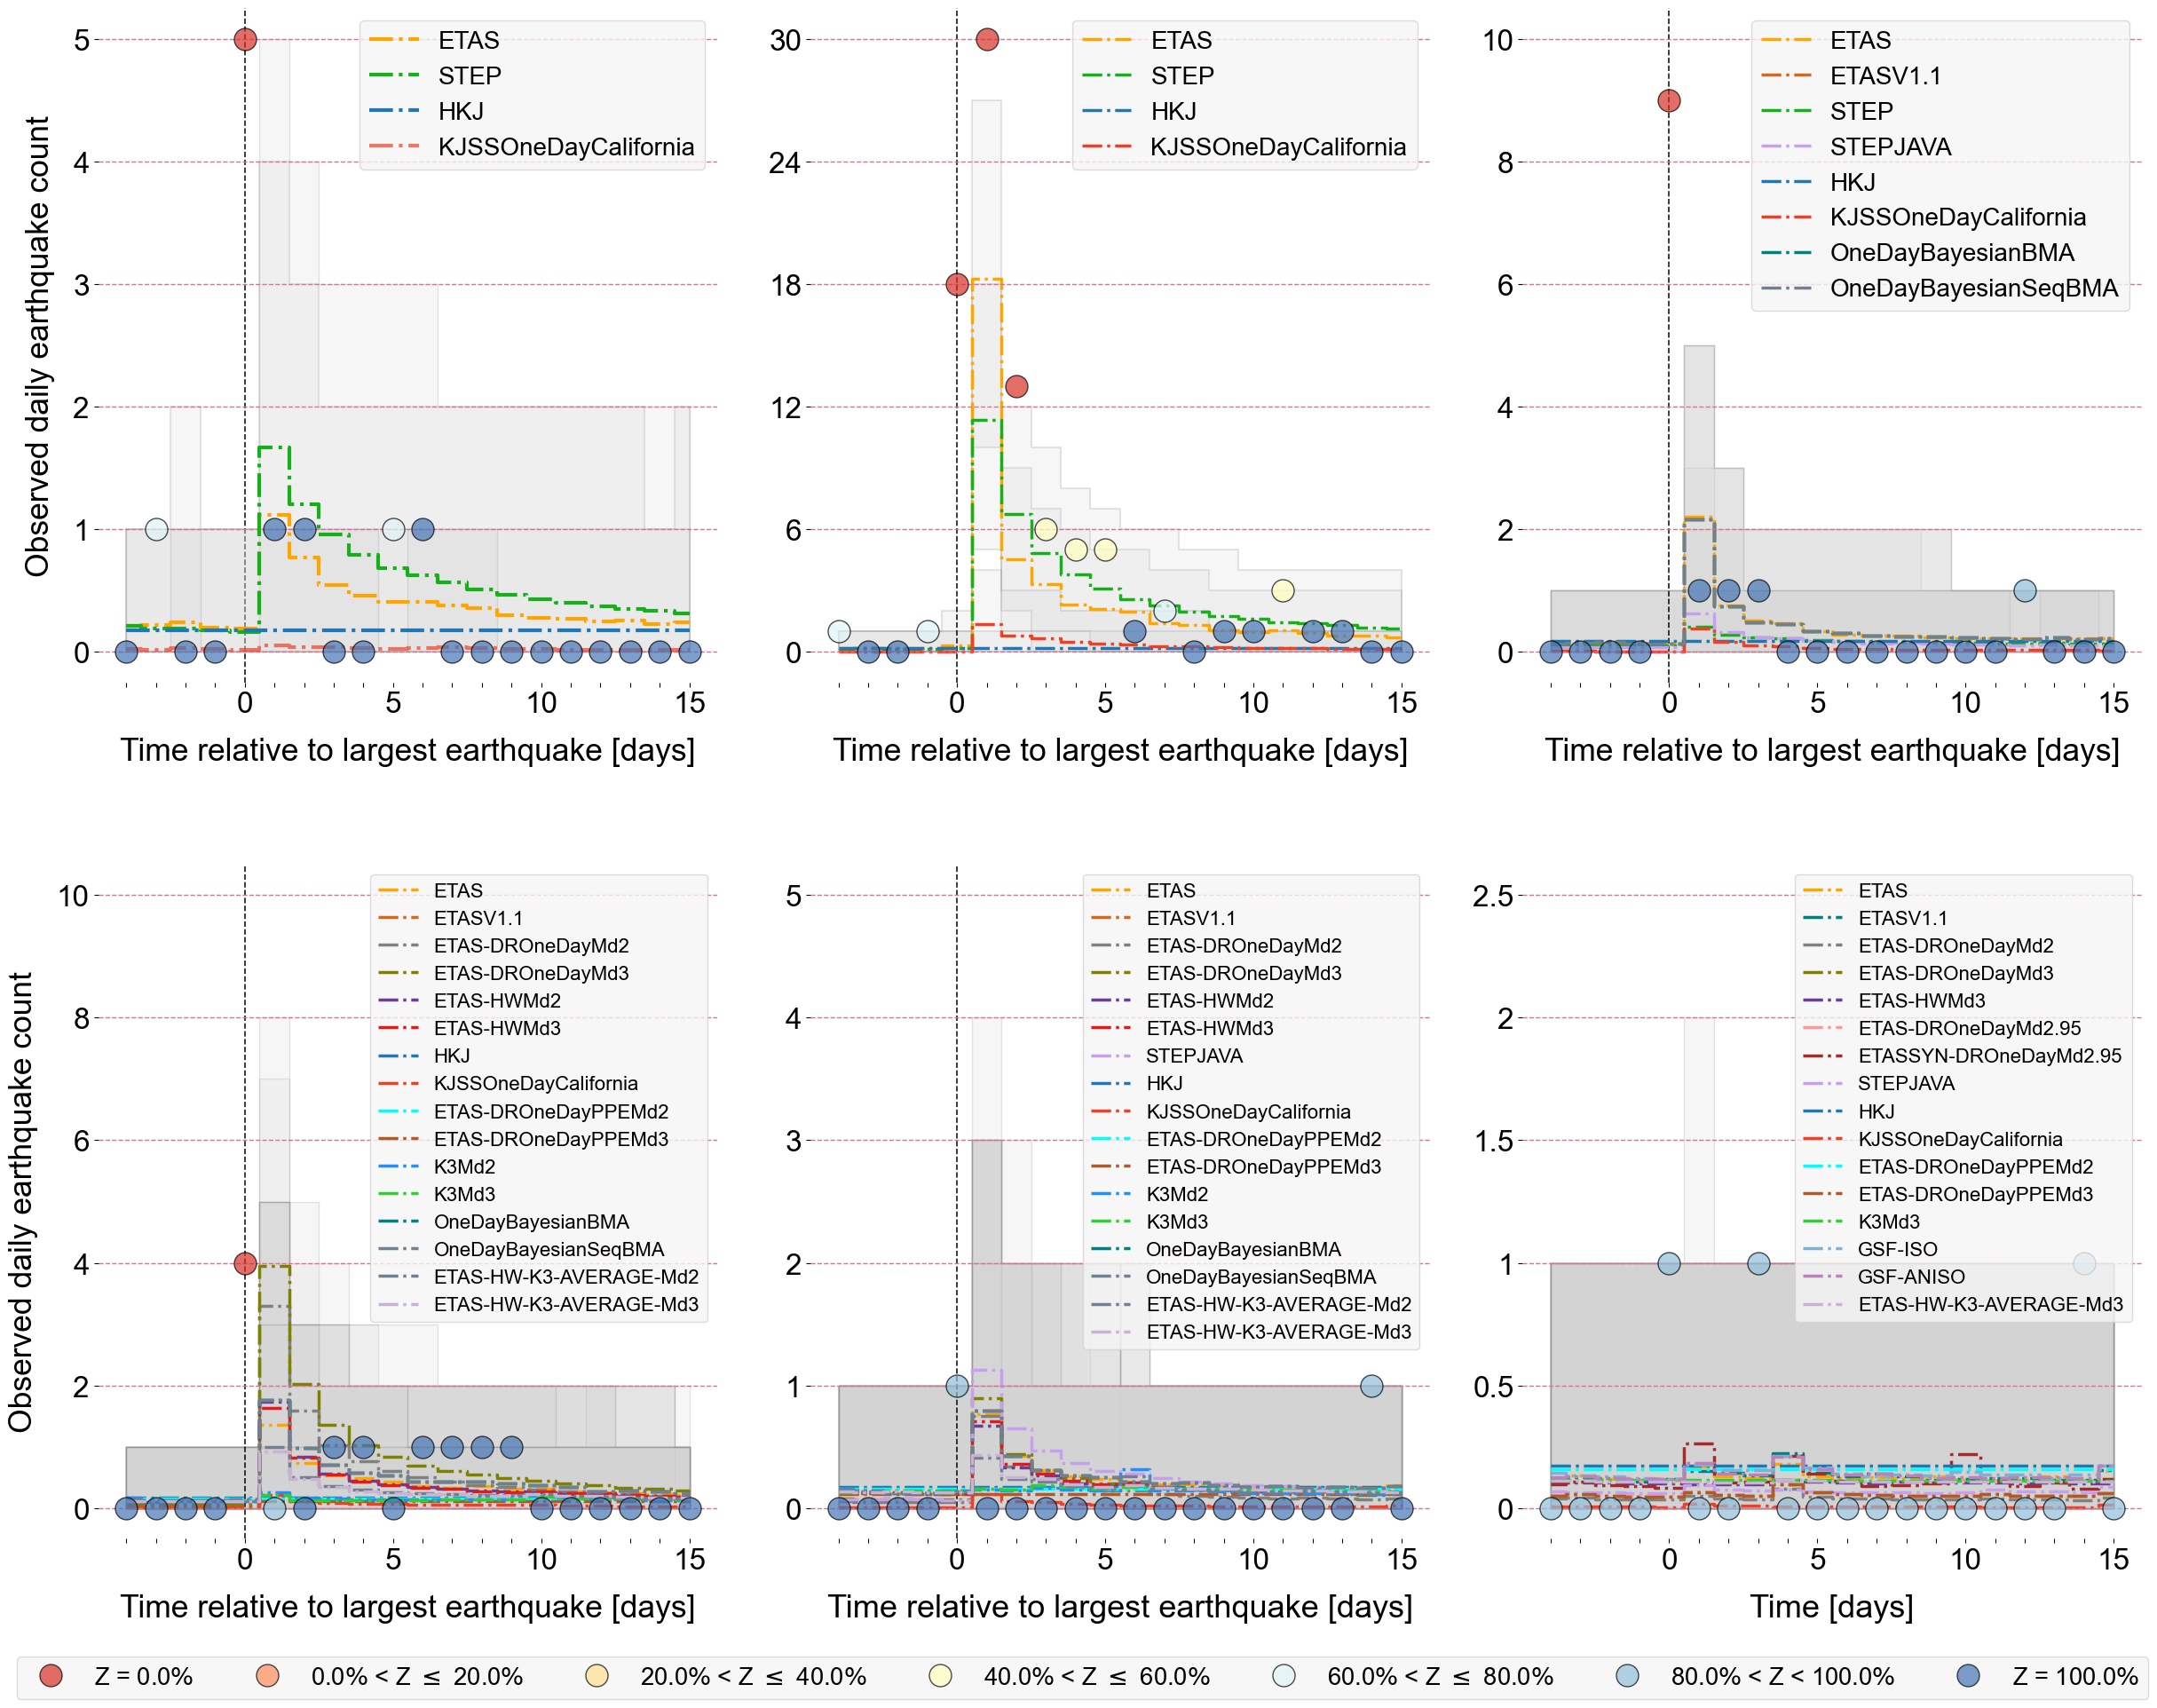

In [106]:
fig, ((ax_ferndale, ax_active, ax_swarm), (ax_mendo,ax_napa,ax_quiet)) = plt.subplots(nrows=2, ncols=3, figsize=(24,18))
fig.tight_layout()

# Mw >= 3.95 earthquake forecasting models
ax_ferndale.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred')

ax_ferndale.fill_between(list(ETAS_ferndale.date), ETAS_ferndale_plow95, ETAS_ferndale_phigh95, linewidth=1.5, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=1)

ax_ferndale.fill_between(list(STEP_ferndale.date), STEP_ferndale_plow95, STEP_ferndale_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=1)

ax_ferndale.fill_between(list(HKJ_ferndale.date), HKJ_ferndale_plow95, HKJ_ferndale_phigh95, linewidth=1.5, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=1)
ax_ferndale.fill_between(list(KJSSOneDayCalifornia_ferndale.date), KJSSOneDayCalifornia_ferndale_plow95, KJSSOneDayCalifornia_ferndale_phigh95, linewidth=1, 
                          edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=1)

ax_ferndale.step(ETAS_ferndale.date, ETAS_ferndale.n_ETAS, '-.', color='#FFA500', where='mid', linewidth=3, zorder=2, label='ETAS')

ax_ferndale.step(STEP_ferndale.date, STEP_ferndale.n_STEP, '-.',  color='#15B01A', where='mid', linewidth=3, zorder=2, label='STEP')

ax_ferndale.step(HKJ_ferndale.date, HKJ_ferndale.n_HKJ, '-.', color='#1f77b4', where='mid', linewidth=3, zorder=2, label='HKJ')
ax_ferndale.step(KJSSOneDayCalifornia_ferndale.date, KJSSOneDayCalifornia_ferndale.n_KJSSOneDayCalifornia, '-.', alpha=0.7, color='#EF4026', where='mid', 
                  linewidth=3, zorder=2, label='KJSSOneDayCalifornia')

models_ferndale = [ETAS_ferndale, STEP_ferndale, HKJ_ferndale, KJSSOneDayCalifornia_ferndale]
phigh_ferndale = [ETAS_ferndale_phigh95, STEP_ferndale_phigh95, HKJ_ferndale_phigh95, KJSSOneDayCalifornia_ferndale_phigh95]
plow_ferndale = [ETAS_ferndale_plow95, STEP_ferndale_plow95, HKJ_ferndale_plow95, KJSSOneDayCalifornia_ferndale_plow95]
counts_ferndale = np.zeros(len(HKJ_ferndale.obs))
for j in range(len(models_ferndale)):
    for i in range(len(counts_ferndale)):
        if (models_ferndale[j].obs.values[i] <= phigh_ferndale[j][i]) and (models_ferndale[j].obs.values[i] >= plow_ferndale[j][i]) == True:
            counts_ferndale[i] = counts_ferndale[i] + 1   

percentage_ferndale = []
for i in range(len(counts_ferndale)):
    percentage_ferndale.append((counts_ferndale[i] * 100) / len(models_ferndale))

for i in range(len(percentage_ferndale)):
    if percentage_ferndale[i] == 0.0:
        ax_ferndale.plot(HKJ_ferndale.date.values[i], HKJ_ferndale.obs.values[i], 'o', markeredgecolor='k', color='#d73027', markersize=18, alpha=0.7, zorder=2)
    if percentage_ferndale[i] > 0.0 and percentage_ferndale[i] <= 20.0:
         ax_ferndale.plot(HKJ_ferndale.date.values[i], HKJ_ferndale.obs.values[i], 'o', markeredgecolor='k', color='#fc8d59', markersize=18, alpha=0.7, zorder=2)
    elif percentage_ferndale[i] > 20.0 and percentage_ferndale[i] <= 40.0:
        ax_ferndale.plot(HKJ_ferndale.date.values[i], HKJ_ferndale.obs.values[i], 'o', markeredgecolor='k', color='#fee090', markersize=18, alpha=0.7, zorder=2)
    elif percentage_ferndale[i] > 40.0 and percentage_ferndale[i] <= 60.0:
        ax_ferndale.plot(HKJ_ferndale.date.values[i], HKJ_ferndale.obs.values[i], 'o', markeredgecolor='k', color='#ffffbf', markersize=18, alpha=0.7, zorder=2)
    elif percentage_ferndale[i] > 60.0 and percentage_ferndale[i] <= 80.0:
        ax_ferndale.plot(HKJ_ferndale.date.values[i], HKJ_ferndale.obs.values[i], 'o', markeredgecolor='k', color='#e0f3f8', markersize=18, alpha=0.7, zorder=2)
    elif percentage_ferndale[i] > 80.0 and percentage_ferndale[i] < 100.0:
        ax_ferndale.plot(HKJ_ferndale.date.values[i], HKJ_ferndale.obs.values[i], 'o', markeredgecolor='k', color='#91bfdb', markersize=18, alpha=0.7, zorder=2)    
    elif percentage_ferndale[i] == 100.0:
        ax_ferndale.plot(HKJ_ferndale.date.values[i], HKJ_ferndale.obs.values[i], 'o', markeredgecolor='k', color='#4575b4', markersize=18, alpha=0.7, zorder=2)    


ax_ferndale.legend(fontsize=20, facecolor='whitesmoke', edgecolor='lightgrey', loc='upper right')
ax_ferndale.axvline(x=4, ymin=0 , ymax=5, c='k', linewidth=1.2, linestyle='--', alpha=0.9, zorder=0)
ax_ferndale.set_yticklabels([0,1,2,3,4,5], fontsize=24)
ax_ferndale.yaxis.set_ticks(np.arange(0, 5.01, step=1))
plt.setp(ax_ferndale.spines.values(), color='none')
ax_ferndale.set_ylabel('Observed daily earthquake count', fontsize=25.5, labelpad=15)
ax_ferndale.set_xlabel('Time relative to largest earthquake [days]', fontsize=25.5, labelpad=15)
ax_ferndale.set_xticklabels(['','', '','', '0', '', '', '', '', '5', '', '', '', '', '10', '', '', '', '', '15'], fontsize=24)
ax_ferndale.set_ylim(-0.25, 5.25)

ax_active.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred')

ax_active.fill_between(list(ETAS_active.date), ETAS_active_plow95, ETAS_active_phigh95, linewidth=1.5, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_active.fill_between(list(STEP_active.date), STEP_active_plow95, STEP_active_phigh95, linewidth=1.5, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_active.fill_between(list(HKJ_active.date), HKJ_active_plow95, HKJ_active_phigh95, linewidth=1.5, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_active.fill_between(list(KJSSOneDayCalifornia_active.date), KJSSOneDayCalifornia_active_plow95, KJSSOneDayCalifornia_active_phigh95, linewidth=1.5, 
                       edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_active.step(ETAS_active.date, ETAS_active.n_ETAS, '-.', color='#FFA500', where='mid', linewidth=2.5, zorder=1, label='ETAS')

ax_active.step(STEP_active.date, STEP_active.n_STEP, '-.',  color='#15B01A', where='mid', linewidth=2.5, zorder=1, label='STEP')

ax_active.step(HKJ_active.date, HKJ_active.n_HKJ, '-.', color='#1f77b4', where='mid', linewidth=2.5, zorder=1, label='HKJ')
ax_active.step(KJSSOneDayCalifornia_active.date, KJSSOneDayCalifornia_active.n_KJSSOneDayCalifornia, '-.', color='#EF4026', where='mid', linewidth=2.5, zorder=1,
               label='KJSSOneDayCalifornia')

models_active = [HKJ_active, ETAS_active, STEP_active, KJSSOneDayCalifornia_active]
phigh_active = [HKJ_active_phigh95, ETAS_active_phigh95, STEP_active_phigh95, KJSSOneDayCalifornia_active_phigh95]
plow_active = [HKJ_active_plow95, ETAS_active_plow95, STEP_active_plow95, KJSSOneDayCalifornia_active_plow95]
counts_active = np.zeros(len(HKJ_active.obs))
for j in range(len(models_active)):
    for i in range(len(counts_active)):
        if (models_active[j].obs.values[i] <= phigh_active[j][i]) and (models_active[j].obs.values[i] >= plow_active[j][i]) == True:
            counts_active[i] = counts_active[i] + 1   

percentage_active = []
for i in range(len(counts_active)):
    percentage_active.append((counts_active[i] * 100) / len(models_active))

for i in range(len(percentage_active)):
    if percentage_active[i] == 0.0:
        ax_active.plot(HKJ_active.date.values[i], HKJ_active.obs.values[i], 'o', markeredgecolor='k', color='#d73027', markersize=18, alpha=0.7, zorder=2)
    if percentage_active[i] > 0.0 and percentage_active[i] <= 20.0:
         ax_active.plot(HKJ_active.date.values[i], HKJ_active.obs.values[i], 'o', markeredgecolor='k', color='#fc8d59', markersize=18, alpha=0.7, zorder=2)
    elif percentage_active[i] > 20.0 and percentage_active[i] <= 40.0:
        ax_active.plot(HKJ_active.date.values[i], HKJ_active.obs.values[i], 'o', markeredgecolor='k', color='#fee090', markersize=18, alpha=0.7, zorder=2)
    elif percentage_active[i] > 40.0 and percentage_active[i] <= 60.0:
        ax_active.plot(HKJ_active.date.values[i], HKJ_active.obs.values[i], 'o', markeredgecolor='k', color='#ffffbf', markersize=18, alpha=0.7, zorder=2)
    elif percentage_active[i] > 60.0 and percentage_active[i] <= 80.0:
        ax_active.plot(HKJ_active.date.values[i], HKJ_active.obs.values[i], 'o', markeredgecolor='k', color='#e0f3f8', markersize=18, alpha=0.7, zorder=2)
    elif percentage_active[i] > 80.0 and percentage_active[i] < 100.0:
        ax_active.plot(HKJ_active.date.values[i], HKJ_active.obs.values[i], 'o', markeredgecolor='k', color='#91bfdb', markersize=18, alpha=0.7, zorder=2)    
    elif percentage_active[i] == 100.0:
        ax_active.plot(HKJ_active.date.values[i], HKJ_active.obs.values[i], 'o', markeredgecolor='k', color='#4575b4', markersize=18, alpha=0.7, zorder=2)    

ax_active.legend(fontsize=20, facecolor='whitesmoke', edgecolor='lightgrey', loc='upper right')
ax_active.axvline(x=4, ymin=0, ymax=30, c='k', linewidth=1.2, linestyle='--', alpha=0.9, zorder=0)
ax_active.set_yticklabels([0,6,12,18,24,30], fontsize=24)
ax_active.yaxis.set_ticks(np.arange(0, 30.01, step=6))
plt.setp(ax_active.spines.values(), color='none')
ax_active.set_xlabel('Time relative to largest earthquake [days]', fontsize=25.5, labelpad=15)
ax_active.set_xticklabels(['','', '','', '0', '', '', '', '', '5', '', '', '', '', '10', '', '', '', '', '15'], fontsize=24)


ax_swarm.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred')
ax_swarm.fill_between(list(ETAS_swarm.date), ETAS_swarm_plow95, ETAS_swarm_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_swarm.fill_between(list(ETASv1_swarm.date), ETASv1_swarm_plow95, ETASv1_swarm_phigh95, linewidth=1,  edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_swarm.fill_between(list(STEP_swarm.date), STEP_swarm_plow95, STEP_swarm_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_swarm.fill_between(list(STEPJAVA_swarm.date), STEPJAVA_swarm_plow95, STEPJAVA_swarm_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_swarm.fill_between(list(HKJ_swarm.date), HKJ_swarm_plow95, HKJ_swarm_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_swarm.fill_between(list(KJSSOneDayCalifornia_swarm.date), KJSSOneDayCalifornia_swarm_plow95, KJSSOneDayCalifornia_swarm_phigh95, linewidth=1, 
                      edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_swarm.fill_between(list(OneDayBayesianBMA_swarm.date), OneDayBayesianBMA_swarm_plow95, OneDayBayesianBMA_swarm_phigh95, linewidth=1, edgecolor='lightgrey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_swarm.fill_between(list(OneDayBayesianSeqBMA_swarm.date), OneDayBayesianSeqBMA_swarm_plow95, OneDayBayesianSeqBMA_swarm_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_swarm.step(ETAS_swarm.date, ETAS_swarm.n_ETAS, '-.', color='#FFA500', where='mid', linewidth=2.5, zorder=1, label='ETAS')
ax_swarm.step(ETASv1_swarm.date, ETASv1_swarm.n_ETASv1, '-.', color='#D2691E', where='mid', linewidth=2.5, zorder=1, label='ETASV1.1')

ax_swarm.step(STEP_swarm.date, STEP_swarm.n_STEP, '-.', color='#15B01A', where='mid', linewidth=2.5, zorder=1, label='STEP')
ax_swarm.step(STEPJAVA_swarm.date, STEPJAVA_swarm.n_STEPJAVA, '-.', color='#C79FEF', where='mid', linewidth=2.5, zorder=1, label='STEPJAVA')

ax_swarm.step(HKJ_swarm.date, HKJ_swarm.n_HKJ, '-.', color='#1f77b4', where='mid', linewidth=2.5, zorder=1, label='HKJ')
ax_swarm.step(KJSSOneDayCalifornia_swarm.date, KJSSOneDayCalifornia_swarm.n_KJSSOneDayCalifornia, '-.', color='#EF4026', where='mid', linewidth=2.5, zorder=1, label='KJSSOneDayCalifornia')

ax_swarm.step(OneDayBayesianBMA_swarm.date, OneDayBayesianBMA_swarm.n_OneDayBayesianBMA, '-.', color='#008080', where='mid', linewidth=2.5, zorder=1, label='OneDayBayesianBMA')
ax_swarm.step(OneDayBayesianSeqBMA_swarm.date, OneDayBayesianSeqBMA_swarm.n_OneDayBayesianSeqBMA, '-.', color='slategrey', where='mid', linewidth=2.5, zorder=1, label='OneDayBayesianSeqBMA')

models_swarm = [ETAS_swarm, ETASv1_swarm, STEP_swarm, STEPJAVA_swarm, HKJ_swarm, KJSSOneDayCalifornia_swarm, OneDayBayesianBMA_swarm, OneDayBayesianSeqBMA_swarm]
phigh_swarm = [ETAS_swarm_phigh95, ETASv1_swarm_phigh95, STEP_swarm_phigh95, STEPJAVA_swarm_phigh95, HKJ_swarm_phigh95, KJSSOneDayCalifornia_swarm_phigh95, OneDayBayesianBMA_swarm_phigh95, OneDayBayesianSeqBMA_swarm_phigh95]
plow_swarm = [ETAS_swarm_plow95, ETASv1_swarm_plow95, STEP_swarm_plow95, STEPJAVA_swarm_plow95, HKJ_swarm_plow95, KJSSOneDayCalifornia_swarm_plow95, OneDayBayesianBMA_swarm_plow95, OneDayBayesianSeqBMA_swarm_plow95]
counts_swarm = np.zeros(len(HKJ_swarm.obs))
for j in range(len(models_swarm)):
    for i in range(len(counts_swarm)):
        if (models_swarm[j].obs.values[i] <= phigh_swarm[j][i]) and (models_swarm[j].obs.values[i] >= plow_swarm[j][i]) == True:
            counts_swarm[i] = counts_swarm[i] + 1   

percentage_swarm = []
for i in range(len(counts_swarm)):
    percentage_swarm.append((counts_swarm[i] * 100) / len(models_swarm))

for i in range(len(percentage_swarm)):
    if percentage_swarm[i] == 0.0:
        ax_swarm.plot(HKJ_swarm.date.values[i], HKJ_swarm.obs.values[i], 'o', markeredgecolor='k', color='#d73027', markersize=18, alpha=0.7, zorder=2)
    if percentage_swarm[i] > 0.0 and percentage_swarm[i] <= 20.0:
         ax_swarm.plot(HKJ_swarm.date.values[i], HKJ_swarm.obs.values[i], 'o', markeredgecolor='k', color='#fc8d59', markersize=18, alpha=0.7, zorder=2)
    elif percentage_swarm[i] > 20.0 and percentage_swarm[i] <= 40.0:
        ax_swarm.plot(HKJ_swarm.date.values[i], HKJ_swarm.obs.values[i], 'o', markeredgecolor='k', color='#fee090', markersize=18, alpha=0.7, zorder=2)
    elif percentage_swarm[i] > 40.0 and percentage_swarm[i] <= 60.0:
        ax_swarm.plot(HKJ_swarm.date.values[i], HKJ_swarm.obs.values[i], 'o', markeredgecolor='k', color='#ffffbf', markersize=18, alpha=0.7, zorder=2)
    elif percentage_swarm[i] > 60.0 and percentage_swarm[i] <= 80.0:
        ax_swarm.plot(HKJ_swarm.date.values[i], HKJ_swarm.obs.values[i], 'o', markeredgecolor='k', color='#e0f3f8', markersize=18, alpha=0.7, zorder=2)
    elif percentage_swarm[i] > 80.0 and percentage_swarm[i] < 100.0:
        ax_swarm.plot(HKJ_swarm.date.values[i], HKJ_swarm.obs.values[i], 'o', markeredgecolor='k', color='#91bfdb', markersize=18, alpha=0.7, zorder=2)    
    elif percentage_swarm[i] == 100.0:
        ax_swarm.plot(HKJ_swarm.date.values[i], HKJ_swarm.obs.values[i], 'o', markeredgecolor='k', color='#4575b4', markersize=18, alpha=0.7, zorder=2)          
        
ax_swarm.legend(fontsize=20, facecolor='whitesmoke', edgecolor='lightgrey', loc='upper right')
ax_swarm.axvline(x=4, ymin=0, ymax=10, c='k', linewidth=1.2, linestyle='--', alpha=0.9, zorder=0)
ax_swarm.set_yticklabels(['',0,2,4,6,8,10], fontsize=24)
plt.setp(ax_swarm.spines.values(), color='none')
ax_swarm.set_xlabel('Time relative to largest earthquake [days]', fontsize=25.5, labelpad=15)
ax_swarm.set_xticklabels(['','', '','', '0', '', '', '', '', '5', '', '', '', '', '10', '', '', '', '', '15'], fontsize=24)
ax_swarm.set_ylim(-0.5,10.5)


ax_mendo.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred')
ax_mendo.fill_between(list(ETAS_mendo.date), ETAS_mendo_plow95, ETAS_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_mendo.fill_between(list(ETASv1_mendo.date), ETASv1_mendo_plow95, ETASv1_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_mendo.fill_between(list(ETAS_DROneDayMd2_mendo.date), ETAS_DROneDayMd2_mendo_plow95, ETAS_DROneDayMd2_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_mendo.fill_between(list(ETAS_DROneDayMd3_mendo.date), ETAS_DROneDayMd3_mendo_plow95, ETAS_DROneDayMd3_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_mendo.fill_between(list(ETAS_HWMd2_mendo.date), ETAS_HWMd2_mendo_plow95, ETAS_HWMd2_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_mendo.fill_between(list(ETAS_HWMd3_mendo.date), ETAS_HWMd3_mendo_plow95, ETAS_HWMd3_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_mendo.fill_between(list(HKJ_mendo.date), HKJ_mendo_plow95, HKJ_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_mendo.fill_between(list(KJSSOneDayCalifornia_mendo.date), KJSSOneDayCalifornia_mendo_plow95, KJSSOneDayCalifornia_mendo_phigh95, linewidth=1, 
                edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_mendo.fill_between(list(ETAS_DROneDayPPEMd2_mendo.date), ETAS_DROneDayPPEMd2_mendo_plow95, ETAS_DROneDayPPEMd2_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_mendo.fill_between(list(ETAS_DROneDayPPEMd3_mendo.date), ETAS_DROneDayPPEMd3_mendo_plow95, ETAS_DROneDayPPEMd3_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_mendo.fill_between(list(K3Md2_mendo.date), K3Md2_mendo_plow95, K3Md2_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_mendo.fill_between(list(K3Md3_mendo.date), K3Md3_mendo_plow95, K3Md3_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_mendo.fill_between(list(OneDayBayesianBMA_mendo.date), OneDayBayesianBMA_mendo_plow95, OneDayBayesianBMA_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_mendo.fill_between(list(OneDayBayesianSeqBMA_mendo.date), OneDayBayesianSeqBMA_mendo_plow95, OneDayBayesianSeqBMA_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_mendo.fill_between(list(ETAS_HW_K3_AVERAGE_Md2_mendo.date), ETAS_HW_K3_AVERAGE_Md2_mendo_plow95, ETAS_HW_K3_AVERAGE_Md2_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_mendo.fill_between(list(ETAS_HW_K3_AVERAGE_Md3_mendo.date), ETAS_HW_K3_AVERAGE_Md3_mendo_plow95, ETAS_HW_K3_AVERAGE_Md3_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_mendo.step(ETAS_mendo.date, ETAS_mendo.n_ETAS, '-.', color='#FFA500', where='mid', linewidth=2.5, zorder=1, label='ETAS')
ax_mendo.step(ETASv1_mendo.date, ETASv1_mendo.n_ETASv1, '-.', color='#D2691E', where='mid', linewidth=2.5, zorder=1, label='ETASV1.1')
ax_mendo.step(ETAS_DROneDayMd2_mendo.date, ETAS_DROneDayMd2_mendo.n_ETAS_DROneDayMd2, '-.', color='#808080', where='mid', linewidth=2.5, zorder=1, label='ETAS-DROneDayMd2')
ax_mendo.step(ETAS_DROneDayMd3_mendo.date, ETAS_DROneDayMd3_mendo.n_ETAS_DROneDayMd3, '-.', color='#808000', where='mid', linewidth=2.5, zorder=1, label='ETAS-DROneDayMd3')
ax_mendo.step(ETAS_HWMd2_mendo.date, ETAS_HWMd2_mendo.n_ETAS_HWMd2, '-.', color='#6a3d9a', where='mid', linewidth=2.5, zorder=1, label='ETAS-HWMd2')
ax_mendo.step(ETAS_HWMd3_mendo.date, ETAS_HWMd3_mendo.n_ETAS_HWMd3, '-.', color='#e31a1c', where='mid', linewidth=2.5, zorder=1, label='ETAS-HWMd3')

ax_mendo.step(HKJ_mendo.date, HKJ_mendo.n_HKJ, '-.', color='#1f77b4', where='mid', linewidth=2.5, zorder=1, label='HKJ')
ax_mendo.step(KJSSOneDayCalifornia_mendo.date, KJSSOneDayCalifornia_mendo.n_KJSSOneDayCalifornia, '-.', color='#EF4026', where='mid', linewidth=2.5, zorder=1, label='KJSSOneDayCalifornia')
ax_mendo.step(ETAS_DROneDayPPEMd2_mendo.date, ETAS_DROneDayPPEMd2_mendo.n_ETAS_DROneDayPPEMd2, '-.', color='#00FFFF', where='mid', linewidth=2.5, zorder=1, label='ETAS-DROneDayPPEMd2')
ax_mendo.step(ETAS_DROneDayPPEMd3_mendo.date, ETAS_DROneDayPPEMd3_mendo.n_ETAS_DROneDayPPEMd3, '-.', color='#b15928', where='mid', linewidth=2.5, zorder=1, label='ETAS-DROneDayPPEMd3')

ax_mendo.step(K3Md2_mendo.date, K3Md2_mendo.n_K3Md2, '-.', color='dodgerblue', where='mid', linewidth=2.5, zorder=1, label='K3Md2')
ax_mendo.step(K3Md3_mendo.date, K3Md3_mendo.n_K3Md3, '-.', color='limegreen', where='mid', linewidth=2.5, zorder=1, label='K3Md3')

ax_mendo.step(OneDayBayesianBMA_mendo.date, OneDayBayesianBMA_mendo.n_OneDayBayesianBMA, '-.', color='#008080', where='mid', linewidth=2.5, zorder=1, label='OneDayBayesianBMA')
ax_mendo.step(OneDayBayesianSeqBMA_mendo.date, OneDayBayesianSeqBMA_mendo.n_OneDayBayesianSeqBMA, '-.', color='slategrey', where='mid', linewidth=2.5, zorder=1, label='OneDayBayesianSeqBMA')
ax_mendo.step(ETAS_HW_K3_AVERAGE_Md2_mendo.date, ETAS_HW_K3_AVERAGE_Md2_mendo.n_ETAS_HW_K3_AVERAGE_Md2, '-.', color='#708090', where='mid', linewidth=2.5, zorder=1, label='ETAS-HW-K3-AVERAGE-Md2')
ax_mendo.step(ETAS_HW_K3_AVERAGE_Md3_mendo.date, ETAS_HW_K3_AVERAGE_Md3_mendo.n_ETAS_HW_K3_AVERAGE_Md3, '-.', color='#cab2d6', where='mid', linewidth=2.5, zorder=1, label='ETAS-HW-K3-AVERAGE-Md3')
ax_mendo.legend(fontsize=16, facecolor='whitesmoke', edgecolor='lightgrey', loc='upper right')

models_mendo = [ETAS_mendo, ETASv1_mendo, ETAS_DROneDayMd2_mendo, ETAS_DROneDayMd3_mendo, ETAS_HWMd2_mendo, ETAS_HWMd3_mendo, \
                STEPJAVA_mendo, \
                HKJ_mendo, KJSSOneDayCalifornia_mendo, ETAS_DROneDayPPEMd2_mendo, ETAS_DROneDayPPEMd3_mendo, \
                K3Md2_mendo, K3Md3_mendo, \
                OneDayBayesianBMA_mendo, OneDayBayesianSeqBMA_mendo, ETAS_HW_K3_AVERAGE_Md2_mendo, ETAS_HW_K3_AVERAGE_Md3_mendo]

phigh_mendo = [ETAS_mendo_phigh95, ETASv1_mendo_phigh95, ETAS_DROneDayMd2_mendo_phigh95, ETAS_DROneDayMd3_mendo_phigh95, ETAS_HWMd2_mendo_phigh95, ETAS_HWMd3_mendo_phigh95, \
               STEPJAVA_mendo_phigh95, \
               HKJ_mendo_phigh95, KJSSOneDayCalifornia_mendo_phigh95, ETAS_DROneDayPPEMd2_mendo_phigh95, ETAS_DROneDayPPEMd3_mendo_phigh95, \
               K3Md2_mendo_phigh95, K3Md3_mendo_phigh95, \
               OneDayBayesianBMA_mendo_phigh95, OneDayBayesianSeqBMA_mendo_phigh95, ETAS_HW_K3_AVERAGE_Md2_mendo_phigh95, ETAS_HW_K3_AVERAGE_Md3_mendo_phigh95]

plow_mendo = [ETAS_mendo_plow95, ETASv1_mendo_plow95, ETAS_DROneDayMd2_mendo_plow95, ETAS_DROneDayMd3_mendo_plow95, ETAS_HWMd2_mendo_plow95, ETAS_HWMd3_mendo_plow95, \
              STEPJAVA_mendo_plow95, \
              HKJ_mendo_plow95, KJSSOneDayCalifornia_mendo_plow95, ETAS_DROneDayPPEMd2_mendo_plow95, ETAS_DROneDayPPEMd3_mendo_plow95, \
              K3Md2_mendo_plow95, K3Md3_mendo_plow95, \
              OneDayBayesianBMA_mendo_plow95, OneDayBayesianSeqBMA_mendo_plow95, ETAS_HW_K3_AVERAGE_Md2_mendo_plow95, ETAS_HW_K3_AVERAGE_Md3_mendo_plow95]

counts_mendo = np.zeros(len(HKJ_mendo.obs))
for j in range(len(models_mendo)):
    for i in range(len(counts_mendo)):
        if (models_mendo[j].obs.values[i] <= phigh_mendo[j][i]) and (models_mendo[j].obs.values[i] >= plow_mendo[j][i]) == True:
            counts_mendo[i] = counts_mendo[i] + 1   

percentage_mendo = []
for i in range(len(counts_mendo)):
    percentage_mendo.append((counts_mendo[i] * 100) / len(models_mendo))

for i in range(len(percentage_mendo)):
    if percentage_mendo[i] == 0.0:
        ax_mendo.plot(HKJ_mendo.date.values[i], HKJ_mendo.obs.values[i], 'o', color='none', markerfacecolor='#d73027', markersize=18, alpha=0.7, zorder=2, label='N = 0.0$\%$')
    if percentage_mendo[i] > 0.0 and percentage_mendo[i] <= 20.0:
        ax_mendo.plot(HKJ_mendo.date.values[i], HKJ_mendo.obs.values[i], 'o', color='none', markerfacecolor='#fc8d59', markersize=18, alpha=0.7, zorder=2, label='0.0$\%$ > N $\leq$ 20.0$\%$')
    elif percentage_mendo[i] > 20.0 and percentage_mendo[i] <= 40.0:
        ax_mendo.plot(HKJ_mendo.date.values[i], HKJ_mendo.obs.values[i], 'o', color='none', markerfacecolor='#fee090', markersize=18, alpha=0.7, zorder=2, label='20.0$\%$ > N $\leq$ 40.0$\%$')
    elif percentage_mendo[i] > 40.0 and percentage_mendo[i] <= 60.0:
        ax_mendo.plot(HKJ_mendo.date.values[i], HKJ_mendo.obs.values[i], 'o', color='none', markerfacecolor='#ffffbf', markersize=18, alpha=0.7, zorder=2, label='40.0$\%$ > N $\leq$ 60.0$\%$')
    elif percentage_mendo[i] > 60.0 and percentage_mendo[i] <= 80.0:
        ax_mendo.plot(HKJ_mendo.date.values[i], HKJ_mendo.obs.values[i], 'o', color='none', markerfacecolor='#e0f3f8', markersize=18, alpha=0.7, zorder=2, label='60.0$\%$ > N $\leq$ 80.0$\%$')
    elif percentage_mendo[i] > 80.0 and percentage_mendo[i] < 100.0:
        ax_mendo.plot(HKJ_mendo.date.values[i], HKJ_mendo.obs.values[i], 'o', color='none', markerfacecolor='#91bfdb', markersize=18, alpha=0.7, zorder=2, label='80.0$\%$ > N < 100.0$\%$')    
    elif percentage_mendo[i] == 100.0:
        ax_mendo.plot(HKJ_mendo.date.values[i], HKJ_mendo.obs.values[i], 'o', color='none', markerfacecolor='#4575b4', markersize=18, alpha=0.7, zorder=2, label='N = 100.0$\%$')

ax_mendo.axvline(x=4, ymin=0, ymax=10, c='k', linewidth=1.2, linestyle='--', alpha=0.9, zorder=0)
ax_mendo.yaxis.set_ticks(np.arange(0, 10.01, step=2))
ax_mendo.set_yticklabels([0,2,4,6,8,10], fontsize=24)
plt.setp(ax_mendo.spines.values(), color='none')
ax_mendo.set_ylim(-0.5,10.5)
ax_mendo.set_ylabel('Observed daily earthquake count', fontsize=25.5, labelpad=15)
ax_mendo.set_xlabel('Time relative to largest earthquake [days]', fontsize=25.5, labelpad=15)
ax_mendo.set_xticklabels(['','', '','', '0', '', '', '', '', '5', '', '', '', '', '10', '', '', '', '', '15'], fontsize=24)


ax_napa.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred')

ax_napa.fill_between(list(ETAS_napa.date), ETAS_napa_plow95, ETAS_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_napa.fill_between(list(ETASv1_napa.date), ETASv1_napa_plow95, ETASv1_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_napa.fill_between(list(ETAS_DROneDayMd2_napa.date), ETAS_DROneDayMd2_napa_plow95, ETAS_DROneDayMd2_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_napa.fill_between(list(ETAS_DROneDayMd3_napa.date), ETAS_DROneDayMd3_napa_plow95, ETAS_DROneDayMd3_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_napa.fill_between(list(ETAS_HWMd2_napa.date), ETAS_HWMd2_napa_plow95, ETAS_HWMd2_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_napa.fill_between(list(ETAS_HWMd3_napa.date), ETAS_HWMd3_napa_plow95, ETAS_HWMd3_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_napa.fill_between(list(STEPJAVA_napa.date), STEPJAVA_napa_plow95, STEPJAVA_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_napa.fill_between(list(HKJ_napa.date), HKJ_napa_plow95, HKJ_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_napa.fill_between(list(KJSSOneDayCalifornia_napa.date), KJSSOneDayCalifornia_napa_plow95, KJSSOneDayCalifornia_napa_phigh95, linewidth=1, 
                edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_napa.fill_between(list(ETAS_DROneDayPPEMd2_napa.date), ETAS_DROneDayPPEMd2_napa_plow95, ETAS_DROneDayPPEMd2_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_napa.fill_between(list(ETAS_DROneDayPPEMd3_napa.date), ETAS_DROneDayPPEMd3_napa_plow95, ETAS_DROneDayPPEMd3_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_napa.fill_between(list(K3Md2_napa.date), K3Md2_napa_plow95, K3Md2_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_napa.fill_between(list(K3Md3_napa.date), K3Md3_napa_plow95, K3Md3_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_napa.fill_between(list(OneDayBayesianBMA_napa.date), OneDayBayesianBMA_napa_plow95, OneDayBayesianBMA_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_napa.fill_between(list(OneDayBayesianSeqBMA_napa.date), OneDayBayesianSeqBMA_napa_plow95, OneDayBayesianSeqBMA_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_napa.fill_between(list(ETAS_HW_K3_AVERAGE_Md2_napa.date), ETAS_HW_K3_AVERAGE_Md2_napa_plow95, ETAS_HW_K3_AVERAGE_Md2_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_napa.fill_between(list(ETAS_HW_K3_AVERAGE_Md3_napa.date), ETAS_HW_K3_AVERAGE_Md3_napa_plow95, ETAS_HW_K3_AVERAGE_Md3_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_napa.step(ETAS_napa.date, ETAS_napa.n_ETAS, '-.', color='#FFA500', where='mid', linewidth=2.5, zorder=1, label='ETAS')
ax_napa.step(ETASv1_napa.date, ETASv1_napa.n_ETASv1, '-.', color='#D2691E', where='mid', linewidth=2.5, zorder=1, label='ETASV1.1')
ax_napa.step(ETAS_DROneDayMd2_napa.date, ETAS_DROneDayMd2_napa.n_ETAS_DROneDayMd2, '-.', color='#808080', where='mid', linewidth=2.5, zorder=1, label='ETAS-DROneDayMd2')
ax_napa.step(ETAS_DROneDayMd3_napa.date, ETAS_DROneDayMd3_napa.n_ETAS_DROneDayMd3, '-.', color='#808000', where='mid', linewidth=2.5, zorder=1, label='ETAS-DROneDayMd3')
ax_napa.step(ETAS_HWMd2_napa.date, ETAS_HWMd2_napa.n_ETAS_HWMd2, '-.', color='#6a3d9a', where='mid', linewidth=2.5, zorder=1, label='ETAS-HWMd2')
ax_napa.step(ETAS_HWMd3_napa.date, ETAS_HWMd3_napa.n_ETAS_HWMd3, '-.', color='#e31a1c', where='mid', linewidth=2.5, zorder=1, label='ETAS-HWMd3')

ax_napa.step(STEPJAVA_napa.date, STEPJAVA_napa.n_STEPJAVA, '-.', color='#C79FEF', where='mid', linewidth=2.5, zorder=1, label='STEPJAVA')

ax_napa.step(HKJ_napa.date, HKJ_napa.n_HKJ, '-.', color='#1f77b4', where='mid', linewidth=2.5, zorder=1, label='HKJ')
ax_napa.step(KJSSOneDayCalifornia_napa.date, KJSSOneDayCalifornia_napa.n_KJSSOneDayCalifornia, '-.', color='#EF4026', where='mid', linewidth=2.5, zorder=1, label='KJSSOneDayCalifornia')
ax_napa.step(ETAS_DROneDayPPEMd2_napa.date, ETAS_DROneDayPPEMd2_napa.n_ETAS_DROneDayPPEMd2, '-.', color='#00FFFF', where='mid', linewidth=2.5, zorder=1, label='ETAS-DROneDayPPEMd2')
ax_napa.step(ETAS_DROneDayPPEMd3_napa.date, ETAS_DROneDayPPEMd3_napa.n_ETAS_DROneDayPPEMd3, '-.', color='#b15928', where='mid', linewidth=2.5, zorder=1, label='ETAS-DROneDayPPEMd3')

ax_napa.step(K3Md2_napa.date, K3Md2_napa.n_K3Md2, '-.', color='dodgerblue', where='mid', linewidth=2.5, zorder=1, label='K3Md2')
ax_napa.step(K3Md3_napa.date, K3Md3_napa.n_K3Md3, '-.', color='limegreen', where='mid', linewidth=2.5, zorder=1, label='K3Md3')

ax_napa.step(OneDayBayesianBMA_napa.date, OneDayBayesianBMA_napa.n_OneDayBayesianBMA, '-.', color='#008080', where='mid', linewidth=2.5, zorder=1, label='OneDayBayesianBMA')
ax_napa.step(OneDayBayesianSeqBMA_napa.date, OneDayBayesianSeqBMA_napa.n_OneDayBayesianSeqBMA, '-.', color='slategrey', where='mid', linewidth=2.5, zorder=1, label='OneDayBayesianSeqBMA')
ax_napa.step(ETAS_HW_K3_AVERAGE_Md2_napa.date, ETAS_HW_K3_AVERAGE_Md2_napa.n_ETAS_HW_K3_AVERAGE_Md2, '-.', color='#708090', where='mid', linewidth=2.5, zorder=1, label='ETAS-HW-K3-AVERAGE-Md2')
ax_napa.step(ETAS_HW_K3_AVERAGE_Md3_napa.date, ETAS_HW_K3_AVERAGE_Md3_napa.n_ETAS_HW_K3_AVERAGE_Md3, '-.', color='#cab2d6', where='mid', linewidth=2.5, zorder=1, label='ETAS-HW-K3-AVERAGE-Md3')

models_napa = [ETAS_napa, ETASv1_napa, ETAS_DROneDayMd2_napa, ETAS_DROneDayMd3_napa, ETAS_HWMd2_napa, ETAS_HWMd3_napa, \
               STEPJAVA_napa, \
               HKJ_napa, KJSSOneDayCalifornia_napa, ETAS_DROneDayPPEMd2_napa, ETAS_DROneDayPPEMd3_napa, \
               K3Md2_napa, K3Md3_napa, \
               OneDayBayesianBMA_napa, OneDayBayesianSeqBMA_napa, ETAS_HW_K3_AVERAGE_Md2_napa, ETAS_HW_K3_AVERAGE_Md3_napa]

phigh_napa = [ETAS_napa_phigh95, ETASv1_napa_phigh95, ETAS_DROneDayMd2_napa_phigh95, ETAS_DROneDayMd3_napa_phigh95, ETAS_HWMd2_napa_phigh95, ETAS_HWMd3_napa_phigh95, \
              STEPJAVA_napa_phigh95, \
              HKJ_napa_phigh95, KJSSOneDayCalifornia_napa_phigh95, ETAS_DROneDayPPEMd2_napa_phigh95, ETAS_DROneDayPPEMd3_napa_phigh95, \
              K3Md2_napa_phigh95, K3Md3_napa_phigh95, \
              OneDayBayesianBMA_napa_phigh95, OneDayBayesianSeqBMA_napa_phigh95, ETAS_HW_K3_AVERAGE_Md2_napa_phigh95, ETAS_HW_K3_AVERAGE_Md3_napa_phigh95]

plow_napa = [ETAS_napa_plow95, ETASv1_napa_plow95, ETAS_DROneDayMd2_napa_plow95, ETAS_DROneDayMd3_napa_plow95, ETAS_HWMd2_napa_plow95, ETAS_HWMd3_napa_plow95, \
             STEPJAVA_napa_plow95, \
             HKJ_napa_plow95, KJSSOneDayCalifornia_napa_plow95, ETAS_DROneDayPPEMd2_napa_plow95, ETAS_DROneDayPPEMd3_napa_plow95, \
             K3Md2_napa_plow95, K3Md3_napa_plow95, \
             OneDayBayesianBMA_napa_plow95, OneDayBayesianSeqBMA_napa_plow95, ETAS_HW_K3_AVERAGE_Md2_napa_plow95, ETAS_HW_K3_AVERAGE_Md3_napa_plow95]

counts_napa = np.zeros(len(HKJ_napa.obs))
for j in range(len(models_napa)):
    for i in range(len(counts_napa)):
        if (models_napa[j].obs.values[i] <= phigh_napa[j][i]) and (models_napa[j].obs.values[i] >= plow_napa[j][i]) == True:
            counts_napa[i] = counts_napa[i] + 1   

percentage_napa = []
for i in range(len(counts_napa)):
    percentage_napa.append((counts_napa[i] * 100) / len(models_napa))

for i in range(len(percentage_napa)):
    if percentage_napa[i] == 0.0:
        ax_napa.plot(HKJ_napa.date.values[i], HKJ_napa.obs.values[i], 'o', markeredgecolor='k', color='#d73027', markersize=18, alpha=0.7, zorder=2)
    if percentage_napa[i] > 0.0 and percentage_napa[i] < 20.0:
         ax_napa.plot(HKJ_napa.date.values[i], HKJ_napa.obs.values[i], 'o', markeredgecolor='k', color='#fc8d59', markersize=18, alpha=0.7, zorder=2)
    elif percentage_napa[i] >= 20.0 and percentage_napa[i] < 40.0:
        ax_napa.plot(HKJ_napa.date.values[i], HKJ_napa.obs.values[i], 'o', markeredgecolor='k', color='#fee090', markersize=18, alpha=0.7, zorder=2)
    elif percentage_napa[i] >= 40.0 and percentage_napa[i] < 60.0:
        ax_napa.plot(HKJ_napa.date.values[i], HKJ_napa.obs.values[i], 'o', markeredgecolor='k', color='#ffffbf', markersize=18, alpha=0.7, zorder=2)
    elif percentage_napa[i] >= 60.0 and percentage_napa[i] < 80.0:
        ax_napa.plot(HKJ_napa.date.values[i], HKJ_napa.obs.values[i], 'o', markeredgecolor='k', color='#e0f3f8', markersize=18, alpha=0.7, zorder=2)
    elif percentage_napa[i] >= 80.0 and percentage_napa[i] < 100.0:
        ax_napa.plot(HKJ_napa.date.values[i], HKJ_napa.obs.values[i], 'o', markeredgecolor='k', color='#91bfdb', markersize=18, alpha=0.7, zorder=2)    
    elif percentage_napa[i] == 100.0:
        ax_napa.plot(HKJ_napa.date.values[i], HKJ_napa.obs.values[i], 'o', markeredgecolor='k', color='#4575b4', markersize=18, alpha=0.7, zorder=2)

ax_napa.legend(fontsize=16, facecolor='whitesmoke', edgecolor='lightgrey', loc='upper right')
ax_napa.axvline(x=4, ymin=0, ymax=5, c='k', linewidth=1.2, linestyle='--', alpha=0.9, zorder=0)
ax_napa.yaxis.set_ticks(np.arange(0, 5.01, step=1))
ax_napa.set_yticklabels([0,1,2,3,4,5], fontsize=24)
plt.setp(ax_napa.spines.values(), color='none')
ax_napa.set_ylim(-0.25,5.25)
ax_napa.set_xlabel('Time relative to largest earthquake [days]', fontsize=26, labelpad=15)
ax_napa.set_xticklabels(['','', '','', '0', '', '', '', '', '5', '', '', '', '', '10', '', '', '', '', '15'], fontsize=24)

ax_quiet.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred')
ax_quiet.fill_between(list(ETAS_quiet.date), ETAS_quiet_plow95, ETAS_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_quiet.fill_between(list(ETASv1_quiet.date), ETASv1_quiet_plow95, ETASv1_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_quiet.fill_between(list(ETAS_DROneDayMd2_quiet.date), ETAS_DROneDayMd2_quiet_plow95, ETAS_DROneDayMd2_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_quiet.fill_between(list(ETAS_DROneDayMd3_quiet.date), ETAS_DROneDayMd3_quiet_plow95, ETAS_DROneDayMd3_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_quiet.fill_between(list(ETAS_HWMd3_quiet.date), ETAS_HWMd3_quiet_plow95, ETAS_HWMd3_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_quiet.fill_between(list(ETAS_DROneDayMd295_quiet.date), ETAS_DROneDayMd295_quiet_plow95, ETAS_DROneDayMd295_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_quiet.fill_between(list(ETASSYN_DROneDayMd295_quiet.date), ETASSYN_DROneDayMd295_quiet_plow95, ETASSYN_DROneDayMd295_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_quiet.fill_between(list(STEPJAVA_quiet.date), STEPJAVA_quiet_plow95, STEPJAVA_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_quiet.fill_between(list(HKJ_quiet.date), HKJ_quiet_plow95, HKJ_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_quiet.fill_between(list(KJSSOneDayCalifornia_quiet.date), KJSSOneDayCalifornia_quiet_plow95, KJSSOneDayCalifornia_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_quiet.fill_between(list(ETAS_DROneDayPPEMd2_quiet.date), ETAS_DROneDayPPEMd2_quiet_plow95, ETAS_DROneDayPPEMd2_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_quiet.fill_between(list(ETAS_DROneDayPPEMd3_quiet.date), ETAS_DROneDayPPEMd3_quiet_plow95, ETAS_DROneDayPPEMd3_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_quiet.fill_between(list(K3Md3_quiet.date), K3Md3_quiet_plow95, K3Md3_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_quiet.fill_between(list(GSF_ISO_quiet.date), GSF_ISO_quiet_plow95, GSF_ISO_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_quiet.fill_between(list(GSF_ANISO_quiet.date), GSF_ANISO_quiet_plow95, GSF_ANISO_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_quiet.fill_between(list(ETAS_HW_K3_AVERAGE_Md3_quiet.date), ETAS_HW_K3_AVERAGE_Md3_quiet_plow95, ETAS_HW_K3_AVERAGE_Md3_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_quiet.step(ETAS_quiet.date, ETAS_quiet.n_ETAS, '-.', color='#FFA500', where='mid', linewidth=2.5, zorder=1, label='ETAS')
ax_quiet.step(ETASv1_quiet.date, ETASv1_quiet.n_ETASv1, '-.', color='#008080', where='mid', linewidth=2.5, zorder=1, label='ETASV1.1')
ax_quiet.step(ETAS_DROneDayMd2_quiet.date, ETAS_DROneDayMd2_quiet.n_ETAS_DROneDayMd2, '-.', color='#808080', where='mid', linewidth=2.5, zorder=1, label='ETAS-DROneDayMd2')
ax_quiet.step(ETAS_DROneDayMd3_quiet.date, ETAS_DROneDayMd3_quiet.n_ETAS_DROneDayMd3, '-.', color='#808000', where='mid', linewidth=2.5, zorder=1, label='ETAS-DROneDayMd3')
ax_quiet.step(ETAS_HWMd3_quiet.date, ETAS_HWMd3_quiet.n_ETAS_HWMd3, '-.', color='#6a3d9a', where='mid', linewidth=2.5, zorder=1, label='ETAS-HWMd3')
ax_quiet.step(ETAS_DROneDayMd295_quiet.date, ETAS_DROneDayMd295_quiet.n_ETAS_DROneDayMd295, '-.', color='#fb9a99', where='mid', linewidth=2.5, zorder=1, label='ETAS-DROneDayMd2.95')
ax_quiet.step(ETASSYN_DROneDayMd295_quiet.date, ETASSYN_DROneDayMd295_quiet.n_ETASSYN_DROneDayMd295, '-.', color='brown', where='mid', linewidth=2.5, zorder=1, label='ETASSYN-DROneDayMd2.95')

ax_quiet.step(STEPJAVA_quiet.date, STEPJAVA_quiet.n_STEPJAVA, '-.', color='#C79FEF', where='mid', linewidth=2.5, zorder=1, label='STEPJAVA')

ax_quiet.step(HKJ_quiet.date, HKJ_quiet.n_HKJ, '-.', color='#1f77b4', where='mid', linewidth=2.5, zorder=1, label='HKJ')
ax_quiet.step(KJSSOneDayCalifornia_quiet.date, KJSSOneDayCalifornia_quiet.n_KJSSOneDayCalifornia, '-.', color='#EF4026', where='mid', linewidth=2.5, zorder=1, label='KJSSOneDayCalifornia')
ax_quiet.step(ETAS_DROneDayPPEMd2_quiet.date, ETAS_DROneDayPPEMd2_quiet.n_ETAS_DROneDayPPEMd2, '-.', color='#00FFFF', where='mid', linewidth=2.5, zorder=1, label='ETAS-DROneDayPPEMd2')
ax_quiet.step(ETAS_DROneDayMd3_quiet.date, ETAS_DROneDayMd3_quiet.n_ETAS_DROneDayMd3, '-.', color='#b15928', where='mid', linewidth=2.5, zorder=1, label='ETAS-DROneDayPPEMd3')

ax_quiet.step(K3Md3_quiet.date, K3Md3_quiet.n_K3Md3, '-.', color='limegreen', where='mid', linewidth=2.5, zorder=1, label='K3Md3')
ax_quiet.step(GSF_ISO_quiet.date, GSF_ISO_quiet.n_GSF_ISO, '-.', color='#80b1d3', where='mid', linewidth=2.5, zorder=1, label='GSF-ISO')
ax_quiet.step(GSF_ANISO_quiet.date, GSF_ANISO_quiet.n_GSF_ANISO, '-.', color='#bc80bd', where='mid', linewidth=2.5, zorder=1, label='GSF-ANISO')

ax_quiet.step(ETAS_HW_K3_AVERAGE_Md3_quiet.date, ETAS_HW_K3_AVERAGE_Md3_quiet.n_ETAS_HW_K3_AVERAGE_Md3, '-.', color='#cab2d6', where='mid', linewidth=2.5, zorder=1, label='ETAS-HW-K3-AVERAGE-Md3')

models_quiet = [ETAS_quiet, ETASv1_quiet, ETAS_DROneDayMd2_quiet, ETAS_DROneDayMd3_quiet, ETAS_HWMd3_quiet, ETAS_DROneDayMd295_quiet, ETASSYN_DROneDayMd295_quiet, \
                STEPJAVA_quiet, \
                HKJ_quiet, KJSSOneDayCalifornia_quiet, ETAS_DROneDayPPEMd2_quiet, ETAS_DROneDayPPEMd3_quiet, \
                K3Md3_quiet, GSF_ISO_quiet, GSF_ANISO_quiet, \
                ETAS_HW_K3_AVERAGE_Md3_quiet]

phigh_quiet = [ETAS_quiet_phigh95, ETASv1_quiet_phigh95, ETAS_DROneDayMd2_quiet_phigh95, ETAS_DROneDayMd3_quiet_phigh95, ETAS_HWMd3_quiet_phigh95, ETAS_DROneDayMd295_quiet_phigh95, ETASSYN_DROneDayMd295_quiet_phigh95, \
               STEPJAVA_quiet_phigh95, \
               HKJ_quiet_phigh95, KJSSOneDayCalifornia_quiet_phigh95, ETAS_DROneDayPPEMd2_quiet_phigh95, ETAS_DROneDayPPEMd3_quiet_phigh95, \
               K3Md3_quiet_phigh95, GSF_ISO_quiet_phigh95, GSF_ANISO_quiet_phigh95, \
               ETAS_HW_K3_AVERAGE_Md3_quiet_phigh95]

plow_quiet = [ETAS_quiet_plow95, ETASv1_quiet_plow95, ETAS_DROneDayMd2_quiet_plow95, ETAS_DROneDayMd3_quiet_plow95, ETAS_HWMd3_quiet_plow95, ETAS_DROneDayMd295_quiet_plow95, ETASSYN_DROneDayMd295_quiet_plow95, \
               STEPJAVA_quiet_plow95, \
               HKJ_quiet_plow95, KJSSOneDayCalifornia_quiet_plow95, ETAS_DROneDayPPEMd2_quiet_plow95, ETAS_DROneDayPPEMd3_quiet_phigh95, \
               K3Md3_quiet_plow95, GSF_ISO_quiet_plow95, GSF_ANISO_quiet_plow95, \
               ETAS_HW_K3_AVERAGE_Md3_quiet_plow95]

counts_quiet = np.zeros(len(HKJ_quiet.obs))
for j in range(len(models_quiet)):
    for i in range(len(counts_quiet)):
        if (models_quiet[j].obs.values[i] <= phigh_quiet[j][i]) and (models_quiet[j].obs.values[i] >= plow_quiet[j][i]) == True:
            counts_quiet[i] = counts_quiet[i] + 1   

percentage_quiet = []
for i in range(len(counts_quiet)):
    percentage_quiet.append((counts_quiet[i] * 100) / len(models_quiet))

for i in range(len(percentage_quiet)):
    if percentage_quiet[i] == 0.0:
        ax_quiet.plot(HKJ_quiet.date.values[i], HKJ_quiet.obs.values[i], 'o', markeredgecolor='k', color='#d73027', markersize=18, alpha=0.7, zorder=2)
    if percentage_quiet[i] > 0.0 and percentage_quiet[i] < 20.0:
        ax_quiet.plot(HKJ_quiet.date.values[i], HKJ_quiet.obs.values[i], 'o', markeredgecolor='k', color='#fc8d59', markersize=18, alpha=0.7, zorder=2)
    elif percentage_quiet[i] >= 20.0 and percentage_quiet[i] < 40.0:
        ax_quiet.plot(HKJ_quiet.date.values[i], HKJ_quiet.obs.values[i], 'o', markeredgecolor='k', color='#fee090', markersize=18, alpha=0.7, zorder=2)
    elif percentage_quiet[i] >= 40.0 and percentage_quiet[i] < 60.0:
        ax_quiet.plot(HKJ_quiet.date.values[i], HKJ_quiet.obs.values[i], 'o', markeredgecolor='k', color='#ffffbf', markersize=18, alpha=0.7, zorder=2)
    elif percentage_quiet[i] >= 60.0 and percentage_quiet[i] < 80.0:
        ax_quiet.plot(HKJ_quiet.date.values[i], HKJ_quiet.obs.values[i], 'o', markeredgecolor='k', color='#e0f3f8', markersize=18, alpha=0.7, zorder=2)
    elif percentage_quiet[i] >= 80.0 and percentage_quiet[i] < 100.0:
        ax_quiet.plot(HKJ_quiet.date.values[i], HKJ_quiet.obs.values[i], 'o', markeredgecolor='k', color='#91bfdb', markersize=18, alpha=0.7, zorder=2)    
    elif percentage_quiet[i] == 100.0:
        ax_quiet.plot(HKJ_quiet.date.values[i], HKJ_quiet.obs.values[i], 'o', markeredgecolor='k', color='#4575b4', markersize=18, alpha=0.7, zorder=2)

ax_quiet.legend(fontsize=16, facecolor='whitesmoke', edgecolor='lightgrey', loc='upper right')
ax_quiet.yaxis.set_ticks(np.arange(0, 2.51, step=0.5))
ax_quiet.set_yticklabels([0,0.5,1,1.5,2,2.5], fontsize=24)
plt.setp(ax_quiet.spines.values(), color='none')
ax_quiet.set_xlabel('Time [days]', fontsize=26, labelpad=15)
ax_quiet.set_xticklabels(['','', '','', '0', '', '', '', '', '5', '', '', '', '', '10', '', '', '', '', '15'], fontsize=24)
ax_quiet.set_ylim(-0.125,2.625)

plt.subplots_adjust(wspace=0.15, hspace=0.27)
ax = fig.add_axes([1.023, 0, 0, 0])
ax.axis('off')

legend_elements = [matplotlib.lines.Line2D([0], [0], marker='o', markeredgecolor='k', color='none', markerfacecolor='#d73027', markersize=18, alpha=0.7, zorder=2, label='Z = 0.0$\%$'),
                   matplotlib.lines.Line2D([0], [0], marker='o', markeredgecolor='k', color='none', markerfacecolor='#fc8d59', markersize=18, alpha=0.7, zorder=2, label='0.0$\%$ < Z $\leq$ 20.0$\%$'),
                   matplotlib.lines.Line2D([0], [0], marker='o', markeredgecolor='k', color='none', markerfacecolor='#fee090', markersize=18, alpha=0.7, zorder=2, label='20.0$\%$ < Z $\leq$ 40.0$\%$'),
                   matplotlib.lines.Line2D([0], [0], marker='o', markeredgecolor='k', color='none', markerfacecolor='#ffffbf', markersize=18, alpha=0.7, zorder=2, label='40.0$\%$ < Z $\leq$ 60.0$\%$'),
                   matplotlib.lines.Line2D([0], [0], marker='o', markeredgecolor='k', color='none', markerfacecolor='#e0f3f8', markersize=18, alpha=0.7, zorder=2, label='60.0$\%$ < Z $\leq$ 80.0$\%$'),
                   matplotlib.lines.Line2D([0], [0], marker='o', markeredgecolor='k', color='none', markerfacecolor='#91bfdb', markersize=18, alpha=0.7, zorder=2, label='80.0$\%$ < Z < 100.0$\%$'),
                   matplotlib.lines.Line2D([0], [0], marker='o', markeredgecolor='k', color='none', markerfacecolor='#4575b4', markersize=18, alpha=0.7, zorder=2, label='Z = 100.0$\%$')]

ax.legend(handles=legend_elements, ncol=7,  borderaxespad=3, fancybox=True, fontsize=19.7,  facecolor='whitesmoke', edgecolor='lightgrey')
plt.savefig('expected_outputs/Figure4.png', dpi=150, bbox_inches='tight')

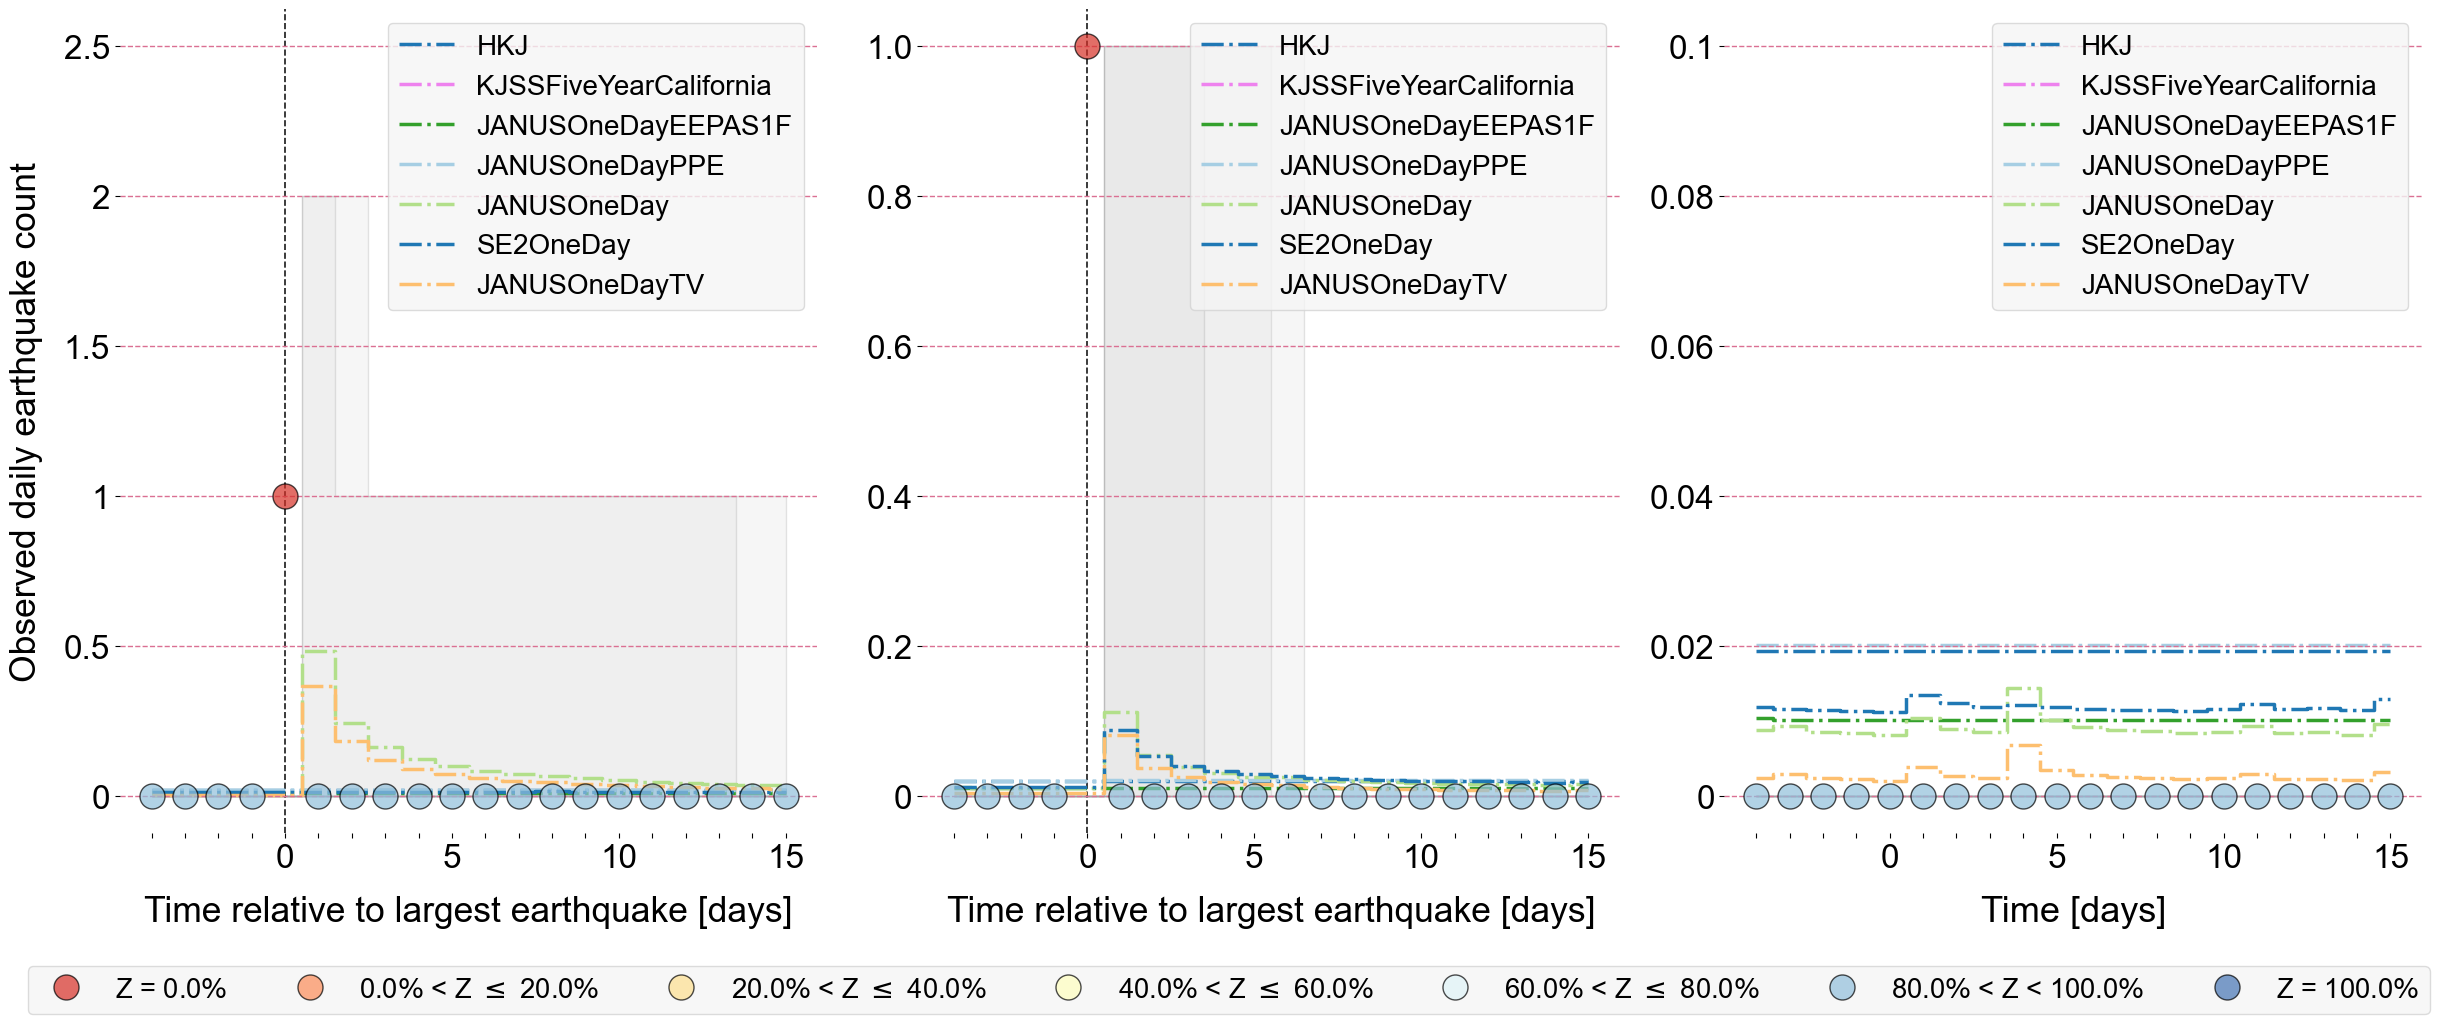

In [107]:
fig, ((ax_mendo5, ax_napa5, ax_quiet5)) = plt.subplots(nrows=1, ncols=3, figsize=(24,9))
fig.tight_layout()

# Mw >= 4.95 earthquake forecasting models
ax_mendo5.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred')
ax_mendo5.fill_between(HKJ5_mendo.date.values, HKJ5_mendo_plow95, HKJ5_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_mendo5.fill_between(KJSSFiveYearCalifornia_mendo.date.values, KJSSFiveYearCalifornia_mendo_plow95, KJSSFiveYearCalifornia_mendo_phigh95, linewidth=1, 
               edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_mendo5.fill_between(JANUSOneDayEEPAS1F_mendo.date.values, JANUSOneDayEEPAS1F_mendo_plow95, JANUSOneDayEEPAS1F_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_mendo5.fill_between(JANUSOneDayPPE_mendo.date.values, JANUSOneDayPPE_mendo_plow95, JANUSOneDayPPE_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_mendo5.fill_between(JANUSOneDay_mendo.date.values, JANUSOneDay_mendo_plow95, JANUSOneDay_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_mendo5.fill_between(SE2OneDay_mendo.date.values, SE2OneDay_mendo_plow95, SE2OneDay_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_mendo5.fill_between(JANUSOneDayTV_mendo.date.values, JANUSOneDayTV_mendo_plow95, JANUSOneDayTV_mendo_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_mendo5.step(HKJ5_mendo.date, HKJ5_mendo.n_HKJ5, '-.', color='#1f77b4', where='mid', linewidth=2.5, zorder=1, label='HKJ')
ax_mendo5.step(KJSSFiveYearCalifornia_mendo.date, KJSSFiveYearCalifornia_mendo.n_KJSSFiveYearCalifornia, '-.', color='#EE82EE', where='mid', linewidth=2.5, zorder=1, label='KJSSFiveYearCalifornia')
ax_mendo5.step(JANUSOneDayEEPAS1F_mendo.date, JANUSOneDayEEPAS1F_mendo.n_JANUSOneDayEEPAS1F, '-.', color='#33a02c', where='mid', linewidth=2.5, zorder=1, label='JANUSOneDayEEPAS1F')
ax_mendo5.step(JANUSOneDayPPE_mendo.date, JANUSOneDayPPE_mendo.n_JANUSOneDayPPE, '-.', color='#a6cee3', where='mid', linewidth=2.5, zorder=1, label='JANUSOneDayPPE')

ax_mendo5.step(JANUSOneDay_mendo.date, JANUSOneDay_mendo.n_JANUSOneDay, '-.', color='#b2df8a', where='mid', linewidth=2.5, zorder=1, label='JANUSOneDay')
ax_mendo5.step(SE2OneDay_mendo.date, SE2OneDay_mendo.n_SE2OneDay, '-.', color='#1f78b4', where='mid', linewidth=2.5, zorder=1, label='SE2OneDay')

ax_mendo5.step(JANUSOneDayTV_mendo.date, JANUSOneDayTV_mendo.n_JANUSOneDayTV, '-.', color='#fdbf6f', where='mid', linewidth=2.5, zorder=1, label='JANUSOneDayTV')

ax_mendo5.legend(fontsize=20, facecolor='whitesmoke', edgecolor='lightgrey', loc='upper right')

models_mendo5 = [HKJ5_mendo, KJSSFiveYearCalifornia_mendo, JANUSOneDayEEPAS1F_mendo, JANUSOneDayPPE_mendo, \
                JANUSOneDay_mendo, SE2OneDay_mendo, \
                JANUSOneDayTV_mendo]

phigh_mendo5 = [HKJ5_mendo_phigh95, KJSSFiveYearCalifornia_mendo_phigh95, JANUSOneDayEEPAS1F_mendo_phigh95, JANUSOneDayPPE_mendo_phigh95, \
               JANUSOneDay_mendo_phigh95, SE2OneDay_mendo_phigh95, \
               JANUSOneDayTV_mendo_phigh95]

plow_mendo5 = [HKJ5_mendo_plow95, KJSSFiveYearCalifornia_mendo_plow95, JANUSOneDayEEPAS1F_mendo_plow95, JANUSOneDayPPE_mendo_plow95, \
              JANUSOneDay_mendo_plow95, SE2OneDay_mendo_plow95, \
              JANUSOneDayTV_mendo_plow95]

counts_mendo5 = np.zeros(len(KJSSFiveYearCalifornia_mendo.obs))
for j in range(len(models_mendo5)):
    for i in range(len(counts_mendo5)):
        if (models_mendo5[j].obs.values[i] <= phigh_mendo5[j][i]) and (models_mendo5[j].obs.values[i] >= plow_mendo5[j][i]) == True:
            counts_mendo5[i] = counts_mendo5[i] + 1   

percentage_mendo5 = []
for i in range(len(counts_mendo5)):
    percentage_mendo5.append((counts_mendo5[i] * 100) / len(models_mendo5))

for i in range(len(percentage_mendo5)):
    if percentage_mendo5[i] == 0.0:
        ax_mendo5.plot(KJSSFiveYearCalifornia_mendo.date.values[i], KJSSFiveYearCalifornia_mendo.obs.values[i], 'o', color='none', markerfacecolor='#d73027', markersize=18, alpha=0.7, zorder=2, label='N = 0.0$\%$')
    if percentage_mendo5[i] > 0.0 and percentage_mendo5[i] <= 20.0:
        ax_mendo5.plot(KJSSFiveYearCalifornia_mendo.date.values[i], KJSSFiveYearCalifornia_mendo.obs.values[i], 'o', color='none', markerfacecolor='#fc8d59', markersize=18, alpha=0.7, zorder=2, label='0.0$\%$ > N $\leq$ 20.0$\%$')
    elif percentage_mendo5[i] > 20.0 and percentage_mendo5[i] <= 40.0:
        ax_mendo5.plot(KJSSFiveYearCalifornia_mendo.date.values[i], KJSSFiveYearCalifornia_mendo.obs.values[i], 'o', color='none', markerfacecolor='#fee090', markersize=18, alpha=0.7, zorder=2, label='20.0$\%$ > N $\leq$ 40.0$\%$')
    elif percentage_mendo5[i] > 40.0 and percentage_mendo5[i] <= 60.0:
        ax_mendo5.plot(KJSSFiveYearCalifornia_mendo.date.values[i], KJSSFiveYearCalifornia_mendo.obs.values[i], 'o', color='none', markerfacecolor='#ffffbf', markersize=18, alpha=0.7, zorder=2, label='40.0$\%$ > N $\leq$ 60.0$\%$')
    elif percentage_mendo5[i] > 60.0 and percentage_mendo5[i] <= 80.0:
        ax_mendo5.plot(KJSSFiveYearCalifornia_mendo.date.values[i], KJSSFiveYearCalifornia_mendo.obs.values[i], 'o', color='none', markerfacecolor='#e0f3f8', markersize=18, alpha=0.7, zorder=2, label='60.0$\%$ > N $\leq$ 80.0$\%$')
    elif percentage_mendo5[i] > 80.0 and percentage_mendo5[i] < 100.0:
        ax_mendo5.plot(KJSSFiveYearCalifornia_mendo.date.values[i], KJSSFiveYearCalifornia_mendo.obs.values[i], 'o', color='none', markerfacecolor='#91bfdb', markersize=18, alpha=0.7, zorder=2, label='80.0$\%$ > N < 100.0$\%$')    
    elif percentage_mendo5[i] == 100.0:
        ax_mendo5.plot(KJSSFiveYearCalifornia_mendo.date.values[i], KJSSFiveYearCalifornia_mendo.obs.values[i], 'o', color='none', markerfacecolor='#4575b4', markersize=18, alpha=0.7, zorder=2, label='N = 100.0$\%$')

ax_mendo5.axvline(x=4, ymin=0, ymax=2.5, c='k', linewidth=1.2, linestyle='--', alpha=0.9, zorder=0)
ax_mendo5.yaxis.set_ticks(np.arange(0, 2.51, step=0.5))
ax_mendo5.set_yticklabels([0,0.5,1,1.5,2,2.5], fontsize=24)
plt.setp(ax_mendo5.spines.values(), color='none')
ax_mendo5.set_ylim(-0.125,2.625)
ax_mendo5.set_ylabel('Observed daily earthquake count', fontsize=25.5, labelpad=15)
ax_mendo5.set_xlabel('Time relative to largest earthquake [days]', fontsize=25.5, labelpad=15)
ax_mendo5.set_xticklabels(['','', '','', '0', '', '', '', '', '5', '', '', '', '', '10', '', '', '', '', '15'], fontsize=24)

ax_napa5.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred')
ax_napa5.fill_between(HKJ5_napa.date.values, HKJ5_napa_plow95, HKJ5_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid')
ax_napa5.fill_between(KJSSFiveYearCalifornia_napa.date.values, KJSSFiveYearCalifornia_napa_plow95, KJSSFiveYearCalifornia_napa_phigh95, linewidth=1, 
               edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid')
ax_napa5.fill_between(JANUSOneDayEEPAS1F_napa.date.values, JANUSOneDayEEPAS1F_napa_plow95, JANUSOneDayEEPAS1F_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid')
ax_napa5.fill_between(JANUSOneDayPPE_napa.date.values, JANUSOneDayPPE_napa_plow95, JANUSOneDayPPE_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid')

ax_napa5.fill_between(JANUSOneDay_napa.date.values, JANUSOneDay_napa_plow95, JANUSOneDay_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid')
ax_napa5.fill_between(SE2OneDay_napa.date.values, SE2OneDay_napa_plow95, SE2OneDay_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid')

ax_napa5.fill_between(JANUSOneDayTV_napa.date.values, JANUSOneDayTV_napa_plow95, JANUSOneDayTV_napa_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid')

ax_napa5.step(HKJ5_napa.date, HKJ5_napa.n_HKJ5, '-.', color='#1f77b4', where='mid', linewidth=2.5, zorder=1, label='HKJ')
ax_napa5.step(KJSSFiveYearCalifornia_napa.date, KJSSFiveYearCalifornia_napa.n_KJSSFiveYearCalifornia, '-.', color='#EE82EE', where='mid', linewidth=2.5, zorder=1, label='KJSSFiveYearCalifornia')
ax_napa5.step(JANUSOneDayEEPAS1F_napa.date, JANUSOneDayEEPAS1F_napa.n_JANUSOneDayEEPAS1F, '-.', color='#33a02c', where='mid', linewidth=2.5, zorder=1, label='JANUSOneDayEEPAS1F')
ax_napa5.step(JANUSOneDayPPE_napa.date, JANUSOneDayPPE_napa.n_JANUSOneDayPPE, '-.', color='#a6cee3', where='mid', linewidth=2.5, zorder=1, label='JANUSOneDayPPE')

ax_napa5.step(JANUSOneDay_napa.date, JANUSOneDay_napa.n_JANUSOneDay, '-.', color='#b2df8a', where='mid', linewidth=2.5, zorder=1, label='JANUSOneDay')
ax_napa5.step(SE2OneDay_napa.date, SE2OneDay_napa.n_SE2OneDay, '-.', color='#1f78b4', where='mid', linewidth=2.5, zorder=1, label='SE2OneDay')

ax_napa5.step(JANUSOneDayTV_napa.date, JANUSOneDayTV_napa.n_JANUSOneDayTV, '-.', color='#fdbf6f', where='mid', linewidth=2.5, zorder=1, label='JANUSOneDayTV')

ax_napa5.legend(fontsize=20, facecolor='whitesmoke', edgecolor='lightgrey', loc='upper right')

models_napa5 = [HKJ5_napa, KJSSFiveYearCalifornia_napa, JANUSOneDayEEPAS1F_napa, JANUSOneDayPPE_napa, \
                JANUSOneDay_napa, SE2OneDay_napa, \
                JANUSOneDayTV_napa]

phigh_napa5 = [HKJ5_napa_phigh95, KJSSFiveYearCalifornia_napa_phigh95, JANUSOneDayEEPAS1F_napa_phigh95, JANUSOneDayPPE_napa_phigh95, \
               JANUSOneDay_napa_phigh95, SE2OneDay_napa_phigh95, \
               JANUSOneDayTV_napa_phigh95]

plow_napa5 = [HKJ5_napa_plow95, KJSSFiveYearCalifornia_napa_plow95, JANUSOneDayEEPAS1F_napa_plow95, JANUSOneDayPPE_napa_phigh95, \
              JANUSOneDay_napa_plow95, SE2OneDay_napa_plow95, \
              JANUSOneDayTV_napa_plow95]

counts_napa5 = np.zeros(len(KJSSFiveYearCalifornia_napa.obs))
for j in range(len(models_napa5)):
    for i in range(len(counts_napa5)):
        if (models_napa5[j].obs.values[i] <= phigh_napa5[j][i]) and (models_napa5[j].obs.values[i] >= plow_napa5[j][i]) == True:
            counts_napa5[i] = counts_napa5[i] + 1   

percentage_napa5 = []
for i in range(len(counts_napa5)):
    percentage_napa5.append((counts_napa5[i] * 100) / len(models_napa5))

for i in range(len(percentage_napa5)):
    if percentage_napa5[i] == 0.0:
        ax_napa5.plot(KJSSFiveYearCalifornia_napa.date.values[i], KJSSFiveYearCalifornia_napa.obs.values[i], 'o', markeredgecolor='k', color='#d73027', markersize=18, alpha=0.7, zorder=2)
    if percentage_napa5[i] > 0.0 and percentage_napa5[i] <= 20.0:
         ax_napa5.plot(KJSSFiveYearCalifornia_napa.date.values[i], KJSSFiveYearCalifornia_napa.obs.values[i], 'o', markeredgecolor='k', color='#fc8d59', markersize=18, alpha=0.7, zorder=2)
    elif percentage_napa5[i] > 20.0 and percentage_napa5[i] <= 40.0:
        ax_napa5.plot(KJSSFiveYearCalifornia_napa.date.values[i], KJSSFiveYearCalifornia_napa.obs.values[i], 'o', markeredgecolor='k', color='#fee090', markersize=18, alpha=0.7, zorder=2)
    elif percentage_napa5[i] > 40.0 and percentage_napa5[i] <= 60.0:
        ax_napa5.plot(KJSSFiveYearCalifornia_napa.date.values[i], KJSSFiveYearCalifornia_napa.obs.values[i], 'o', markeredgecolor='k', color='#ffffbf', markersize=18, alpha=0.7, zorder=2)
    elif percentage_napa5[i] > 60.0 and percentage_napa5[i] <= 80.0:
        ax_napa5.plot(KJSSFiveYearCalifornia_napa.date.values[i], KJSSFiveYearCalifornia_napa.obs.values[i], 'o', markeredgecolor='k', color='#e0f3f8', markersize=18, alpha=0.7, zorder=2)
    elif percentage_napa5[i] > 80.0 and percentage_napa5[i] < 100.0:
        ax_napa5.plot(KJSSFiveYearCalifornia_napa.date.values[i], KJSSFiveYearCalifornia_napa.obs.values[i], 'o', markeredgecolor='k', color='#91bfdb', markersize=18, alpha=0.7, zorder=2)    
    elif percentage_napa5[i] == 100.0:
        ax_napa5.plot(KJSSFiveYearCalifornia_napa.date.values[i], KJSSFiveYearCalifornia_napa.obs.values[i], 'o', markeredgecolor='k', color='#4575b4', markersize=18, alpha=0.7, zorder=2)

ax_napa5.axvline(x=4, ymin=0, ymax=21, c='k', linewidth=1.2, linestyle='--', alpha=0.9, zorder=0)
ax_napa5.yaxis.set_ticks(np.arange(0, 1.1, step=0.2))
ax_napa5.set_yticklabels([0,0.2,0.4,0.6,0.8,1.0], fontsize=24)
plt.setp(ax_napa5.spines.values(), color='none')
ax_napa5.set_ylim(-0.05,1.05)
ax_napa5.set_xticklabels(['','', '','', '0', '', '', '', '', '5', '', '', '', '', '10', '', '', '', '', '15'], fontsize=24)
ax_napa5.set_xlabel('Time relative to largest earthquake [days]', fontsize=25.5, labelpad=15)

ax_quiet5.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred')
ax_quiet5.fill_between(HKJ5_quiet.date.values, HKJ5_quiet_plow95, HKJ5_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_quiet5.fill_between(KJSSFiveYearCalifornia_quiet.date.values, KJSSFiveYearCalifornia_quiet_plow95, KJSSFiveYearCalifornia_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_quiet5.fill_between(JANUSOneDayEEPAS1F_quiet.date.values, JANUSOneDayEEPAS1F_quiet_plow95, JANUSOneDayEEPAS1F_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_quiet5.fill_between(JANUSOneDayPPE_quiet.date.values, JANUSOneDayPPE_quiet_plow95, JANUSOneDayPPE_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_quiet5.fill_between(JANUSOneDay_quiet.date.values, JANUSOneDay_quiet_plow95, JANUSOneDay_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)
ax_quiet5.fill_between(SE2OneDay_quiet.date.values, SE2OneDay_quiet_plow95, SE2OneDay_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_quiet5.fill_between(JANUSOneDayTV_quiet.date, JANUSOneDayTV_quiet_plow95, JANUSOneDayTV_quiet_phigh95, linewidth=1, edgecolor='grey', facecolor='lightgrey', alpha=0.2, step='mid', zorder=0)

ax_quiet5.step(HKJ5_quiet.date, HKJ5_quiet.n_HKJ5, '-.', color='#1f77b4', where='mid', linewidth=2.5, zorder=1, label='HKJ')
ax_quiet5.step(KJSSFiveYearCalifornia_quiet.date, KJSSFiveYearCalifornia_quiet.n_KJSSFiveYearCalifornia, '-.', color='#EE82EE', where='mid', linewidth=2.5, zorder=1, label='KJSSFiveYearCalifornia')
ax_quiet5.step(JANUSOneDayEEPAS1F_quiet.date, JANUSOneDayEEPAS1F_quiet.n_JANUSOneDayEEPAS1F, '-.', color='#33a02c', where='mid', linewidth=2.5, zorder=1, label='JANUSOneDayEEPAS1F')
ax_quiet5.step(JANUSOneDayPPE_quiet.date, JANUSOneDayPPE_quiet.n_JANUSOneDayPPE, '-.', color='#a6cee3', where='mid', linewidth=2.5, zorder=1, label='JANUSOneDayPPE')

ax_quiet5.step(JANUSOneDay_quiet.date, JANUSOneDay_quiet.n_JANUSOneDay, '-.', color='#b2df8a', where='mid', linewidth=2.5, zorder=1, label='JANUSOneDay')
ax_quiet5.step(SE2OneDay_quiet.date, SE2OneDay_quiet.n_SE2OneDay, '-.', color='#1f78b4', where='mid', linewidth=2.5, zorder=1, label='SE2OneDay')

ax_quiet5.step(JANUSOneDayTV_quiet.date, JANUSOneDayTV_quiet.n_JANUSOneDayTV, '-.', color='#fdbf6f', where='mid', linewidth=2.5, zorder=1, label='JANUSOneDayTV')

ax_quiet5.legend(fontsize=20, facecolor='whitesmoke', edgecolor='lightgrey', loc='upper right')

models_quiet5 = [HKJ5_quiet, KJSSFiveYearCalifornia_quiet, JANUSOneDayEEPAS1F_quiet, JANUSOneDayPPE_quiet, \
                 JANUSOneDay_quiet, SE2OneDay_quiet, \
                 JANUSOneDayTV_quiet]

phigh_quiet5 = [HKJ5_quiet_phigh95, KJSSFiveYearCalifornia_quiet_phigh95, JANUSOneDayEEPAS1F_quiet_phigh95, JANUSOneDayPPE_quiet_phigh95, \
                JANUSOneDay_quiet_phigh95, SE2OneDay_quiet_phigh95, \
                JANUSOneDayTV_quiet_phigh95]

plow_quiet5 = [HKJ5_quiet_plow95, KJSSFiveYearCalifornia_quiet_plow95, JANUSOneDayEEPAS1F_quiet_plow95, JANUSOneDayPPE_quiet_plow95, \
               JANUSOneDay_quiet_plow95, SE2OneDay_quiet_plow95, \
               JANUSOneDayTV_quiet_plow95] 

counts_quiet5 = np.zeros(len(KJSSFiveYearCalifornia_quiet.obs))
for j in range(len(models_quiet5)):
    for i in range(len(counts_quiet5)):
        if (models_quiet5[j].obs.values[i] <= phigh_quiet5[j][i]) and (models_quiet5[j].obs.values[i] >= plow_quiet5[j][i]) == True:
            counts_quiet5[i] = counts_quiet5[i] + 1   

percentage_quiet5 = []
for i in range(len(counts_quiet5)):
    percentage_quiet5.append((counts_quiet5[i] * 100) / len(models_quiet5))
        
for i in range(len(percentage_quiet5)):
    if percentage_quiet5[i] == 0.0:
        ax_quiet5.plot(KJSSFiveYearCalifornia_quiet.date.values[i], KJSSFiveYearCalifornia_quiet.obs.values[i], 'o', markeredgecolor='k', color='#d73027', markersize=18, alpha=0.7, zorder=2)
    elif percentage_quiet5[i] > 0.0 and percentage_quiet5[i] < 20.0:
        ax_quiet5.plot(KJSSFiveYearCalifornia_quiet.date.values[i], KJSSFiveYearCalifornia_quiet.obs.values[i], 'o', markeredgecolor='k', color='#fc8d59', markersize=18, alpha=0.7, zorder=2)
    elif percentage_quiet5[i] >= 20.0 and percentage_quiet5[i] < 40.0:
        ax_quiet5.plot(KJSSFiveYearCalifornia_quiet.date.values[i], KJSSFiveYearCalifornia_quiet.obs.values[i], 'o', markeredgecolor='k', color='#fee090', markersize=18, alpha=0.7, zorder=2)
    elif percentage_quiet5[i] >= 40.0 and percentage_quiet5[i] < 60.0:
        ax_quiet5.plot(KJSSFiveYearCalifornia_quiet.date.values[i], KJSSFiveYearCalifornia_quiet.obs.values[i], 'o', markeredgecolor='k', color='#ffffbf', markersize=18, alpha=0.7, zorder=2)
    elif percentage_quiet5[i] >= 60.0 and percentage_quiet5[i] < 80.0:
        ax_quiet5.plot(KJSSFiveYearCalifornia_quiet.date.values[i], KJSSFiveYearCalifornia_quiet.obs.values[i], 'o', markeredgecolor='k', color='#e0f3f8', markersize=18, alpha=0.7, zorder=2)
    elif percentage_quiet5[i] >= 80.0 and percentage_quiet5[i] < 100.0:
        ax_quiet5.plot(KJSSFiveYearCalifornia_quiet.date.values[i], KJSSFiveYearCalifornia_quiet.obs.values[i], 'o', markeredgecolor='k', color='#91bfdb', markersize=18, alpha=0.7, zorder=2)    
    elif percentage_quiet5[i] == 100.0:
        ax_quiet5.plot(KJSSFiveYearCalifornia_quiet.date.values[i], KJSSFiveYearCalifornia_quiet.obs.values[i], 'o', markeredgecolor='k', color='#4575b4', markersize=18, alpha=0.7, zorder=2)

ax_quiet5.yaxis.set_ticks(np.arange(0, 0.1005, step=0.02))
ax_quiet5.set_yticklabels([0,0.02,0.04,0.06,0.08,0.1], fontsize=24)
plt.setp(ax_quiet5.spines.values(), color='none')
ax_quiet5.set_xticklabels(['','', '','', '0', '', '', '', '', '5', '', '', '', '', '10', '', '', '', '', '15'], fontsize=24)
ax_quiet5.set_xlabel('Time [days]', fontsize=26, labelpad=15)
ax_quiet5.set_ylim(-0.005,0.105)

plt.subplots_adjust(wspace=0.15)
ax = fig.add_axes([1.023, 0, 0, 0])
ax.axis('off')
ax.legend(handles=legend_elements, ncol=7,  borderaxespad=3, fancybox=True, fontsize=19.7,  facecolor='whitesmoke', edgecolor='lightgrey')
plt.savefig('expected_outputs/FigureS4.png', dpi=150, bbox_inches='tight')

### How good are the models at forecasting the spatial distribution of observed earthquakes?

In [108]:
# Mw >= 3.95 earthquake forecasting models
ETAS_dsquantile = np.genfromtxt('preprocessed_inputs/ETAS/ETAS_daily_space_quantiles.dat', delimiter='\t')
ETASv1_dsquantile = np.genfromtxt('preprocessed_inputs/ETASv1/ETASv1_daily_space_quantiles.dat', delimiter='\t')
ETAS_DROneDayMd2_dsquantile = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayMd2/ETAS_DROneDayMd2_daily_space_quantiles.dat', delimiter='\t')
ETAS_DROneDayMd3_dsquantile = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayMd3/ETAS_DROneDayMd3_daily_space_quantiles.dat', delimiter='\t')
ETAS_HWMd2_dsquantile = np.genfromtxt('preprocessed_inputs/ETAS_HWMd2/ETAS_HWMd2_daily_space_quantiles.dat', delimiter='\t')
ETAS_HWMd3_dsquantile = np.genfromtxt('preprocessed_inputs/ETAS_HWMd3/ETAS_HWMd3_daily_space_quantiles.dat', delimiter='\t')
ETAS_DROneDayMd295_dsquantile = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayMd295/ETAS_DROneDayMd295_daily_space_quantiles.dat', delimiter='\t')
ETASSYN_DROneDayMd295_dsquantile = np.genfromtxt('preprocessed_inputs/ETASSYN_DROneDayMd295/ETASSYN_DROneDayMd295_daily_space_quantiles.dat', delimiter='\t')

STEP_dsquantile = np.genfromtxt('preprocessed_inputs/STEP/STEP_daily_space_quantiles.dat', delimiter='\t')
STEPJAVA_dsquantile = np.genfromtxt('preprocessed_inputs/STEPJAVA/STEPJAVA_daily_space_quantiles.dat', delimiter='\t')

HKJ_dsquantile = np.genfromtxt('preprocessed_inputs/HKJ/HKJ_daily_space_quantiles.dat', delimiter='\t')
KJSSOneDayCalifornia_dsquantile = np.genfromtxt('preprocessed_inputs/KJSSOneDayCalifornia/KJSSOneDayCalifornia_daily_space_quantiles.dat', delimiter='\t')
ETAS_DROneDayPPEMd2_dsquantile = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayPPEMd2/ETAS_DROneDayPPEMd2_daily_space_quantiles.dat', delimiter='\t')
ETAS_DROneDayPPEMd3_dsquantile = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayPPEMd3/ETAS_DROneDayPPEMd3_daily_space_quantiles.dat', delimiter='\t')

K3Md2_dsquantile = np.genfromtxt('preprocessed_inputs/K3Md2/K3Md2_daily_space_quantiles.dat', delimiter='\t')
K3Md3_dsquantile = np.genfromtxt('preprocessed_inputs/K3Md3/K3Md3_daily_space_quantiles.dat', delimiter='\t')
GSF_ISO_dsquantile = np.genfromtxt('preprocessed_inputs/GSF_ISO/GSF_ISO_daily_space_quantiles.dat', delimiter='\t')
GSF_ANISO_dsquantile = np.genfromtxt('preprocessed_inputs/GSF_ANISO/GSF_ANISO_daily_space_quantiles.dat', delimiter='\t')

OneDayBayesianBMA_dsquantile = np.genfromtxt('preprocessed_inputs/OneDayBayesianBMA/OneDayBayesianBMA_daily_space_quantiles_updated.dat', delimiter='\t')
OneDayBayesianSeqBMA_dsquantile = np.genfromtxt('preprocessed_inputs/OneDayBayesianSeqBMA/OneDayBayesianSeqBMA_daily_space_quantiles_updated.dat', delimiter='\t')
ETAS_HW_K3_AVERAGE_Md2_dsquantile = np.genfromtxt('preprocessed_inputs/ETAS_HW_K3_AVERAGE_Md2/ETAS_HW_K3_AVERAGE_Md2_daily_space_quantiles_updated.dat', delimiter='\t')
ETAS_HW_K3_AVERAGE_Md3_dsquantile = np.genfromtxt('preprocessed_inputs/ETAS_HW_K3_AVERAGE_Md3/ETAS_HW_K3_AVERAGE_Md3_daily_space_quantiles.dat', delimiter='\t')

# Mw >= 4.95 earthquake forecasting models
HKJ5_dsquantile = np.genfromtxt('preprocessed_inputs/HKJ/HKJ5_daily_space_quantiles.dat', delimiter='\t')
KJSSFiveYearCalifornia_dsquantile = np.genfromtxt('preprocessed_inputs/KJSSFiveYearCalifornia/KJSSFiveYearCalifornia_daily_space_quantiles.dat', delimiter='\t')
JANUSOneDayEEPAS1F_dsquantile = np.genfromtxt('preprocessed_inputs/JANUSOneDayEEPAS1F/JANUSOneDayEEPAS1F_daily_space_quantiles_up.dat', delimiter='\t')
JANUSOneDayPPE_dsquantile = np.genfromtxt('preprocessed_inputs/JANUSOneDayPPE/JANUSOneDayPPE_daily_space_quantiles_up.dat', delimiter='\t')

JANUSOneDay_dsquantile = np.genfromtxt('preprocessed_inputs/JANUSOneDay/JANUSOneDay_daily_space_quantiles_up.dat', delimiter='\t')
SE2OneDay_dsquantile = np.genfromtxt('preprocessed_inputs/SE2OneDay/SE2OneDay_daily_space_quantiles_up2.dat', delimiter='\t')

JANUSOneDayTV_dsquantile = np.genfromtxt('preprocessed_inputs/JANUSOneDayTV/JANUSOneDayTV_daily_space_quantiles_up.dat', delimiter='\t')

In [109]:
# Mw >= 3.95 earthquake forecasting models
ETAS_dmquantile = np.genfromtxt('preprocessed_inputs/ETAS/ETAS_daily_magnitude_quantiles.dat', delimiter='\t')
ETASv1_dmquantile = np.genfromtxt('preprocessed_inputs/ETASv1/ETASv1_daily_magnitude_quantiles.dat', delimiter='\t')
ETAS_DROneDayMd2_dmquantile = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayMd2/ETAS_DROneDayMd2_daily_magnitude_quantiles.dat', delimiter='\t')
ETAS_DROneDayMd3_dmquantile = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayMd3/ETAS_DROneDayMd3_daily_magnitude_quantiles.dat', delimiter='\t')
ETAS_HWMd2_dmquantile = np.genfromtxt('preprocessed_inputs/ETAS_HWMd2/ETAS_HWMd2_daily_magnitude_quantiles.dat', delimiter='\t')
ETAS_HWMd3_dmquantile = np.genfromtxt('preprocessed_inputs/ETAS_HWMd3/ETAS_HWMd3_daily_magnitude_quantiles.dat', delimiter='\t')
ETAS_DROneDayMd295_dmquantile = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayMd295/ETAS_DROneDayMd295_daily_magnitude_quantiles.dat', delimiter='\t')
ETASSYN_DROneDayMd295_dmquantile = np.genfromtxt('preprocessed_inputs/ETASSYN_DROneDayMd295/ETASSYN_DROneDayMd295_daily_magnitude_quantiles.dat', delimiter='\t')

STEP_dmquantile = np.genfromtxt('preprocessed_inputs/STEP/STEP_daily_magnitude_quantiles.dat', delimiter='\t')
STEPJAVA_dmquantile = np.genfromtxt('preprocessed_inputs/STEPJAVA/STEPJAVA_daily_magnitude_quantiles.dat', delimiter='\t')

HKJ_dmquantile = np.genfromtxt('preprocessed_inputs/HKJ/HKJ_daily_magnitude_quantiles.dat', delimiter='\t')
KJSSOneDayCalifornia_dmquantile = np.genfromtxt('preprocessed_inputs/KJSSOneDayCalifornia/KJSSOneDayCalifornia_daily_magnitude_quantiles.dat', delimiter='\t')
ETAS_DROneDayPPEMd2_dmquantile = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayPPEMd2/ETAS_DROneDayPPEMd2_daily_magnitude_quantiles.dat', delimiter='\t')
ETAS_DROneDayPPEMd3_dmquantile = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayPPEMd3/ETAS_DROneDayPPEMd3_daily_magnitude_quantiles.dat', delimiter='\t')

K3Md2_dmquantile = np.genfromtxt('preprocessed_inputs/K3Md2/K3Md2_daily_magnitude_quantiles.dat', delimiter='\t')
K3Md3_dmquantile = np.genfromtxt('preprocessed_inputs/K3Md3/K3Md3_daily_magnitude_quantiles.dat', delimiter='\t')
GSF_ISO_dmquantile = np.genfromtxt('preprocessed_inputs/GSF_ISO/GSF_ISO_daily_magnitude_quantiles.dat', delimiter='\t')
GSF_ANISO_dmquantile = np.genfromtxt('preprocessed_inputs/GSF_ANISO/GSF_ANISO_daily_magnitude_quantiles.dat', delimiter='\t')

OneDayBayesianBMA_dmquantile = np.genfromtxt('preprocessed_inputs/OneDayBayesianBMA/OneDayBayesianBMA_daily_magnitude_quantiles.dat', delimiter='\t')
OneDayBayesianSeqBMA_dmquantile = np.genfromtxt('preprocessed_inputs/OneDayBayesianSeqBMA/OneDayBayesianSeqBMA_daily_magnitude_quantiles.dat', delimiter='\t')
ETAS_HW_K3_AVERAGE_Md2_dmquantile = np.genfromtxt('preprocessed_inputs/ETAS_HW_K3_AVERAGE_Md2/ETAS_HW_K3_AVERAGE_Md2_daily_magnitude_quantiles.dat', delimiter='\t')
ETAS_HW_K3_AVERAGE_Md3_dmquantile = np.genfromtxt('preprocessed_inputs/ETAS_HW_K3_AVERAGE_Md3/ETAS_HW_K3_AVERAGE_Md3_daily_magnitude_quantiles.dat', delimiter='\t')

# Mw >= 4.95 earthquake forecasting models
HKJ5_dmquantile = np.genfromtxt('preprocessed_inputs/HKJ/HKJ5_daily_magnitude_quantiles.dat', delimiter='\t')
KJSSFiveYearCalifornia_dmquantile = np.genfromtxt('preprocessed_inputs/KJSSFiveYearCalifornia/KJSSFiveYearCalifornia_daily_magnitude_quantiles.dat', delimiter='\t')
JANUSOneDayEEPAS1F_dmquantile = np.genfromtxt('preprocessed_inputs/JANUSOneDayEEPAS1F/JANUSOneDayEEPAS1F_daily_magnitude_quantiles.dat', delimiter='\t')
JANUSOneDayPPE_dmquantile = np.genfromtxt('preprocessed_inputs/JANUSOneDayPPE/JANUSOneDayPPE_daily_magnitude_quantiles.dat', delimiter='\t')

JANUSOneDay_dmquantile = np.genfromtxt('preprocessed_inputs/JANUSOneDay/JANUSOneDay_daily_magnitude_quantiles.dat', delimiter='\t')
SE2OneDay_dmquantile = np.genfromtxt('preprocessed_inputs/SE2OneDay/SE2OneDay_daily_magnitude_quantiles_up2.dat', delimiter='\t')

JANUSOneDayTV_dmquantile = np.genfromtxt('preprocessed_inputs/JANUSOneDayTV/JANUSOneDayTV_daily_magnitude_quantiles.dat', delimiter='\t')

In [110]:
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)

In [111]:
catalogueETAS_dates = []

for i in range(len(catalogue.data)):
        catalogueETAS_dates.append(datetime.datetime(catalogue.get_datetimes()[i].year, 
                                                     catalogue.get_datetimes()[i].month, 
                                                     catalogue.get_datetimes()[i].day))

In [112]:
catalogall_ETAS = pd.DataFrame()
catalogall_ETAS['dates'] = catalogueETAS_dates

In [113]:
HKJ_alldates = pd.DataFrame()
HKJ_alldates['dates'] = forecast_dates[0]
HKJ_alldates['squantiles'] = HKJ_dsquantile
HKJ_alldates['mquantiles'] = HKJ_dmquantile

In [114]:
catalogueHKJ5_dates = []

for i in range(len(catalogue5.data)):
        catalogueHKJ5_dates.append(datetime.datetime(catalogue5.get_datetimes()[i].year, 
                                                     catalogue5.get_datetimes()[i].month, 
                                                     catalogue5.get_datetimes()[i].day))

In [115]:
HKJ5_alldates = pd.DataFrame()
HKJ5_alldates['dates'] = forecast_dates[0]
HKJ5_alldates['squantiles'] = HKJ5_dsquantile
HKJ5_alldates['mquantiles'] = HKJ5_dmquantile

In [116]:
ETAS_alldates = pd.DataFrame()
ETAS_alldates['dates'] = forecast_dates[1]
ETAS_alldates['squantiles'] = ETAS_dsquantile
ETAS_alldates['mquantiles'] = ETAS_dmquantile

In [117]:
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue5 = pickle.load(obj)
catalogue5 = catalogue5.filter('magnitude >= 4.95')

In [118]:
catalogueSTEP_dates = []

for i in range(len(catalogue_STEP.data)):
        catalogueSTEP_dates.append(datetime.datetime(catalogue_STEP.get_datetimes()[i].year, 
                                                     catalogue_STEP.get_datetimes()[i].month, 
                                                     catalogue_STEP.get_datetimes()[i].day))

In [119]:
catalogall_STEP = pd.DataFrame()
catalogall_STEP['dates'] = catalogueSTEP_dates

In [120]:
STEP_alldates = pd.DataFrame()
STEP_alldates['dates'] = forecast_dates[2]
STEP_alldates['squantiles'] = STEP_dsquantile
STEP_alldates['mquantiles'] = STEP_dmquantile

In [121]:
catalogueKJSSOneDayCalifornia_dates = []

for i in range(len(catalogue_KJSSOneDayCalifornia.data)):
        catalogueKJSSOneDayCalifornia_dates.append(datetime.datetime(catalogue_KJSSOneDayCalifornia.get_datetimes()[i].year, 
                                                                     catalogue_KJSSOneDayCalifornia.get_datetimes()[i].month, 
                                                                     catalogue_KJSSOneDayCalifornia.get_datetimes()[i].day))

In [122]:
catalogall_KJSSOneDayCalifornia = pd.DataFrame()
catalogall_KJSSOneDayCalifornia['dates'] = catalogueKJSSOneDayCalifornia_dates

In [123]:
KJSSOneDayCalifornia_alldates = pd.DataFrame()
KJSSOneDayCalifornia_alldates['dates'] = forecast_dates[3]
KJSSOneDayCalifornia_alldates['squantiles'] = KJSSOneDayCalifornia_dsquantile
KJSSOneDayCalifornia_alldates['mquantiles'] = KJSSOneDayCalifornia_dmquantile

In [124]:
catalogueSTEPJAVA_dates = []

for i in range(len(catalogue_STEPJAVA.data)):
        catalogueSTEPJAVA_dates.append(datetime.datetime(catalogue_STEPJAVA.get_datetimes()[i].year, 
                                                         catalogue_STEPJAVA.get_datetimes()[i].month, 
                                                         catalogue_STEPJAVA.get_datetimes()[i].day))

In [125]:
catalogall_STEPJAVA = pd.DataFrame()
catalogall_STEPJAVA['dates'] = catalogueSTEPJAVA_dates

In [126]:
STEPJAVA_alldates = pd.DataFrame()
STEPJAVA_alldates['dates'] = forecast_dates[4]
STEPJAVA_alldates['squantiles'] = STEPJAVA_dsquantile
STEPJAVA_alldates['mquantiles'] = STEPJAVA_dmquantile

In [127]:
catalogueOneDayBayesianBMA_dates = []

for i in range(len(catalogue_OneDayBayesianBMA.data)):
        catalogueOneDayBayesianBMA_dates.append(datetime.datetime(catalogue_OneDayBayesianBMA.get_datetimes()[i].year, 
                                                                  catalogue_OneDayBayesianBMA.get_datetimes()[i].month, 
                                                                  catalogue_OneDayBayesianBMA.get_datetimes()[i].day))

In [128]:
catalogall_OneDayBayesianBMA = pd.DataFrame()
catalogall_OneDayBayesianBMA['dates'] = catalogueOneDayBayesianBMA_dates

In [129]:
OneDayBayesianBMA_alldates = pd.DataFrame()
OneDayBayesianBMA_alldates['dates'] = forecast_dates[5]
OneDayBayesianBMA_alldates['squantiles'] = OneDayBayesianBMA_dsquantile
OneDayBayesianBMA_alldates['mquantiles'] = OneDayBayesianBMA_dmquantile

In [130]:
catalogall_OneDayBayesianSeqBMA = pd.DataFrame()
catalogall_OneDayBayesianSeqBMA['dates'] = catalogueOneDayBayesianBMA_dates

In [131]:
OneDayBayesianSeqBMA_alldates = pd.DataFrame()
OneDayBayesianSeqBMA_alldates['dates'] = forecast_dates[6]
OneDayBayesianSeqBMA_alldates['squantiles'] = OneDayBayesianSeqBMA_dsquantile
OneDayBayesianSeqBMA_alldates['mquantiles'] = OneDayBayesianSeqBMA_dmquantile

In [132]:
catalogueETASv1_dates = []

for i in range(len(catalogue_ETASv1.data)):
        catalogueETASv1_dates.append(datetime.datetime(catalogue_ETASv1.get_datetimes()[i].year, 
                                                       catalogue_ETASv1.get_datetimes()[i].month, 
                                                       catalogue_ETASv1.get_datetimes()[i].day))

In [133]:
catalogall_ETASv1 = pd.DataFrame()
catalogall_ETASv1['dates'] = catalogueETASv1_dates

In [134]:
ETASv1_alldates = pd.DataFrame()
ETASv1_alldates['dates'] = forecast_dates[7]
ETASv1_alldates['squantiles'] = ETASv1_dsquantile
ETASv1_alldates['mquantiles'] = ETASv1_dmquantile

In [135]:
catalogueKJSSFiveYearCalifornia_dates = []

for i in range(len(catalogue_KJSSFiveYearCalifornia.data)):
        catalogueKJSSFiveYearCalifornia_dates.append(datetime.datetime(catalogue_KJSSFiveYearCalifornia.get_datetimes()[i].year, 
                                                                       catalogue_KJSSFiveYearCalifornia.get_datetimes()[i].month, 
                                                                       catalogue_KJSSFiveYearCalifornia.get_datetimes()[i].day))

In [136]:
catalogall_KJSSFiveYearCalifornia = pd.DataFrame()
catalogall_KJSSFiveYearCalifornia['dates'] = catalogueKJSSFiveYearCalifornia_dates

In [137]:
KJSSFiveYearCalifornia_alldates = pd.DataFrame()
KJSSFiveYearCalifornia_alldates['dates'] = forecast_dates[8]
KJSSFiveYearCalifornia_alldates['squantiles'] = KJSSFiveYearCalifornia_dsquantile
KJSSFiveYearCalifornia_alldates['mquantiles'] = KJSSFiveYearCalifornia_dmquantile

In [138]:
catalogueKJSSFiveYearCaliforniab_dates = []

for i in range(len(catalogue_KJSSFiveYearCaliforniab.data)):
        catalogueKJSSFiveYearCaliforniab_dates.append(datetime.datetime(catalogue_KJSSFiveYearCaliforniab.get_datetimes()[i].year, 
                                                                        catalogue_KJSSFiveYearCalifornia.get_datetimes()[i].month, 
                                                                        catalogue_KJSSFiveYearCaliforniab.get_datetimes()[i].day))

In [139]:
catalogall_KJSSFiveYearCaliforniab = pd.DataFrame()
catalogall_KJSSFiveYearCaliforniab['dates'] = catalogueKJSSFiveYearCaliforniab_dates

In [140]:
ETAS_DROneDayMd2_alldates = pd.DataFrame()
ETAS_DROneDayMd2_alldates['dates'] = forecast_dates[9]
ETAS_DROneDayMd2_alldates['squantiles'] = ETAS_DROneDayMd2_dsquantile
ETAS_DROneDayMd2_alldates['mquantiles'] = ETAS_DROneDayMd2_dmquantile

In [141]:
ETAS_DROneDayMd3_alldates = pd.DataFrame()
ETAS_DROneDayMd3_alldates['dates'] = forecast_dates[10]
ETAS_DROneDayMd3_alldates['squantiles'] = ETAS_DROneDayMd3_dsquantile
ETAS_DROneDayMd3_alldates['mquantiles'] = ETAS_DROneDayMd3_dmquantile

In [142]:
ETAS_DROneDayPPEMd2_alldates = pd.DataFrame()
ETAS_DROneDayPPEMd2_alldates['dates'] = forecast_dates[11]
ETAS_DROneDayPPEMd2_alldates['squantiles'] = ETAS_DROneDayPPEMd2_dsquantile
ETAS_DROneDayPPEMd2_alldates['mquantiles'] = ETAS_DROneDayPPEMd2_dmquantile

In [143]:
ETAS_DROneDayPPEMd3_alldates = pd.DataFrame()
ETAS_DROneDayPPEMd3_alldates['dates'] = forecast_dates[12]
ETAS_DROneDayPPEMd3_alldates['squantiles'] = ETAS_DROneDayPPEMd3_dsquantile
ETAS_DROneDayPPEMd3_alldates['mquantiles'] = ETAS_DROneDayPPEMd3_dmquantile

In [144]:
catalogueETAS_HWMd2_dates = []
 
for i in range(len(catalogue_ETAS_HWMd2.data)):
        catalogueETAS_HWMd2_dates.append(datetime.datetime(catalogue_ETAS_HWMd2.get_datetimes()[i].year, 
                                                           catalogue_ETAS_HWMd2.get_datetimes()[i].month, 
                                                           catalogue_ETAS_HWMd2.get_datetimes()[i].day))

In [145]:
catalogall_ETAS_HWMd2 = pd.DataFrame()
catalogall_ETAS_HWMd2['dates'] = catalogueETAS_HWMd2_dates

In [146]:
ETAS_HWMd2_alldates = pd.DataFrame()
ETAS_HWMd2_alldates['dates'] = forecast_dates[13]
ETAS_HWMd2_alldates['squantiles'] = ETAS_HWMd2_dsquantile
ETAS_HWMd2_alldates['mquantiles'] = ETAS_HWMd2_dmquantile

In [147]:
ETAS_HWMd3_alldates = pd.DataFrame()
ETAS_HWMd3_alldates['dates'] = forecast_dates[14]
ETAS_HWMd3_alldates['squantiles'] = ETAS_HWMd3_dsquantile
ETAS_HWMd3_alldates['mquantiles'] = ETAS_HWMd3_dmquantile

In [148]:
ETAS_HW_K3_AVERAGE_Md2_alldates = pd.DataFrame()
ETAS_HW_K3_AVERAGE_Md2_alldates['dates'] = forecast_dates[15]
ETAS_HW_K3_AVERAGE_Md2_alldates['squantiles'] = ETAS_HW_K3_AVERAGE_Md2_dsquantile
ETAS_HW_K3_AVERAGE_Md2_alldates['mquantiles'] = ETAS_HW_K3_AVERAGE_Md2_dmquantile

In [149]:
ETAS_HW_K3_AVERAGE_Md3_alldates = pd.DataFrame()
ETAS_HW_K3_AVERAGE_Md3_alldates['dates'] = forecast_dates[16]
ETAS_HW_K3_AVERAGE_Md3_alldates['squantiles'] = ETAS_HW_K3_AVERAGE_Md3_dsquantile
ETAS_HW_K3_AVERAGE_Md3_alldates['mquantiles'] = ETAS_HW_K3_AVERAGE_Md3_dmquantile

In [150]:
JANUSOneDay_alldates = pd.DataFrame()
JANUSOneDay_alldates['dates'] = forecast_dates[17]
JANUSOneDay_alldates['squantiles'] = JANUSOneDay_dsquantile
JANUSOneDay_alldates['mquantiles'] = JANUSOneDay_dmquantile

In [151]:
JANUSOneDayEEPAS1F_alldates = pd.DataFrame()
JANUSOneDayEEPAS1F_alldates['dates'] = forecast_dates[18]
JANUSOneDayEEPAS1F_alldates['squantiles'] = JANUSOneDayEEPAS1F_dsquantile
JANUSOneDayEEPAS1F_alldates['mquantiles'] = JANUSOneDayEEPAS1F_dmquantile

In [152]:
JANUSOneDayPPE_alldates = pd.DataFrame()
JANUSOneDayPPE_alldates['dates'] = forecast_dates[19]
JANUSOneDayPPE_alldates['squantiles'] = JANUSOneDayPPE_dsquantile
JANUSOneDayPPE_alldates['mquantiles'] = JANUSOneDayPPE_dmquantile

In [153]:
JANUSOneDayTV_alldates = pd.DataFrame()
JANUSOneDayTV_alldates['dates'] = forecast_dates[20]
JANUSOneDayTV_alldates['squantiles'] = JANUSOneDayTV_dsquantile
JANUSOneDayTV_alldates['mquantiles'] = JANUSOneDayTV_dmquantile

In [154]:
K3Md2_alldates = pd.DataFrame()
K3Md2_alldates['dates'] = forecast_dates[21]
K3Md2_alldates['squantiles'] = K3Md2_dsquantile
K3Md2_alldates['mquantiles'] = K3Md2_dmquantile

In [155]:
K3Md3_alldates = pd.DataFrame()
K3Md3_alldates['dates'] = forecast_dates[22]
K3Md3_alldates['squantiles'] = K3Md3_dsquantile
K3Md3_alldates['mquantiles'] = K3Md3_dmquantile

In [156]:
SE2OneDay_alldates = pd.DataFrame()
SE2OneDay_alldates['dates'] = forecast_dates[23]
SE2OneDay_alldates['squantiles'] = SE2OneDay_dsquantile
SE2OneDay_alldates['mquantiles'] = SE2OneDay_dmquantile

In [157]:
catalogueETAS_DROneDayMd295_dates = [] 

for i in range(len(catalogue_ETAS_DROneDayMd295.data)):
        catalogueETAS_DROneDayMd295_dates.append(datetime.datetime(catalogue_ETAS_DROneDayMd295.get_datetimes()[i].year, 
                                                                   catalogue_ETAS_DROneDayMd295.get_datetimes()[i].month, 
                                                                   catalogue_ETAS_DROneDayMd295.get_datetimes()[i].day))

In [158]:
catalogall_ETAS_DROneDayMd295 = pd.DataFrame()
catalogall_ETAS_DROneDayMd295['dates'] = catalogueETAS_DROneDayMd295_dates

In [159]:
ETAS_DROneDayMd295_alldates = pd.DataFrame()
ETAS_DROneDayMd295_alldates['dates'] = forecast_dates[24]
ETAS_DROneDayMd295_alldates['squantiles'] = ETAS_DROneDayMd295_dsquantile
ETAS_DROneDayMd295_alldates['mquantiles'] = ETAS_DROneDayMd295_dmquantile

In [160]:
ETASSYN_DROneDayMd295_alldates = pd.DataFrame()
ETASSYN_DROneDayMd295_alldates['dates'] = forecast_dates[25]
ETASSYN_DROneDayMd295_alldates['squantiles'] = ETASSYN_DROneDayMd295_dsquantile
ETASSYN_DROneDayMd295_alldates['mquantiles'] = ETASSYN_DROneDayMd295_dmquantile

In [161]:
catalogueGSF_ISO_dates = [] 

for i in range(len(catalogue_GSF_ISO.data)):
        catalogueGSF_ISO_dates.append(datetime.datetime(catalogue_GSF_ISO.get_datetimes()[i].year, 
                                                        catalogue_GSF_ISO.get_datetimes()[i].month, 
                                                        catalogue_GSF_ISO.get_datetimes()[i].day))

In [162]:
catalogall_GSF_ISO = pd.DataFrame()
catalogall_GSF_ISO['dates'] = catalogueGSF_ISO_dates

In [163]:
GSF_ISO_alldates = pd.DataFrame()
GSF_ISO_alldates['dates'] = forecast_dates[26]
GSF_ISO_alldates['squantiles'] = GSF_ISO_dsquantile
GSF_ISO_alldates['mquantiles'] = GSF_ISO_dmquantile

In [164]:
GSF_ANISO_alldates = pd.DataFrame()
GSF_ANISO_alldates['dates'] = forecast_dates[27]
GSF_ANISO_alldates['squantiles'] = GSF_ANISO_dsquantile
GSF_ANISO_alldates['mquantiles'] = GSF_ANISO_dmquantile

In [165]:
# Mw >= 3.95 earthquake forecasting models
ETAS_actidates = pd.merge(catalogall_ETAS, ETAS_alldates,  how="inner", on="dates")
ETASv1_actidates = pd.merge(catalogall_ETASv1, ETASv1_alldates,  how="inner", on="dates")
ETAS_DROneDayMd2_actidates = pd.merge(catalogall_KJSSFiveYearCalifornia, ETAS_DROneDayMd2_alldates,  how="inner", on="dates")
ETAS_DROneDayMd3_actidates = pd.merge(catalogall_KJSSFiveYearCalifornia, ETAS_DROneDayMd3_alldates,  how="inner", on="dates")
ETAS_HWMd2_actidates = pd.merge(catalogall_ETAS_HWMd2, ETAS_HWMd2_alldates,  how="inner", on="dates")
ETAS_HWMd3_actidates = pd.merge(catalogall_KJSSFiveYearCalifornia, ETAS_HWMd3_alldates,  how="inner", on="dates")
ETAS_DROneDayMd295_actidates = pd.merge(catalogall_ETAS_DROneDayMd295, ETAS_DROneDayMd295_alldates,  how="inner", on="dates")
ETASSYN_DROneDayMd295_actidates = pd.merge(catalogall_ETAS_DROneDayMd295, ETASSYN_DROneDayMd295_alldates,  how="inner", on="dates")

STEP_actidates = pd.merge(catalogall_STEP, STEP_alldates,  how="inner", on="dates")
STEPJAVA_actidates = pd.merge(catalogall_STEPJAVA, STEPJAVA_alldates,  how="inner", on="dates")

HKJ_actidates = pd.merge(catalogall_ETAS, HKJ_alldates,  how="inner", on="dates")
KJSSOneDayCalifornia_actidates = pd.merge(catalogall_KJSSOneDayCalifornia, KJSSOneDayCalifornia_alldates,  how="inner", on="dates")
ETAS_DROneDayPPEMd2_actidates = pd.merge(catalogall_KJSSFiveYearCalifornia, ETAS_DROneDayPPEMd2_alldates,  how="inner", on="dates")
ETAS_DROneDayPPEMd3_actidates = pd.merge(catalogall_KJSSFiveYearCalifornia, ETAS_DROneDayPPEMd3_alldates,  how="inner", on="dates")

K3Md2_actidates = pd.merge(catalogall_ETAS_HWMd2, K3Md2_alldates,  how="inner", on="dates")
K3Md3_actidates = pd.merge(catalogall_KJSSFiveYearCalifornia, K3Md3_alldates,  how="inner", on="dates")
GSF_ISO_actidates = pd.merge(catalogall_GSF_ISO, GSF_ISO_alldates,  how="inner", on="dates")
GSF_ANISO_actidates = pd.merge(catalogall_GSF_ISO, GSF_ANISO_alldates,  how="inner", on="dates")

OneDayBayesianBMA_actidates = pd.merge(catalogall_OneDayBayesianBMA, OneDayBayesianBMA_alldates,  how="inner", on="dates")
OneDayBayesianSeqBMA_actidates = pd.merge(catalogall_OneDayBayesianSeqBMA, OneDayBayesianSeqBMA_alldates,  how="inner", on="dates")
ETAS_HW_K3_AVERAGE_Md2_actidates = pd.merge(catalogall_ETAS_HWMd2, ETAS_HW_K3_AVERAGE_Md2_alldates,  how="inner", on="dates")
ETAS_HW_K3_AVERAGE_Md3_actidates = pd.merge(catalogall_KJSSFiveYearCalifornia, ETAS_HW_K3_AVERAGE_Md3_alldates,  how="inner", on="dates")

# Mw >= 3.95 seismicity forecasts
HKJ5_actidates = pd.merge(catalogall_KJSSFiveYearCaliforniab, HKJ5_alldates,  how="inner", on="dates")
KJSSFiveYearCalifornia_actidates = pd.merge(catalogall_KJSSFiveYearCaliforniab, KJSSFiveYearCalifornia_alldates,  how="inner", on="dates")
JANUSOneDayEEPAS1F_actidates = pd.merge(catalogall_KJSSFiveYearCaliforniab, JANUSOneDayEEPAS1F_alldates,  how="inner", on="dates")
JANUSOneDayPPE_actidates = pd.merge(catalogall_KJSSFiveYearCaliforniab, JANUSOneDayPPE_alldates,  how="inner", on="dates")

JANUSOneDay_actidates = pd.merge(catalogall_KJSSFiveYearCaliforniab, JANUSOneDay_alldates,  how="inner", on="dates")
SE2OneDay_actidates = pd.merge(catalogall_KJSSFiveYearCaliforniab, SE2OneDay_alldates,  how="inner", on="dates")

JANUSOneDayTV_actidates = pd.merge(catalogall_KJSSFiveYearCaliforniab, JANUSOneDayTV_alldates,  how="inner", on="dates")

In [166]:
# Mw >= 3.95 earthquake forecasting models
ETAS_uniform = np.linspace(0.0, 1.0, len(ETAS_actidates.squantiles))
ETASv1_uniform = np.linspace(0.0, 1.0, len(ETASv1_actidates.squantiles))
ETAS_DROneDayMd2_uniform = np.linspace(0.0, 1.0, len(ETAS_DROneDayMd2_actidates.squantiles))
ETAS_DROneDayMd3_uniform = np.linspace(0.0, 1.0, len(ETAS_DROneDayMd3_actidates.squantiles))
ETAS_HWMd2_uniform = np.linspace(0.0, 1.0, len(ETAS_HWMd2_actidates.squantiles))
ETAS_HWMd3_uniform = np.linspace(0.0, 1.0, len(ETAS_HWMd3_actidates.squantiles))
ETAS_DROneDayMd295_uniform = np.linspace(0.0, 1.0, len(ETAS_DROneDayMd295_actidates.squantiles))
ETASSYN_DROneDayMd295_uniform = np.linspace(0.0, 1.0, len(ETASSYN_DROneDayMd295_actidates.squantiles))

STEP_uniform = np.linspace(0.0, 1.0, len(STEP_actidates.squantiles))
STEPJAVA_uniform = np.linspace(0.0, 1.0, len(STEPJAVA_actidates.squantiles))

HKJ_uniform = np.linspace(0.0, 1.0, len(HKJ_actidates.squantiles))
KJSSOneDayCalifornia_uniform = np.linspace(0.0, 1.0, len(KJSSOneDayCalifornia_actidates.squantiles))
ETAS_DROneDayPPEMd2_uniform = np.linspace(0.0, 1.0, len(ETAS_DROneDayPPEMd2_actidates.squantiles))
ETAS_DROneDayPPEMd3_uniform = np.linspace(0.0, 1.0, len(ETAS_DROneDayPPEMd3_actidates.squantiles))

K3Md2_uniform = np.linspace(0.0, 1.0, len(K3Md2_actidates.squantiles))
K3Md3_uniform = np.linspace(0.0, 1.0, len(K3Md3_actidates.squantiles))
GSF_ISO_uniform = np.linspace(0.0, 1.0, len(GSF_ISO_actidates.squantiles))
GSF_ANISO_uniform = np.linspace(0.0, 1.0, len(GSF_ANISO_actidates.squantiles))

OneDayBayesianBMA_uniform = np.linspace(0.0, 1.0, len(OneDayBayesianBMA_actidates.squantiles))
OneDayBayesianSeqBMA_uniform = np.linspace(0.0, 1.0, len(OneDayBayesianSeqBMA_actidates.squantiles))
ETAS_HW_K3_AVERAGE_Md2_uniform = np.linspace(0.0, 1.0, len(ETAS_HW_K3_AVERAGE_Md2_actidates.squantiles))
ETAS_HW_K3_AVERAGE_Md3_uniform = np.linspace(0.0, 1.0, len(ETAS_HW_K3_AVERAGE_Md3_actidates.squantiles))

# Mw >= 4.95 earthquake forecasting models
HKJ5_uniform = np.linspace(0.0, 1.0, len(HKJ5_actidates))
KJSSFiveYearCalifornia_uniform = np.linspace(0.0, 1.0, len(KJSSFiveYearCalifornia_actidates))
JANUSOneDayEEPAS1F_uniform = np.linspace(0.0, 1.0, len(JANUSOneDayEEPAS1F_actidates))
JANUSOneDayPPE_uniform = np.linspace(0.0, 1.0, len(JANUSOneDayPPE_actidates))

JANUSOneDay_uniform = np.linspace(0.0, 1.0, len(JANUSOneDay_actidates))
SE2OneDay_uniform = np.linspace(0.0, 1.0, len(SE2OneDay_actidates))

JANUSOneDayTV_uniform = np.linspace(0.0, 1.0, len(JANUSOneDayTV_actidates))

In [167]:
# Mw >= 3.95 earthquake forecasting models
ETAS_diff = np.abs(np.sort(ETAS_actidates.squantiles.values) - ETAS_uniform)
ETASv1_diff = np.abs(np.sort(ETASv1_actidates.squantiles.values) - ETASv1_uniform)
ETAS_DROneDayMd2_diff = np.abs(np.sort(ETAS_DROneDayMd2_actidates.squantiles.values) - ETAS_DROneDayMd2_uniform)
ETAS_DROneDayMd3_diff = np.abs(np.sort(ETAS_DROneDayMd3_actidates.squantiles.values) - ETAS_DROneDayMd3_uniform)
ETAS_HWMd2_diff = np.abs(np.sort(ETAS_HWMd2_actidates.squantiles.values) - ETAS_HWMd2_uniform)
ETAS_HWMd3_diff = np.abs(np.sort(ETAS_HWMd3_actidates.squantiles.values) - ETAS_HWMd3_uniform)
ETAS_DROneDayMd295_diff = np.abs(np.sort(ETAS_DROneDayMd295_actidates.squantiles.values) - ETAS_DROneDayMd295_uniform)
ETASSYN_DROneDayMd295_diff = np.abs(np.sort(ETASSYN_DROneDayMd295_actidates.squantiles.values) - ETASSYN_DROneDayMd295_uniform)

STEP_diff = np.abs(np.sort(STEP_actidates.squantiles.values) - STEP_uniform)
STEPJAVA_diff = np.abs(np.sort(STEPJAVA_actidates.squantiles.values) - STEPJAVA_uniform)

HKJ_diff = np.abs(np.sort(HKJ_actidates.squantiles.values) - HKJ_uniform)
KJSSOneDayCalifornia_diff = np.abs(np.sort(KJSSOneDayCalifornia_actidates.squantiles.values) - KJSSOneDayCalifornia_uniform)
ETAS_DROneDayPPEMd2_diff = np.abs(np.sort(ETAS_DROneDayPPEMd2_actidates.squantiles.values) - ETAS_DROneDayPPEMd2_uniform)
ETAS_DROneDayPPEMd3_diff = np.abs(np.sort(ETAS_DROneDayPPEMd3_actidates.squantiles.values) - ETAS_DROneDayPPEMd3_uniform)

K3Md2_diff = np.abs(np.sort(K3Md2_actidates.squantiles.values) - K3Md2_uniform)
K3Md3_diff = np.abs(np.sort(K3Md3_actidates.squantiles.values) - K3Md3_uniform)
GSF_ISO_diff = np.abs(np.sort(GSF_ISO_actidates.squantiles.values) - GSF_ISO_uniform)
GSF_ANISO_diff = np.abs(np.sort(GSF_ANISO_actidates.squantiles.values) - GSF_ANISO_uniform)

OneDayBayesianBMA_diff = np.abs(np.sort(OneDayBayesianBMA_actidates.squantiles.values) - OneDayBayesianBMA_uniform)
OneDayBayesianSeqBMA_diff = np.abs(np.sort(OneDayBayesianSeqBMA_actidates.squantiles.values) - OneDayBayesianSeqBMA_uniform)
ETAS_HW_K3_AVERAGE_Md2_diff = np.abs(np.sort(ETAS_HW_K3_AVERAGE_Md2_actidates.squantiles.values) - ETAS_HW_K3_AVERAGE_Md2_uniform)
ETAS_HW_K3_AVERAGE_Md3_diff = np.abs(np.sort(ETAS_HW_K3_AVERAGE_Md3_actidates.squantiles.values) - ETAS_HW_K3_AVERAGE_Md3_uniform)

# Mw >= 4.95 earthquake forecasting models
HKJ5_diff = np.abs(np.sort(HKJ5_actidates.squantiles.values) - HKJ5_uniform)
KJSSFiveYearCalifornia_diff = np.abs(np.sort(KJSSFiveYearCalifornia_actidates.squantiles.values) - KJSSFiveYearCalifornia_uniform)
JANUSOneDayEEPAS1F_diff = np.abs(np.sort(JANUSOneDayEEPAS1F_actidates.squantiles.values) - JANUSOneDayEEPAS1F_uniform)
JANUSOneDayPPE_diff = np.abs(np.sort(JANUSOneDayPPE_actidates.squantiles.values) - JANUSOneDayPPE_uniform)

JANUSOneDay_diff = np.abs(np.sort(JANUSOneDay_actidates.squantiles.values) - JANUSOneDay_uniform)
SE2OneDay_diff = np.abs(np.sort(SE2OneDay_actidates.squantiles.values) - SE2OneDay_uniform)

JANUSOneDayTV_diff = np.abs(np.sort(JANUSOneDayTV_actidates.squantiles.values) - JANUSOneDayTV_uniform)

In [168]:
# Mw >= 3.95 earthquake forecasting models
ETAS_area = np.trapz(y=ETAS_diff, x=ETAS_uniform)
ETASv1_area = np.trapz(y=ETASv1_diff, x=ETASv1_uniform)
ETAS_DROneDayMd2_area = np.trapz(y=ETAS_DROneDayMd2_diff, x=ETAS_DROneDayMd2_uniform)
ETAS_DROneDayMd3_area = np.trapz(y=ETAS_DROneDayMd3_diff, x=ETAS_DROneDayMd3_uniform)
ETAS_HWMd2_area = np.trapz(y=ETAS_HWMd2_diff, x=ETAS_HWMd2_uniform)
ETAS_HWMd3_area = np.trapz(y=ETAS_HWMd3_diff, x=ETAS_HWMd3_uniform)
ETAS_DROneDayMd295_area = np.trapz(y=ETAS_DROneDayMd295_diff, x=ETAS_DROneDayMd295_uniform)
ETASSYN_DROneDayMd295_area = np.trapz(y=ETASSYN_DROneDayMd295_diff, x=ETASSYN_DROneDayMd295_uniform)

STEP_area = np.trapz(y=STEP_diff, x=STEP_uniform)
STEPJAVA_area = np.trapz(y=STEPJAVA_diff, x=STEPJAVA_uniform)

HKJ_area = np.trapz(y= HKJ_diff, x=HKJ_uniform)
KJSSOneDayCalifornia_area = np.trapz(y= KJSSOneDayCalifornia_diff, x=KJSSOneDayCalifornia_uniform)
ETAS_DROneDayPPEMd2_area = np.trapz(y=ETAS_DROneDayPPEMd2_diff, x=ETAS_DROneDayPPEMd2_uniform)
ETAS_DROneDayPPEMd3_area = np.trapz(y=ETAS_DROneDayPPEMd3_diff, x=ETAS_DROneDayPPEMd3_uniform)

K3Md2_area = np.trapz(y=K3Md2_diff, x=K3Md2_uniform)
K3Md3_area = np.trapz(y=K3Md3_diff, x=K3Md3_uniform)
GSF_ISO_area = np.trapz(y=GSF_ISO_diff, x=GSF_ISO_uniform)
GSF_ANISO_area = np.trapz(y=GSF_ANISO_diff, x=GSF_ANISO_uniform)

OneDayBayesianBMA_area = np.trapz(y=OneDayBayesianBMA_diff, x=OneDayBayesianBMA_uniform)
OneDayBayesianSeqBMA_area = np.trapz(y=OneDayBayesianSeqBMA_diff, x=OneDayBayesianSeqBMA_uniform)
ETAS_HW_K3_AVERAGE_Md2_area = np.trapz(y=ETAS_HW_K3_AVERAGE_Md2_diff, x=ETAS_HW_K3_AVERAGE_Md2_uniform)
ETAS_HW_K3_AVERAGE_Md3_area = np.trapz(y=ETAS_HW_K3_AVERAGE_Md3_diff, x=ETAS_HW_K3_AVERAGE_Md3_uniform)

# Mw >= 4.95 earthquake forecasting models
HKJ5_area = np.trapz(y= HKJ5_diff, x=HKJ5_uniform)
KJSSFiveYearCalifornia_area = np.trapz(y= KJSSFiveYearCalifornia_diff, x=KJSSFiveYearCalifornia_uniform)
JANUSOneDayEEPAS1F_area = np.trapz(y= JANUSOneDayEEPAS1F_diff, x=JANUSOneDayEEPAS1F_uniform)
JANUSOneDayPPE_area = np.trapz(y= JANUSOneDayPPE_diff, x=JANUSOneDayPPE_uniform)

JANUSOneDay_area = np.trapz(y= JANUSOneDay_diff, x=JANUSOneDay_uniform)
SE2OneDay_area = np.trapz(y= SE2OneDay_diff, x=SE2OneDay_uniform)

JANUSOneDayTV_area = np.trapz(y= JANUSOneDayTV_diff, x=JANUSOneDayTV_uniform)

In [169]:
# Mw >= 3.95 earthquake forecasting models
kstest_ETAS = stats.kstest(np.sort(ETAS_actidates.squantiles.values), ETAS_uniform).pvalue
kstest_ETASv1 = stats.kstest(np.sort(ETASv1_actidates.squantiles.values), ETASv1_uniform).pvalue
kstest_ETASDROneDayMd2 = stats.kstest(np.sort(ETAS_DROneDayMd2_actidates.squantiles.values), ETAS_DROneDayMd2_uniform).pvalue
kstest_ETASDROneDayMd3 = stats.kstest(np.sort(ETAS_DROneDayMd3_actidates.squantiles.values), ETAS_DROneDayMd3_uniform).pvalue
kstest_ETAS_HWMd2 = stats.kstest(np.sort(ETAS_HWMd2_actidates.squantiles.values), ETAS_HWMd2_uniform).pvalue
kstest_ETAS_HWMd3 = stats.kstest(np.sort(ETAS_HWMd3_actidates.squantiles.values), ETAS_HWMd3_uniform).pvalue
kstest_ETAS_DROneDayMd295 = stats.kstest(np.sort(ETAS_DROneDayMd295_actidates.squantiles.values), ETAS_DROneDayMd295_uniform).pvalue
kstest_ETASSYN_DROneDayMd295 = stats.kstest(np.sort(ETASSYN_DROneDayMd295_actidates.squantiles.values), ETASSYN_DROneDayMd295_uniform).pvalue

kstest_STEP = stats.kstest(np.sort(STEP_actidates.squantiles.values), STEP_uniform).pvalue
kstest_STEPJAVA = stats.kstest(np.sort(STEPJAVA_actidates.squantiles.values), STEPJAVA_uniform).pvalue

kstest_HKJ = stats.kstest(np.sort(HKJ_actidates.squantiles.values), HKJ_uniform).pvalue
kstest_KJSSOneDayCalifornia = stats.kstest(np.sort(KJSSOneDayCalifornia_actidates.squantiles.values), KJSSOneDayCalifornia_uniform).pvalue
kstest_ETAS_DROneDayPPEMd2 = stats.kstest(np.sort(ETAS_DROneDayPPEMd2_actidates.squantiles.values), ETAS_DROneDayPPEMd2_uniform).pvalue
kstest_ETAS_DROneDayPPEMd3 = stats.kstest(np.sort(ETAS_DROneDayPPEMd3_actidates.squantiles.values), ETAS_DROneDayPPEMd3_uniform).pvalue

kstest_K3Md2 = stats.kstest(np.sort(K3Md2_actidates.squantiles.values), K3Md2_uniform).pvalue
kstest_K3Md3 = stats.kstest(np.sort(K3Md3_actidates.squantiles.values), K3Md3_uniform).pvalue
kstest_GSF_ISO = stats.kstest(np.sort(GSF_ISO_actidates.squantiles.values), GSF_ISO_uniform).pvalue
kstest_GSF_ANISO = stats.kstest(np.sort(GSF_ANISO_actidates.squantiles.values), GSF_ANISO_uniform).pvalue

kstest_OneDayBayesianBMA = stats.kstest(np.sort(OneDayBayesianBMA_actidates.squantiles.values), OneDayBayesianBMA_uniform).pvalue
kstest_OneDayBayesianSeqBMA = stats.kstest(np.sort(OneDayBayesianSeqBMA_actidates.squantiles.values), OneDayBayesianSeqBMA_uniform).pvalue
kstest_ETAS_HW_K3_AVERAGE_Md2 = stats.kstest(np.sort(ETAS_HW_K3_AVERAGE_Md2_actidates.squantiles.values), ETAS_HW_K3_AVERAGE_Md2_uniform).pvalue
kstest_ETAS_HW_K3_AVERAGE_Md3 = stats.kstest(np.sort(ETAS_HW_K3_AVERAGE_Md3_actidates.squantiles.values), ETAS_HW_K3_AVERAGE_Md3_uniform).pvalue

# Mw >= 4.95 earthquake forecasting models
kstest_HKJ5 = stats.kstest(np.sort(HKJ5_actidates.squantiles.values), HKJ5_uniform).pvalue
kstest_KJSSFiveYearCalifornia = stats.kstest(np.sort(KJSSFiveYearCalifornia_actidates.squantiles.values), KJSSFiveYearCalifornia_uniform).pvalue
kstest_JANUSOneDayEEPAS1F = stats.kstest(np.sort(JANUSOneDayEEPAS1F_actidates.squantiles.values), JANUSOneDayEEPAS1F_uniform).pvalue
kstest_JANUSOneDayPPE = stats.kstest(np.sort(JANUSOneDayPPE_actidates.squantiles.values), JANUSOneDayPPE_uniform).pvalue

kstest_JANUSOneDay = stats.kstest(np.sort(JANUSOneDay_actidates.squantiles.values), JANUSOneDay_uniform).pvalue
kstest_SE2OneDay = stats.kstest(np.sort(SE2OneDay_actidates.squantiles.values), SE2OneDay_uniform).pvalue

kstest_JANUSOneDayTV = stats.kstest(np.sort(JANUSOneDayTV_actidates.squantiles.values), JANUSOneDayTV_uniform).pvalue

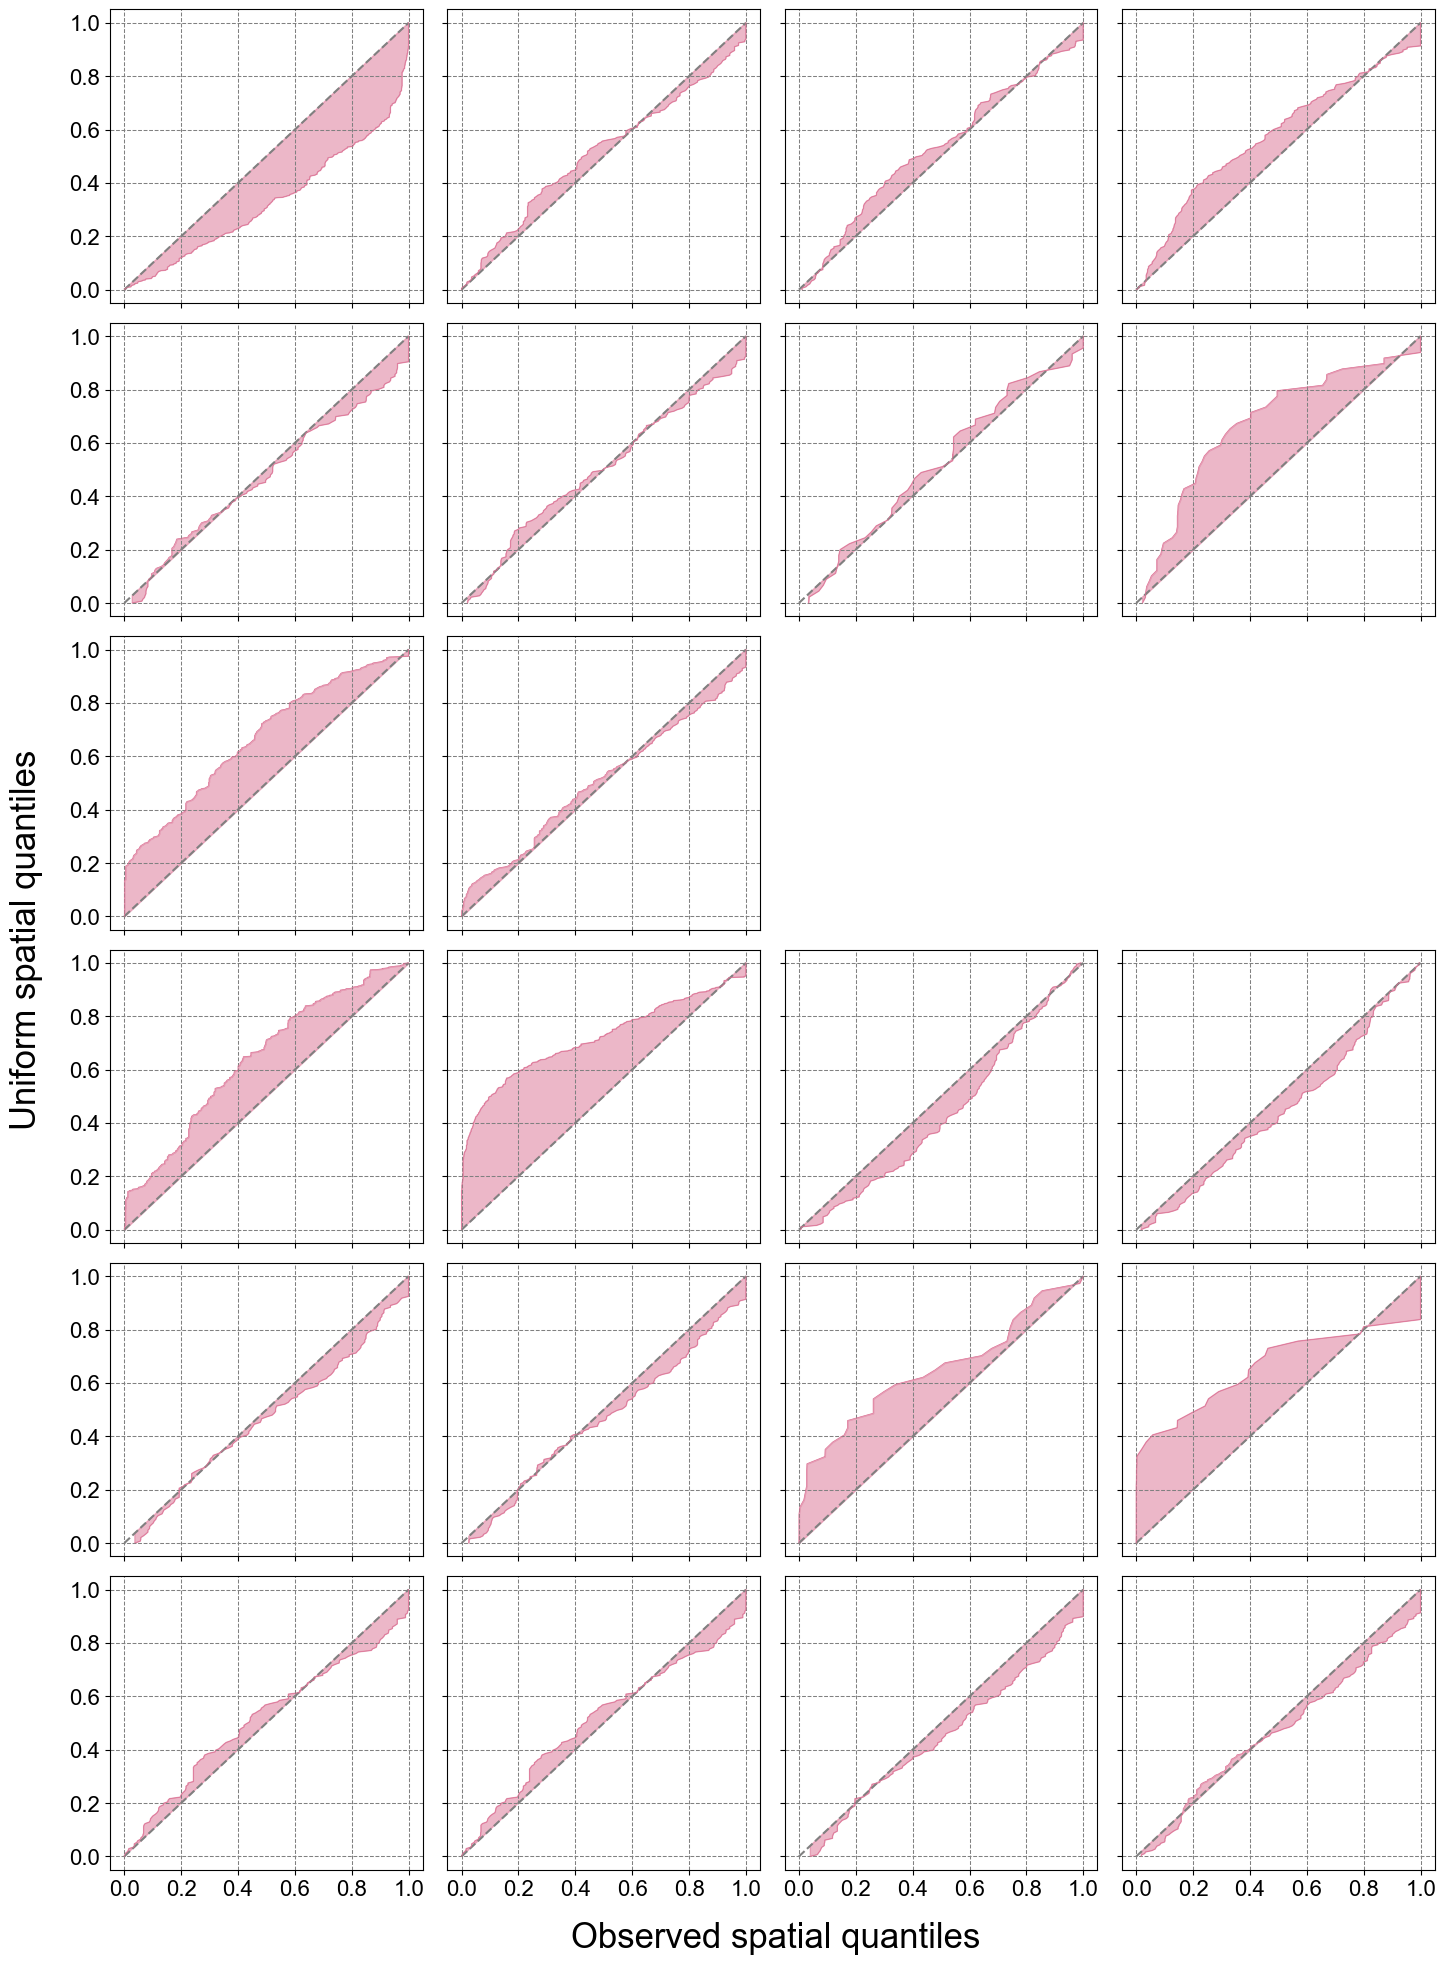

In [170]:
fig = plt.figure(figsize=(14, 19.2))

active_days = ['', ETAS_actidates, ETASv1_actidates, ETAS_DROneDayMd2_actidates, ETAS_DROneDayMd3_actidates,
               ETAS_HWMd2_actidates, ETAS_HWMd3_actidates, ETAS_DROneDayMd295_actidates, ETASSYN_DROneDayMd295_actidates,
               STEP_actidates, STEPJAVA_actidates, '', '',
               HKJ_actidates, KJSSOneDayCalifornia_actidates, ETAS_DROneDayPPEMd2_actidates, ETAS_DROneDayPPEMd3_actidates,
               K3Md2_actidates, K3Md3_actidates, GSF_ISO_actidates, GSF_ANISO_actidates,
               OneDayBayesianBMA_actidates, OneDayBayesianSeqBMA_actidates, ETAS_HW_K3_AVERAGE_Md2_actidates, ETAS_HW_K3_AVERAGE_Md3_actidates]

uniform_pdfs = ['', ETAS_uniform, ETASv1_uniform, ETAS_DROneDayMd2_uniform, ETAS_DROneDayMd3_uniform,
               ETAS_HWMd2_uniform, ETAS_HWMd3_uniform, ETAS_DROneDayMd295_uniform, ETASSYN_DROneDayMd295_uniform,
               STEP_uniform, STEPJAVA_uniform, '', '',
               HKJ_uniform, KJSSOneDayCalifornia_uniform, ETAS_DROneDayPPEMd2_uniform, ETAS_DROneDayPPEMd3_uniform,
               K3Md2_uniform, K3Md3_uniform, GSF_ISO_uniform, GSF_ANISO_uniform,
               OneDayBayesianBMA_uniform, OneDayBayesianSeqBMA_uniform, ETAS_HW_K3_AVERAGE_Md2_uniform, ETAS_HW_K3_AVERAGE_Md3_uniform]

model_areas = [ETAS_area, ETASv1_area, ETAS_DROneDayMd2_area, ETAS_DROneDayMd3_area, \
               ETAS_HWMd2_area, ETAS_HWMd3_area, ETAS_DROneDayMd295_area, ETASSYN_DROneDayMd295_area, \
               STEP_area, STEPJAVA_area, \
               HKJ_area, KJSSOneDayCalifornia_area, ETAS_DROneDayPPEMd2_area, ETAS_DROneDayPPEMd3_area, \
               K3Md2_area, K3Md3_area, GSF_ISO_area, GSF_ANISO_area, \
               OneDayBayesianBMA_area, OneDayBayesianSeqBMA_area, ETAS_HW_K3_AVERAGE_Md2_area, ETAS_HW_K3_AVERAGE_Md3_area]

lb = ['', False, False, False, False,
      False, False, False, False, 
      False, False, '', '',
      False, False, False, False,
      False, False, False, False,
      True, True, True, True]

lf = ['', True, False, False, False,
      True, False, False, False, 
      True, False, '', '',
      True, False, False, False,
      True, False, False, False,
      True, False, False, False]

for i in range(1, len(active_days)):
    if type(active_days[i]) != str:
        ax = fig.add_subplot(6,4,i)
        plt.grid(which='both', linestyle='--', color='grey', zorder=0, linewidth=0.75)
        plt.plot((0, 1), (0, 1), '--', color='grey', linewidth = 1.5, zorder=2)
        plt.yticks(np.arange(0, 1.001, step=0.2), fontsize=16)
        plt.xticks(np.arange(0, 1.001, step=0.2), fontsize=16)
        plt.ylim(-0.05,1.05)
        plt.xlim(-0.05,1.05)
        plt.plot(np.sort(active_days[i].squantiles.values), uniform_pdfs[i], linewidth=0.5, color='palevioletred', zorder=2)
        plt.fill_between(np.sort(active_days[i].squantiles.values), uniform_pdfs[i], np.sort(active_days[i].squantiles.values), where=(uniform_pdfs[i] > np.sort(active_days[i].squantiles.values)), alpha=0.5, interpolate=True, color='palevioletred', zorder=1)
        plt.fill_between(np.sort(active_days[i].squantiles.values), uniform_pdfs[i], np.sort(active_days[i].squantiles.values), where=(uniform_pdfs[i] <= np.sort(active_days[i].squantiles.values)), alpha=0.5, interpolate=True, color='palevioletred', zorder=1)
        plt.tick_params(labelleft=lf[i] , labelbottom=lb[i])

fig.text(0.515, -0.012, 'Observed spatial quantiles', fontsize=25, ha='center', va='center')
fig.text(-0.02, 0.508, 'Uniform spatial quantiles', fontsize=25, ha='center', va='center', rotation='vertical')
fig.tight_layout()
plt.savefig('expected_outputs/Figure5.png', dpi=150, bbox_inches='tight')     

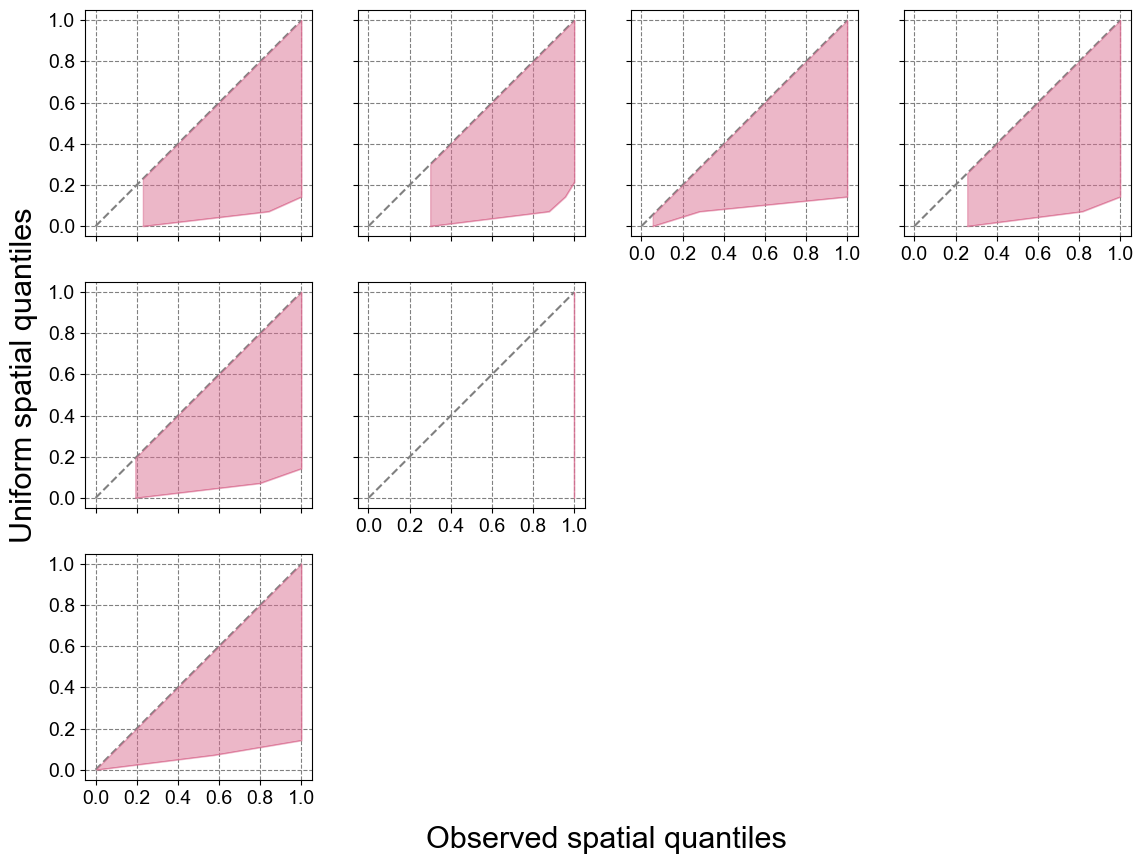

In [171]:
fig = plt.figure(figsize=(13.5, 10))

active_days5 = ['', HKJ5_actidates, KJSSFiveYearCalifornia_actidates, JANUSOneDayEEPAS1F_actidates, JANUSOneDayPPE_actidates,
                JANUSOneDay_actidates, SE2OneDay_actidates, '', '', 
                JANUSOneDayTV_actidates, '', '', '']

uniform_pdfs5 = ['', HKJ5_uniform, KJSSFiveYearCalifornia_uniform, JANUSOneDayEEPAS1F_uniform, JANUSOneDayPPE_uniform,
                JANUSOneDay_uniform, SE2OneDay_uniform, '', '', 
                JANUSOneDayTV_uniform, '', '', '']

model_areas5 = [HKJ5_area, KJSSFiveYearCalifornia_area, JANUSOneDayEEPAS1F_area, JANUSOneDayPPE_area,
                JANUSOneDay_area, SE2OneDay_area,
                JANUSOneDayTV_area]

lb5 = ['', False, False, True, True,
      False, True, '', '', 
      True, '', '', '']

lf5 = ['', True, False, False, False,
      True, False, False, False, 
      True, False, '', '']

for i in range(1, len(active_days5)):
    if type(active_days5[i]) != str:
        ax = fig.add_subplot(3,4,i)
        ax.set_aspect("equal")
        plt.grid(which='both', linestyle='--', color='grey', zorder=0)
        plt.plot((0, 1), (0, 1), '--', color='grey', linewidth = 1.5, zorder=2)
        plt.yticks(np.arange(0, 1.001, step=0.2), fontsize=14)
        plt.xticks(np.arange(0, 1.001, step=0.2), fontsize=14)
        plt.ylim(-0.05,1.05)
        plt.xlim(-0.05,1.05)

        plt.plot(np.sort(active_days5[i].squantiles.values), uniform_pdfs5[i], linewidth=0.5, color='palevioletred', zorder=2)
        plt.fill_between(np.sort(active_days5[i].squantiles.values), uniform_pdfs5[i], np.sort(active_days5[i].squantiles.values), where=(uniform_pdfs5[i] > np.sort(active_days5[i].squantiles.values)), alpha=0.5, interpolate=True, color='palevioletred', zorder=2)
        plt.fill_between(np.sort(active_days5[i].squantiles.values), uniform_pdfs5[i], np.sort(active_days5[i].squantiles.values), where=(uniform_pdfs5[i] > np.sort(active_days5[i].squantiles.values)), alpha=0.5, interpolate=True, color='palevioletred', zorder=2)
        plt.fill_between(np.sort(active_days5[i].squantiles.values), uniform_pdfs5[i], np.sort(active_days5[i].squantiles.values), where=(uniform_pdfs5[i] <= np.sort(active_days5[i].squantiles.values)), alpha=0.5, interpolate=True, color='palevioletred', zorder=2)
        plt.tick_params(labelleft=lf5[i] , labelbottom=lb5[i])

fig.text(0.5115, 0.05, 'Observed spatial quantiles', fontsize=22, ha='center', va='center')
fig.text(0.08, 0.515, 'Uniform spatial quantiles', fontsize=22, ha='center', va='center', rotation='vertical')
plt.savefig('expected_outputs/FigureS5.png', dpi=150, bbox_inches='tight')     

### How did the models perform spatially during the first week of the 2010 Mw 7.2 El Mayor-Cucapah and 2014 Mw 6.8 Mendocino earthquake sequences?

In [172]:
def _simulate_catalog(num_events, sampling_weights, sim_fore, random_numbers=None):

    # generate uniformly distributed random numbers in [0,1), this
    if random_numbers is None:
        random_numbers = numpy.random.rand(num_events)
    else:
        # TODO: ensure that random numbers are all between 0 and 1.
        pass

    # reset simulation array to zero, but don't reallocate
    sim_fore.fill(0)

    # find insertion points using binary search inserting to satisfy a[i-1] <= v < a[i]
    pnts = numpy.searchsorted(sampling_weights, random_numbers, side='right')

    # create simulated catalog by adding to the original locations
    numpy.add.at(sim_fore, pnts, 1)
    assert sim_fore.sum() == num_events, "simulated the wrong number of events!"

    return sim_fore

In [173]:
def binomial_joint_log_likelihood_ndarray(forecast, catalog):
    """
    Computes Bernoulli log-likelihood scores, assuming that earthquakes follow a binomial distribution.
    
    Args:
        forecast:   Forecast of a Model (Gridded) (Numpy Array)
                    A forecast has to be in terms of Average Number of Events in Each Bin
                    It can be anything greater than zero
        catalog:    Observed (Gridded) seismicity (Numpy Array):
                    An Observation has to be Number of Events in Each Bin
                    It has to be a either zero or positive integer only (No Floating Point)
    """
    #First, we mask the forecast in cells where we could find log=0.0 singularities:
    forecast_masked = np.ma.masked_where(forecast.ravel() <= 0.0, forecast.ravel()) 
    
    #Then, we compute the log-likelihood of observing one or more events given a Poisson distribution, i.e., 1 - Pr(0) 
    target_idx = np.nonzero(catalog.ravel())
    y = np.zeros(forecast_masked.ravel().shape)
    y[target_idx[0]] = 1
    first_term = y * (np.log(1.0 - np.exp(-forecast_masked.ravel())))
    
    #Also, we estimate the log-likelihood in cells no events are observed:
    second_term = (1-y) * (-forecast_masked.ravel().data)
    #Finally, we sum both terms to compute the joint log-likelihood score:
    return sum(first_term.data + second_term.data)

In [174]:
def _binomial_likelihood_test(forecast_data, observed_data, num_simulations=10000, random_numbers=None, 
                              seed=None, use_observed_counts=True, verbose=True, normalize_likelihood=False):
    """
    Computes the likelihood-test from CSEP using an efficient simulation based approach.
    Args:
        forecast_data (numpy.ndarray): nd array where [:, -1] are the magnitude bins.
        observed_data (numpy.ndarray): same format as observation.
        num_simulations: default number of simulations to use for likelihood based simulations
        seed: used for reproducibility of the prng
        random_numbers (numpy.ndarray): can supply an explicit list of random numbers, primarily used for software testing
        use_observed_counts (bool): if true, will simulate catalogs using the observed events, if false will draw from poisson distrubtion
    """
    
    # Array-masking that avoids log singularities:
    forecast_data = numpy.ma.masked_where(forecast_data <= 0.0, forecast_data) 
    
    # set seed for the likelihood test
    if seed is not None:
        numpy.random.seed(seed)

    # used to determine where simulated earthquake should be placed, by definition of cumsum these are sorted
    sampling_weights = numpy.cumsum(forecast_data.data.ravel()) / numpy.sum(forecast_data.data)

    # data structures to store results
    sim_fore = numpy.zeros(sampling_weights.shape)
    simulated_ll = []
    n_obs = len(np.unique(np.nonzero(observed_data.ravel())))
    n_fore = numpy.sum(forecast_data.data)
    expected_forecast_count = int(n_obs) 
    
    if use_observed_counts and normalize_likelihood:
        scale = n_obs / n_fore
        expected_forecast_count = int(n_obs)
        forecast_data = scale * forecast_data

    # main simulation step in this loop
    for idx in range(num_simulations):
        if use_observed_counts:
            num_events_to_simulate = int(n_obs)
        else:
            num_events_to_simulate = int(numpy.random.poisson(expected_forecast_count))
    
        if random_numbers is None:
            sim_fore = _simulate_catalog(num_events_to_simulate, sampling_weights, sim_fore)
        else:
            sim_fore = _simulate_catalog(num_events_to_simulate, sampling_weights, sim_fore,
                                         random_numbers=random_numbers[idx,:])

    
        # compute joint log-likelihood
        current_ll = binomial_joint_log_likelihood_ndarray(forecast_data.data, sim_fore)
        
        # append to list of simulated log-likelihoods
        simulated_ll.append(current_ll)

        # just be verbose
        if verbose:
            if (idx + 1) % 100 == 0:
                print(f'... {idx + 1} catalogs simulated.')
                
                target_idx = numpy.nonzero(catalog.ravel())


    # observed joint log-likelihood
    obs_ll = binomial_joint_log_likelihood_ndarray(forecast_data.data, observed_data)
        
    # quantile score
    qs = numpy.sum(simulated_ll <= obs_ll) / num_simulations

    # float, float, list
    return qs, obs_ll, simulated_ll

In [175]:
def binary_spatial_test(gridded_forecast, observed_catalog, num_simulations=10000, seed=None, random_numbers=None, verbose=False):
    """
    Performs the binary spatial test on the Forecast using the Observed Catalogs.
    Note: The forecast and the observations should be scaled to the same time period before calling this function. This increases
    transparency as no assumptions are being made about the length of the forecasts. This is particularly important for
    gridded forecasts that supply their forecasts as rates.
    Args:
        gridded_forecast: csep.core.forecasts.GriddedForecast
        observed_catalog: csep.core.catalogs.Catalog
        num_simulations (int): number of simulations used to compute the quantile score
        seed (int): used fore reproducibility, and testing
        random_numbers (numpy.ndarray): random numbers used to override the random number generation. injection point for testing.
    Returns:
        evaluation_result: csep.core.evaluations.EvaluationResult
    """

    # grid catalog onto spatial grid
    gridded_catalog_data = observed_catalog#.spatial_counts()

    # simply call likelihood test on catalog data and forecast
    qs, obs_ll, simulated_ll = _binomial_likelihood_test(gridded_forecast, gridded_catalog_data,
                                                        num_simulations=num_simulations,
                                                        seed=seed,
                                                        random_numbers=random_numbers,
                                                        use_observed_counts=True,
                                                        verbose=verbose, normalize_likelihood=True)

    
# populate result data structure
    result = EvaluationResult()
    result.test_distribution = simulated_ll
    result.name = 'Binary S-Test'
    result.observed_statistic = obs_ll
    result.quantile = qs
    result.status = 'normal'
    try:
        result.min_mw = np.min(gridded_forecast.magnitudes)
    except AttributeError:
        result.min_mw = -1
    return result

In [176]:
start_epoch_Ferndale = csep.utils.time_utils.strptime_to_utc_epoch(str(datetime.datetime(2010, 1, 10, 0, 0)))
end_epoch_Ferndale = csep.utils.time_utils.strptime_to_utc_epoch(str(datetime.datetime(2010, 1, 16, 0, 0)))
filters_Ferndale = [f'origin_time >= {start_epoch_Ferndale}', f'origin_time <= {end_epoch_Ferndale}']
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
    catalogue_Ferndale = pickle.load(obj)
catalogue_Ferndale = catalogue_Ferndale.filter(filters_Ferndale).filter_spatial(region=csep.core.regions.california_relm_region(), update_stats=False, in_place=True)

In [177]:
Ferndale_az = csep.core.regions.generate_aftershock_region(catalogue_Ferndale.get_magnitudes()[0], 
                                                      catalogue_Ferndale.get_longitudes()[0], 
                                                      catalogue_Ferndale.get_latitudes()[0], num_radii=5)

In [178]:
start_epoch_EMC = csep.utils.time_utils.strptime_to_utc_epoch(str(datetime.datetime(2010, 4, 4, 0, 0)))
end_epoch_EMC = csep.utils.time_utils.strptime_to_utc_epoch(str(datetime.datetime(2010, 4, 10, 0, 0)))
filters_EMC = [f'origin_time >= {start_epoch_EMC}', f'origin_time <= {end_epoch_EMC}']
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
    catalogue_EMC = pickle.load(obj)
catalogue_EMC = catalogue_EMC.filter(filters_EMC).filter_spatial(region=csep.core.regions.california_relm_region(), update_stats=False, in_place=True)

In [179]:
EMC_az = csep.core.regions.generate_aftershock_region(catalogue_EMC.get_magnitudes()[0], 
                                                      catalogue_EMC.get_longitudes()[0], 
                                                      catalogue_EMC.get_latitudes()[0], num_radii=5)

In [180]:
start_epoch_Brawley = csep.utils.time_utils.strptime_to_utc_epoch(str(datetime.datetime(2012, 8, 26, 0, 0)))
end_epoch_Brawley = csep.utils.time_utils.strptime_to_utc_epoch(str(datetime.datetime(2012, 9, 1, 0, 0)))
filters_Brawley = [f'origin_time >= {start_epoch_Brawley}', f'origin_time <= {end_epoch_Brawley}']
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
    catalogue_Brawley = pickle.load(obj)
catalogue_Brawley = catalogue_Brawley.filter(filters_Brawley).filter_spatial(region=csep.core.regions.california_relm_region(), update_stats=False, in_place=True)

In [181]:
Brawley_az = csep.core.regions.generate_aftershock_region(catalogue_Brawley.get_magnitudes()[5], 
                                                          catalogue_Brawley.get_longitudes()[5], 
                                                          catalogue_Brawley.get_latitudes()[5], num_radii=5)

In [182]:
start_epoch_Mendocino = csep.utils.time_utils.strptime_to_utc_epoch(str(datetime.datetime(2014, 3, 10, 0, 0)))
end_epoch_Mendocino = csep.utils.time_utils.strptime_to_utc_epoch(str(datetime.datetime(2014, 3, 16, 0, 0)))
filters_Mendocino = [f'origin_time >= {start_epoch_Mendocino}', f'origin_time <= {end_epoch_Mendocino}']
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
    catalogue_Mendocino = pickle.load(obj)
catalogue_Mendocino = catalogue_Mendocino.filter(filters_Mendocino).filter_spatial(region=csep.core.regions.california_relm_region(), update_stats=False, in_place=True)

In [183]:
Mendocino_az = csep.core.regions.generate_aftershock_region(catalogue_Mendocino.get_magnitudes()[0], 
                                                            catalogue_Mendocino.get_longitudes()[0], 
                                                            catalogue_Mendocino.get_latitudes()[0], num_radii=5)

In [184]:
CSEP_Cal = pd.DataFrame() # CSEP California test region
CSEP_Cal['longitude'] = ETAS_example.longitudes.values
CSEP_Cal['latitude'] = ETAS_example.latitudes.values
CSEP_Cal['id'] = np.arange(len(ETAS_example.longitudes.values))

In [185]:
CSEP_stepjava = pd.DataFrame() # STEPJAVA California test region
CSEP_stepjava['longitude'] = STEPJAVA_example.longitudes.values
CSEP_stepjava['latitude'] = STEPJAVA_example.latitudes.values
CSEP_stepjava['id'] = np.arange(len(STEPJAVA_example.longitudes.values))

In [186]:
Ferndale_c = pd.DataFrame() # Ferndale aftershock zone
Ferndale_c['longitude'] = np.round(Ferndale_az.origins()[:,0],2)
Ferndale_c['latitude'] = np.round(Ferndale_az.origins()[:,1],2)

In [187]:
EMC_c = pd.DataFrame() # El Mayor-Cucapah aftershock zone
EMC_c['longitude'] = np.round(EMC_az.origins()[:,0],2)
EMC_c['latitude'] = np.round(EMC_az.origins()[:,1],2)

In [188]:
Brawley_c = pd.DataFrame() # El Mayor-Cucapah aftershock zone
Brawley_c['longitude'] = np.round(Brawley_az.origins()[:,0],2)
Brawley_c['latitude'] = np.round(Brawley_az.origins()[:,1],2)

In [189]:
Mendocino_c = pd.DataFrame() # Mendocino aftershock zone
Mendocino_c['longitude'] = np.round(Mendocino_az.origins()[:,0],2)
Mendocino_c['latitude'] = np.round(Mendocino_az.origins()[:,1],2)

In [190]:
Ferndale_id = pd.merge(CSEP_Cal, Ferndale_c, how="inner", on=['longitude', 'latitude'])
EMC_id = pd.merge(CSEP_Cal, EMC_c, how="inner", on=['longitude', 'latitude'])
Brawley_id = pd.merge(CSEP_Cal, Brawley_c, how="inner", on=['longitude', 'latitude'])
Brawley_idj = pd.merge(CSEP_stepjava, Brawley_c, how="inner", on=['longitude', 'latitude'])
Mendocino_id = pd.merge(CSEP_Cal, Mendocino_c, how="inner", on=['longitude', 'latitude'])
Mendocino_idj = pd.merge(CSEP_stepjava, Mendocino_c, how="inner", on=['longitude', 'latitude'])

In [191]:
ETAS_Ferndale = np.loadtxt("preprocessed_inputs/ETAS/ETAS_Ferndale.dat")

STEP_Ferndale = np.loadtxt("preprocessed_inputs/STEP/STEP_Ferndale.dat")

KJSSOneDayCalifornia_Ferndale = np.loadtxt("preprocessed_inputs/KJSSOneDayCalifornia/KJSSOneDayCalifornia_Ferndale.dat")

In [192]:
ETAS_EMC = np.loadtxt("preprocessed_inputs/ETAS/ETAS_EMC.dat")

STEP_EMC = np.loadtxt("preprocessed_inputs/STEP/STEP_EMC.dat")

KJSSOneDayCalifornia_EMC = np.loadtxt("preprocessed_inputs/KJSSOneDayCalifornia/KJSSOneDayCalifornia_EMC.dat")

In [193]:
ETAS_Brawley = np.loadtxt("preprocessed_inputs/ETAS/ETAS_Brawley.dat")
ETASv1_Brawley = np.loadtxt("preprocessed_inputs/ETASv1/ETASv1_Brawley.dat")

STEP_Brawley = np.loadtxt("preprocessed_inputs/STEP/STEP_Brawley.dat")
STEPJAVA_Brawley = np.loadtxt("preprocessed_inputs/STEPJAVA/STEPJAVA_Brawley.dat")

KJSSOneDayCalifornia_Brawley = np.loadtxt("preprocessed_inputs/KJSSOneDayCalifornia/KJSSOneDayCalifornia_Brawley.dat")

OneDayBayesianBMA_Brawley = np.loadtxt("preprocessed_inputs/OneDayBayesianBMA/OneDayBayesianBMA_Brawley.dat")
OneDayBayesianSeqBMA_Brawley = np.loadtxt("preprocessed_inputs/OneDayBayesianSeqBMA/OneDayBayesianSeqBMA_Brawley.dat")

In [194]:
ETAS_Mendocino = np.loadtxt("preprocessed_inputs/ETAS/ETAS_Mendocino.dat")
ETASv1_Mendocino = np.loadtxt("preprocessed_inputs/ETASv1/ETASv1_Mendocino.dat")
ETAS_DROneDayMd2_Mendocino = np.loadtxt("preprocessed_inputs/ETAS_DROneDayMd2/ETAS_DROneDayMd2_Mendocino.dat")
ETAS_DROneDayMd3_Mendocino = np.loadtxt("preprocessed_inputs/ETAS_DROneDayMd3/ETAS_DROneDayMd3_Mendocino.dat")
ETAS_HWMd2_Mendocino = np.loadtxt("preprocessed_inputs/ETAS_HWMd2/ETAS_HWMd2_Mendocino.dat")
ETAS_HWMd3_Mendocino = np.loadtxt("preprocessed_inputs/ETAS_HWMd3/ETAS_HWMd3_Mendocino.dat")

STEPJAVA_Mendocino = np.loadtxt("preprocessed_inputs/STEPJAVA/STEPJAVA_Mendocino.dat")

KJSSOneDayCalifornia_Mendocino = np.loadtxt("preprocessed_inputs/KJSSOneDayCalifornia/KJSSOneDayCalifornia_Mendocino.dat")
ETAS_DROneDayPPEMd2_Mendocino = np.loadtxt("preprocessed_inputs/ETAS_DROneDayPPEMd2/ETAS_DROneDayPPEMd2_Mendocino.dat")
ETAS_DROneDayPPEMd3_Mendocino = np.loadtxt("preprocessed_inputs/ETAS_DROneDayPPEMd3/ETAS_DROneDayPPEMd3_Mendocino.dat")

K3Md2_Mendocino = np.loadtxt("preprocessed_inputs/K3Md2/K3Md2_Mendocino.dat")
K3Md3_Mendocino = np.loadtxt("preprocessed_inputs/K3Md3/K3Md3_Mendocino.dat")

OneDayBayesianBMA_Mendocino = np.loadtxt("preprocessed_inputs/OneDayBayesianBMA/OneDayBayesianBMA_Mendocino.dat")
OneDayBayesianSeqBMA_Mendocino = np.loadtxt("preprocessed_inputs/OneDayBayesianSeqBMA/OneDayBayesianSeqBMA_Mendocino.dat")
ETAS_HW_K3_AVERAGE_Md2_Mendocino = np.loadtxt("preprocessed_inputs/ETAS_HW_K3_AVERAGE_Md2/ETAS_HW_K3_AVERAGE_Md2_Mendocino.dat")
ETAS_HW_K3_AVERAGE_Md3_Mendocino = np.loadtxt("preprocessed_inputs/ETAS_HW_K3_AVERAGE_Md3/ETAS_HW_K3_AVERAGE_Md3_Mendocino.dat")

In [195]:
# 2010 Mw 6.5 Ferndale earthquake sequence
bstest_ETAS_Ferndale = binary_spatial_test(ETAS_Ferndale[Ferndale_id.id.values], catalogue_Ferndale.spatial_counts()[Ferndale_id.id.values], seed=seed)

bstest_STEP_Ferndale = binary_spatial_test(STEP_Ferndale[Ferndale_id.id.values], catalogue_Ferndale.spatial_counts()[Ferndale_id.id.values], seed=seed)

bstest_HKJ_Ferndale = binary_spatial_test((HKJ4_example.spatial_counts.values * 7.0)[Ferndale_id.id.values], catalogue_Ferndale.spatial_counts()[Ferndale_id.id.values], seed=seed)
bstest_KJSSOneDayCalifornia_Ferndale = binary_spatial_test(KJSSOneDayCalifornia_Ferndale[Ferndale_id.id.values], catalogue_Ferndale.spatial_counts()[Ferndale_id.id.values], seed=seed)

In [196]:
# 2012 Mw 7.2 El Mayor-Cucapah earthquake sequence
bstest_ETAS_EMC = binary_spatial_test(ETAS_EMC[EMC_id.id.values], catalogue_EMC.spatial_counts()[EMC_id.id.values], seed=seed)

bstest_STEP_EMC = binary_spatial_test(STEP_EMC[EMC_id.id.values], catalogue_EMC.spatial_counts()[EMC_id.id.values], seed=seed)

bstest_HKJ_EMC = binary_spatial_test((HKJ4_example.spatial_counts.values * 7.0)[EMC_id.id.values], catalogue_EMC.spatial_counts()[EMC_id.id.values], seed=seed)
bstest_KJSSOneDayCalifornia_EMC = binary_spatial_test(KJSSOneDayCalifornia_EMC[EMC_id.id.values], catalogue_EMC.spatial_counts()[EMC_id.id.values], seed=seed)

In [197]:
# 2012 Mw 3.95+ Brawley seismic swarm
bstest_ETAS_Brawley = binary_spatial_test(ETAS_Brawley[Brawley_id.id.values], catalogue_Brawley.spatial_counts()[Brawley_id.id.values], seed=seed)
bstest_ETASv1_Brawley = binary_spatial_test(ETASv1_Brawley[Brawley_id.id.values], catalogue_Brawley.spatial_counts()[Brawley_id.id.values], seed=seed)

bstest_STEP_Brawley = binary_spatial_test(STEP_Brawley[Brawley_id.id.values], catalogue_Brawley.spatial_counts()[Brawley_id.id.values], seed=seed)
bstest_STEPJAVA_Brawley = binary_spatial_test(STEPJAVA_Brawley[Brawley_idj.id.values], catalogue_Brawley.spatial_counts()[Brawley_idj.id.values], seed=seed)

bstest_HKJ_Brawley = binary_spatial_test((HKJ4_example.spatial_counts.values * 7.0)[Brawley_id.id.values], catalogue_Brawley.spatial_counts()[Brawley_id.id.values], seed=seed)
bstest_KJSSOneDayCalifornia_Brawley = binary_spatial_test(KJSSOneDayCalifornia_Brawley[Brawley_id.id.values], catalogue_Brawley.spatial_counts()[Brawley_id.id.values], seed=seed)

bstest_OneDayBayesianBMA_Brawley = binary_spatial_test(OneDayBayesianBMA_Brawley[Brawley_id.id.values], catalogue_Brawley.spatial_counts()[Brawley_id.id.values], seed=seed)
bstest_OneDayBayesianSeqBMA_Brawley = binary_spatial_test(OneDayBayesianSeqBMA_Brawley[Brawley_id.id.values], catalogue_Brawley.spatial_counts()[Brawley_id.id.values], seed=seed)

In [198]:
# 2014 Mw 6.8 Mendocino earthquake sequence
bstest_ETAS_Mendocino = binary_spatial_test(ETAS_Mendocino[Mendocino_id.id.values], catalogue_Mendocino.spatial_counts()[Mendocino_id.id.values], seed=seed)
bstest_ETASv1_Mendocino = binary_spatial_test(ETASv1_Mendocino[Mendocino_id.id.values], catalogue_Mendocino.spatial_counts()[Mendocino_id.id.values], seed=seed)
bstest_ETAS_DROneDayMd2_Mendocino = binary_spatial_test(ETAS_DROneDayMd2_Mendocino[Mendocino_id.id.values], catalogue_Mendocino.spatial_counts()[Mendocino_id.id.values], seed=seed)
bstest_ETAS_DROneDayMd3_Mendocino = binary_spatial_test(ETAS_DROneDayMd3_Mendocino[Mendocino_id.id.values], catalogue_Mendocino.spatial_counts()[Mendocino_id.id.values], seed=seed)
bstest_ETAS_HWMd2_Mendocino = binary_spatial_test(ETAS_HWMd2_Mendocino[Mendocino_id.id.values], catalogue_Mendocino.spatial_counts()[Mendocino_id.id.values], seed=seed)
bstest_ETAS_HWMd3_Mendocino = binary_spatial_test(ETAS_HWMd3_Mendocino[Mendocino_id.id.values], catalogue_Mendocino.spatial_counts()[Mendocino_id.id.values], seed=seed)

bstest_HKJ_Mendocino = binary_spatial_test((HKJ4_example.spatial_counts.values * 7.0)[Mendocino_id.id.values], catalogue_Mendocino.spatial_counts()[Mendocino_id.id.values], seed=seed)
bstest_KJSSOneDayCalifornia_Mendocino = binary_spatial_test(KJSSOneDayCalifornia_Mendocino[Mendocino_id.id.values], catalogue_Mendocino.spatial_counts()[Mendocino_id.id.values], seed=seed)
bstest_ETAS_DROneDayPPEMd2_Mendocino = binary_spatial_test(ETAS_DROneDayPPEMd2_Mendocino[Mendocino_id.id.values], catalogue_Mendocino.spatial_counts()[Mendocino_id.id.values], seed=seed)
bstest_ETAS_DROneDayPPEMd3_Mendocino = binary_spatial_test(ETAS_DROneDayPPEMd3_Mendocino[Mendocino_id.id.values], catalogue_Mendocino.spatial_counts()[Mendocino_id.id.values], seed=seed)

bstest_K3Md2_Mendocino = binary_spatial_test(K3Md2_Mendocino[Mendocino_id.id.values], catalogue_Mendocino.spatial_counts()[Mendocino_id.id.values], seed=seed)
bstest_K3Md3_Mendocino = binary_spatial_test(K3Md3_Mendocino[Mendocino_id.id.values], catalogue_Mendocino.spatial_counts()[Mendocino_id.id.values], seed=seed)

bstest_OneDayBayesianBMA_Mendocino = binary_spatial_test(OneDayBayesianBMA_Mendocino[Mendocino_id.id.values], catalogue_Mendocino.spatial_counts()[Mendocino_id.id.values], seed=seed)
bstest_OneDayBayesianSeqBMA_Mendocino = binary_spatial_test(OneDayBayesianSeqBMA_Mendocino[Mendocino_id.id.values], catalogue_Mendocino.spatial_counts()[Mendocino_id.id.values], seed=seed)
bstest_ETAS_HW_K3_AVERAGE_Md2_Mendocino = binary_spatial_test(ETAS_HW_K3_AVERAGE_Md2_Mendocino[Mendocino_id.id.values], catalogue_Mendocino.spatial_counts()[Mendocino_id.id.values], seed=seed)
bstest_ETAS_HW_K3_AVERAGE_Md3_Mendocino = binary_spatial_test(ETAS_HW_K3_AVERAGE_Md3_Mendocino[Mendocino_id.id.values], catalogue_Mendocino.spatial_counts()[Mendocino_id.id.values], seed=seed)

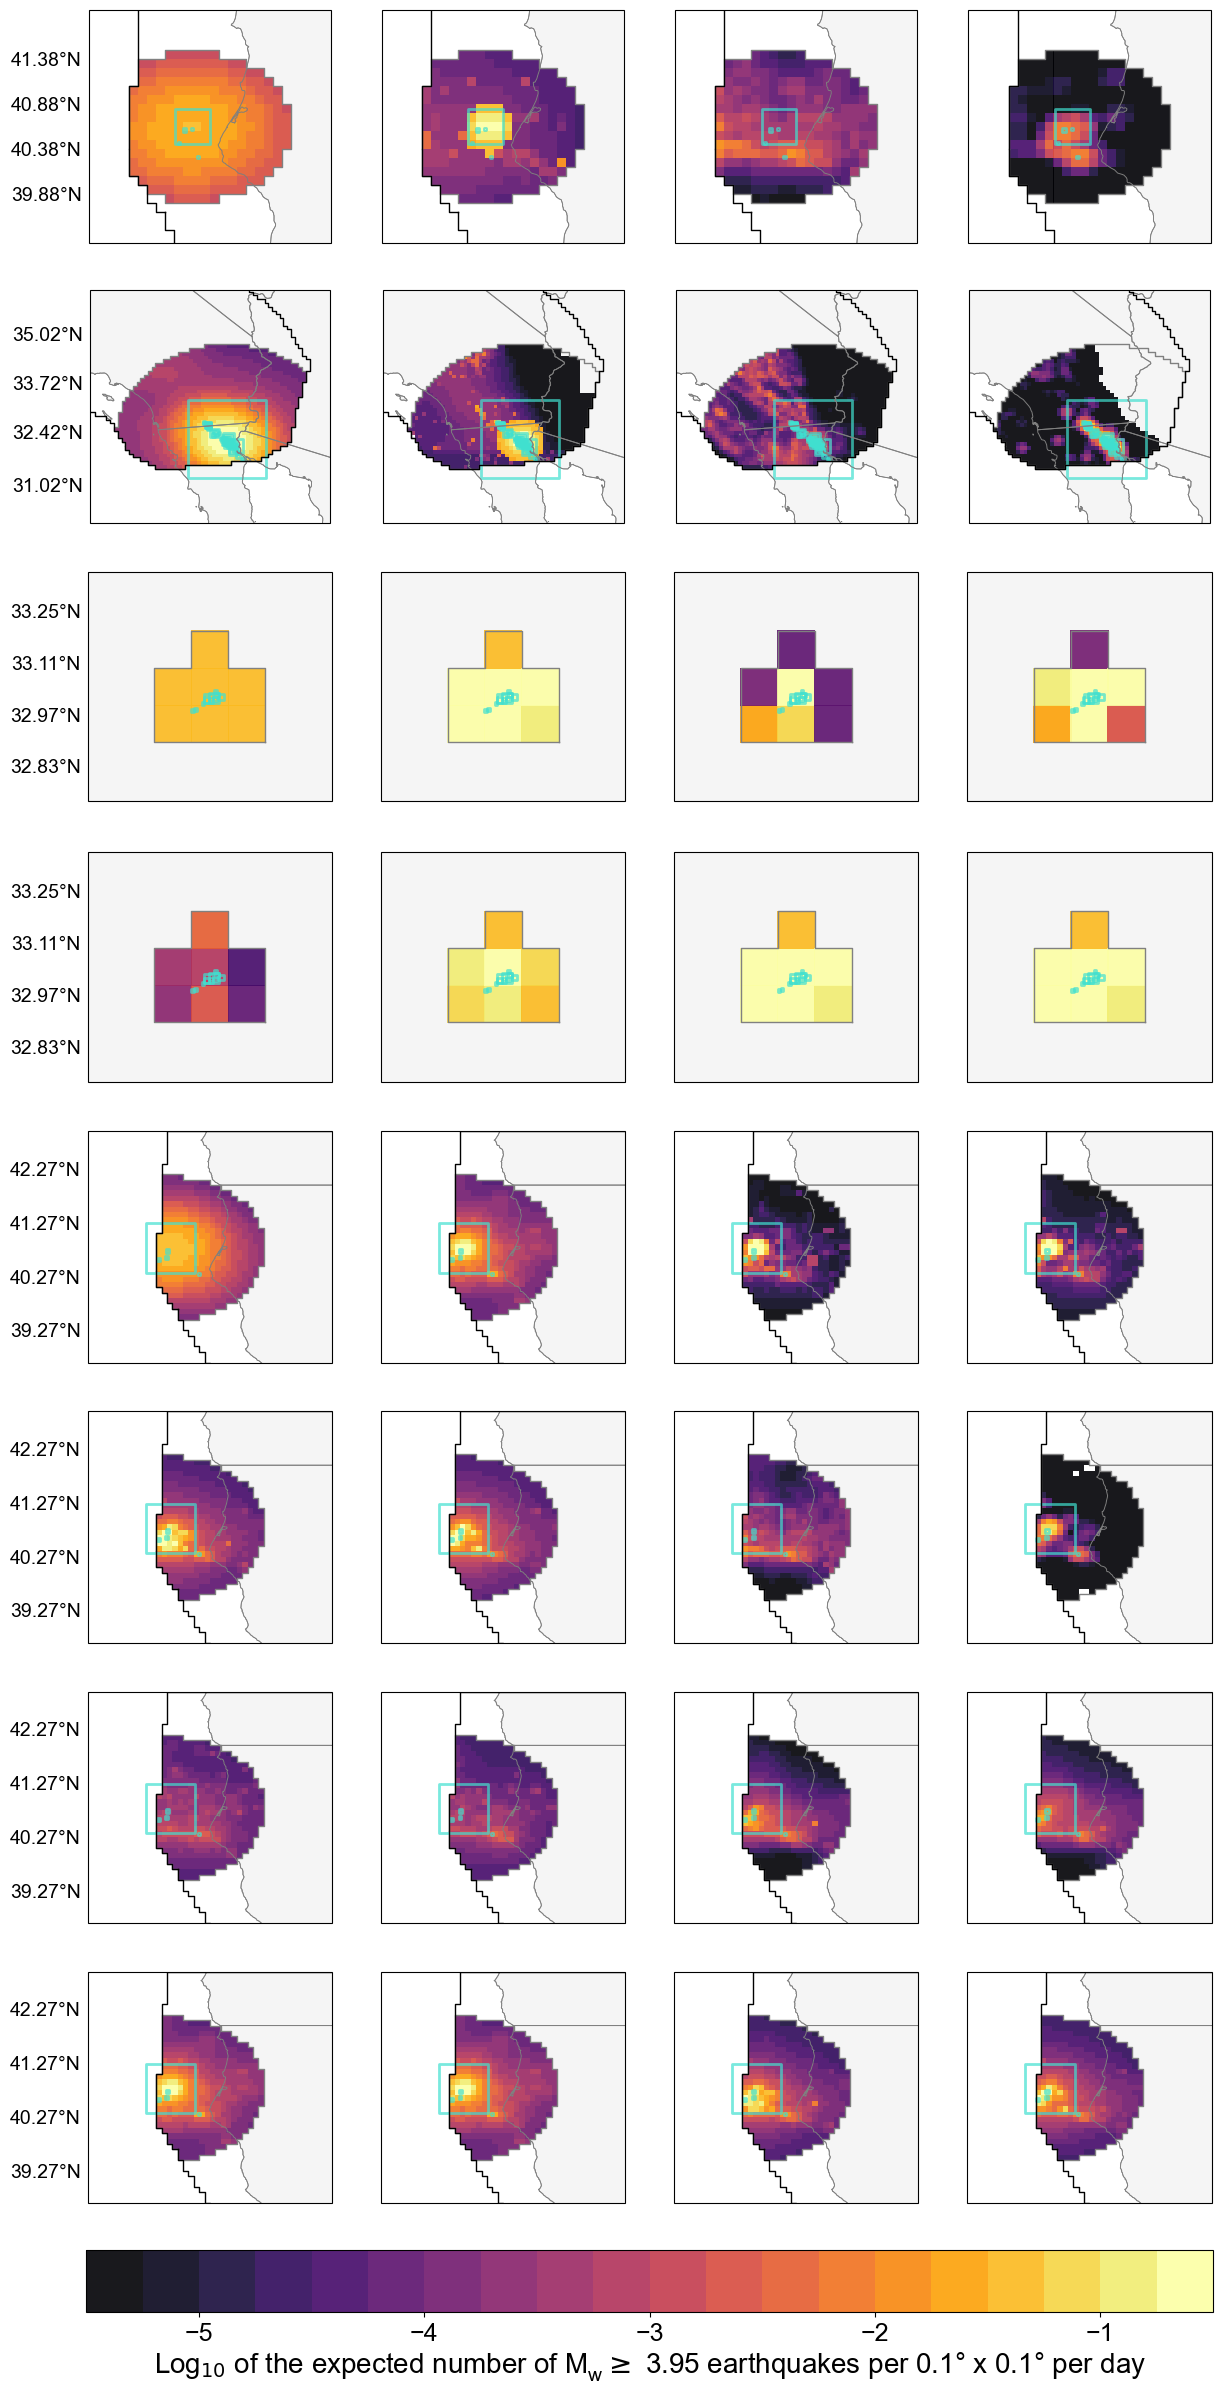

In [199]:
fig = plt.figure(figsize=(14.5,28.5))

forecasts = ['', list(ETAS_Ferndale[Ferndale_id.id.values]), list(STEP_Ferndale[Ferndale_id.id.values]), 
             list((HKJ4_example.spatial_counts.values * 7.0)[Ferndale_id.id.values]), list(KJSSOneDayCalifornia_Ferndale[Ferndale_id.id.values]),
             list(ETAS_EMC[EMC_id.id.values]), list(STEP_EMC[EMC_id.id.values]),
             list((HKJ4_example.spatial_counts.values * 7.0)[EMC_id.id.values]), list(KJSSOneDayCalifornia_EMC[EMC_id.id.values]),
             list(ETAS_Brawley[Brawley_id.id.values]), list(ETASv1_Brawley[Brawley_id.id.values]),
             list(STEP_Brawley[Brawley_id.id.values]), list(STEPJAVA_Brawley[Brawley_idj.id.values]),
             list((HKJ4_example.spatial_counts.values * 7.0)[Brawley_id.id.values]), list(KJSSOneDayCalifornia_Brawley[Brawley_id.id.values]),
             list(OneDayBayesianBMA_Brawley[Brawley_id.id.values]), list(OneDayBayesianSeqBMA_Brawley[Brawley_id.id.values]),
             list(ETAS_Mendocino[Mendocino_id.id.values]), list(ETASv1_Mendocino[Mendocino_id.id.values]),
             list(ETAS_DROneDayMd2_Mendocino[Mendocino_id.id.values]), list(ETAS_DROneDayMd3_Mendocino[Mendocino_id.id.values]),
             list(ETAS_HWMd2_Mendocino[Mendocino_id.id.values]), list(ETAS_HWMd3_Mendocino[Mendocino_id.id.values]),
             list((HKJ4_example.spatial_counts.values * 7.0)[Mendocino_id.id.values]), list(KJSSOneDayCalifornia_Mendocino[Mendocino_id.id.values]),
             list(ETAS_DROneDayPPEMd2_Mendocino[Mendocino_id.id.values]), list(ETAS_DROneDayPPEMd3_Mendocino[Mendocino_id.id.values]),
             list(K3Md2_Mendocino[Mendocino_id.id.values]), list(K3Md3_Mendocino[Mendocino_id.id.values]),
             list(OneDayBayesianBMA_Mendocino[Mendocino_id.id.values]), list(OneDayBayesianSeqBMA_Mendocino[Mendocino_id.id.values]),
             list(ETAS_HW_K3_AVERAGE_Md2_Mendocino[Mendocino_id.id.values]), list(ETAS_HW_K3_AVERAGE_Md3_Mendocino[Mendocino_id.id.values])]
             
catalogues = ['', catalogue_Ferndale, catalogue_Ferndale, catalogue_Ferndale, catalogue_Ferndale,
              catalogue_EMC, catalogue_EMC, catalogue_EMC, catalogue_EMC,
              catalogue_Brawley, catalogue_Brawley, catalogue_Brawley, catalogue_Brawley,
              catalogue_Brawley, catalogue_Brawley, catalogue_Brawley, catalogue_Brawley,
              catalogue_Mendocino, catalogue_Mendocino, catalogue_Mendocino, catalogue_Mendocino,
              catalogue_Mendocino, catalogue_Mendocino, catalogue_Mendocino, catalogue_Mendocino,
              catalogue_Mendocino, catalogue_Mendocino, catalogue_Mendocino, catalogue_Mendocino,
              catalogue_Mendocino, catalogue_Mendocino, catalogue_Mendocino, catalogue_Mendocino]

ids = ['', Ferndale_id.id.values, Ferndale_id.id.values, Ferndale_id.id.values, Ferndale_id.id.values,
       EMC_id.id.values, EMC_id.id.values, EMC_id.id.values, EMC_id.id.values,
       Brawley_id.id.values, Brawley_id.id.values, Brawley_id.id.values, Brawley_id.id.values,
       Brawley_id.id.values, Brawley_id.id.values, Brawley_id.id.values, Brawley_id.id.values,
       Mendocino_id.id.values, Mendocino_id.id.values, Mendocino_id.id.values, Mendocino_id.id.values,
       Mendocino_id.id.values, Mendocino_id.id.values, Mendocino_id.id.values, Mendocino_id.id.values,
       Mendocino_id.id.values, Mendocino_id.id.values, Mendocino_id.id.values, Mendocino_id.id.values,
       Mendocino_id.id.values, Mendocino_id.id.values, Mendocino_id.id.values, Mendocino_id.id.values]
   
aftershock_zones = ['', Ferndale_az, Ferndale_az, Ferndale_az, Ferndale_az,
                    EMC_az, EMC_az, EMC_az, EMC_az,
                    Brawley_az, Brawley_az, Brawley_az, Brawley_az,
                    Brawley_az, Brawley_az, Brawley_az, Brawley_az,
                    Mendocino_az, Mendocino_az, Mendocino_az, Mendocino_az,
                    Mendocino_az, Mendocino_az, Mendocino_az, Mendocino_az,
                    Mendocino_az, Mendocino_az, Mendocino_az, Mendocino_az,
                    Mendocino_az, Mendocino_az, Mendocino_az, Mendocino_az]

distx = ['', 0.5, 0.5, 0.5, 0.5,
        0.7, 0.7, 0.7, 0.7,
        0.23, 0.23, 0.23, 0.23,
        0.23, 0.23, 0.23, 0.23,
        1.32, 1.32, 1.32, 1.32, 
        1.32, 1.32, 1.32, 1.32, 
        1.32, 1.32, 1.32, 1.32,  
        1.32, 1.32, 1.32, 1.32]

disty = ['', 0.5, 0.5, 0.5, 0.5,
        1.501, 1.501, 1.501, 1.501,
        0.21, 0.21, 0.21, 0.21,
        0.21, 0.21, 0.21, 0.21,
        0.85, 0.85, 0.85, 0.85, 
        0.85, 0.85, 0.85, 0.85,  
        0.85, 0.85, 0.85, 0.85,  
        0.85, 0.85, 0.85, 0.85]

msize= ['', 42, 42, 42, 42,
        7.35, 7.35, 7.35, 7.35,
        760, 760, 760, 760,
        760, 760, 760, 760,
        15.01, 15.01, 15.01, 15.01,
        15.01, 15.01, 15.01, 15.01,
        15.01, 15.01, 15.01, 15.01,
        15.01, 15.01, 15.01, 15.01]

yloc = ['', [41.38, 40.88, 40.38, 39.88], [41.38, 40.88, 40.38, 39.88], [41.38, 40.88, 40.38, 39.88], [41.38, 40.88, 40.38, 39.88],
       [31.02, 32.42, 33.72, 35.02], [31.02, 32.42, 33.72, 35.02], [31.02, 32.42, 33.72, 35.02], [31.02, 32.42, 33.72, 35.02],
       [33.25, 33.11, 32.97, 32.83], [33.25, 33.11, 32.97, 32.83], [33.25, 33.11, 32.97, 32.83], [33.25, 33.11, 32.97, 32.83],
       [33.25, 33.11, 32.97, 32.83], [33.25, 33.11, 32.97, 32.83], [33.25, 33.11, 32.97, 32.83], [33.25, 33.11, 32.97, 32.83],
       [42.27, 41.27, 40.27, 39.27], [42.27, 41.27, 40.27, 39.27], [42.27, 41.27, 40.27, 39.27], [42.27, 41.27, 40.27, 39.27], 
       [42.27, 41.27, 40.27, 39.27], [42.27, 41.27, 40.27, 39.27], [42.27, 41.27, 40.27, 39.27], [42.27, 41.27, 40.27, 39.27], 
       [42.27, 41.27, 40.27, 39.27], [42.27, 41.27, 40.27, 39.27], [42.27, 41.27, 40.27, 39.27], [42.27, 41.27, 40.27, 39.27], 
       [42.27, 41.27, 40.27, 39.27], [42.27, 41.27, 40.27, 39.27], [42.27, 41.27, 40.27, 39.27], [42.27, 41.27, 40.27, 39.27]]

tick_left = ['', True, False, False, False,
             True, False, False, False,
             True, False, False, False,
             True, False, False, False,
             True, False, False, False,
             True, False, False, False,
             True, False, False, False,
             True, False, False, False]

for i in range(len(forecasts)):
    if forecasts[i] != '':
        ax = fig.add_subplot(8,4, i, projection=ccrs.PlateCarree(), aspect="auto")
        ax.add_feature(cartopy.feature.LAND, edgecolor='grey', facecolor='whitesmoke', linewidth=0.5, zorder=0)
        ax.add_feature(cartopy.feature.STATES, facecolor='None', edgecolor='grey', linewidth=0.7)
        #faults_USGS.plot(ax = ax, edgecolor="grey", zorder=2, linewidth=0.5, in_layout=True)
        ax.set_aspect('equal')
        
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='k', zorder=0, linestyle='--')
        gl.ylocator = mticker.FixedLocator(yloc[i])
        gl.yformatter = LATITUDE_FORMATTER
        gl.top_labels = False
        gl.bottom_labels = False
        gl.right_labels = False
        gl.left_labels = tick_left[i]
        gl.xlines = False
        gl.ylines = False
        gl.xlabel_style = {'size': 14}
        gl.ylabel_style = {'size': 14}

        scatter = ax.scatter(ETAS_example.longitudes.values[ids[i]] +dh/2, ETAS_example.latitudes.values[ids[i]] + dh/2,
                             c = np.log10(forecasts[i]), cmap= matplotlib.cm.get_cmap('inferno', 20), s=msize[i], marker='s', 
                             alpha =0.9, edgecolor="None", zorder=1, vmin=-5.5, vmax=-0.5)
            
        ax.set_ylim(min(ETAS_example.latitudes.values[ids[i]])- disty[i]+dh/2, max(ETAS_example.latitudes.values[ids[i]])+disty[i]+dh/2)
        ax.set_xlim(min(ETAS_example.longitudes.values[ids[i]])-distx[i]+dh/2, max(ETAS_example.longitudes.values[ids[i]])+distx[i]+dh/2)
        
        ax.plot(ptsC[:,0], ptsC[:,1], lw=1, color='k', transform=ccrs.PlateCarree(), zorder=2)
        ax.plot(aftershock_zones[i].tight_bbox()[:,0], aftershock_zones[i].tight_bbox()[:,1], lw=1, color='gray', transform=ccrs.PlateCarree(), zorder=1)
        ax.scatter(catalogues[i].get_longitudes(), catalogues[i].get_latitudes(), linewidth=2, marker='s', 
               edgecolor='turquoise', facecolor="none", s= (0.2*10**(catalogues[i].get_magnitudes()))/1000, alpha=0.7)

cax = fig.add_axes([0.124, 0.072, 0.777, 0.022]) #left #up #length # width
cbar = plt.colorbar(scatter, cax = cax, orientation="horizontal")  
cbar.set_label('Log$_{10}$ of the expected number of $\mathregular{M_w}\geq$ 3.95 earthquakes per ' f'{str(dh)}° x {str(dh)}° per day', fontsize=20)
cbar.ax.tick_params(labelsize=18)

plt.savefig('expected_outputs/Figure6.png', dpi=300, bbox_inches = 'tight')

### How good are the models at forecasting the magnitude distribution of observed earthquakes?

In [200]:
# Mw >= 3.95 earthquake forecasting models
ETAS_cummag = np.genfromtxt('preprocessed_inputs/ETAS/ETAS_magnitude_counts.dat', delimiter='\t')
ETASv1_cummag = np.genfromtxt('preprocessed_inputs/ETASv1/ETASv1_magnitude_counts.dat', delimiter='\t')
ETAS_DROneDayMd2_cummag = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayMd2/ETAS_DROneDayMd2_magnitude_counts.dat', delimiter='\t')
ETAS_DROneDayMd3_cummag = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayMd3/ETAS_DROneDayMd3_magnitude_counts.dat', delimiter='\t')
ETAS_HWMd2_cummag = np.genfromtxt('preprocessed_inputs/ETAS_HWMd2/ETAS_HWMd2_magnitude_counts.dat', delimiter='\t')
ETAS_HWMd3_cummag = np.genfromtxt('preprocessed_inputs/ETAS_HWMd3/ETAS_HWMd3_magnitude_counts.dat', delimiter='\t')
ETAS_DROneDayMd295_cummag = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayMd295/ETAS_DROneDayMd295_magnitude_counts.dat', delimiter='\t')
ETASSYN_DROneDayMd295_cummag = np.genfromtxt('preprocessed_inputs/ETASSYN_DROneDayMd295/ETASSYN_DROneDayMd295_magnitude_counts.dat', delimiter='\t')

STEP_cummag = np.genfromtxt('preprocessed_inputs/STEP/STEP_magnitude_counts.dat', delimiter='\t')
STEPJAVA_cummag = np.genfromtxt('preprocessed_inputs/STEPJAVA/STEPJAVA_magnitude_counts.dat', delimiter='\t')

HKJ_cummag = np.genfromtxt('preprocessed_inputs/HKJ/HKJ_magnitude_counts.dat', delimiter='\t')
KJSSOneDayCalifornia_cummag = np.genfromtxt('preprocessed_inputs/KJSSOneDayCalifornia/KJSSOneDayCalifornia_magnitude_counts.dat', delimiter='\t')
ETAS_DROneDayPPEMd2_cummag = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayPPEMd2/ETAS_DROneDayPPEMd2_magnitude_counts.dat', delimiter='\t')
ETAS_DROneDayPPEMd3_cummag = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayPPEMd3/ETAS_DROneDayPPEMd3_magnitude_counts.dat', delimiter='\t')

K3Md2_cummag = np.genfromtxt('preprocessed_inputs/K3Md2/K3Md2_magnitude_counts.dat', delimiter='\t')
K3Md3_cummag = np.genfromtxt('preprocessed_inputs/K3Md3/K3Md3_magnitude_counts.dat', delimiter='\t')
GSF_ISO_cummag = np.genfromtxt('preprocessed_inputs/GSF_ISO/GSF_ISO_magnitude_counts.dat', delimiter='\t')
GSF_ANISO_cummag = np.genfromtxt('preprocessed_inputs/GSF_ANISO/GSF_ANISO_magnitude_counts.dat', delimiter='\t')

OneDayBayesianBMA_cummag = np.genfromtxt('preprocessed_inputs/OneDayBayesianBMA/OneDayBayesianBMA_magnitude_counts.dat', delimiter='\t')
OneDayBayesianSeqBMA_cummag = np.genfromtxt('preprocessed_inputs/OneDayBayesianSeqBMA/OneDayBayesianSeqBMA_magnitude_counts.dat', delimiter='\t')
ETAS_HW_K3_AVERAGE_Md2_cummag = np.genfromtxt('preprocessed_inputs/ETAS_HW_K3_AVERAGE_Md2/ETAS_HW_K3_AVERAGE_Md2_magnitude_counts.dat', delimiter='\t')
ETAS_HW_K3_AVERAGE_Md3_cummag = np.genfromtxt('preprocessed_inputs/ETAS_HW_K3_AVERAGE_Md3/ETAS_HW_K3_AVERAGE_Md3_magnitude_counts.dat', delimiter='\t')

# Mw >= 4.95 earthquake forecasting models
HKJ5_cummag = np.genfromtxt('preprocessed_inputs/HKJ/HKJ5_magnitude_counts.dat', delimiter='\t')
KJSSFiveYearCalifornia_cummag = np.genfromtxt('preprocessed_inputs/KJSSFiveYearCalifornia/KJSSFiveYearCalifornia_magnitude_counts.dat', delimiter='\t')
JANUSOneDayEEPAS1F_cummag = np.genfromtxt('preprocessed_inputs/JANUSOneDayEEPAS1F/JANUSOneDayEEPAS1F_magnitude_counts.dat', delimiter='\t')
JANUSOneDayPPE_cummag = np.genfromtxt('preprocessed_inputs/JANUSOneDayPPE/JANUSOneDayPPE_magnitude_counts.dat', delimiter='\t')

JANUSOneDay_cummag = np.genfromtxt('preprocessed_inputs/JANUSOneDay/JANUSOneDay_magnitude_counts.dat', delimiter='\t')
SE2OneDay_cummag = np.genfromtxt('preprocessed_inputs/SE2OneDay/SE2OneDay_magnitude_counts.dat', delimiter='\t')

JANUSOneDayTV_cummag = np.genfromtxt('preprocessed_inputs/JANUSOneDayTV/JANUSOneDayTV_magnitude_counts.dat', delimiter='\t')

In [201]:
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)

In [202]:
# Mw >= 3.95 earthquake forecasting models
ETAS_cummag_nor = []
for i in range(len(ETAS_cummag)):
    ETAS_cummag_nor.append(ETAS_cummag[i] * (catalogue.event_count / sum(ETAS_ncounts)))

ETASv1_cummag_nor = []
for i in range(len(ETASv1_cummag)):
    ETASv1_cummag_nor.append(ETASv1_cummag[i] * (catalogue_ETASv1.event_count / sum(ETASv1_ncounts)))

ETAS_DROneDayMd2_cummag_nor = []
for i in range(len(ETAS_DROneDayMd2_cummag)):
    ETAS_DROneDayMd2_cummag_nor.append(ETAS_DROneDayMd2_cummag[i] * (catalogue_KJSSFiveYearCalifornia.event_count / sum(ETAS_DROneDayMd2_ncounts)))

ETAS_DROneDayMd3_cummag_nor = []
for i in range(len(ETAS_DROneDayMd3_cummag)):
    ETAS_DROneDayMd3_cummag_nor.append(ETAS_DROneDayMd3_cummag[i] * (catalogue_KJSSFiveYearCalifornia.event_count / sum(ETAS_DROneDayMd3_ncounts))) 

ETAS_HWMd2_cummag_nor = []
for i in range(len(ETAS_HWMd2_cummag)):
    ETAS_HWMd2_cummag_nor.append(ETAS_HWMd2_cummag[i] * (catalogue_ETAS_HWMd2.event_count / sum(ETAS_HWMd2_ncounts)))

ETAS_HWMd3_cummag_nor = []
for i in range(len(ETAS_HWMd3_cummag)):
    ETAS_HWMd3_cummag_nor.append(ETAS_HWMd3_cummag[i] * (catalogue_KJSSFiveYearCalifornia.event_count / sum(ETAS_HWMd3_ncounts))) 

ETAS_DROneDayMd295_cummag_nor = []
for i in range(len(ETAS_DROneDayMd295_cummag)):
    ETAS_DROneDayMd295_cummag_nor.append(ETAS_DROneDayMd295_cummag[i] * (catalogue_ETAS_DROneDayMd295.event_count / sum(ETAS_DROneDayMd295_ncounts)))

ETASSYN_DROneDayMd295_cummag_nor = []
for i in range(len(ETASSYN_DROneDayMd295_cummag)):
    ETASSYN_DROneDayMd295_cummag_nor.append(ETASSYN_DROneDayMd295_cummag[i] * (catalogue_ETAS_DROneDayMd295.event_count / sum(ETASSYN_DROneDayMd295_ncounts)))   

STEP_cummag_nor = []
for i in range(len(STEP_cummag)):
    STEP_cummag_nor.append(STEP_cummag[i] * (catalogue_STEP.event_count / sum(STEP_ncounts)))  

STEPJAVA_cummag_nor = []
for i in range(len(STEPJAVA_cummag)):
    STEPJAVA_cummag_nor.append(STEPJAVA_cummag[i] * (catalogue_STEPJAVA.event_count / sum(STEPJAVA_ncounts)))

HKJ_cummag_nor = []
for i in range(len(HKJ_cummag)):
    HKJ_cummag_nor.append(HKJ_cummag[i] * (catalogue.event_count / sum(HKJ4_ncounts)))   

KJSSOneDayCalifornia_cummag_nor = []
for i in range(len(KJSSOneDayCalifornia_cummag)):
    KJSSOneDayCalifornia_cummag_nor.append(KJSSOneDayCalifornia_cummag[i] * (catalogue_KJSSOneDayCalifornia.event_count / sum(KJSSOneDayCalifornia_ncounts)))

ETAS_DROneDayPPEMd2_cummag_nor = []
for i in range(len(ETAS_DROneDayPPEMd2_cummag)):
    ETAS_DROneDayPPEMd2_cummag_nor.append(ETAS_DROneDayPPEMd2_cummag[i] * (catalogue_KJSSFiveYearCalifornia.event_count / sum(ETAS_DROneDayPPEMd2_ncounts)))

ETAS_DROneDayPPEMd3_cummag_nor = []
for i in range(len(ETAS_DROneDayPPEMd3_cummag)):
    ETAS_DROneDayPPEMd3_cummag_nor.append(ETAS_DROneDayPPEMd3_cummag[i] * (catalogue_KJSSFiveYearCalifornia.event_count / sum(ETAS_DROneDayPPEMd3_ncounts)))   

K3Md2_cummag_nor = []
for i in range(len(K3Md2_cummag)):
    K3Md2_cummag_nor.append(K3Md2_cummag[i] * (catalogue_ETAS_HWMd2.event_count / sum(K3Md2_ncounts)))

K3Md3_cummag_nor = []
for i in range(len(K3Md3_cummag)):
    K3Md3_cummag_nor.append(K3Md3_cummag[i] * (catalogue_KJSSFiveYearCalifornia.event_count / sum(K3Md3_ncounts)))

GSF_ISO_cummag_nor = []
for i in range(len(GSF_ISO_cummag)):
    GSF_ISO_cummag_nor.append(GSF_ISO_cummag[i] * (catalogue_GSF_ISO.event_count / sum(GSF_ISO_ncounts)))

GSF_ANISO_cummag_nor = []
for i in range(len(GSF_ANISO_cummag)):
    GSF_ANISO_cummag_nor.append(GSF_ANISO_cummag[i] * (catalogue_GSF_ISO.event_count / sum(GSF_ANISO_ncounts)))

OneDayBayesianBMA_cummag_nor = []
for i in range(len(OneDayBayesianBMA_cummag)):
    OneDayBayesianBMA_cummag_nor.append(OneDayBayesianBMA_cummag[i] * (catalogue_OneDayBayesianBMA.event_count / sum(OneDayBayesianBMA_ncounts)))

OneDayBayesianSeqBMA_cummag_nor = []
for i in range(len(OneDayBayesianSeqBMA_cummag)):
    OneDayBayesianSeqBMA_cummag_nor.append(OneDayBayesianSeqBMA_cummag[i] * (catalogue_OneDayBayesianBMA.event_count / sum(OneDayBayesianSeqBMA_ncounts)))

ETAS_HW_K3_AVERAGE_Md2_cummag_nor = []
for i in range(len(ETAS_HW_K3_AVERAGE_Md2_cummag)):
    ETAS_HW_K3_AVERAGE_Md2_cummag_nor.append(ETAS_HW_K3_AVERAGE_Md2_cummag[i] * (catalogue_ETAS_HWMd2.event_count / sum(ETAS_HW_K3_AVERAGE_Md2_ncounts)))

ETAS_HW_K3_AVERAGE_Md3_cummag_nor = []
for i in range(len(ETAS_HW_K3_AVERAGE_Md3_cummag)):
    ETAS_HW_K3_AVERAGE_Md3_cummag_nor.append(ETAS_HW_K3_AVERAGE_Md3_cummag[i] * (catalogue_KJSSFiveYearCalifornia.event_count / sum(ETAS_HW_K3_AVERAGE_Md3_ncounts)))

# Mw >= 4.95 earthquake forecasting models
HKJ5_cummag_nor = []
for i in range(len(HKJ5_cummag)):
    HKJ5_cummag_nor.append(HKJ5_cummag[i] * (catalogue_KJSSFiveYearCaliforniab.event_count / sum(HKJ5_ncounts)))

KJSSFiveYearCalifornia_cummag_nor = []
for i in range(len(KJSSFiveYearCalifornia_cummag)):
    KJSSFiveYearCalifornia_cummag_nor.append(KJSSFiveYearCalifornia_cummag[i] * (catalogue_KJSSFiveYearCaliforniab.event_count  / sum(KJSSFiveYearCalifornia_ncounts)))

JANUSOneDayEEPAS1F_cummag_nor = []
for i in range(len(JANUSOneDayEEPAS1F_cummag)):
    JANUSOneDayEEPAS1F_cummag_nor.append(JANUSOneDayEEPAS1F_cummag[i] * (catalogue_KJSSFiveYearCaliforniab.event_count / sum(JANUSOneDayEEPAS1F_ncounts)))

JANUSOneDayPPE_cummag_nor = []
for i in range(len(JANUSOneDayPPE_cummag)):
    JANUSOneDayPPE_cummag_nor.append(JANUSOneDayPPE_cummag[i] * (catalogue_KJSSFiveYearCaliforniab.event_count / sum(JANUSOneDayPPE_ncounts)))

JANUSOneDay_cummag_nor = []
for i in range(len(JANUSOneDay_cummag)):
    JANUSOneDay_cummag_nor.append(JANUSOneDay_cummag[i] * (catalogue_KJSSFiveYearCaliforniab.event_count / sum(JANUSOneDay_ncounts)))

SE2OneDay_cummag_nor = []
for i in range(len(SE2OneDay_cummag)):
    SE2OneDay_cummag_nor.append(SE2OneDay_cummag[i] * (catalogue_SE2OneDay.event_count / sum(SE2OneDay_ncounts)))

JANUSOneDayTV_cummag_nor = []
for i in range(len(JANUSOneDayTV_cummag)):
    JANUSOneDayTV_cummag_nor.append(JANUSOneDayTV_cummag[i] * (catalogue_KJSSFiveYearCaliforniab.event_count / sum(JANUSOneDayTV_ncounts)))       

In [203]:
ETAS_cummag_low = []
ETAS_cummag_high = []

ETASv1_cummag_low = []
ETASv1_cummag_high = []

ETAS_DROneDayMd2_cummag_low = []
ETAS_DROneDayMd2_cummag_high = []

ETAS_DROneDayMd3_cummag_low = []
ETAS_DROneDayMd3_cummag_high = []

ETAS_HWMd2_cummag_low = []
ETAS_HWMd2_cummag_high = []

ETAS_HWMd3_cummag_low = []
ETAS_HWMd3_cummag_high = []

ETAS_DROneDayMd295_cummag_low = []
ETAS_DROneDayMd295_cummag_high = []

ETASSYN_DROneDayMd295_cummag_low = []
ETASSYN_DROneDayMd295_cummag_high = []

STEP_cummag_low = []
STEP_cummag_high = []

STEPJAVA_cummag_low = []
STEPJAVA_cummag_high = []

HKJ_cummag_low = []
HKJ_cummag_high = []

KJSSOneDayCalifornia_cummag_low = []
KJSSOneDayCalifornia_cummag_high = []

ETAS_DROneDayPPEMd2_cummag_low = []
ETAS_DROneDayPPEMd2_cummag_high = []

ETAS_DROneDayPPEMd3_cummag_low = []
ETAS_DROneDayPPEMd3_cummag_high = []

K3Md2_cummag_low = []
K3Md2_cummag_high = []

K3Md3_cummag_low = []
K3Md3_cummag_high = []

GSF_ISO_cummag_low = []
GSF_ISO_cummag_high = []

GSF_ANISO_cummag_low = []
GSF_ANISO_cummag_high = []

OneDayBayesianBMA_cummag_low = []
OneDayBayesianBMA_cummag_high = []

OneDayBayesianSeqBMA_cummag_low = []
OneDayBayesianSeqBMA_cummag_high = []

ETAS_HW_K3_AVERAGE_Md2_cummag_low = []
ETAS_HW_K3_AVERAGE_Md2_cummag_high = []

ETAS_HW_K3_AVERAGE_Md3_cummag_low = []
ETAS_HW_K3_AVERAGE_Md3_cummag_high = []

for i in range(len(ETAS_cummag)):
    ETAS_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_cummag_nor[i]))
    ETAS_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_cummag_nor[i]))

    ETASv1_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETASv1_cummag_nor[i]))
    ETASv1_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETASv1_cummag_nor[i]))  

    ETAS_DROneDayMd2_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_DROneDayMd2_cummag_nor[i]))
    ETAS_DROneDayMd2_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_DROneDayMd2_cummag_nor[i]))
    
    ETAS_DROneDayMd3_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_DROneDayMd3_cummag_nor[i]))
    ETAS_DROneDayMd3_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_DROneDayMd3_cummag_nor[i]))

    ETAS_HWMd2_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_HWMd2_cummag_nor[i]))
    ETAS_HWMd2_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_HWMd2_cummag_nor[i]))
    
    ETAS_HWMd3_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_HWMd3_cummag_nor[i]))
    ETAS_HWMd3_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_HWMd3_cummag_nor[i]))

    ETAS_DROneDayMd295_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_DROneDayMd295_cummag_nor[i]))
    ETAS_DROneDayMd295_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_DROneDayMd295_cummag_nor[i]))
    
    ETASSYN_DROneDayMd295_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETASSYN_DROneDayMd295_cummag_nor[i]))
    ETASSYN_DROneDayMd295_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETASSYN_DROneDayMd295_cummag_nor[i]))
    
    STEP_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., STEP_cummag_nor[i]))
    STEP_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., STEP_cummag_nor[i]))

    STEPJAVA_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., STEPJAVA_cummag_nor[i]))
    STEPJAVA_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., STEPJAVA_cummag_nor[i]))

    HKJ_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., HKJ_cummag_nor[i]))
    HKJ_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., HKJ_cummag_nor[i]))

    KJSSOneDayCalifornia_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., KJSSOneDayCalifornia_cummag_nor[i]))
    KJSSOneDayCalifornia_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., KJSSOneDayCalifornia_cummag_nor[i])) 

    ETAS_DROneDayPPEMd2_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_DROneDayPPEMd2_cummag_nor[i]))
    ETAS_DROneDayPPEMd2_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_DROneDayPPEMd2_cummag_nor[i]))
    
    ETAS_DROneDayPPEMd3_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_DROneDayPPEMd3_cummag_nor[i]))
    ETAS_DROneDayPPEMd3_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_DROneDayPPEMd3_cummag_nor[i]))

    K3Md2_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., K3Md2_cummag_nor[i]))
    K3Md2_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., K3Md2_cummag_nor[i]))
    
    K3Md3_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., K3Md3_cummag_nor[i]))
    K3Md3_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., K3Md3_cummag_nor[i]))

    GSF_ISO_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., GSF_ISO_cummag_nor[i]))
    GSF_ISO_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., GSF_ISO_cummag_nor[i]))
    
    GSF_ANISO_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., GSF_ANISO_cummag_nor[i]))
    GSF_ANISO_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., GSF_ANISO_cummag_nor[i]))
    
    OneDayBayesianBMA_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., OneDayBayesianBMA_cummag_nor[i]))
    OneDayBayesianBMA_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., OneDayBayesianBMA_cummag_nor[i])) 
    
    OneDayBayesianSeqBMA_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., OneDayBayesianSeqBMA_cummag_nor[i]))
    OneDayBayesianSeqBMA_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., OneDayBayesianSeqBMA_cummag_nor[i]))  
    
    ETAS_HW_K3_AVERAGE_Md2_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_HW_K3_AVERAGE_Md2_cummag_nor[i]))
    ETAS_HW_K3_AVERAGE_Md2_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_HW_K3_AVERAGE_Md2_cummag_nor[i]))
    
    ETAS_HW_K3_AVERAGE_Md3_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., ETAS_HW_K3_AVERAGE_Md3_cummag_nor[i]))
    ETAS_HW_K3_AVERAGE_Md3_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., ETAS_HW_K3_AVERAGE_Md3_cummag_nor[i]))    

In [204]:
# Mw >= 4.95 earthquake forecasting models
HKJ5_cummag_low = []
HKJ5_cummag_high = []

KJSSFiveYearCalifornia_cummag_low = []
KJSSFiveYearCalifornia_cummag_high = []

JANUSOneDayEEPAS1F_cummag_low = []
JANUSOneDayEEPAS1F_cummag_high = []

JANUSOneDayPPE_cummag_low = []
JANUSOneDayPPE_cummag_high = []


JANUSOneDay_cummag_low = []
JANUSOneDay_cummag_high = []

SE2OneDay_cummag_low = []
SE2OneDay_cummag_high = []

JANUSOneDayTV_cummag_low = []
JANUSOneDayTV_cummag_high = []

for i in range(len(KJSSFiveYearCalifornia_cummag_nor)):
    HKJ5_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., HKJ5_cummag_nor[i]))
    HKJ5_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., HKJ5_cummag_nor[i]))
    
    KJSSFiveYearCalifornia_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., KJSSFiveYearCalifornia_cummag_nor[i]))
    KJSSFiveYearCalifornia_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., KJSSFiveYearCalifornia_cummag_nor[i]))

    JANUSOneDayEEPAS1F_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., JANUSOneDayEEPAS1F_cummag_nor[10:][i]))
    JANUSOneDayEEPAS1F_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., JANUSOneDayEEPAS1F_cummag_nor[10:][i]))

    JANUSOneDayPPE_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., JANUSOneDayPPE_cummag_nor[10:][i]))
    JANUSOneDayPPE_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., JANUSOneDayPPE_cummag_nor[10:][i]))

    JANUSOneDay_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., JANUSOneDay_cummag_nor[10:][i]))
    JANUSOneDay_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., JANUSOneDay_cummag_nor[10:][i]))

    SE2OneDay_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., SE2OneDay_cummag_nor[10:][i]))
    SE2OneDay_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., SE2OneDay_cummag_nor[10:][i]))

    JANUSOneDayTV_cummag_low.append(scipy.stats.poisson.ppf((1 - percentile/100.)/2., JANUSOneDayTV_cummag_nor[10:][i]))
    JANUSOneDayTV_cummag_high.append(scipy.stats.poisson.ppf(1 - (1 - percentile/100.)/2., JANUSOneDayTV_cummag_nor[10:][i]))

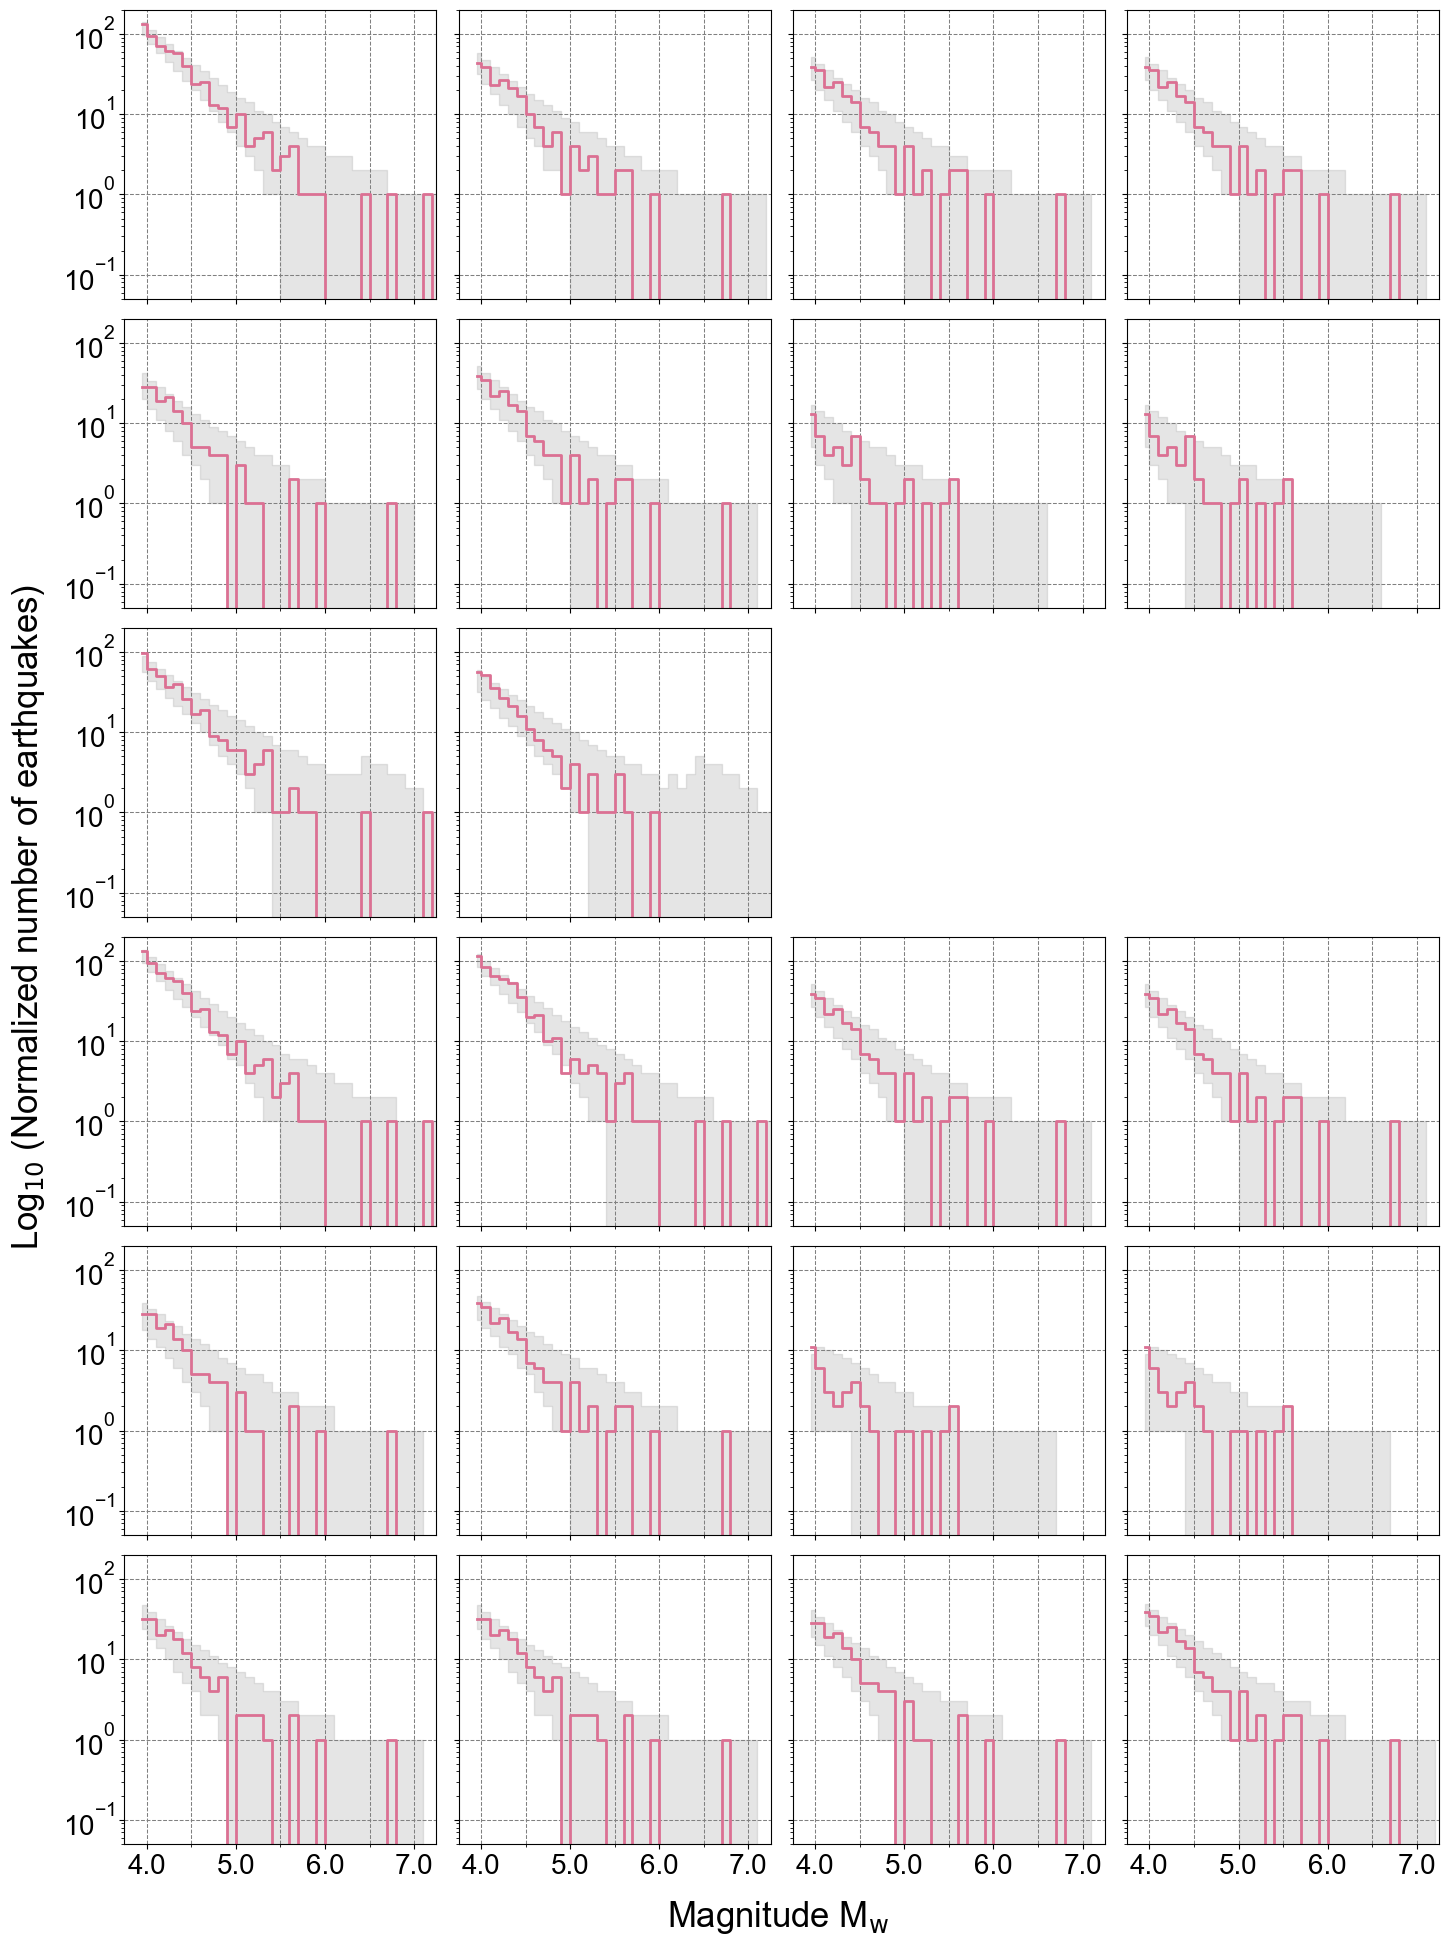

In [205]:
fig = plt.figure(figsize=(14, 19))

cummags = ['', ETAS_cummag_nor, ETASv1_cummag_nor, ETAS_DROneDayMd2_cummag_nor, ETAS_DROneDayMd3_cummag_nor,
           ETAS_HWMd2_cummag_nor, ETAS_HWMd3_cummag_nor, ETAS_DROneDayMd295_cummag_nor, ETASSYN_DROneDayMd295_cummag_nor,
           STEP_cummag_nor, STEPJAVA_cummag_nor, '', '',
           HKJ_cummag_nor, KJSSOneDayCalifornia_cummag_nor, ETAS_DROneDayPPEMd2_cummag_nor, ETAS_DROneDayPPEMd3_cummag_nor,
           K3Md2_cummag_nor, K3Md3_cummag_nor, GSF_ISO_cummag_nor, GSF_ANISO_cummag_nor,
           OneDayBayesianBMA_cummag_nor, OneDayBayesianSeqBMA_cummag_nor, ETAS_HW_K3_AVERAGE_Md2_cummag_nor, ETAS_HW_K3_AVERAGE_Md3_cummag_nor] 

mag_binnings = ['', mws, mws, mws, mws,
                mws, mws, mws, mws,
                mws, mws, '', '',
                mws, mws, mws, mws,
                mws, mws, mws, mws,
                mws, mws, mws, mws]

cat_mags = ['', list(catalogue.magnitude_counts()), list(catalogue_ETASv1.magnitude_counts()), list(catalogue_KJSSFiveYearCalifornia.magnitude_counts()), list(catalogue_KJSSFiveYearCalifornia.magnitude_counts()),
           list(catalogue_ETAS_HWMd2.magnitude_counts()), list(catalogue_KJSSFiveYearCalifornia.magnitude_counts()), list(catalogue_ETAS_DROneDayMd295.magnitude_counts()), list(catalogue_ETAS_DROneDayMd295.magnitude_counts()),
           list(catalogue_STEP.magnitude_counts()), list(catalogue_STEPJAVA.magnitude_counts()), '', '',
           list(catalogue.magnitude_counts()), list(catalogue_KJSSOneDayCalifornia.magnitude_counts()), list(catalogue_KJSSFiveYearCalifornia.magnitude_counts()), list(catalogue_KJSSFiveYearCalifornia.magnitude_counts()),
           list(catalogue_ETAS_HWMd2.magnitude_counts()), list(catalogue_KJSSFiveYearCalifornia.magnitude_counts()), list(catalogue_GSF_ISO.magnitude_counts()), list(catalogue_GSF_ISO.magnitude_counts()),
           list(catalogue_OneDayBayesianBMA.magnitude_counts()), list(catalogue_OneDayBayesianBMA.magnitude_counts()), list(catalogue_ETAS_HWMd2.magnitude_counts()), list(catalogue_KJSSFiveYearCalifornia.magnitude_counts())]

mws_aux = ['', mws, mws, mws, mws,
           mws, mws, mws, mws,
           mws, mws, '', '',
           mws, mws, mws, mws, 
           mws, mws, mws, mws, 
           mws, mws, mws, mws]

mws_aux2 = ['', mws, mws, mws, mws,
            mws, mws, mws, mws,
            mws, mws, '', '', 
            mws, mws, mws, mws, 
            mws, mws, mws, mws, 
            mws, mws, mws, mws] 

interval_up = ['', ETAS_cummag_high, ETASv1_cummag_high, ETAS_DROneDayMd2_cummag_high, ETAS_DROneDayMd3_cummag_high,
               ETAS_HWMd2_cummag_high, ETAS_HWMd3_cummag_high, ETAS_DROneDayMd295_cummag_high, ETASSYN_DROneDayMd295_cummag_high,
               STEP_cummag_high, STEPJAVA_cummag_high, '', '',
               HKJ_cummag_high, KJSSOneDayCalifornia_cummag_high, ETAS_DROneDayPPEMd2_cummag_high, ETAS_DROneDayPPEMd3_cummag_high,
               K3Md2_cummag_high, K3Md3_cummag_high, GSF_ISO_cummag_high, GSF_ANISO_cummag_high,
               OneDayBayesianBMA_cummag_high, OneDayBayesianSeqBMA_cummag_high, ETAS_HW_K3_AVERAGE_Md2_cummag_high, ETAS_HW_K3_AVERAGE_Md3_cummag_high]

interval_low = ['', ETAS_cummag_low, ETASv1_cummag_low, ETAS_DROneDayMd2_cummag_low, ETAS_DROneDayMd3_cummag_low,
                ETAS_HWMd2_cummag_low, ETAS_HWMd3_cummag_low, ETAS_DROneDayMd295_cummag_low, ETASSYN_DROneDayMd295_cummag_low,
                STEP_cummag_low, STEPJAVA_cummag_low, '', '',
                HKJ_cummag_low, KJSSOneDayCalifornia_cummag_low, ETAS_DROneDayPPEMd2_cummag_low, ETAS_DROneDayPPEMd3_cummag_low,
                K3Md2_cummag_low, K3Md3_cummag_low, GSF_ISO_cummag_low, GSF_ANISO_cummag_low,
                OneDayBayesianBMA_cummag_low, OneDayBayesianSeqBMA_cummag_low, ETAS_HW_K3_AVERAGE_Md2_cummag_low, ETAS_HW_K3_AVERAGE_Md3_cummag_low]


xlow_ends = ['', 3.95, 3.95, 3.95, 3.95,
             3.95, 3.95, 3.95, 3.95,
             3.95, 3.95, '', '', 
             3.95, 3.95, 3.95, 3.95, 
             3.95, 3.95, 3.95, 3.95, 
             3.95, 3.95, 3.95, 3.95] 

lb = ['', False, False, False, False,
      False, False, False, False, 
      False, False, '', '',
      False, False, False, False,
      False, False, False, False,
      True, True, True, True]

lf = ['', True, False, False, False,
      True, False, False, False, 
      True, False, '', '',
      True, False, False, False,
      True, False, False, False,
      True, False, False, False]

ymajor = [10**0, 10**1, 10**2]

for i in range(1, len(cummags)):
    if cummags[i] != '':
        ax = fig.add_subplot(6,4,i)
        ax.set_xticks(np.arange(4.0, 8.0, step=1.0))
        ax.set_xticks(np.arange(4.5, 8.0, step=0.5), minor=True)
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        plt.xlim(3.75, 7.25)
        plt.xticks(np.arange(4.0, 7.5, step=1.0), fontsize=20)
        ax.set_yticks(ymajor)
        plt.ylim(0.05, 2.001*10**2)
        plt.yticks(ymajor, fontsize=20)
        
        plt.yscale("log")
        plt.grid(which='both', linestyle='--', color='grey', linewidth=0.75, zorder=0, axis='x')
        plt.grid(which='major', linestyle='--', color='grey', linewidth=0.75, zorder=0, axis='y')
        plt.fill_between(mws_aux2[i], interval_low[i], interval_up[i], linewidth=1, edgecolor='grey', 
                 facecolor='grey', alpha=0.2, step='mid', zorder=2)
        plt.step(mws_aux[i], cat_mags[i], linewidth=2, color='palevioletred', where='mid', zorder=2) # observations
        plt.tick_params(labelleft=lf[i] , labelbottom=lb[i])


fig.text(0.515, -0.012, 'Magnitude M$_\mathrm{w}$', fontsize=25, ha='center', va='center')
fig.text(-0.02, 0.515, 'Log$_{10}$ (Normalized number of earthquakes)', fontsize=25, ha='center', va='center', rotation='vertical')
fig.tight_layout()
plt.savefig('expected_outputs/Figure7.png', dpi=150, bbox_inches='tight')    

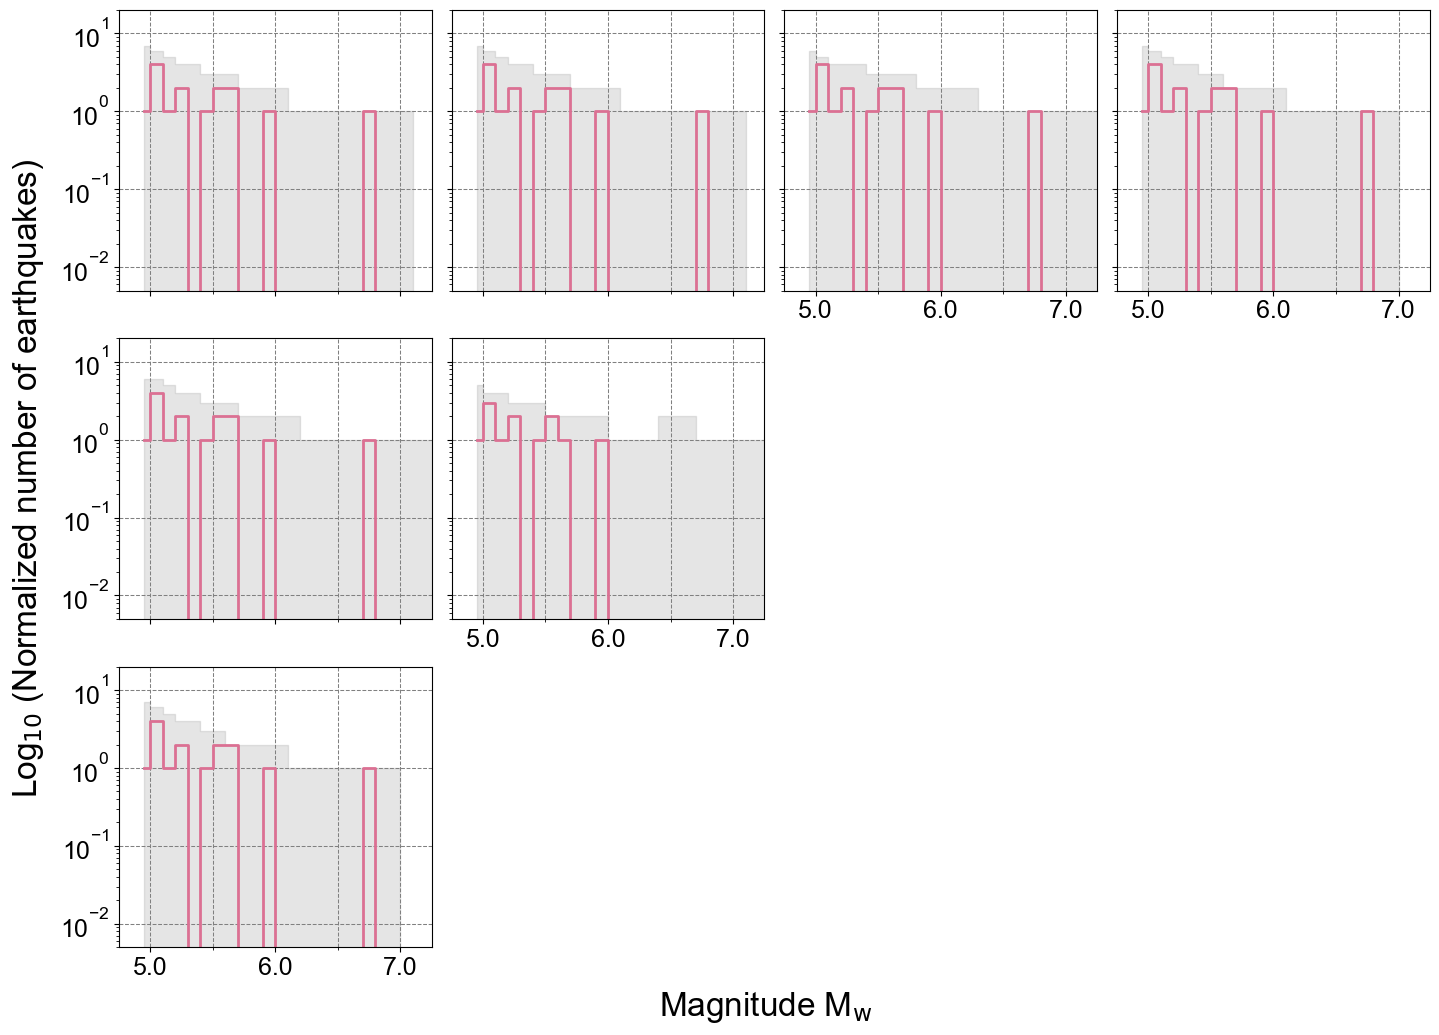

In [206]:
fig = plt.figure(figsize=(14, 10))

cummags5 = ['', HKJ5_cummag_nor, KJSSFiveYearCalifornia_cummag_nor, JANUSOneDayEEPAS1F_cummag_nor[10:], JANUSOneDayPPE_cummag_nor[10:],
            JANUSOneDay_cummag_nor[10:], SE2OneDay_cummag_nor[10:], '', '',
            JANUSOneDayTV_cummag_nor[10:], '', '', '']

mag_binnings5 = ['', mws2, mws[10:], mws[10:], mws[10:],
                 mws[10:], mws[10:],'', '',
                 mws[10:], '', '', '']

cat_mags5 = ['', list(catalogue_KJSSFiveYearCaliforniab.magnitude_counts()[10:]), list(catalogue_KJSSFiveYearCaliforniab.magnitude_counts()[10:]), list(catalogue_KJSSFiveYearCaliforniab.magnitude_counts()[10:]), list(catalogue_KJSSFiveYearCaliforniab.magnitude_counts()[10:]),
             list(catalogue_KJSSFiveYearCaliforniab.magnitude_counts()[10:]), list(catalogue_SE2OneDay.magnitude_counts()[10:]), '', '',
             list(catalogue_KJSSFiveYearCaliforniab.magnitude_counts()[10:]), '', '', '']

mws_aux5 = ['', mws2, mws2, mws2, mws2,
            mws2, mws[10:], '', '',
            mws2, '', '', '']

mws_aux25 = ['', mws2, mws2, mws2, mws2, 
             mws2, mws2, '', '',
             mws2, '', '', '']

interval_up5 = ['', HKJ5_cummag_high, KJSSFiveYearCalifornia_cummag_high, JANUSOneDayEEPAS1F_cummag_high, JANUSOneDayPPE_cummag_high,
                JANUSOneDay_cummag_high, SE2OneDay_cummag_high, '', '',
                JANUSOneDayTV_cummag_high, '', '', '']

interval_low5 = ['', HKJ5_cummag_low, KJSSFiveYearCalifornia_cummag_low, JANUSOneDayEEPAS1F_cummag_low, JANUSOneDayPPE_cummag_low,
                JANUSOneDay_cummag_low, SE2OneDay_cummag_low, '', '',
                JANUSOneDayTV_cummag_low, '', '', '']

for i in range(1, len(cummags5)):
    if cummags5[i] != '':
        ax = fig.add_subplot(3,4,i)
        #plt.step(mag_binnings5[i], cummags5[i], linewidth=1.5, color='g', where='mid')
        ax.set_xticks(np.arange(5.0, 8.0, step=1.0))
        ax.set_xticks(np.arange(4.5, 8.0, step=0.5), minor=True)
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        plt.xlim(4.75, 7.25)
        plt.xticks(np.arange(5.0, 7.5, step=1.0), fontsize=18)
        ax.set_yticks([10**-1, 10**0, 10**1])
        plt.ylim(0.005, 20)
        plt.yticks([10**-1, 10**0, 10**1], fontsize=18)
        plt.yscale("log")
        plt.grid(which='both', linestyle='--', color='grey', linewidth=0.75, zorder=0, axis='x')
        plt.grid(which='major', linestyle='--', color='grey', linewidth=0.75, zorder=0, axis='y')
        plt.fill_between(mws_aux25[i], interval_low5[i], interval_up5[i], linewidth=1, edgecolor='grey', 
                 facecolor='grey', alpha=0.2, step='mid', zorder=1)
        plt.step(mws_aux5[i], cat_mags5[i], linewidth=2, color='palevioletred', where='mid', zorder=2)
        plt.tick_params(labelleft=lf5[i] , labelbottom=lb5[i])

fig.text(0.515, -0.012, 'Magnitude M$_\mathrm{w}$', fontsize=24, ha='center', va='center')
fig.text(-0.012, 0.517, 'Log$_{10}$ (Normalized number of earthquakes)', fontsize=24, ha='center', va='center', rotation='vertical')
fig.tight_layout()
plt.savefig('expected_outputs/FigureS6.png', dpi=150, bbox_inches='tight')               

In [207]:
def _poisson_likelihood_test(forecast_data, observed_data, num_simulations=10000, random_numbers=None,
                             seed=None, use_observed_counts=True, verbose=True, normalize_likelihood=False):
    """
	Computes the likelihood-test from CSEP using an efficient simulation based approach.
	Args:
	    forecast_data (numpy.ndarray): nd array where [:, -1] are the magnitude bins.
	    observed_data (numpy.ndarray): same format as observation.
	    num_simulations: default number of simulations to use for likelihood based simulations
    	seed: used for reproducibility of the prng
	    random_numbers (numpy.ndarray): can supply an explicit list of random numbers, primarily used for software testing
	    use_observed_counts (bool): if true, will simulate catalogs using the observed events, if false will draw from poisson distribution
	    verbose (bool): if true, write progress of test to command line
	    normalize_likelihood (bool): if true, normalize likelihood. used by default for magnitude and spatial tests
	"""

    # set seed for the likelihood test
    if seed is not None:
        numpy.random.seed(seed)

    # used to determine where simulated earthquake should be placed, by definition of cumsum these are sorted
    sampling_weights = numpy.cumsum(forecast_data.ravel()) / numpy.sum(forecast_data)

    # data structures to store results
    sim_fore = numpy.zeros(sampling_weights.shape)
    simulated_ll = []

    # properties of observations and forecasts
    n_obs = numpy.sum(observed_data)
    n_fore = numpy.sum(forecast_data)

    expected_forecast_count = numpy.sum(forecast_data)
    log_bin_expectations = numpy.log(forecast_data.ravel())
    # used for conditional-likelihood, magnitude, and spatial tests to normalize the rate-component of the forecasts
    if use_observed_counts and normalize_likelihood:
        scale = n_obs / n_fore
        expected_forecast_count = int(n_obs)
        log_bin_expectations = numpy.log(forecast_data.ravel() * scale)

    # gets the 1d indices to bins that contain target events, these indexes perform copies and not views into the array
    target_idx = numpy.nonzero(observed_data.ravel())

    # note for performance: these operations perform copies
    observed_data_nonzero = observed_data.ravel()[target_idx]
    target_event_forecast = log_bin_expectations[target_idx] * observed_data_nonzero

    # main simulation step in this loop
    for idx in range(num_simulations):
        if use_observed_counts:
            num_events_to_simulate = int(n_obs)
        else:
            num_events_to_simulate = int(numpy.random.poisson(expected_forecast_count))

        if random_numbers is None:
            sim_fore = _simulate_catalog(num_events_to_simulate, sampling_weights, sim_fore)
        else:
            sim_fore = _simulate_catalog(num_events_to_simulate, sampling_weights, sim_fore,
                                         random_numbers=random_numbers[idx, :])

        # compute joint log-likelihood from simulation by leveraging that only cells with target events contribute to likelihood
        sim_target_idx = numpy.nonzero(sim_fore)
        sim_obs_nonzero = sim_fore[sim_target_idx]
        sim_target_event_forecast = log_bin_expectations[sim_target_idx] * sim_obs_nonzero

        # compute joint log-likelihood
        current_ll = poisson_joint_log_likelihood_ndarray(sim_target_event_forecast, sim_obs_nonzero,
                                                          expected_forecast_count)

        # append to list of simulated log-likelihoods
        simulated_ll.append(current_ll)

        # just be verbose
        if verbose:
            if (idx + 1) % 100 == 0:
                print(f'... {idx + 1} catalogs simulated.')

    # observed joint log-likelihood
    obs_ll = poisson_joint_log_likelihood_ndarray(target_event_forecast, observed_data_nonzero, expected_forecast_count)

    # quantile score
    qs = numpy.sum(simulated_ll <= obs_ll) / num_simulations

    # float, float, list
    return qs, obs_ll, simulated_ll

In [208]:
def magnitude_test(gridded_forecast_mags, gridded_catalog_mags, num_simulations=10000, seed=None, random_numbers=None,
                   verbose=False):
    """
    Performs the Magnitude Test on a Gridded Forecast using an observed catalog.

    Note: The forecast and the observations should be scaled to the same time period before calling this function. This increases
    transparency as no assumptions are being made about the length of the forecasts. This is particularly important for
    gridded forecasts that supply their forecasts as rates.

    Args:
        gridded_forecast: csep.core.forecasts.GriddedForecast
        observed_catalog: csep.core.catalogs.Catalog
        num_simulations (int): number of simulations used to compute the quantile score
        seed (int): used fore reproducibility, and testing
        random_numbers (numpy.ndarray): random numbers used to override the random number generation. injection point for testing.

    Returns:
        evaluation_result: csep.core.evaluations.EvaluationResult
    """
    
    # simply call likelihood test on catalog data and forecast
    qs, obs_ll, simulated_ll = _poisson_likelihood_test(gridded_forecast_mags, gridded_catalog_mags,
                                                        num_simulations=num_simulations,
                                                        seed=seed,
                                                        random_numbers=random_numbers,
                                                        use_observed_counts=True,
                                                        verbose=verbose,
                                                        normalize_likelihood=True)

    # populate result data structure
    result = EvaluationResult()
    result.test_distribution = simulated_ll
    result.name = 'Poisson M-Test'
    result.observed_statistic = obs_ll
    result.quantile = qs
    result.status = 'normal'
    return result

In [209]:
# Mw >= 3.95 earthquake forecasting models
ETAS_mtest = magnitude_test(ETAS_cummag, catalogue.magnitude_counts())
ETASv1_mtest = magnitude_test(ETASv1_cummag, catalogue_ETASv1.magnitude_counts())
ETAS_DROneDayMd2_mtest = magnitude_test(ETAS_DROneDayMd2_cummag, catalogue_KJSSFiveYearCalifornia.magnitude_counts())
ETAS_DROneDayMd3_mtest = magnitude_test(ETAS_DROneDayMd3_cummag, catalogue_KJSSFiveYearCalifornia.magnitude_counts())
ETAS_HWMd2_mtest = magnitude_test(ETAS_HWMd2_cummag, catalogue_ETAS_HWMd2.magnitude_counts())
ETAS_HWMd3_mtest = magnitude_test(ETAS_HWMd3_cummag, catalogue_KJSSFiveYearCalifornia.magnitude_counts())
ETAS_DROneDayMd295_mtest = magnitude_test(ETAS_DROneDayMd295_cummag, catalogue_ETAS_DROneDayMd295.magnitude_counts())
ETASSYN_DROneDayMd295_mtest = magnitude_test(ETASSYN_DROneDayMd295_cummag, catalogue_ETAS_DROneDayMd295.magnitude_counts())

STEP_mtest = magnitude_test(STEP_cummag, catalogue_STEP.magnitude_counts())
STEPJAVA_mtest = magnitude_test(STEPJAVA_cummag, catalogue_STEPJAVA.magnitude_counts())

HKJ_mtest = magnitude_test(HKJ_cummag, catalogue.magnitude_counts())
KJSSOneDayCalifornia_mtest = magnitude_test(KJSSOneDayCalifornia_cummag, catalogue_KJSSOneDayCalifornia.magnitude_counts())
ETAS_DROneDayPPEMd2_mtest = magnitude_test(ETAS_DROneDayPPEMd2_cummag, catalogue_KJSSFiveYearCalifornia.magnitude_counts())
ETAS_DROneDayPPEMd3_mtest = magnitude_test(ETAS_DROneDayPPEMd3_cummag, catalogue_KJSSFiveYearCalifornia.magnitude_counts())

K3Md2_mtest = magnitude_test(K3Md2_cummag, catalogue_ETAS_HWMd2.magnitude_counts())
K3Md3_mtest = magnitude_test(K3Md3_cummag, catalogue_KJSSOneDayCalifornia.magnitude_counts())
GSF_ISO_mtest = magnitude_test(GSF_ISO_cummag, catalogue_GSF_ISO.magnitude_counts())
GSF_ANISO_mtest = magnitude_test(GSF_ANISO_cummag, catalogue_GSF_ISO.magnitude_counts())

OneDayBayesianBMA_mtest = magnitude_test(OneDayBayesianBMA_cummag, catalogue_OneDayBayesianBMA.magnitude_counts())
OneDayBayesianSeqBMA_mtest = magnitude_test(OneDayBayesianSeqBMA_cummag, catalogue_OneDayBayesianBMA.magnitude_counts())
ETAS_HW_K3_AVERAGE_Md2_mtest = magnitude_test(ETAS_HW_K3_AVERAGE_Md2_cummag, catalogue_ETAS_HWMd2.magnitude_counts())
ETAS_HW_K3_AVERAGE_Md3_mtest = magnitude_test(ETAS_HW_K3_AVERAGE_Md3_cummag, catalogue_KJSSFiveYearCalifornia.magnitude_counts())

# Mw >= 4.95 earthquake forecasting models
HKJ5_mtest = magnitude_test(HKJ5_cummag, catalogue_KJSSFiveYearCaliforniab.magnitude_counts()[10:])
KJSSFiveYearCalifornia_mtest = magnitude_test(KJSSFiveYearCalifornia_cummag, catalogue_KJSSFiveYearCaliforniab.magnitude_counts()[10:])
JANUSOneDayEEPAS1F_mtest = magnitude_test(JANUSOneDayEEPAS1F_cummag[10:], catalogue_KJSSFiveYearCaliforniab.magnitude_counts()[10:])
JANUSOneDayPPE_mtest = magnitude_test(JANUSOneDayPPE_cummag[10:], catalogue_KJSSFiveYearCaliforniab.magnitude_counts()[10:])

JANUSOneDay_mtest = magnitude_test(JANUSOneDay_cummag[10:], catalogue_KJSSFiveYearCaliforniab.magnitude_counts()[10:])
SE2OneDay_mtest = magnitude_test(SE2OneDay_cummag[10:], catalogue_SE2OneDay.magnitude_counts()[10:])

JANUSOneDayTV_mtest = magnitude_test(JANUSOneDayTV_cummag[10:], catalogue_KJSSFiveYearCaliforniab.magnitude_counts()[10:])

In [210]:
def calculate_pvalues(obs_catalog, fmd_pred, magfive=False):
    pbinned_prob = []
    obinned_prob = []
    
    if magfive == False:
        for i in range(len(fmd_pred)):
            pbinned_prob.append(fmd_pred[i] / obs_catalog.event_count)
            obinned_prob.append((obs_catalog.magnitude_counts()[i] / obs_catalog.event_count))
    else:
        for i in range(len(fmd_pred)):
            pbinned_prob.append(fmd_pred[i] / obs_catalog.event_count)
            obinned_prob.append((obs_catalog.magnitude_counts()[10:][i] / obs_catalog.event_count))

    cum_obs_fmd = np.cumsum(obinned_prob)
    cum_pred_fmd = np.cumsum(pbinned_prob)

    diff_fmds = []
    for i in range(len(cum_obs_fmd)):
        diff_fmds.append(np.abs(cum_obs_fmd[i] - cum_pred_fmd[i]))

    D = max(diff_fmds)

    Neff = obs_catalog.event_count / 2.0

    z = D * np.sqrt(Neff)

    p = []
    for i in range(1, 1000):
        p.append((-1.0)**(i-1.0) * np.exp(-2.0*i**2.0 * z**2.0))

    pv = 2.0 * sum(p)

    return pv

In [211]:
# Mw >= 3.95 earthquake forecasting models
kstest_ETASm = calculate_pvalues(catalogue, ETAS_cummag_nor)
kstest_ETASv1 = calculate_pvalues(catalogue_ETASv1, ETASv1_cummag_nor)
kstest_ETAS_DROneDayMd2m = calculate_pvalues(catalogue_KJSSFiveYearCalifornia, ETAS_DROneDayMd2_cummag_nor)
kstest_ETAS_DROneDayMd3m = calculate_pvalues(catalogue_KJSSFiveYearCalifornia, ETAS_DROneDayMd3_cummag_nor)
kstest_ETAS_HWMd2m = calculate_pvalues(catalogue_ETAS_HWMd2, ETAS_HWMd2_cummag_nor)
kstest_ETAS_HWMd3m = calculate_pvalues(catalogue_KJSSFiveYearCalifornia, ETAS_HWMd3_cummag_nor)
kstest_ETAS_DROneDayMd295m = calculate_pvalues(catalogue_ETAS_DROneDayMd295, ETAS_DROneDayMd295_cummag_nor)
kstest_ETASSYN_DROneDayMd295m = calculate_pvalues(catalogue_ETAS_DROneDayMd295, ETASSYN_DROneDayMd295_cummag_nor)

kstest_STEPm = calculate_pvalues(catalogue_STEP, STEP_cummag_nor)
kstest_STEPJAVAm = calculate_pvalues(catalogue_STEPJAVA, STEPJAVA_cummag_nor)

kstest_HKJm = calculate_pvalues(catalogue, HKJ_cummag_nor)
kstest_KJSSOneDayCaliforniam = calculate_pvalues(catalogue_KJSSOneDayCalifornia, KJSSOneDayCalifornia_cummag_nor)
kstest_ETAS_DROneDayPPEMd2m = calculate_pvalues(catalogue_KJSSFiveYearCalifornia, ETAS_DROneDayPPEMd2_cummag_nor)
kstest_ETAS_DROneDayPPEMd3m = calculate_pvalues(catalogue_KJSSFiveYearCalifornia, ETAS_DROneDayPPEMd3_cummag_nor)

kstest_K3Md2m = calculate_pvalues(catalogue_ETAS_HWMd2, K3Md2_cummag_nor)
kstest_K3Md3m = calculate_pvalues(catalogue_KJSSFiveYearCalifornia, K3Md3_cummag_nor)
kstest_GSF_ISOm = calculate_pvalues(catalogue_GSF_ISO, GSF_ISO_cummag_nor)
kstest_GSF_ANISOm = calculate_pvalues(catalogue_GSF_ISO, GSF_ANISO_cummag_nor)

kstest_OneDayBayesianBMAm = calculate_pvalues(catalogue_OneDayBayesianBMA, OneDayBayesianBMA_cummag_nor)
kstest_OneDayBayesianSeqBMAm = calculate_pvalues(catalogue_OneDayBayesianBMA, OneDayBayesianSeqBMA_cummag_nor)
kstest_ETAS_HW_K3_AVERAGE_Md2m = calculate_pvalues(catalogue_ETAS_HWMd2, ETAS_HW_K3_AVERAGE_Md2_cummag_nor)
kstest_ETAS_HW_K3_AVERAGE_Md3m = calculate_pvalues(catalogue_KJSSFiveYearCalifornia, ETAS_HW_K3_AVERAGE_Md3_cummag_nor)

# Mw >= 4.95 earthquake forecasting models
kstest_HKJ5m = calculate_pvalues(catalogue_KJSSFiveYearCaliforniab, HKJ5_cummag_nor, True)
kstest_KJSSFiveYearCaliforniam = calculate_pvalues(catalogue_KJSSFiveYearCaliforniab, KJSSFiveYearCalifornia_cummag_nor, True)
kstest_JANUSOneDayEEPAS1Fm = calculate_pvalues(catalogue_KJSSFiveYearCaliforniab, JANUSOneDayEEPAS1F_cummag_nor[10:], True)
kstest_JANUSOneDayPPEm = calculate_pvalues(catalogue_KJSSFiveYearCaliforniab, JANUSOneDayPPE_cummag_nor[10:], True)

kstest_JANUSOneDaym = calculate_pvalues(catalogue_KJSSFiveYearCaliforniab, JANUSOneDay_cummag_nor[10:], True)
kstest_SE2OneDaym = calculate_pvalues(catalogue_SE2OneDay, SE2OneDay_cummag_nor[10:], False)

kstest_JANUSOneDayTVm = calculate_pvalues(catalogue_KJSSFiveYearCaliforniab, JANUSOneDayTV_cummag_nor[10:], True)

### How does each forecasting model compare to the benchmark model?

In [212]:
start_date1 = time_utils.strptime_to_utc_epoch('2007-08-01 00:00:00.0')
end_date1 = time_utils.strptime_to_utc_epoch('2009-01-01 00:00:00.0')

start_date2 = time_utils.strptime_to_utc_epoch('2009-01-01 00:00:00.0')
end_date2 = time_utils.strptime_to_utc_epoch('2010-09-01 00:00:00.0')

start_date3 = time_utils.strptime_to_utc_epoch('2010-09-01 00:00:00.0')
end_date3 = time_utils.strptime_to_utc_epoch('2012-07-01 00:00:00.0')

start_date4 = time_utils.strptime_to_utc_epoch('2012-07-01 00:00:00.0')
end_date4 = time_utils.strptime_to_utc_epoch('2012-10-01 00:00:00.0')

start_date5 = time_utils.strptime_to_utc_epoch('2013-01-21 00:00:00.0')
end_date5 = time_utils.strptime_to_utc_epoch('2016-07-01 00:00:00.0')

start_date6 = time_utils.strptime_to_utc_epoch('2016-10-01 00:00:00.0')
end_date6 = time_utils.strptime_to_utc_epoch('2018-06-30 00:00:00.0')

In [213]:
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)
catalogue.filter(f'origin_time >= {start_date1}')
catalogue.filter(f'origin_time < {end_date1}')
cat_aux1 = catalogue

with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)
catalogue.filter(f'origin_time >= {start_date2}')
catalogue.filter(f'origin_time < {end_date2}')
cat_aux2 = catalogue

with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)
catalogue.filter(f'origin_time >= {start_date3}')
catalogue.filter(f'origin_time < {end_date3}')
cat_aux3 = catalogue

with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)
catalogue.filter(f'origin_time >= {start_date4}')
catalogue.filter(f'origin_time < {end_date4}')
cat_aux4 = catalogue        
        
with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)
catalogue.filter(f'origin_time >= {start_date5}')
catalogue.filter(f'origin_time < {end_date5}')
cat_aux5 = catalogue 

with open ('data/catalogues/catalogue_2007_2018.obj', 'rb') as obj:
        catalogue = pickle.load(obj)
catalogue.filter(f'origin_time >= {start_date6}')
catalogue.filter(f'origin_time < {end_date6}')
cat_aux6 = catalogue   

In [214]:
with open ('data/catalogues/catalogue_2007_2018_sj.obj', 'rb') as obj: # STEPJAVA region
        catalogue = pickle.load(obj)
catalogue.filter(f'origin_time >= {start_date3}')
catalogue.filter(f'origin_time < {end_date3}')
cat_aux3s = catalogue

with open ('data/catalogues/catalogue_2007_2018_sj.obj', 'rb') as obj: # STEPJAVA region
        catalogue = pickle.load(obj)
catalogue.filter(f'origin_time >= {start_date4}')
catalogue.filter(f'origin_time < {end_date4}')
cat_aux4s = catalogue

with open ('data/catalogues/catalogue_2007_2018_sj.obj', 'rb') as obj: # STEPJAVA region
        catalogue = pickle.load(obj)
catalogue.filter(f'origin_time >= {start_date5}')
catalogue.filter(f'origin_time < {end_date5}')
cat_aux5s = catalogue

with open ('data/catalogues/catalogue_2007_2018_sj.obj', 'rb') as obj: # STEPJAVA region
        catalogue = pickle.load(obj)
catalogue.filter(f'origin_time >= {start_date6}')
catalogue.filter(f'origin_time < {end_date6}')
cat_aux6s = catalogue

In [215]:
with open ('data/catalogues/catalogue_2007_2018b.obj', 'rb') as obj:
        catalogue = pickle.load(obj)
catalogue.filter(f'origin_time >= {start_date5}')
catalogue.filter(f'origin_time < {end_date5}')
cat_aux5ss = catalogue 

with open ('data/catalogues/catalogue_2007_2018b.obj', 'rb') as obj:
        catalogue = pickle.load(obj)
catalogue.filter(f'origin_time >= {start_date6}')
catalogue.filter(f'origin_time < {end_date6}')
cat_aux6ss = catalogue

In [216]:
with open ('data/catalogues/catalogue_2007_2018b_se2.obj', 'rb') as obj: # SE2OneDay region
        catalogue = pickle.load(obj)
catalogue.filter(f'origin_time >= {start_date5}')
catalogue.filter(f'origin_time < {end_date5}')
cat_aux5sss = catalogue

with open ('data/catalogues/catalogue_2007_2018b_se2.obj', 'rb') as obj: # SE2OneDay region
        catalogue = pickle.load(obj)
catalogue.filter(f'origin_time >= {start_date6}')
catalogue.filter(f'origin_time < {end_date6}')
cat_aux6sss = catalogue

In [217]:
# Information gains of Mw >= 3.95 earthquake forecasting models over HKJ:
ETAS_joli = np.genfromtxt('preprocessed_inputs/ETAS/ETAS_joli.dat', delimiter='\t')
ETASv1_joli = np.genfromtxt('preprocessed_inputs/ETASv1/ETASv1_joli.dat', delimiter='\t')
ETAS_DROneDayMd2_joli = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayMd2/ETAS_DROneDayMd2_joli.dat', delimiter='\t')
ETAS_DROneDayMd3_joli = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayMd3/ETAS_DROneDayMd3_joli.dat', delimiter='\t')
ETAS_HWMd2_joli = np.genfromtxt('preprocessed_inputs/ETAS_HWMd2/ETAS_HWMd2_joli.dat', delimiter='\t')
ETAS_HWMd3_joli = np.genfromtxt('preprocessed_inputs/ETAS_HWMd3/ETAS_HWMd3_joli.dat', delimiter='\t')
ETAS_DROneDayMd295_joli = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayMd295/ETAS_DROneDayMd295_joli.dat', delimiter='\t')
ETASSYN_DROneDayMd295_joli = np.genfromtxt('preprocessed_inputs/ETASSYN_DROneDayMd295/ETASSYN_DROneDayMd295_joli.dat', delimiter='\t')

STEP_joli = np.genfromtxt('preprocessed_inputs/STEP/STEP_joli_up.dat', delimiter='\t')
STEPJAVA_joli = np.genfromtxt('preprocessed_inputs/STEPJAVA/STEPJAVA_joli.dat', delimiter='\t')

HKJ_joli = np.genfromtxt('preprocessed_inputs/HKJ/HKJ_joli.dat', delimiter='\t')
KJSSOneDayCalifornia_joli = np.genfromtxt('preprocessed_inputs/KJSSOneDayCalifornia/KJSSOneDayCalifornia_joli.dat', delimiter='\t')
ETAS_DROneDayPPEMd2_joli = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayPPEMd2/ETAS_DROneDayPPEMd2_joli.dat', delimiter='\t')
ETAS_DROneDayPPEMd3_joli = np.genfromtxt('preprocessed_inputs/ETAS_DROneDayPPEMd3/ETAS_DROneDayPPEMd3_joli.dat', delimiter='\t')

K3Md2_joli = np.genfromtxt('preprocessed_inputs/K3Md2/K3Md2_joli.dat', delimiter='\t')
K3Md3_joli = np.genfromtxt('preprocessed_inputs/K3Md3/K3Md3_joli.dat', delimiter='\t')
GSF_ISO_joli = np.genfromtxt('preprocessed_inputs/GSF_ISO/GSF_ISO_joli_up.dat', delimiter='\t')
GSF_ANISO_joli = np.genfromtxt('preprocessed_inputs/GSF_ANISO/GSF_ANISO_joli_up.dat', delimiter='\t')

OneDayBayesianBMA_joli = np.genfromtxt('preprocessed_inputs/OneDayBayesianBMA/OneDayBayesianBMA_joli.dat', delimiter='\t')
OneDayBayesianSeqBMA_joli = np.genfromtxt('preprocessed_inputs/OneDayBayesianSeqBMA/OneDayBayesianSeqBMA_joli.dat', delimiter='\t')
ETAS_HW_K3_AVERAGE_Md2_joli = np.genfromtxt('preprocessed_inputs/ETAS_HW_K3_AVERAGE_Md2/ETAS_HW_K3_AVERAGE_Md2_joli.dat', delimiter='\t')
ETAS_HW_K3_AVERAGE_Md3_joli = np.genfromtxt('preprocessed_inputs/ETAS_HW_K3_AVERAGE_Md3/ETAS_HW_K3_AVERAGE_Md3_joli.dat', delimiter='\t')

In [218]:
# Information gains of Mw 4.95+ seismicity forecasts over HKJ:
KJSSFiveYearCalifornia_joli = np.genfromtxt('preprocessed_inputs/KJSSFiveYearCalifornia/KJSSFiveYearCalifornia_joli.dat', delimiter='\t')
JANUSOneDayEEPAS1F_joli = np.genfromtxt('preprocessed_inputs/JANUSOneDayEEPAS1F/JANUSOneDayEEPAS1F_joli_up.dat', delimiter='\t')
JANUSOneDayPPE_joli = np.genfromtxt('preprocessed_inputs/JANUSOneDayPPE/JANUSOneDayPPE_joli_up.dat', delimiter='\t')

JANUSOneDay_joli = np.genfromtxt('preprocessed_inputs/JANUSOneDay/JANUSOneDay_joli_up.dat', delimiter='\t')
SE2OneDay_joli = np.genfromtxt('preprocessed_inputs/SE2OneDay/SE2OneDay_joli_up2.dat', delimiter='\t') 

JANUSOneDayTV_joli = np.genfromtxt('preprocessed_inputs/JANUSOneDayTV/JANUSOneDayTV_joli_up.dat', delimiter='\t')

In [219]:
# Information gains of special custom benchmark forecasts over HKJ:
HKJ_STEPJAVA_joli = np.genfromtxt('preprocessed_inputs/HKJ/HKJ_STEPJAVA_joli.dat', delimiter='\t')

HKJ5_joli = np.genfromtxt('preprocessed_inputs/HKJ/HKJ5_joli.dat', delimiter='\t')

HKJ_SE2OneDay_joli = np.genfromtxt('preprocessed_inputs/HKJ/HKJ_SE2OneDay_joli.dat', delimiter='\t')

In [220]:
#Mw >= 3.95 earthquake forecasting models
ETAS['joli_ETAS'] = ETAS_joli
ETASv1['joli_ETASv1'] = ETASv1_joli
ETAS_DROneDayMd2['joli_ETAS_DROneDayMd2'] = ETAS_DROneDayMd2_joli
ETAS_DROneDayMd3['joli_ETAS_DROneDayMd3'] = ETAS_DROneDayMd3_joli
ETAS_HWMd2['joli_ETAS_HWMd2'] = ETAS_HWMd2_joli
ETAS_HWMd3['joli_ETAS_HWMd3'] = ETAS_HWMd3_joli
ETAS_DROneDayMd295['joli_ETAS_DROneDayMd295'] = ETAS_DROneDayMd295_joli
ETASSYN_DROneDayMd295['joli_ETASSYN_DROneDayMd295'] = ETASSYN_DROneDayMd295_joli

STEP['joli_STEP'] = STEP_joli
STEPJAVA['joli_STEPJAVA'] = STEPJAVA_joli
HKJ_STEP = pd.DataFrame()
HKJ_STEP['date'] = list(HKJ.date[:])
HKJ_STEP['joli_HKJ_STEP'] = HKJ_STEPJAVA_joli
HKJ_STEP['n_HKJ_STEP'] = HKJ4_ncounts

HKJ['joli_HKJ'] = HKJ_joli
KJSSOneDayCalifornia['joli_KJSSOneDay'] = KJSSOneDayCalifornia_joli
ETAS_DROneDayPPEMd2['joli_ETAS_DROneDayPPEMd2'] = ETAS_DROneDayPPEMd2_joli
ETAS_DROneDayPPEMd3['joli_ETAS_DROneDayPPEMd3'] = ETAS_DROneDayPPEMd3_joli

OneDayBayesianBMA['joli_OneDayBayesian'] = OneDayBayesianBMA_joli
OneDayBayesianSeqBMA['joli_OneDaySeqBayesian'] = OneDayBayesianSeqBMA_joli

K3Md2['joli_K3Md2'] = K3Md2_joli
K3Md3['joli_K3Md3'] = K3Md3_joli
GSF_ISO['joli_GSF_ISO'] = GSF_ISO_joli
GSF_ANISO['joli_GSF_ANISO'] = GSF_ANISO_joli

ETAS_HW_K3_AVERAGE_Md2['joli_ETAS_HW_K3_Md2'] = ETAS_HW_K3_AVERAGE_Md2_joli
ETAS_HW_K3_AVERAGE_Md3['joli_ETAS_HW_K3_Md3'] = ETAS_HW_K3_AVERAGE_Md3_joli

#Mw >= 4.95 seismicity forecasts
HKJ5 = pd.DataFrame()
HKJ5['date'] = list(HKJ.date[:])
HKJ5['joli_HKJ5'] = HKJ5_joli
HKJ5['n_HKJ5'] = HKJ5_ncounts
KJSSFiveYearCalifornia['joli_KJSSFiveYear'] = KJSSFiveYearCalifornia_joli
JANUSOneDayEEPAS1F['joli_JANUSOneDayEEPAS1F'] = JANUSOneDayEEPAS1F_joli
JANUSOneDayPPE['joli_JANUSOneDayPPE'] = JANUSOneDayPPE_joli

JANUSOneDay['joli_JANUSOneDay'] = JANUSOneDay_joli
SE2OneDay['joli_SE2OneDay'] = SE2OneDay_joli
HKJ_SE2OneDay = pd.DataFrame()
HKJ_SE2OneDay['date'] = list(HKJ.date[:])
HKJ_SE2OneDay['joli_HKJ_SE2OneDay'] = HKJ_SE2OneDay_joli
HKJ_SE2OneDay['n_HKJ_SE2OneDay'] = HKJ5_ncounts

JANUSOneDayTV['joli_JANUSOneDayTV'] = JANUSOneDayTV_joli

In [221]:
# Each number represent the period in which a group of forecasting models were available.
# E.g., period 1 spans from 2007-08-01 to 2009-01-01
ETAS_1 = ETAS[['date', 'joli_ETAS', 'n_ETAS']][(ETAS['date'] >= '2007-08-01') & (ETAS['date'] < '2009-01-01')]

STEP_1 = STEP[['date', 'joli_STEP', 'n_STEP']][(STEP['date'] >= '2007-08-01') & (STEP['date'] < '2009-01-01')]

HKJ_1 = HKJ[['date', 'joli_HKJ', 'n_HKJ']][(HKJ['date'] >= '2007-08-01') & (HKJ['date'] < '2009-01-01')]

In [222]:
joli_1 = pd.merge(HKJ_1, ETAS_1,  how="inner", on="date")

joli_1 = pd.merge(joli_1, STEP_1,  how="inner", on="date")

In [223]:
joli_1dates = []

for i in range(len(joli_1)):
    joli_1dates.append(datetime.datetime.strptime(joli_1.date[joli_1.index[i]], '%Y-%m-%d'))

In [224]:
ETAS_2 = ETAS[['date', 'joli_ETAS', 'n_ETAS']][(ETAS['date'] >= '2009-01-01') & (ETAS['date'] < '2010-09-01')]

STEP_2 = STEP[['date', 'joli_STEP', 'n_STEP']][(STEP['date'] >= '2009-01-01') & (STEP['date'] < '2010-09-01')]

HKJ_2 = HKJ[['date', 'joli_HKJ', 'n_HKJ']][(HKJ['date'] >= '2009-01-01') & (HKJ['date'] < '2010-09-01')]
KJSSOneDayCalifornia_2 = KJSSOneDayCalifornia[['date', 'joli_KJSSOneDay', 'n_KJSSOneDayCalifornia']][(KJSSOneDayCalifornia['date'] >= '2009-01-01') & (KJSSOneDayCalifornia['date'] < '2010-09-01')]

In [225]:
joli_2 = pd.merge(HKJ_2, ETAS_2,  how="inner", on="date")

joli_2 = pd.merge(joli_2, STEP_2,  how="inner", on="date")

joli_2 = pd.merge(joli_2, KJSSOneDayCalifornia_2,  how="inner", on="date")
HKJ_2 = ETAS_2 = STEP_2 = KJSSOneDayCalifornia_2 = []

In [226]:
joli_2dates = []

for i in range(len(joli_2)):
    joli_2dates.append(datetime.datetime.strptime(joli_2.date[joli_2.index[i]], '%Y-%m-%d'))

In [227]:
ETAS_3 = ETAS[['date', 'joli_ETAS', 'n_ETAS']][(ETAS['date'] >= '2010-09-01') & (ETAS['date'] < '2012-07-01')]

STEP_3 = STEP[['date', 'joli_STEP', 'n_STEP']][(STEP['date'] >= '2010-09-01') & (STEP['date'] < '2012-07-01')]

HKJ_3 = HKJ[['date', 'joli_HKJ','n_HKJ']][(HKJ['date'] >= '2010-09-01') & (HKJ['date'] < '2012-07-01')]
KJSSOneDayCalifornia_3 = KJSSOneDayCalifornia[['date', 'joli_KJSSOneDay', 'n_KJSSOneDayCalifornia']][(KJSSOneDayCalifornia['date'] >= '2010-09-01') & (KJSSOneDayCalifornia['date'] < '2012-07-01')]

In [228]:
joli_3 = pd.merge(HKJ_3, ETAS_3,  how="inner", on="date")

joli_3 = pd.merge(joli_3, STEP_3,  how="inner", on="date")

joli_3 = pd.merge(joli_3, KJSSOneDayCalifornia_3,  how="inner", on="date")

In [229]:
joli_3dates = []

for i in range(len(joli_3)):
    joli_3dates.append(datetime.datetime.strptime(joli_3.date[joli_3.index[i]], '%Y-%m-%d'))

In [230]:
HKJ_STEP3 = HKJ_STEP[['date', 'joli_HKJ_STEP', 'n_HKJ_STEP']][(HKJ_STEP['date'] >= '2010-09-01') & (HKJ_STEP['date'] < '2012-07-01')]
STEPJAVA_3 = STEPJAVA[['date', 'joli_STEPJAVA', 'n_STEPJAVA']][(STEPJAVA['date'] >= '2010-09-01') & (STEPJAVA['date'] < '2012-07-01')]

In [231]:
joli_3s = pd.merge(HKJ_STEP3, STEPJAVA_3,  how="inner", on="date")

In [232]:
joli_3sdates = []

for i in range(len(joli_3s)):
    joli_3sdates.append(datetime.datetime.strptime(joli_3s.date[joli_3s.index[i]], '%Y-%m-%d'))

In [233]:
ETAS_4 = ETAS[['date', 'joli_ETAS', 'n_ETAS']][(ETAS['date'] >= '2012-07-01') & (ETAS['date'] < '2012-10-01')]
ETASv1_4 = ETASv1[['date', 'joli_ETASv1', 'n_ETASv1']][(ETASv1['date'] >= '2012-07-01') & (ETASv1['date'] < '2012-10-01')]

STEP_4 = STEP[['date', 'joli_STEP', 'n_STEP']][(STEP['date'] >= '2012-07-01') & (STEP['date'] < '2012-10-01')]


HKJ_4 = HKJ[['date', 'joli_HKJ', 'n_HKJ']][(HKJ['date'] >= '2012-07-01') & (HKJ['date'] < '2012-10-01')]
KJSSOneDayCalifornia_4 = KJSSOneDayCalifornia[['date', 'joli_KJSSOneDay', 'n_KJSSOneDayCalifornia']][(KJSSOneDayCalifornia['date'] >= '2012-07-01') & (KJSSOneDayCalifornia['date'] < '2012-10-01')]

OneDayBayesianBMA_4 = OneDayBayesianBMA[['date', 'joli_OneDayBayesian', 'n_OneDayBayesianBMA']][(OneDayBayesianBMA['date'] >= '2012-07-01') & (OneDayBayesianBMA['date'] < '2012-10-01')]
OneDayBayesianSeqBMA_4 = OneDayBayesianSeqBMA[['date', 'joli_OneDaySeqBayesian', 'n_OneDayBayesianSeqBMA']][(OneDayBayesianSeqBMA['date'] >= '2012-07-01') & (OneDayBayesianSeqBMA['date'] < '2012-10-01')]

In [234]:
joli_4 = pd.merge(HKJ_4, ETAS_4,  how="inner", on="date")
joli_4 = pd.merge(joli_4, ETASv1_4,  how="inner", on="date")

joli_4 = pd.merge(joli_4, STEP_4,  how="inner", on="date")

joli_4 = pd.merge(joli_4, KJSSOneDayCalifornia_4,  how="inner", on="date")
joli_4 = pd.merge(joli_4, OneDayBayesianBMA_4,  how="inner", on="date")
joli_4 = pd.merge(joli_4, OneDayBayesianSeqBMA_4,  how="inner", on="date")

In [235]:
joli_4dates = []

for i in range(len(joli_4)):
    joli_4dates.append(datetime.datetime.strptime(joli_4.date[joli_4.index[i]], '%Y-%m-%d'))

In [236]:
HKJ_STEP4 = HKJ_STEP[['date', 'joli_HKJ_STEP', 'n_HKJ_STEP']][(HKJ_STEP['date'] >= '2012-07-01') & (HKJ_STEP['date'] < '2012-10-01')]
STEPJAVA_4 = STEPJAVA[['date', 'joli_STEPJAVA', 'n_STEPJAVA']][(STEPJAVA['date'] >= '2012-07-01') & (STEPJAVA['date'] < '2012-10-01')]

In [237]:
joli_4s = pd.merge(HKJ_STEP4, STEPJAVA_4,  how="inner", on="date")

In [238]:
joli_4sdates = []

for i in range(len(joli_4s)):
    joli_4sdates.append(datetime.datetime.strptime(joli_4s.date[joli_4s.index[i]], '%Y-%m-%d'))

In [239]:
ETAS_5 = ETAS[['date', 'joli_ETAS', 'n_ETAS']][(ETAS['date'] >= '2013-01-21') & (ETAS['date'] < '2016-07-01')]
ETASv1_5 = ETASv1[['date', 'joli_ETASv1', 'n_ETASv1']][(ETASv1['date'] >= '2013-01-21') & (ETASv1['date'] < '2016-07-01')]
ETAS_DROneDayMd2_5 = ETAS_DROneDayMd2[['date', 'joli_ETAS_DROneDayMd2', 'n_ETAS_DROneDayMd2']][(ETAS_DROneDayMd2['date'] >= '2013-01-21') & (ETAS_DROneDayMd2['date'] < '2016-07-01')]
ETAS_DROneDayMd3_5 = ETAS_DROneDayMd3[['date', 'joli_ETAS_DROneDayMd3', 'n_ETAS_DROneDayMd3']][(ETAS_DROneDayMd3['date'] >= '2013-01-21') & (ETAS_DROneDayMd3['date'] < '2016-07-01')]
ETAS_HWMd2_5 = ETAS_HWMd2[['date', 'joli_ETAS_HWMd2', 'n_ETAS_HWMd2']][(ETAS_HWMd2['date'] >= '2013-01-21') & (ETAS_HWMd2['date'] < '2016-07-01')]
ETAS_HWMd3_5 = ETAS_HWMd3[['date', 'joli_ETAS_HWMd3', 'n_ETAS_HWMd3']][(ETAS_HWMd3['date'] >= '2013-01-21') & (ETAS_HWMd3['date'] < '2016-07-01')]

HKJ_5 = HKJ[['date', 'joli_HKJ', 'n_HKJ']][(HKJ['date'] >= '2013-01-21') & (HKJ['date'] < '2016-07-01')]
KJSSOneDayCalifornia_5 = KJSSOneDayCalifornia[['date', 'joli_KJSSOneDay', 'n_KJSSOneDayCalifornia']][(KJSSOneDayCalifornia['date'] >= '2013-01-21') & (KJSSOneDayCalifornia['date'] < '2016-07-01')]
ETAS_DROneDayPPEMd2_5 = ETAS_DROneDayPPEMd2[['date', 'joli_ETAS_DROneDayPPEMd2', 'n_ETAS_DROneDayPPEMd2']][(ETAS_DROneDayPPEMd2['date'] >= '2013-01-21') & (ETAS_DROneDayPPEMd2['date'] < '2016-07-01')]
ETAS_DROneDayPPEMd3_5 = ETAS_DROneDayPPEMd3[['date', 'joli_ETAS_DROneDayPPEMd3', 'n_ETAS_DROneDayPPEMd3']][(ETAS_DROneDayPPEMd3['date'] >= '2013-01-21') & (ETAS_DROneDayPPEMd3['date'] < '2016-07-01')]

K3Md2_5 = K3Md2[['date', 'joli_K3Md2', 'n_K3Md2']][(K3Md2['date'] >= '2013-01-21') & (K3Md2['date'] < '2016-07-01')]
K3Md3_5 = K3Md3[['date', 'joli_K3Md3', 'n_K3Md3']][(K3Md3['date'] >= '2013-01-21') & (K3Md3['date'] < '2016-07-01')]

OneDayBayesianBMA_5 = OneDayBayesianBMA[['date', 'joli_OneDayBayesian', 'n_OneDayBayesianBMA']][(OneDayBayesianBMA['date'] >= '2013-01-21') & (OneDayBayesianBMA['date'] < '2016-07-01')]
OneDayBayesianSeqBMA_5 = OneDayBayesianSeqBMA[['date', 'joli_OneDaySeqBayesian', 'n_OneDayBayesianSeqBMA']][(OneDayBayesianSeqBMA['date'] >= '2013-01-21') & (OneDayBayesianSeqBMA['date'] < '2016-07-01')]
ETAS_HW_K3_AVERAGE_Md2_5 = ETAS_HW_K3_AVERAGE_Md2[['date', 'joli_ETAS_HW_K3_Md2', 'n_ETAS_HW_K3_AVERAGE_Md2']][(ETAS_HW_K3_AVERAGE_Md2['date'] >= '2013-01-21') & (ETAS_HW_K3_AVERAGE_Md2['date'] < '2016-07-01')]
ETAS_HW_K3_AVERAGE_Md3_5 = ETAS_HW_K3_AVERAGE_Md3[['date', 'joli_ETAS_HW_K3_Md3', 'n_ETAS_HW_K3_AVERAGE_Md3']][(ETAS_HW_K3_AVERAGE_Md3['date'] >= '2013-01-21') & (ETAS_HW_K3_AVERAGE_Md3['date'] < '2016-07-01')]

In [240]:
joli_5 = pd.merge(HKJ_5, ETAS_5,  how="inner", on="date")
joli_5 = pd.merge(joli_5, ETASv1_5,  how="inner", on="date")
joli_5 = pd.merge(joli_5, ETAS_DROneDayMd2_5,  how="inner", on="date")
joli_5 = pd.merge(joli_5, ETAS_DROneDayMd3_5,  how="inner", on="date")
joli_5 = pd.merge(joli_5, ETAS_HWMd2_5,  how="inner", on="date")
joli_5 = pd.merge(joli_5, ETAS_HWMd3_5,  how="inner", on="date")
joli_5 = pd.merge(joli_5, ETAS_HW_K3_AVERAGE_Md2_5,  how="inner", on="date")
joli_5 = pd.merge(joli_5, ETAS_HW_K3_AVERAGE_Md3_5,  how="inner", on="date")

joli_5 = pd.merge(joli_5, KJSSOneDayCalifornia_5,  how="inner", on="date")
joli_5 = pd.merge(joli_5, ETAS_DROneDayPPEMd2_5,  how="inner", on="date")
joli_5 = pd.merge(joli_5, ETAS_DROneDayPPEMd3_5,  how="inner", on="date")

joli_5 = pd.merge(joli_5, K3Md2_5,  how="inner", on="date")
joli_5 = pd.merge(joli_5, K3Md3_5,  how="inner", on="date")

joli_5 = pd.merge(joli_5, OneDayBayesianBMA_5,  how="inner", on="date")
joli_5 = pd.merge(joli_5, OneDayBayesianSeqBMA_5,  how="inner", on="date")

In [241]:
joli_5dates = []

for i in range(len(joli_5)):
    joli_5dates.append(datetime.datetime.strptime(joli_5.date[joli_5.index[i]], '%Y-%m-%d'))

In [242]:
HKJ_STEP5 = HKJ_STEP[['date', 'joli_HKJ_STEP', 'n_HKJ_STEP']][(HKJ_STEP['date'] >= '2013-01-21') & (HKJ_STEP['date'] < '2016-07-01')]
STEPJAVA_5 = STEPJAVA[['date', 'joli_STEPJAVA', 'n_STEPJAVA']][(STEPJAVA['date'] >= '2013-01-21') & (STEPJAVA['date'] < '2016-07-01')]

In [243]:
joli_5s = pd.merge(HKJ_STEP5, STEPJAVA_5,  how="inner", on="date")

In [244]:
joli_5sdates = []

for i in range(len(joli_5s)):
    joli_5sdates.append(datetime.datetime.strptime(joli_5s.date[joli_5s.index[i]], '%Y-%m-%d'))

In [245]:
HKJ5_5 = HKJ5[['date', 'joli_HKJ5', 'n_HKJ5']][(HKJ5['date'] >= '2013-01-21') & (HKJ5['date'] < '2016-07-01')]
KJSSFiveYearCalifornia_5= KJSSFiveYearCalifornia[['date', 'joli_KJSSFiveYear', 'n_KJSSFiveYearCalifornia']][(KJSSFiveYearCalifornia['date'] >= '2013-01-21') & (KJSSFiveYearCalifornia['date'] < '2016-07-01')]
JANUSOneDayEEPAS1F_5 = JANUSOneDayEEPAS1F[['date', 'joli_JANUSOneDayEEPAS1F', 'n_JANUSOneDayEEPAS1F']][(JANUSOneDayEEPAS1F['date'] >= '2013-01-21') & (JANUSOneDayEEPAS1F['date'] < '2016-07-01')]

JANUSOneDay_5 = JANUSOneDay[['date', 'joli_JANUSOneDay', 'n_JANUSOneDay']][(JANUSOneDay['date'] >= '2013-01-21') & (JANUSOneDay['date'] < '2016-07-01')]
JANUSOneDayPPE_5 = JANUSOneDayPPE[['date', 'joli_JANUSOneDayPPE', 'n_JANUSOneDayPPE']][(JANUSOneDayPPE['date'] >= '2013-01-21') & (JANUSOneDayPPE['date'] < '2016-07-01')]
JANUSOneDayTV_5 = JANUSOneDayTV[['date', 'joli_JANUSOneDayTV', 'n_JANUSOneDayTV']][(JANUSOneDayTV['date'] >= '2013-01-21') & (JANUSOneDayTV['date'] < '2016-07-01')]

In [246]:
joli_5ss = pd.merge(HKJ5_5, KJSSFiveYearCalifornia_5,  how="inner", on="date")
joli_5ss = pd.merge(joli_5ss, JANUSOneDay_5,  how="inner", on="date")
joli_5ss = pd.merge(joli_5ss, JANUSOneDayEEPAS1F_5,  how="inner", on="date")
joli_5ss = pd.merge(joli_5ss, JANUSOneDayPPE_5,  how="inner", on="date")
joli_5ss = pd.merge(joli_5ss, JANUSOneDayTV_5,  how="inner", on="date")

In [247]:
joli_5ssdates = []

for i in range(len(joli_5ss)):
    joli_5ssdates.append(datetime.datetime.strptime(joli_5ss.date[joli_5ss.index[i]], '%Y-%m-%d'))

In [248]:
HKJ_SE2OneDay5 = HKJ_SE2OneDay[['date', 'joli_HKJ_SE2OneDay', 'n_HKJ_SE2OneDay']][(HKJ_SE2OneDay['date'] >= '2013-01-21') & (HKJ_SE2OneDay['date'] < '2016-07-01')]
SE2OneDay_5 = SE2OneDay[['date', 'joli_SE2OneDay', 'n_SE2OneDay']][(SE2OneDay['date'] >= '2013-01-21') & (SE2OneDay['date'] < '2016-07-01')]

In [249]:
joli_5sss = pd.merge(HKJ_SE2OneDay5, SE2OneDay_5,  how="inner", on="date")

In [250]:
joli_5sssdates = []

for i in range(len(joli_5sss)):
    joli_5sssdates.append(datetime.datetime.strptime(joli_5sss.date[joli_5sss.index[i]], '%Y-%m-%d'))

In [251]:
ETAS_6 = ETAS[['date', 'joli_ETAS', 'n_ETAS']][(ETAS['date'] >= '2016-10-01') & (ETAS['date'] <= '2018-06-30')]
ETASv1_6 = ETASv1[['date', 'joli_ETASv1', 'n_ETASv1']][(ETASv1['date'] >= '2016-10-01') & (ETASv1['date'] <= '2018-06-30')]
ETAS_DROneDayMd2_6 = ETAS_DROneDayMd2[['date', 'joli_ETAS_DROneDayMd2', 'n_ETAS_DROneDayMd2']][(ETAS_DROneDayMd2['date'] >= '2016-10-01') & (ETAS_DROneDayMd2['date'] <= '2018-06-30')]
ETAS_DROneDayMd3_6 = ETAS_DROneDayMd3[['date', 'joli_ETAS_DROneDayMd3', 'n_ETAS_DROneDayMd3']][(ETAS_DROneDayMd3['date'] >= '2016-10-01') & (ETAS_DROneDayMd3['date'] <= '2018-06-30')]
ETAS_HWMd3_6 = ETAS_HWMd3[['date', 'joli_ETAS_HWMd3', 'n_ETAS_HWMd3']][(ETAS_HWMd3['date'] >= '2016-10-01') & (ETAS_HWMd3['date'] <= '2018-06-30')]
ETAS_DROneDayMd295_6 = ETAS_DROneDayMd295[['date', 'joli_ETAS_DROneDayMd295', 'n_ETAS_DROneDayMd295']][(ETAS_DROneDayMd295['date'] >= '2016-10-01') & (ETAS_DROneDayMd295['date'] <= '2018-06-30')]
ETASSYN_DROneDayMd295_6 = ETASSYN_DROneDayMd295[['date', 'joli_ETASSYN_DROneDayMd295', 'n_ETASSYN_DROneDayMd295']][(ETASSYN_DROneDayMd295['date'] >= '2016-10-01') & (ETASSYN_DROneDayMd295['date'] <= '2018-06-30')]

HKJ_6 = HKJ[['date', 'joli_HKJ', 'n_HKJ']][(HKJ['date'] >= '2016-10-01') & (HKJ['date'] <= '2018-06-30')]
KJSSOneDayCalifornia_6 = KJSSOneDayCalifornia[['date', 'joli_KJSSOneDay', 'n_KJSSOneDayCalifornia']][(KJSSOneDayCalifornia['date'] >= '2016-10-01') & (KJSSOneDayCalifornia['date'] <= '2018-06-30')]
ETAS_DROneDayPPEMd2_6 = ETAS_DROneDayPPEMd2[['date', 'joli_ETAS_DROneDayPPEMd2', 'n_ETAS_DROneDayPPEMd2']][(ETAS_DROneDayPPEMd2['date'] >= '2016-10-01') & (ETAS_DROneDayPPEMd2['date'] <= '2018-06-30')]
ETAS_DROneDayPPEMd3_6 = ETAS_DROneDayPPEMd3[['date', 'joli_ETAS_DROneDayPPEMd3', 'n_ETAS_DROneDayPPEMd3']][(ETAS_DROneDayPPEMd3['date'] >= '2016-10-01') & (ETAS_DROneDayPPEMd3['date'] <= '2018-06-30')]

K3Md3_6 = K3Md3[['date', 'joli_K3Md3', 'n_K3Md3']][(K3Md3['date'] >= '2016-10-01') & (K3Md3['date'] <= '2018-06-30')]
GSF_ISO_6 = GSF_ISO[['date', 'joli_GSF_ISO', 'n_GSF_ISO']][(GSF_ISO['date'] >= '2016-10-01') & (GSF_ISO['date'] <= '2018-06-30')]
GSF_ANISO_6 = GSF_ANISO[['date', 'joli_GSF_ANISO', 'n_GSF_ANISO']][(GSF_ANISO['date'] >= '2016-10-01') & (GSF_ANISO['date'] <= '2018-06-30')]

ETAS_HW_K3_AVERAGE_Md3_6 = ETAS_HW_K3_AVERAGE_Md3[['date', 'joli_ETAS_HW_K3_Md3', 'n_ETAS_HW_K3_AVERAGE_Md3']][(ETAS_HW_K3_AVERAGE_Md3['date'] >= '2016-10-01') & (ETAS_HW_K3_AVERAGE_Md3['date'] <= '2018-06-30')]

In [252]:
joli_6 = pd.merge(HKJ_6, ETAS_6,  how="inner", on="date")
joli_6 = pd.merge(joli_6, ETASv1_6,  how="inner", on="date")
joli_6 = pd.merge(joli_6, ETAS_DROneDayMd2_6,  how="inner", on="date")
joli_6 = pd.merge(joli_6, ETAS_DROneDayMd3_6,  how="inner", on="date")
joli_6 = pd.merge(joli_6, ETAS_HWMd3_6,  how="inner", on="date")
joli_6 = pd.merge(joli_6, ETAS_DROneDayMd295_6,  how="inner", on="date")
joli_6 = pd.merge(joli_6, ETASSYN_DROneDayMd295_6,  how="inner", on="date")

joli_6 = pd.merge(joli_6, KJSSOneDayCalifornia_6,  how="inner", on="date")
joli_6 = pd.merge(joli_6, ETAS_DROneDayPPEMd2_6,  how="inner", on="date")
joli_6 = pd.merge(joli_6, ETAS_DROneDayPPEMd3_6,  how="inner", on="date")

joli_6 = pd.merge(joli_6, K3Md3_6,  how="inner", on="date")
joli_6 = pd.merge(joli_6, GSF_ISO_6,  how="inner", on="date")
joli_6 = pd.merge(joli_6, GSF_ANISO_6,  how="inner", on="date")

joli_6 = pd.merge(joli_6, ETAS_HW_K3_AVERAGE_Md3_6,  how="inner", on="date")

In [253]:
joli_6dates = []

for i in range(len(joli_6)):
    joli_6dates.append(datetime.datetime.strptime(joli_6.date[joli_6.index[i]], '%Y-%m-%d'))

In [254]:
HKJ_STEP6 = HKJ_STEP[['date', 'joli_HKJ_STEP', 'n_HKJ_STEP']][(HKJ_STEP['date'] >= '2016-10-01') & (HKJ_STEP['date'] < '2018-06-30')]
STEPJAVA_6 = STEPJAVA[['date', 'joli_STEPJAVA', 'n_STEPJAVA']][(STEPJAVA['date'] >= '2016-10-01') & (STEPJAVA['date'] < '2018-06-30')]

In [255]:
joli_6s = pd.merge(HKJ_STEP6, STEPJAVA_6,  how="inner", on="date")

In [256]:
joli_6sdates = []

for i in range(len(joli_6s)):
    joli_6sdates.append(datetime.datetime.strptime(joli_6s.date[joli_6s.index[i]], '%Y-%m-%d'))

In [257]:
HKJ5_6 = HKJ5[['date', 'joli_HKJ5', 'n_HKJ5']][(HKJ5['date'] >= '2016-10-01') & (HKJ5['date'] < '2018-06-30')]
KJSSFiveYearCalifornia_6 = KJSSFiveYearCalifornia[['date', 'joli_KJSSFiveYear', 'n_KJSSFiveYearCalifornia']][(KJSSFiveYearCalifornia['date'] >= '2016-10-01') & (KJSSFiveYearCalifornia['date'] <= '2018-06-30')]
JANUSOneDayEEPAS1F_6 = JANUSOneDayEEPAS1F[['date', 'joli_JANUSOneDayEEPAS1F', 'n_JANUSOneDayEEPAS1F']][(JANUSOneDayEEPAS1F['date'] >= '2016-10-01') & (JANUSOneDayEEPAS1F['date'] < '2018-06-30')]
JANUSOneDayPPE_6 = JANUSOneDayPPE[['date', 'joli_JANUSOneDayPPE', 'n_JANUSOneDayPPE']][(JANUSOneDayPPE['date'] >= '2016-10-01') & (JANUSOneDayPPE['date'] < '2018-06-30')]

JANUSOneDay_6 = JANUSOneDay[['date', 'joli_JANUSOneDay', 'n_JANUSOneDay']][(JANUSOneDay['date'] >= '2016-10-01') & (JANUSOneDay['date'] < '2018-06-30')]

JANUSOneDayTV_6 = JANUSOneDayTV[['date', 'joli_JANUSOneDayTV', 'n_JANUSOneDayTV']][(JANUSOneDayTV['date'] >= '2016-10-01') & (JANUSOneDayTV['date'] < '2018-06-30')]

In [258]:
joli_6ss = pd.merge(HKJ5_6, KJSSFiveYearCalifornia_6,  how="inner", on="date")
joli_6ss = pd.merge(joli_6ss, JANUSOneDayEEPAS1F_6,  how="inner", on="date")
joli_6ss = pd.merge(joli_6ss, JANUSOneDayPPE_6,  how="inner", on="date")

joli_6ss = pd.merge(joli_6ss, JANUSOneDay_6,  how="inner", on="date")

joli_6ss = pd.merge(joli_6ss, JANUSOneDayTV_6,  how="inner", on="date")

In [259]:
joli_6ssdates = []

for i in range(len(joli_6ss)):
    joli_6ssdates.append(datetime.datetime.strptime(joli_6ss.date[joli_6ss.index[i]], '%Y-%m-%d'))

In [260]:
HKJ_SE2OneDay6 = HKJ_SE2OneDay[['date', 'joli_HKJ_SE2OneDay', 'n_HKJ_SE2OneDay']][(HKJ_SE2OneDay['date'] >= '2016-10-01') & (HKJ_SE2OneDay['date'] < '2018-06-30')]
SE2OneDay_6 = SE2OneDay[['date', 'joli_SE2OneDay', 'n_SE2OneDay']][(SE2OneDay['date'] >= '2016-10-01') & (SE2OneDay['date'] < '2018-06-30')]

In [261]:
joli_6sss = pd.merge(HKJ_SE2OneDay6, SE2OneDay_6,  how="inner", on="date")

In [262]:
joli_6sssdates = []

for i in range(len(joli_6sss)):
    joli_6sssdates.append(datetime.datetime.strptime(joli_6sss.date[joli_6sss.index[i]], '%Y-%m-%d'))

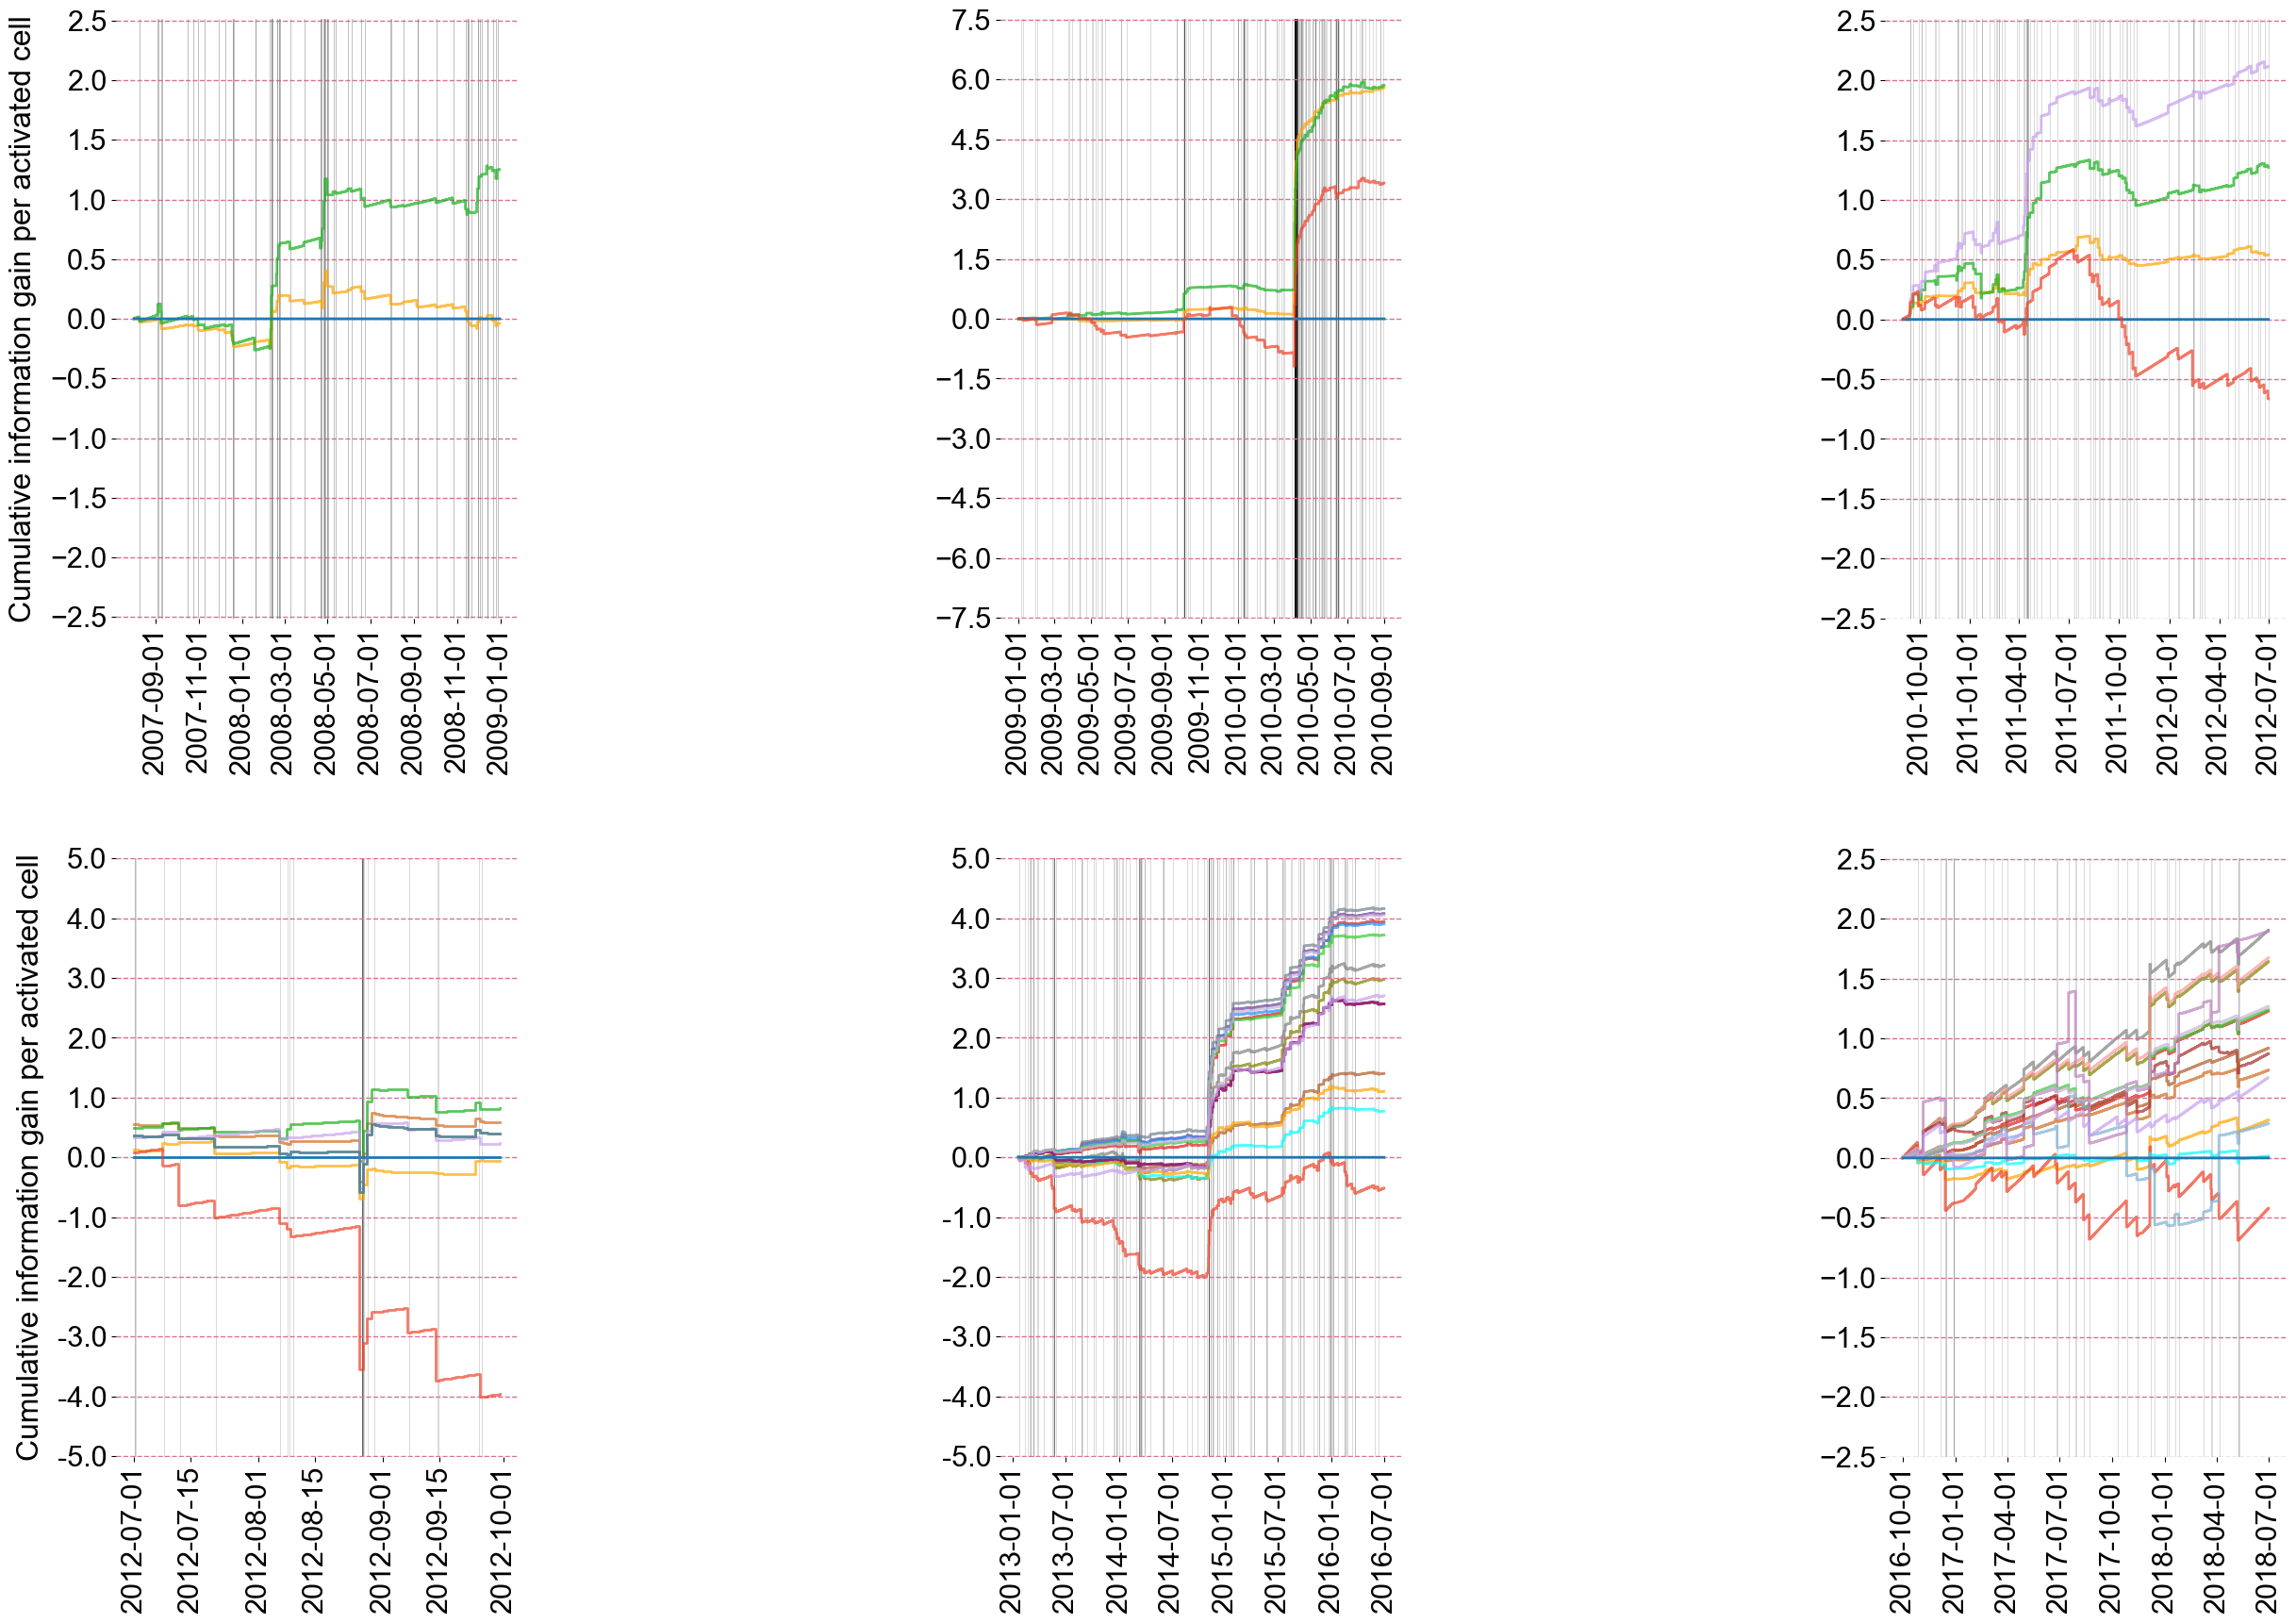

In [263]:
fig, ((ax_1,ax_2,ax_3) ,(ax_4,ax_5,ax_6)) = plt.subplots(nrows=2, ncols=3, figsize=(24,16))
fig.tight_layout()

ax_1.set_ylabel('Cumulative information gain per activated cell', fontsize=23, labelpad=10)
ax_1.set_ylim(-2.51, 2.51)
ax_1.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred') 

for i in range(len(cat_aux1.get_datetimes())):
    ax_1.axvline(cat_aux1.get_datetimes()[i], color='grey', linewidth=0.5, zorder=2, alpha=0.7)  

ax_1.step(joli_1dates, np.cumsum(joli_1.joli_ETAS.values - joli_1.joli_HKJ.values) / len(np.unique(cat_aux1.get_spatial_idx())), alpha=0.7, linewidth=2, color='#FFA500', where='mid', zorder=2)

ax_1.step(joli_1dates, np.cumsum(joli_1.joli_STEP.values - joli_1.joli_HKJ.values) / len(np.unique(cat_aux1.get_spatial_idx())), alpha=0.7, linewidth=2, color='#15B01A', where='mid', zorder=2)

ax_1.step(joli_1dates, np.zeros(len(joli_1dates)), alpha=1, linewidth=2, color='#1f77b4', where='mid', zorder=2)
plt.setp(ax_1.spines.values(), color="None")
ax_1.yaxis.set_ticks(np.arange(-2.5, 2.51, step=0.5))
ax_1.set_xticklabels(['2007-09-01', '2007-11-01', '2008-01-01', '2008-03-01', '2008-05-01', '2008-07-01', '2008-09-01', '2008-11-01', '2009-01-01'])

for tick in ax_1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(22)
    tick.label1.set_rotation(90)

for tick in ax_1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(22)


ax_2.set_ylim(-7.51, 7.51)
ax_2.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred') 

for i in range(len(cat_aux2.get_datetimes())):
    ax_2.axvline(cat_aux2.get_datetimes()[i], color='k', linewidth=0.5, zorder=1, alpha=0.2)  
    

ax_2.step(joli_2dates, np.cumsum(joli_2.joli_ETAS.values - joli_2.joli_HKJ.values) / len(np.unique(cat_aux2.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='#FFA500', where='mid')

ax_2.step(joli_2dates, np.cumsum(joli_2.joli_STEP.values - joli_2.joli_HKJ.values) / len(np.unique(cat_aux2.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='#15B01A', where='mid')

ax_2.step(joli_2dates, np.zeros(len(joli_2dates)), zorder=2, alpha=1, linewidth=2, color='#1f77b4', label='HKJ', where='mid')
ax_2.step(joli_2dates, np.cumsum(joli_2.joli_KJSSOneDay.values - joli_2.joli_HKJ.values) / len(np.unique(cat_aux2.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='#EF4026', where='mid')

plt.setp(ax_2.spines.values(), color="None")
ax_2.yaxis.set_ticks(np.arange(-7.5, 7.51, step=1.5))
ax_2.set_xticklabels(['2009-01-01', '2009-03-01', '2009-05-01', '2009-07-01', '2009-09-01', '2009-11-01', '2010-01-01', '2010-03-01', '2010-05-01',
                     '2010-07-01', '2010-09-01'])

for tick in ax_2.xaxis.get_major_ticks():
    tick.label1.set_fontsize(22)
    tick.label1.set_rotation(90)

for tick in ax_2.yaxis.get_major_ticks():
    tick.label1.set_fontsize(22)


ax_3.set_ylim(-2.5, 2.51)
for i in range(len(cat_aux3.get_datetimes())):
    ax_3.axvline(cat_aux3.get_datetimes()[i], color='k', linewidth=0.5, zorder=0, alpha=0.2)  
    
ax_3.step(joli_3dates, np.cumsum(joli_3.joli_ETAS.values - joli_3.joli_HKJ.values) / len(np.unique(cat_aux3.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='#FFA500', where='mid')

ax_3.step(joli_3sdates, np.cumsum(joli_3.joli_STEP.values - joli_3.joli_HKJ.values) / len(np.unique(cat_aux3.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='#15B01A', where='mid')
ax_3.step(joli_3sdates, np.cumsum(joli_3s.joli_STEPJAVA.values - joli_3s.joli_HKJ_STEP.values) / len(np.unique(cat_aux3s.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='#C79FEF', where='mid')

ax_3.step(joli_3dates, np.zeros(len(joli_3dates)), zorder=2, alpha=1, linewidth=2, color='#1f77b4', where='mid')
ax_3.step(joli_3dates, np.cumsum(joli_3.joli_KJSSOneDay.values - joli_3.joli_HKJ.values) / len(np.unique(cat_aux3.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='#EF4026', where='pre')

plt.setp(ax_3.spines.values(), color="None")
ax_3.yaxis.set_ticks(np.arange(-2.5, 2.51, step=0.5))
ax_3.set_xticklabels(['2010-10-01', '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01', '2012-01-01', '2012-04-01', '2012-07-01'])
ax_3.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred') 

for tick in ax_3.xaxis.get_major_ticks():
    tick.label1.set_fontsize(22)
    tick.label1.set_rotation(90)

for tick in ax_3.yaxis.get_major_ticks():
    tick.label1.set_fontsize(22)


ax_4.set_ylim(-5.01, 5.01)
ax_4.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred') 
ax_4.set_ylabel('Cumulative information gain per activated cell', fontsize=23, labelpad=10)

for i in range(len(cat_aux4.get_datetimes())):
    ax_4.axvline(cat_aux4.get_datetimes()[i], color='k', linewidth=0.7, zorder=0, alpha=0.15) 

ax_4.step(joli_4dates, np.cumsum(joli_4.joli_ETAS.values - joli_4.joli_HKJ.values) / len(np.unique(cat_aux4.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='#FFA500', where='post')
ax_4.step(joli_4dates, np.cumsum(joli_4.joli_ETASv1.values - joli_4.joli_HKJ.values) / len(np.unique(cat_aux4.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='#D2691E', where='post')

ax_4.step(joli_4dates, np.cumsum(joli_4.joli_STEP.values - joli_4.joli_HKJ.values) / len(np.unique(cat_aux4.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='#15B01A', where='post')
ax_4.step(joli_4sdates, np.cumsum(joli_4s.joli_STEPJAVA.values - joli_4s.joli_HKJ_STEP.values) / len(np.unique(cat_aux4.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='#C79FEF', where='post')

ax_4.step(joli_4dates, np.zeros(len(joli_4dates)), zorder=2, alpha=1, linewidth=2, color='#1f77b4', where='post')
ax_4.step(joli_4dates, np.cumsum(joli_4.joli_KJSSOneDay.values - joli_4.joli_HKJ.values) / len(np.unique(cat_aux4.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='#EF4026', where='post')

ax_4.step(joli_4dates, np.cumsum(joli_4.joli_OneDayBayesian.values - joli_4.joli_HKJ.values) / len(np.unique(cat_aux4.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='#008080', where='post')
ax_4.step(joli_4dates, np.cumsum(joli_4.joli_OneDaySeqBayesian.values - joli_4.joli_HKJ.values) / len(np.unique(cat_aux4.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='slategrey',where='post')
plt.setp(ax_4.spines.values(), color="None")
ax_4.yaxis.set_ticks(np.arange(-5.0, 5.01, step=1.0))
ax_4.set_yticklabels(['-5.0', '-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0'])

for tick in ax_4.xaxis.get_major_ticks():
    tick.label1.set_fontsize(22)
    tick.label1.set_rotation(90)

for tick in ax_4.yaxis.get_major_ticks():
    tick.label1.set_fontsize(22) 


ax_5.set_ylim(-5.01, 5.01)
for i in range(len(cat_aux5.get_datetimes())):
    ax_5.axvline(cat_aux5.get_datetimes()[i], color='k', linewidth=0.5, zorder=0, alpha=0.2)
    
ax_5.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred')

ax_5.step(joli_5dates, np.cumsum(joli_5.joli_ETAS.values - joli_5.joli_HKJ.values) / len(np.unique(cat_aux5.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='#FFA500', where='mid')
ax_5.step(joli_5dates, np.cumsum(joli_5.joli_ETASv1.values - joli_5.joli_HKJ.values) / len(np.unique(cat_aux5.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#D2691E', where='mid')
ax_5.step(joli_5dates, np.cumsum(joli_5.joli_ETAS_DROneDayMd2.values - joli_5.joli_HKJ.values) / len(np.unique(cat_aux5.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#808080', where='mid')
ax_5.step(joli_5dates, np.cumsum(joli_5.joli_ETAS_DROneDayMd3.values - joli_5.joli_HKJ.values) / len(np.unique(cat_aux5.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#808000', where='mid')
ax_5.step(joli_5dates, np.cumsum(joli_5.joli_ETAS_HWMd2.values - joli_5.joli_HKJ.values) / len(np.unique(cat_aux5.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#6a3d9a', where='mid')
ax_5.step(joli_5dates, np.cumsum(joli_5.joli_ETAS_HWMd3.values - joli_5.joli_HKJ.values) / len(np.unique(cat_aux5.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#e31a1c', where='mid')

ax_5.step(joli_5sdates, np.cumsum(joli_5s.joli_STEPJAVA.values - joli_5s.joli_HKJ_STEP.values) / len(np.unique(cat_aux5.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='#C79FEF', where='mid')

ax_5.step(joli_5dates, np.zeros(len(joli_5dates)), zorder=2, alpha=1, linewidth=2, color='#1f77b4', where='mid')
ax_5.step(joli_5dates, np.cumsum(joli_5.joli_KJSSOneDay.values - joli_5.joli_HKJ.values) / len(np.unique(cat_aux5.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#EF4026', where='mid')
ax_5.step(joli_5dates, np.cumsum(joli_5.joli_ETAS_DROneDayPPEMd2.values - joli_5.joli_HKJ.values) / len(np.unique(cat_aux5.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#00FFFF', where='mid')
ax_5.step(joli_5dates, np.cumsum(joli_5.joli_ETAS_DROneDayPPEMd3.values - joli_5.joli_HKJ.values) / len(np.unique(cat_aux5.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#b15928', where='mid')

ax_5.step(joli_5dates, np.cumsum(joli_5.joli_K3Md2.values - joli_5.joli_HKJ.values) / len(np.unique(cat_aux5.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='dodgerblue', where='mid')
ax_5.step(joli_5dates, np.cumsum(joli_5.joli_K3Md3.values - joli_5.joli_HKJ.values) / len(np.unique(cat_aux5.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='limegreen', where='mid')

ax_5.step(joli_5dates, np.cumsum(joli_5.joli_OneDayBayesian.values - joli_5.joli_HKJ.values) / len(np.unique(cat_aux5.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#008080', where='mid')
ax_5.step(joli_5dates, np.cumsum(joli_5.joli_OneDaySeqBayesian.values - joli_5.joli_HKJ.values) / len(np.unique(cat_aux5.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#C20078', where='mid')
ax_5.step(joli_5dates, np.cumsum(joli_5.joli_ETAS_HW_K3_Md2.values - joli_5.joli_HKJ.values) / len(np.unique(cat_aux5.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#708090', where='mid')
ax_5.step(joli_5dates, np.cumsum(joli_5.joli_ETAS_HW_K3_Md3.values - joli_5.joli_HKJ.values) / len(np.unique(cat_aux5.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#cab2d6', where='mid')

plt.setp(ax_5.spines.values(), color="None")
ax_5.yaxis.set_ticks(np.arange(-5.0, 5.01, step=1.0))
ax_5.set_xticklabels(['2013-01-01', '2013-07-01', '2014-01-01', '2014-07-01', '2015-01-01', '2015-07-01', '2016-01-01', '2016-07-01'])
ax_5.set_yticklabels(['-5.0', '-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0'])

for tick in ax_5.xaxis.get_major_ticks():
    tick.label1.set_fontsize(22)
    tick.label1.set_rotation(90)

for tick in ax_5.yaxis.get_major_ticks():
    tick.label1.set_fontsize(22) 


ax_6.set_ylim(-2.5, 2.51)
ax_6.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred')    

for i in range(len(cat_aux6.get_datetimes())):
    ax_6.axvline(cat_aux6.get_datetimes()[i], color='k', linewidth=0.5, zorder=0, alpha=0.2) 

ax_6.step(joli_6dates, np.cumsum(joli_6.joli_ETAS.values - joli_6.joli_HKJ.values) / len(np.unique(cat_aux6.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#FFA500', where='mid')
ax_6.step(joli_6dates, np.cumsum(joli_6.joli_ETASv1.values - joli_6.joli_HKJ.values) / len(np.unique(cat_aux6.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#D2691E', where='mid')
ax_6.step(joli_6dates, np.cumsum(joli_6.joli_ETAS_DROneDayMd2.values - joli_6.joli_HKJ.values) / len(np.unique(cat_aux6.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#808080', where='mid')
ax_6.step(joli_6dates, np.cumsum(joli_6.joli_ETAS_DROneDayMd3.values - joli_6.joli_HKJ.values) / len(np.unique(cat_aux6.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#808000', where='mid')
ax_6.step(joli_6dates, np.cumsum(joli_6.joli_ETAS_HWMd3.values - joli_6.joli_HKJ.values) / len(np.unique(cat_aux6.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#e31a1c', where='mid')
ax_6.step(joli_6dates, np.cumsum(joli_6.joli_ETAS_DROneDayMd295.values - joli_6.joli_HKJ.values) / len(np.unique(cat_aux6.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#fb9a99', where='mid')
ax_6.step(joli_6dates, np.cumsum(joli_6.joli_ETASSYN_DROneDayMd295.values - joli_6.joli_HKJ.values) / len(np.unique(cat_aux6.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='brown', where='mid')

ax_6.step(joli_6sdates, np.cumsum(joli_6s.joli_STEPJAVA.values - joli_6s.joli_HKJ_STEP.values) / len(np.unique(cat_aux6.get_spatial_idx())), zorder=2, alpha=0.7, linewidth=2, color='#C79FEF', where='mid')

ax_6.step(joli_6dates, np.zeros(len(joli_6dates)), zorder=2, alpha=1, linewidth=2, color='#1f77b4', where='mid')
ax_6.step(joli_6dates, np.cumsum(joli_6.joli_KJSSOneDay.values - joli_6.joli_HKJ.values) / len(np.unique(cat_aux6.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#EF4026', where='mid')
ax_6.step(joli_6dates, np.cumsum(joli_6.joli_ETAS_DROneDayPPEMd2.values - joli_6.joli_HKJ.values) / len(np.unique(cat_aux6.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#00FFFF', where='mid')
ax_6.step(joli_6dates, np.cumsum(joli_6.joli_ETAS_DROneDayPPEMd3.values - joli_6.joli_HKJ.values) / len(np.unique(cat_aux6.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#b15928', where='mid')

ax_6.step(joli_6dates, np.cumsum(joli_6.joli_K3Md3.values - joli_6.joli_HKJ.values) / len(np.unique(cat_aux6.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='limegreen', where='mid')
ax_6.step(joli_6dates, np.cumsum(joli_6.joli_GSF_ISO.values - joli_6.joli_HKJ.values) / len(np.unique(cat_aux6.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#80b1d3', where='mid')
ax_6.step(joli_6dates, np.cumsum(joli_6.joli_GSF_ANISO.values - joli_6.joli_HKJ.values) / len(np.unique(cat_aux6.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#bc80bd', where='mid')

ax_6.step(joli_6dates, np.cumsum(joli_6.joli_ETAS_HW_K3_Md3.values - joli_6.joli_HKJ.values) / len(np.unique(cat_aux6.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#cab2d6', where='mid')

plt.setp(ax_6.spines.values(), color="None")
ax_6.yaxis.set_ticks(np.arange(-2.5, 2.51, step=0.5))
ax_6.set_xticklabels(['2016-10-01', '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01', '2018-01-01', '2018-04-01', '2018-07-01'])

for tick in ax_6.xaxis.get_major_ticks():
    tick.label1.set_fontsize(22)
    tick.label1.set_rotation(90)

for tick in ax_6.yaxis.get_major_ticks():
    tick.label1.set_fontsize(22) 

plt.subplots_adjust(wspace=1.2, hspace=0.4)

plt.savefig('expected_outputs/Figure8.png', dpi=150, bbox_inches = 'tight')

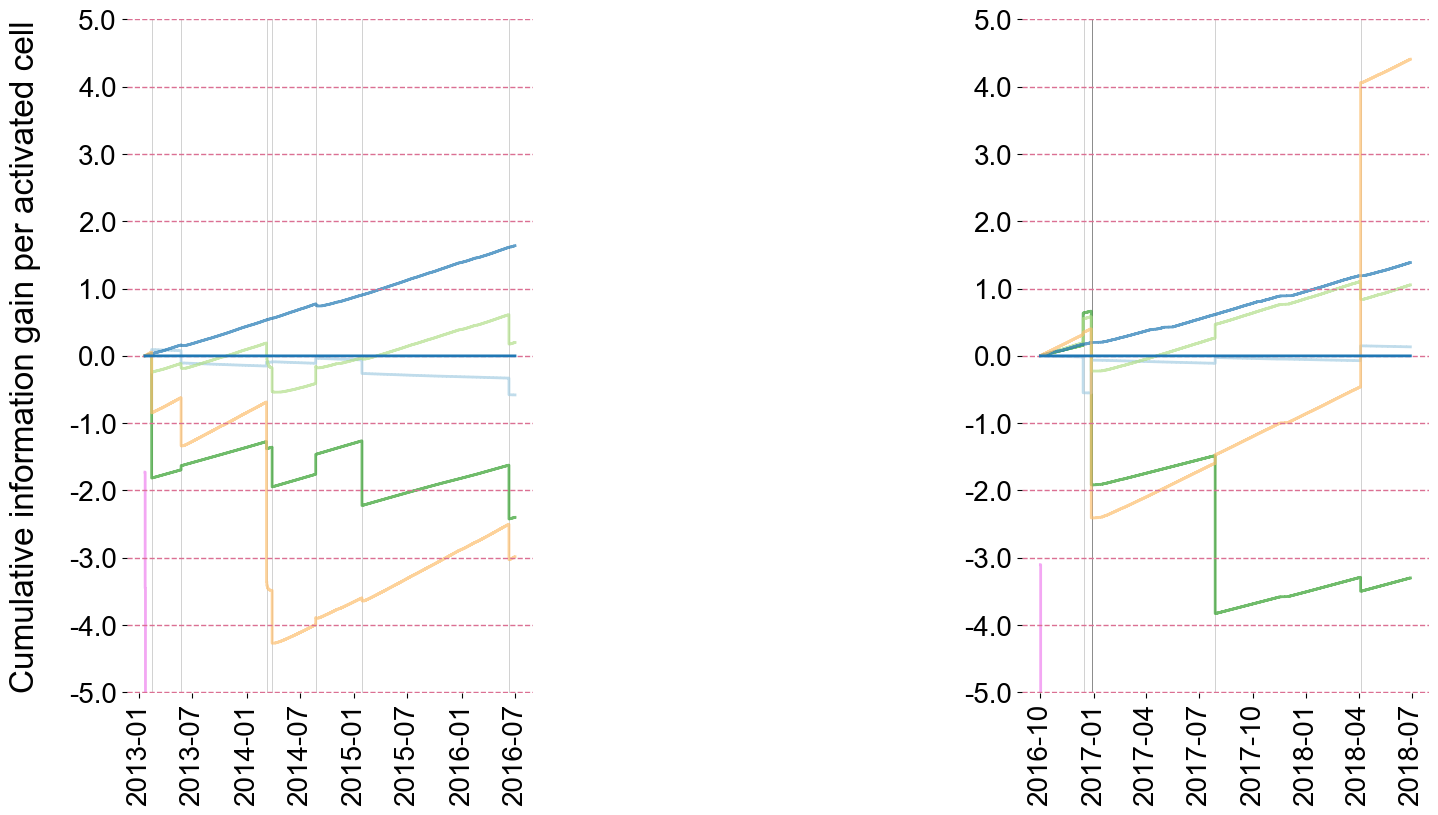

In [264]:
fig, ((ax_5,ax_6)) = plt.subplots(nrows=1, ncols=2, figsize=(14,7.5))
fig.tight_layout()

ax_5.set_ylim(-5.01, 5.01)
ax_5.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred')
ax_5.set_ylabel('Cumulative information gain per activated cell', fontsize=24, labelpad=20)

for i in range(len(cat_aux5ss.get_datetimes())):
    ax_5.axvline(cat_aux5ss.get_datetimes()[i], color='k', linewidth=0.5, zorder=0, alpha=0.25)

ax_5.step(joli_5ssdates, np.zeros(len(joli_5ssdates)), zorder=2, alpha=1, linewidth=2, color='#1f77b4', where='mid')
ax_5.step(joli_5ssdates, np.cumsum(joli_5ss.joli_KJSSFiveYear.values - joli_5ss.joli_HKJ5.values) / len(np.unique(cat_aux5ss.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#EE82EE', where='mid')
ax_5.step(joli_5ssdates, np.cumsum(joli_5ss.joli_JANUSOneDayEEPAS1F.values - joli_5ss.joli_HKJ5.values) / len(np.unique(cat_aux5ss.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#33a02c', where='mid')
ax_5.step(joli_5ssdates, np.cumsum(joli_5ss.joli_JANUSOneDayPPE.values - joli_5ss.joli_HKJ5.values) / len(np.unique(cat_aux5ss.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#a6cee3', where='mid')

ax_5.step(joli_5ssdates, np.cumsum(joli_5ss.joli_JANUSOneDay.values - joli_5ss.joli_HKJ5.values) / len(np.unique(cat_aux5ss.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#b2df8a', where='mid')
ax_5.step(joli_5sssdates, np.cumsum(joli_5sss.joli_SE2OneDay.values - joli_5sss.joli_HKJ_SE2OneDay.values) / len(np.unique(cat_aux5sss.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#1f78b4', where='mid')

ax_5.step(joli_5ssdates, np.cumsum(joli_5ss.joli_JANUSOneDayTV.values - joli_5ss.joli_HKJ5.values) / len(np.unique(cat_aux5ss.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#fdbf6f', where='mid')

plt.setp(ax_5.spines.values(), color="None")
ax_5.yaxis.set_ticks(np.arange(-5.0, 5.01, step=1.0))
ax_5.set_yticklabels(['-5.0', '-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0'])

for tick in ax_5.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.label1.set_rotation(90)

for tick in ax_5.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20) 

ax_6.set_ylim(-5.01, 5.01)
ax_6.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred')

for i in range(len(cat_aux6ss.get_datetimes())):
    ax_6.axvline(cat_aux6ss.get_datetimes()[i], color='k', linewidth=0.5, zorder=0, alpha=0.25)


ax_6.step(joli_6ssdates, np.zeros(len(joli_6ssdates)), zorder=2, alpha=1, linewidth=2, color='#1f77b4', where='mid')
ax_6.step(joli_6ssdates, np.cumsum(joli_6ss.joli_KJSSFiveYear.values - joli_6ss.joli_HKJ5.values) / len(np.unique(cat_aux6ss.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#EE82EE', where='mid')
ax_6.step(joli_6ssdates, np.cumsum(joli_6ss.joli_JANUSOneDayEEPAS1F.values - joli_6ss.joli_HKJ5.values) / len(np.unique(cat_aux6ss.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#33a02c', where='mid')
ax_6.step(joli_6ssdates, np.cumsum(joli_6ss.joli_JANUSOneDayPPE.values - joli_6ss.joli_HKJ5.values) / len(np.unique(cat_aux6ss.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#a6cee3', where='mid')
ax_6.step(joli_6ssdates, np.cumsum(joli_6ss.joli_JANUSOneDay.values - joli_6ss.joli_HKJ5.values) / len(np.unique(cat_aux6ss.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#b2df8a', where='mid')

ax_6.step(joli_6sssdates, np.cumsum(joli_6sss.joli_SE2OneDay.values - joli_6sss.joli_HKJ_SE2OneDay.values) / len(np.unique(cat_aux6sss.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#1f78b4', where='mid')
ax_6.step(joli_6ssdates, np.cumsum(joli_6ss.joli_JANUSOneDayTV.values - joli_6ss.joli_HKJ5.values) / len(np.unique(cat_aux6ss.get_spatial_idx())), zorder=1, alpha=0.7, linewidth=2, color='#fdbf6f', where='mid')

plt.setp(ax_6.spines.values(), color="None")
ax_6.yaxis.set_ticks(np.arange(-5.0, 5.01, step=1.0))
ax_6.set_yticklabels(['-5.0', '-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0'])

for tick in ax_6.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.label1.set_rotation(90)

for tick in ax_6.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    
plt.subplots_adjust(wspace=1.2)

plt.savefig('expected_outputs/FigureS7.png', dpi=150, bbox_inches = 'tight')

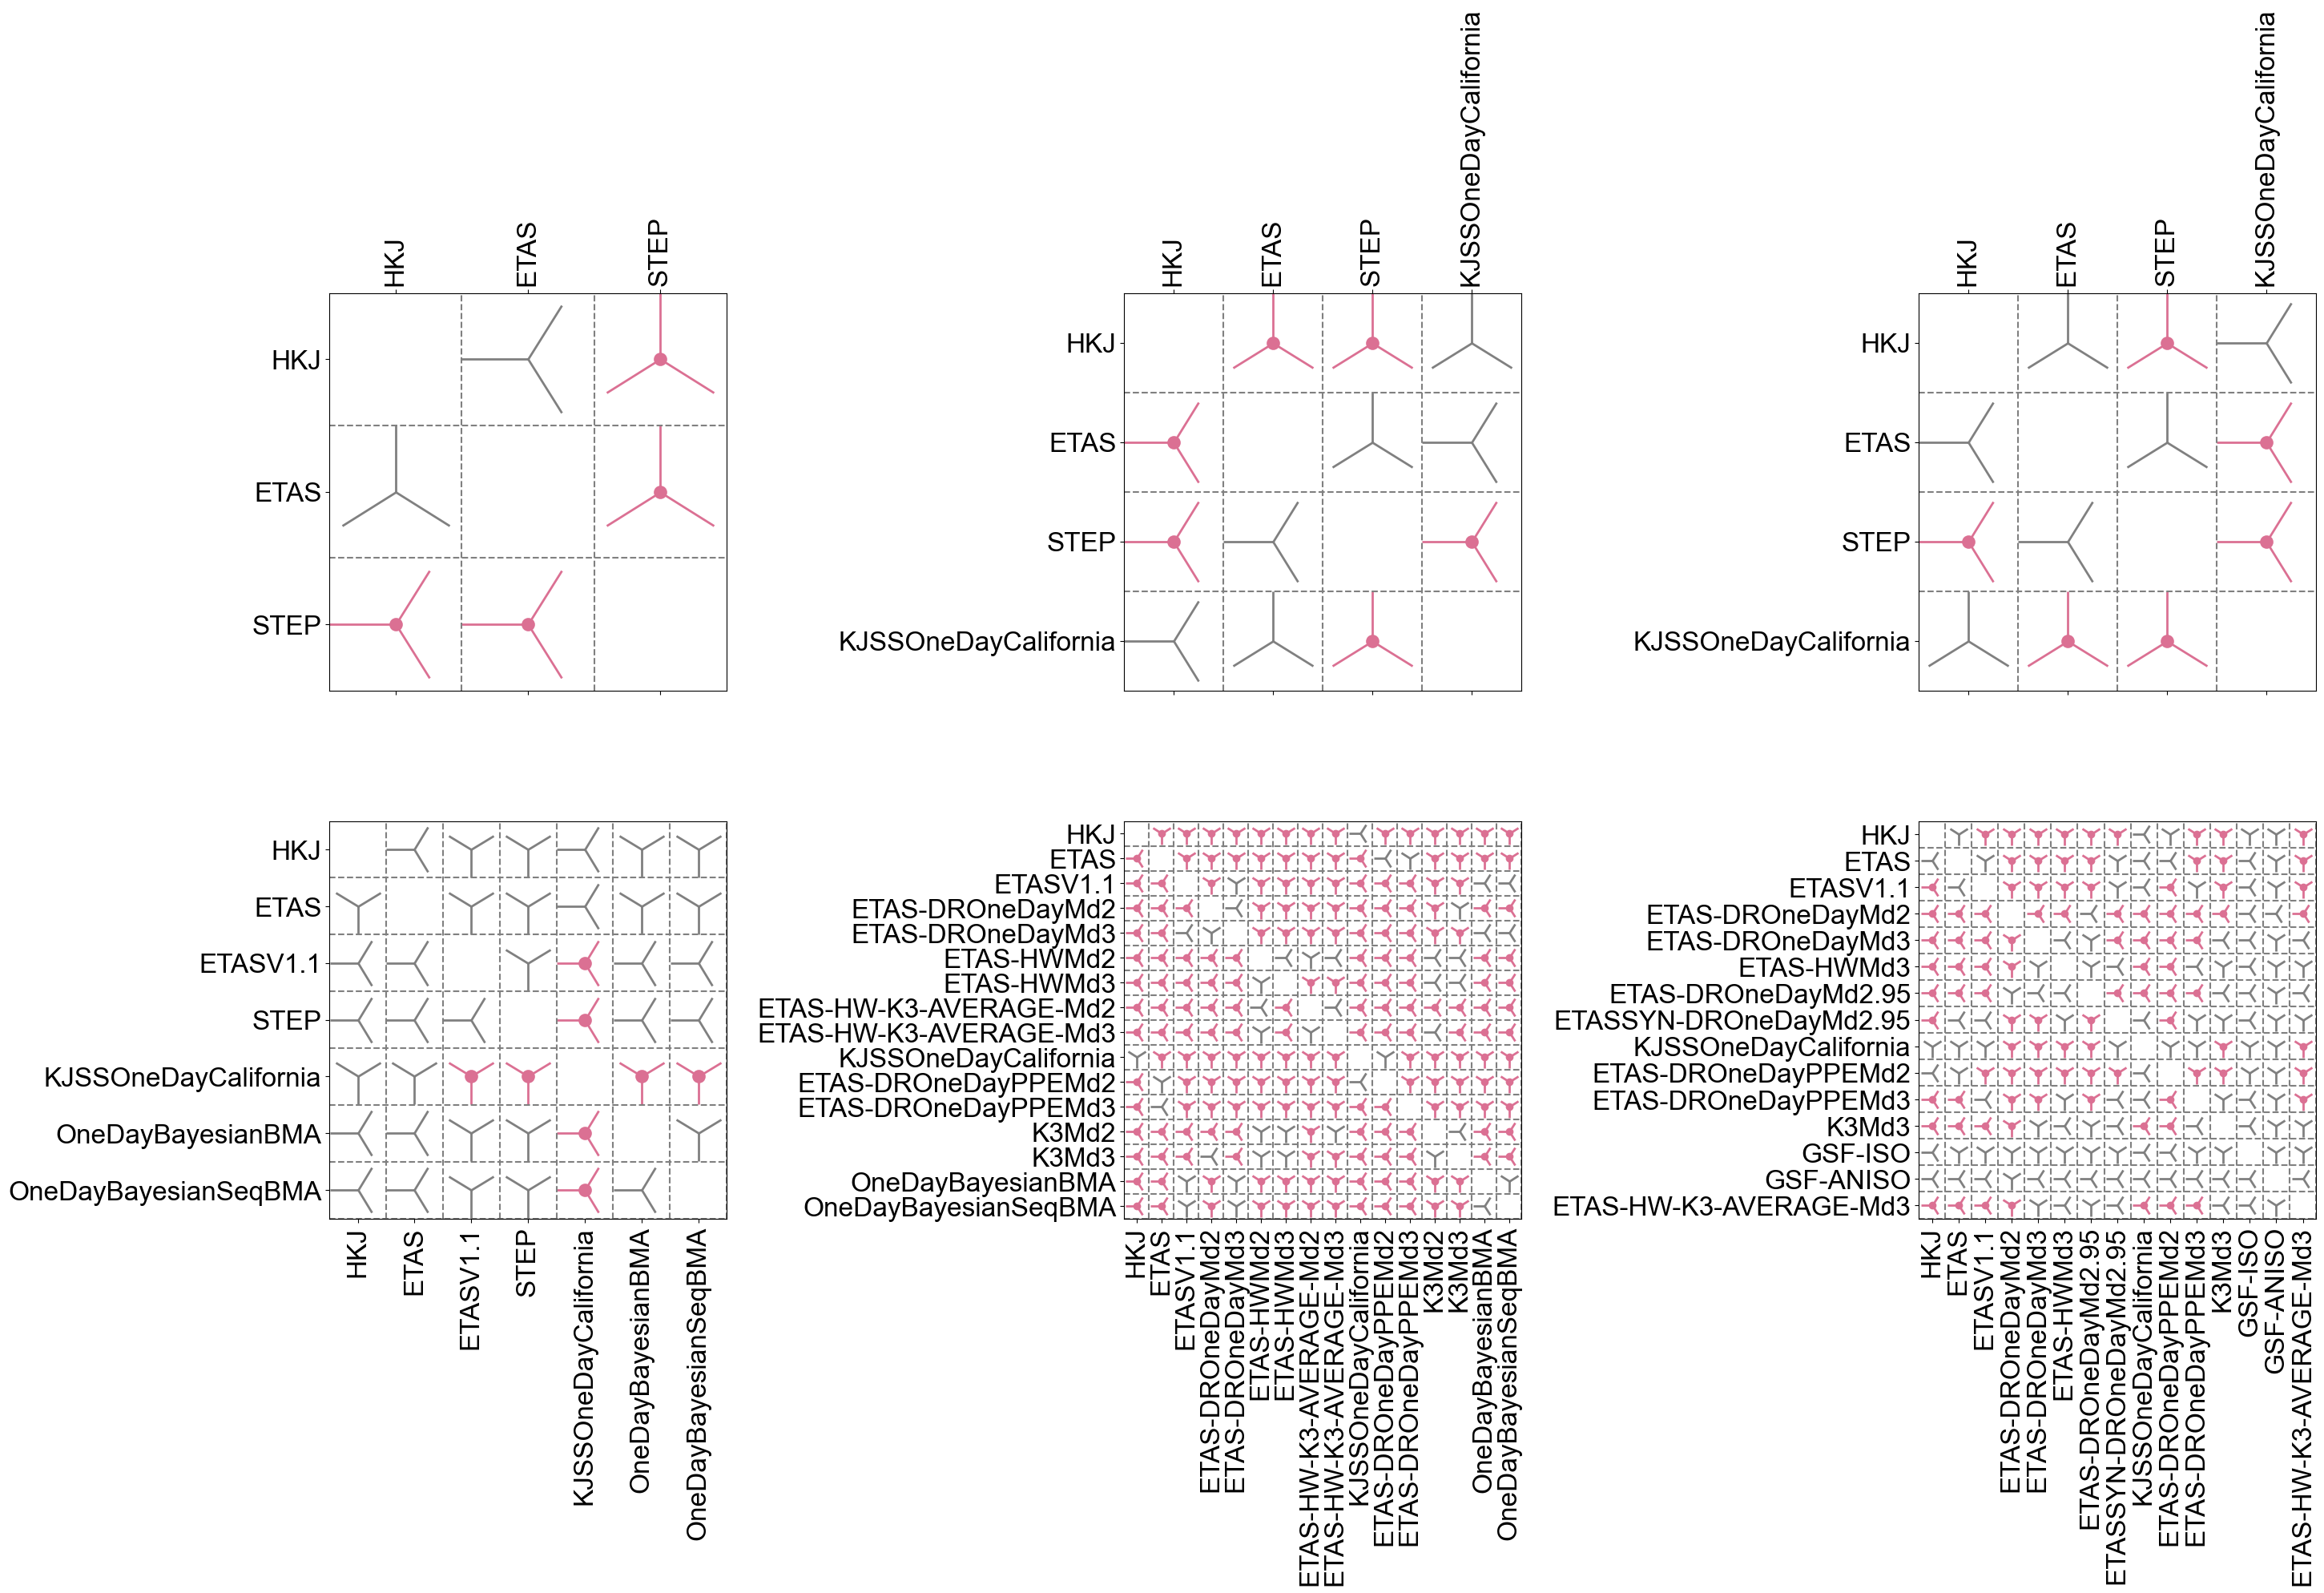

In [265]:
fig, ((ax_1,ax_2,ax_3) ,(ax_4,ax_5,ax_6)) = plt.subplots(nrows=2, ncols=3, figsize=(32,16))

value1= 24
value2= 22
value3 = 12
mj1 = np.arange(1,np.shape(joli_1)[1],2)

matrix_joli1 = []
for j in mj1:
    for i in mj1:
        matrix_joli1.append(stats.ttest_rel(joli_1.loc[:,joli_1.columns.values[j]], joli_1.loc[:,joli_1.columns.values[i]]))
       
matrix_pv1 = []
for i in range(len(matrix_joli1)):
    matrix_pv1.append(matrix_joli1[i].pvalue)


igpa1 = []
for j in mj1:
    for i in mj1:
        igpa1.append(sum(joli_1.loc[:, joli_1.columns.values[j]] - joli_1.loc[:, joli_1.columns.values[i]]) / len(np.unique(cat_aux1.get_spatial_idx())))

matrix_pv1_aux = np.reshape(matrix_pv1, (3,3))
igpa1_aux = np.reshape(igpa1, (3,3))
im = ax_1.matshow(matrix_pv1_aux, alpha=0)

for j in range(3): # row
    for i in range(3): #column
        if j != i: 
            if igpa1_aux[j, i] >= 0.0 and matrix_pv1_aux[j, i] <= 0.05 and j < i: # competing model is statistically more informative than reference model
                ax_1.plot(j, i, marker="2", color='palevioletred', markersize=120, alpha=1, markeredgewidth=2)
                ax_1.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa1_aux[j,i] >= 0.0 and matrix_pv1_aux[j,i] <= 0.05 and j > i: # competing model is statistically more informative than reference model
                ax_1.plot(j, i, marker="2", color='palevioletred', markersize=120, alpha=1, markeredgewidth=2)
                ax_1.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa1_aux[j,i] < 0.0 and matrix_pv1_aux[j,i] <= 0.05 and j < i: # competing model is statistically less informative than reference model
                ax_1.plot(j, i, marker="3", color='palevioletred', markersize=120, alpha=1, markeredgewidth=2)
                ax_1.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa1_aux[j,i] < 0.0 and matrix_pv1_aux[j,i] <= 0.05 and j > i: # competing model is statistically less informative than reference model
                ax_1.plot(j, i, marker= "3", color='palevioletred', markersize=120, alpha=1, markeredgewidth=2)
                ax_1.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            
            elif igpa1_aux[j,i] >= 0.0 and matrix_pv1_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_1.plot(j, i, marker="2", color='grey', markersize=120, alpha=1, markeredgewidth=2)
            elif igpa1_aux[j,i] >= 0.0 and matrix_pv1_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_1.plot(j, i, marker="2", color='grey', markersize=120, alpha=1, markeredgewidth=2)   
            elif igpa1_aux[j,i] < 0.0 and matrix_pv1_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_1.plot(j, i, marker="3", color='grey', markersize=120, alpha=1, markeredgewidth=2)  
            elif igpa1_aux[j,i] < 0.0 and matrix_pv1_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_1.plot(j, i, marker= "3", color='grey', markersize=120, alpha=1, markeredgewidth=2)

ax_1.set_yticklabels(['', 'HKJ', 'ETAS', 'STEP'], fontsize=value1)
ax_1.set_xticklabels(['', 'HKJ', 'ETAS', 'STEP'], fontsize=value1, rotation=90)

for i in range(2):
    ax_1.axvline(x= i + 0.5, ymin=0, ymax=1, color='grey', linestyle='--')
    ax_1.axhline(xmin=0, xmax=1, y = i + 0.5, color='grey', linestyle='--')   

mj2 = np.arange(1,np.shape(joli_2)[1],2)
matrix_joli2 = []
for j in mj2:
    for i in mj2:
        matrix_joli2.append(stats.ttest_rel(joli_2.loc[:,joli_2.columns.values[j]], joli_2.loc[:,joli_2.columns.values[i]]))

matrix_pv2 = []
for i in range(len(matrix_joli2)):
    matrix_pv2.append(matrix_joli2[i].pvalue) 

igpa2 = []
for j in mj2:
    for i in mj2:
        igpa2.append(sum(joli_2.loc[:, joli_2.columns.values[j]] - joli_2.loc[:, joli_2.columns.values[i]]) / len(np.unique(cat_aux2.get_spatial_idx())))


matrix_pv2_aux = np.reshape(matrix_pv2, (4,4))
igpa2_aux = np.reshape(igpa2, (4,4))
im2 = ax_2.matshow(matrix_pv2_aux, alpha=0)  

for j in range(4): # row
    for i in range(4): #column
        if j != i: 
            if igpa2_aux[j, i] >= 0.0 and matrix_pv2_aux[j, i] <= 0.05 and j < i: # competing model is statistically more informative than reference model
                ax_2.plot(j, i, marker="2", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_2.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa2_aux[j,i] >= 0.0 and matrix_pv2_aux[j,i] <= 0.05 and j > i: # competing model is statistically more informative than reference model
                ax_2.plot(j, i, marker="2", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_2.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa2_aux[j,i] < 0.0 and matrix_pv2_aux[j,i] <= 0.05 and j < i: # competing model is statistically less informative than reference model
                ax_2.plot(j, i, marker="3", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_2.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa2_aux[j,i] < 0.0 and matrix_pv2_aux[j,i] <= 0.05 and j > i: # competing model is statistically less informative than reference model
                ax_2.plot(j, i, marker= "3", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_2.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            
            elif igpa2_aux[j,i] >= 0.0 and matrix_pv2_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_2.plot(j, i, marker="2", color='grey', markersize=90, alpha=1, markeredgewidth=2)
            elif igpa2_aux[j,i] >= 0.0 and matrix_pv2_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_2.plot(j, i, marker="2", color='grey', markersize=90, alpha=1, markeredgewidth=2)
            elif igpa2_aux[j,i] < 0.0 and matrix_pv2_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_2.plot(j, i, marker="3", color='grey', markersize=90, alpha=1, markeredgewidth=2)
            elif igpa2_aux[j,i] < 0.0 and matrix_pv2_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_2.plot(j, i, marker= "3", color='grey', markersize=90, alpha=1, markeredgewidth=2)

ax_2.set_yticklabels(['', 'HKJ', 'ETAS', 'STEP', 'KJSSOneDayCalifornia'], fontsize=value1)
ax_2.set_xticklabels(['', 'HKJ', 'ETAS', 'STEP', 'KJSSOneDayCalifornia'], fontsize=value1, rotation=90)

for i in range(3):
    ax_2.axvline(x= i + 0.5, ymin=0, ymax=1, color='grey', linestyle='--')
    ax_2.axhline(xmin=0, xmax=1, y = i + 0.5, color='grey', linestyle='--')   

mj3 = np.arange(1,np.shape(joli_3)[1],2)
matrix_joli3 = []
for j in mj3:
    for i in mj3:
        matrix_joli3.append(stats.ttest_rel(joli_3.loc[:,joli_3.columns.values[j]], joli_3.loc[:,joli_3.columns.values[i]]))

matrix_pv3 = []
for i in range(len(matrix_joli3)):
    matrix_pv3.append(matrix_joli3[i].pvalue) 

igpa3 = []
for j in mj3:
    for i in mj3:
        igpa3.append(sum(joli_3.loc[:, joli_3.columns.values[j]] - joli_3.loc[:, joli_3.columns.values[i]]) / len(np.unique(cat_aux3.get_spatial_idx())))


matrix_pv3_aux = np.reshape(matrix_pv3, (4,4))
igpa3_aux = np.reshape(igpa3, (4,4))
im3 = ax_3.matshow(matrix_pv3_aux, alpha=0)  

for j in range(4): # row
    for i in range(4): #column
        if j != i: 
            if igpa3_aux[j, i] >= 0.0 and matrix_pv3_aux[j, i] <= 0.05 and j < i: # competing model is statistically more informative than reference model
                ax_3.plot(j, i, marker="2", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_3.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa3_aux[j,i] >= 0.0 and matrix_pv3_aux[j,i] <= 0.05 and j > i: # competing model is statistically more informative than reference model
                ax_3.plot(j, i, marker="2",  color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_3.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa3_aux[j,i] < 0.0 and matrix_pv3_aux[j,i] <= 0.05 and j < i: # competing model is statistically less informative than reference model
                ax_3.plot(j, i, marker="3",  color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_3.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa3_aux[j,i] < 0.0 and matrix_pv3_aux[j,i] <= 0.05 and j > i: # competing model is statistically less informative than reference model
                ax_3.plot(j, i, marker= "3", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_3.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            
            elif igpa3_aux[j,i] >= 0.0 and matrix_pv3_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_3.plot(j, i, marker="2",  color='grey', markersize=90, alpha=1, markeredgewidth=2)
            elif igpa3_aux[j,i] >= 0.0 and matrix_pv3_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_3.plot(j, i, marker="2",  color='grey', markersize=90, alpha=1, markeredgewidth=2)
            elif igpa3_aux[j,i] < 0.0 and matrix_pv3_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_3.plot(j, i, marker="3",  color='grey', markersize=90, alpha=1, markeredgewidth=2)
            elif igpa3_aux[j,i] < 0.0 and matrix_pv3_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_3.plot(j, i, marker= "3", color='grey', markersize=90, alpha=1, markeredgewidth=2)

ax_3.set_yticklabels(['', 'HKJ', 'ETAS', 'STEP', 'KJSSOneDayCalifornia'], fontsize=value1)
ax_3.set_xticklabels(['', 'HKJ', 'ETAS', 'STEP', 'KJSSOneDayCalifornia'], fontsize=value1, rotation=90)

for i in range(3):
    ax_3.axvline(x= i + 0.5, ymin=0, ymax=1, color='grey', linestyle='--')
    ax_3.axhline(xmin=0, xmax=1, y = i + 0.5, color='grey', linestyle='--')   

mj4 = np.arange(1,np.shape(joli_4)[1],2)
matrix_joli4 = []
for j in mj4:
    for i in mj4:
        matrix_joli4.append(stats.ttest_rel(joli_4.loc[:,joli_4.columns.values[j]], joli_4.loc[:,joli_4.columns.values[i]]))

matrix_pv4 = []
for i in range(len(matrix_joli4)):
    matrix_pv4.append(matrix_joli4[i].pvalue) 

igpa4 = []
for j in mj4:
    for i in mj4:
        igpa4.append(sum(joli_4.loc[:, joli_4.columns.values[j]] - joli_4.loc[:, joli_4.columns.values[i]]) / len(np.unique(cat_aux4.get_spatial_idx())))

matrix_pv4_aux = np.reshape(matrix_pv4, (7,7))
igpa4_aux = np.reshape(igpa4, (7,7))
im4 = ax_4.matshow(matrix_pv4_aux, alpha=0)  

for j in range(7): # row
    for i in range(7): #column
        if j != i: 
            if igpa4_aux[j, i] >= 0.0 and matrix_pv4_aux[j, i] <= 0.05 and j < i: # competing model is statistically more informative than reference model
                ax_4.plot(j, i, marker="1",  color='palevioletred', markersize=50, alpha=1, markeredgewidth=2)
                ax_4.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa4_aux[j,i] >= 0.0 and matrix_pv4_aux[j,i] <= 0.05 and j > i: # competing model is statistically more informative than reference model
                ax_4.plot(j, i, marker="1",  color='palevioletred', markersize=50, alpha=1, markeredgewidth=2)
                ax_4.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa4_aux[j,i] < 0.0 and matrix_pv4_aux[j,i] <= 0.05 and j < i: # competing model is statistically less informative than reference model
                ax_4.plot(j, i, marker="3",  color='palevioletred', markersize=50, alpha=1, markeredgewidth=2)
                ax_4.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa4_aux[j,i] < 0.0 and matrix_pv4_aux[j,i] <= 0.05 and j > i: # competing model is statistically less informative than reference model
                ax_4.plot(j, i, marker= "3", color='palevioletred', markersize=50, alpha=1, markeredgewidth=2)
                ax_4.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            
            elif igpa4_aux[j,i] >= 0.0 and matrix_pv4_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_4.plot(j, i, marker="1",  color='grey', markersize=50, alpha=1, markeredgewidth=2)
            elif igpa4_aux[j,i] >= 0.0 and matrix_pv4_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_4.plot(j, i, marker="1",  color='grey', markersize=50, alpha=1, markeredgewidth=2) 
            elif igpa4_aux[j,i] < 0.0 and matrix_pv4_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_4.plot(j, i, marker="3",  color='grey',markersize=50, alpha=1, markeredgewidth=2) 
            elif igpa4_aux[j,i] < 0.0 and matrix_pv4_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_4.plot(j, i, marker="3", color='grey', markersize=50, alpha=1, markeredgewidth=2)

ax_4.set_yticklabels(['', 'HKJ', 'ETAS', 'ETASV1.1', 'STEP', 
                      'KJSSOneDayCalifornia','OneDayBayesianBMA', 'OneDayBayesianSeqBMA'], fontsize=value1)
ax_4.set_xticklabels(['', 'HKJ', 'ETAS', 'ETASV1.1', 'STEP', 
                      'KJSSOneDayCalifornia','OneDayBayesianBMA', 'OneDayBayesianSeqBMA'], fontsize=value1, rotation=90)
ax_4.xaxis.set_ticks_position("bottom")

for i in range(7):
    ax_4.axvline(x= i + 0.5, ymin=0, ymax=1, color='grey', linestyle='--')
    ax_4.axhline(xmin=0, xmax=1, y = i + 0.5, color='grey', linestyle='--')


mj5 = np.arange(1,np.shape(joli_5)[1],2)
matrix_joli5 = []
for j in mj5:
    for i in mj5:
        matrix_joli5.append(stats.ttest_rel(joli_5.loc[:,joli_5.columns.values[j]], joli_5.loc[:,joli_5.columns.values[i]]))

matrix_pv5 = []
for i in range(len(matrix_joli5)):
    matrix_pv5.append(matrix_joli5[i].pvalue) 

igpa5 = []
for j in mj5:
    for i in mj5:
        igpa5.append(sum(joli_5.loc[:, joli_5.columns.values[j]] - joli_5.loc[:, joli_5.columns.values[i]]) / len(np.unique(cat_aux5.get_spatial_idx())))
        
matrix_pv5_aux = np.reshape(matrix_pv5, (16,16))
igpa5_aux = np.reshape(igpa5, (16,16))
im5 = ax_5.matshow(matrix_pv5_aux, alpha=0)  

for j in range(16): # row
    for i in range(16): #column
        if j != i: 
            if igpa5_aux[j, i] >= 0.0 and matrix_pv5_aux[j, i] <= 0.05 and j < i: # competing model is statistically more informative than reference model
                ax_5.plot(j, i, marker="1",  color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
                ax_5.plot(j, i, marker=".", color='palevioletred', markersize=10, alpha=1, markeredgewidth=2)
            elif igpa5_aux[j,i] >= 0.0 and matrix_pv5_aux[j,i] <= 0.05 and j > i: # competing model is statistically more informative than reference model
                ax_5.plot(j, i, marker="1",  color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
                ax_5.plot(j, i, marker=".", color='palevioletred', markersize=10, alpha=1, markeredgewidth=2)
            elif igpa5_aux[j,i] < 0.0 and matrix_pv5_aux[j,i] <= 0.05 and j < i: # competing model is statistically less informative than reference model
                ax_5.plot(j, i, marker="3",  color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
                ax_5.plot(j, i, marker=".", color='palevioletred', markersize=10, alpha=1, markeredgewidth=2)
            elif igpa5_aux[j,i] < 0.0 and matrix_pv5_aux[j,i] <= 0.05 and j > i: # competing model is statistically less informative than reference model
                ax_5.plot(j, i, marker= "3", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
                ax_5.plot(j, i, marker=".", color='palevioletred', markersize=10, alpha=1, markeredgewidth=2)
            
            elif igpa5_aux[j,i] >= 0.0 and matrix_pv5_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_5.plot(j, i, marker="1",  color='grey', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa5_aux[j,i] >= 0.0 and matrix_pv5_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_5.plot(j, i, marker="1",  color='grey', markersize=20, alpha=1, markeredgewidth=2) 
            elif igpa5_aux[j,i] < 0.0 and matrix_pv5_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_5.plot(j, i, marker="3",  color='grey',markersize=20, alpha=1, markeredgewidth=2) 
            elif igpa5_aux[j,i] < 0.0 and matrix_pv5_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_5.plot(j, i, marker="3", color='grey', markersize=20, alpha=1, markeredgewidth=2)

ax_5.set_yticklabels(['HKJ', 'ETAS', 'ETASV1.1', 'ETAS-DROneDayMd2',
                      'ETAS-DROneDayMd3', 'ETAS-HWMd2', 'ETAS-HWMd3', 'ETAS-HW-K3-AVERAGE-Md2', 
                      'ETAS-HW-K3-AVERAGE-Md3', 'KJSSOneDayCalifornia', 'ETAS-DROneDayPPEMd2', 'ETAS-DROneDayPPEMd3',
                      'K3Md2', 'K3Md3', 'OneDayBayesianBMA', 'OneDayBayesianSeqBMA'], fontsize=value1)

ax_5.set_xticklabels(['HKJ', 'ETAS', 'ETASV1.1', 'ETAS-DROneDayMd2',
                      'ETAS-DROneDayMd3', 'ETAS-HWMd2', 'ETAS-HWMd3', 'ETAS-HW-K3-AVERAGE-Md2', 
                      'ETAS-HW-K3-AVERAGE-Md3', 'KJSSOneDayCalifornia', 'ETAS-DROneDayPPEMd2', 'ETAS-DROneDayPPEMd3',
                      'K3Md2', 'K3Md3', 'OneDayBayesianBMA', 'OneDayBayesianSeqBMA'], fontsize=value1, rotation=90)

ax_5.xaxis.set_ticks(np.arange(0, 16, 1))
ax_5.yaxis.set_ticks(np.arange(0, 16, 1))

ax_5.xaxis.set_ticks_position("bottom")
for i in range(16):
    ax_5.axvline(x= i + 0.5, ymin=0, ymax=1, color='grey', linestyle='--')
    ax_5.axhline(xmin=0, xmax=1, y = i + 0.5, color='grey', linestyle='--')  


mj6 = np.arange(1,np.shape(joli_6)[1],2)
matrix_joli6 = []
for j in mj6:
    for i in mj6:
        matrix_joli6.append(stats.ttest_rel(joli_6.loc[:,joli_6.columns.values[j]], joli_6.loc[:,joli_6.columns.values[i]]))

matrix_pv6 = []
for i in range(len(matrix_joli6)):
    matrix_pv6.append(matrix_joli6[i].pvalue) 

igpa6 = []
for j in mj6:
    for i in mj6:
        igpa6.append(sum(joli_6.loc[:, joli_6.columns.values[j]] - joli_6.loc[:, joli_6.columns.values[i]]) / len(np.unique(cat_aux6.get_spatial_idx())))

matrix_pv6_aux = np.reshape(matrix_pv6, (15,15))
igpa6_aux = np.reshape(igpa6, (15,15))
im6 = ax_6.matshow(matrix_pv6_aux, alpha=0)  

                
for j in range(15): # row
    for i in range(15): #column
        if j != i: 
            if igpa6_aux[j, i] >= 0.0 and matrix_pv6_aux[j, i] <= 0.05 and j < i: # competing model is statistically more informative than reference model
                ax_6.plot(j, i, marker="1",  color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
                ax_6.plot(j, i, marker=".", color='palevioletred', markersize=10, alpha=1, markeredgewidth=2)
            elif igpa6_aux[j,i] >= 0.0 and matrix_pv6_aux[j,i] <= 0.05 and j > i: # competing model is statistically more informative than reference model
                ax_6.plot(j, i, marker="1",  color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
                ax_6.plot(j, i, marker=".", color='palevioletred', markersize=10, alpha=1, markeredgewidth=2)
            elif igpa6_aux[j,i] < 0.0 and matrix_pv6_aux[j,i] <= 0.05 and j < i: # competing model is statistically less informative than reference model
                ax_6.plot(j, i, marker="3",  color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
                ax_6.plot(j, i, marker=".", color='palevioletred', markersize=10, alpha=1, markeredgewidth=2)
            elif igpa6_aux[j,i] < 0.0 and matrix_pv6_aux[j,i] <= 0.05 and j > i: # competing model is statistically less informative than reference model
                ax_6.plot(j, i, marker= "3", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
                ax_6.plot(j, i, marker=".", color='palevioletred', markersize=10, alpha=1, markeredgewidth=2)
            
            elif igpa6_aux[j,i] >= 0.0 and matrix_pv6_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_6.plot(j, i, marker="1",  color='grey', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa6_aux[j,i] >= 0.0 and matrix_pv6_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_6.plot(j, i, marker="1",  color='grey', markersize=20, alpha=1, markeredgewidth=2) 
            elif igpa6_aux[j,i] < 0.0 and matrix_pv6_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_6.plot(j, i, marker="3",  color='grey',markersize=20, alpha=1, markeredgewidth=2) 
            elif igpa6_aux[j,i] < 0.0 and matrix_pv6_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_6.plot(j, i, marker="3", color='grey', markersize=20, alpha=1, markeredgewidth=2)

ax_6.set_yticklabels(['HKJ', 'ETAS', 'ETASV1.1', 'ETAS-DROneDayMd2', 
                      'ETAS-DROneDayMd3', 'ETAS-HWMd3', 'ETAS-DROneDayMd2.95','ETASSYN-DROneDayMd2.95', 
                      'KJSSOneDayCalifornia', 'ETAS-DROneDayPPEMd2', 'ETAS-DROneDayPPEMd3', 'K3Md3',
                      'GSF-ISO', 'GSF-ANISO', 'ETAS-HW-K3-AVERAGE-Md3'], fontsize=value1)

ax_6.set_xticklabels(['HKJ', 'ETAS', 'ETASV1.1', 'ETAS-DROneDayMd2',
                      'ETAS-DROneDayMd3', 'ETAS-HWMd3', 'ETAS-DROneDayMd2.95','ETASSYN-DROneDayMd2.95',
                      'KJSSOneDayCalifornia', 'ETAS-DROneDayPPEMd2', 'ETAS-DROneDayPPEMd3', 'K3Md3',
                      'GSF-ISO', 'GSF-ANISO', 'ETAS-HW-K3-AVERAGE-Md3'], fontsize=value1, rotation=90)

ax_6.xaxis.set_ticks(np.arange(0, 15, 1))
ax_6.yaxis.set_ticks(np.arange(0, 15, 1))

ax_6.xaxis.set_ticks_position("bottom")
for i in range(15):
    ax_6.axvline(x= i + 0.5, ymin=0, ymax=1, color='grey', linestyle='--')
    ax_6.axhline(xmin=0, xmax=1, y = i + 0.5, color='grey', linestyle='--')  
    
plt.subplots_adjust(wspace=1, hspace=0.15)
plt.savefig('expected_outputs/FigureS8.png', dpi=150, bbox_inches = 'tight')

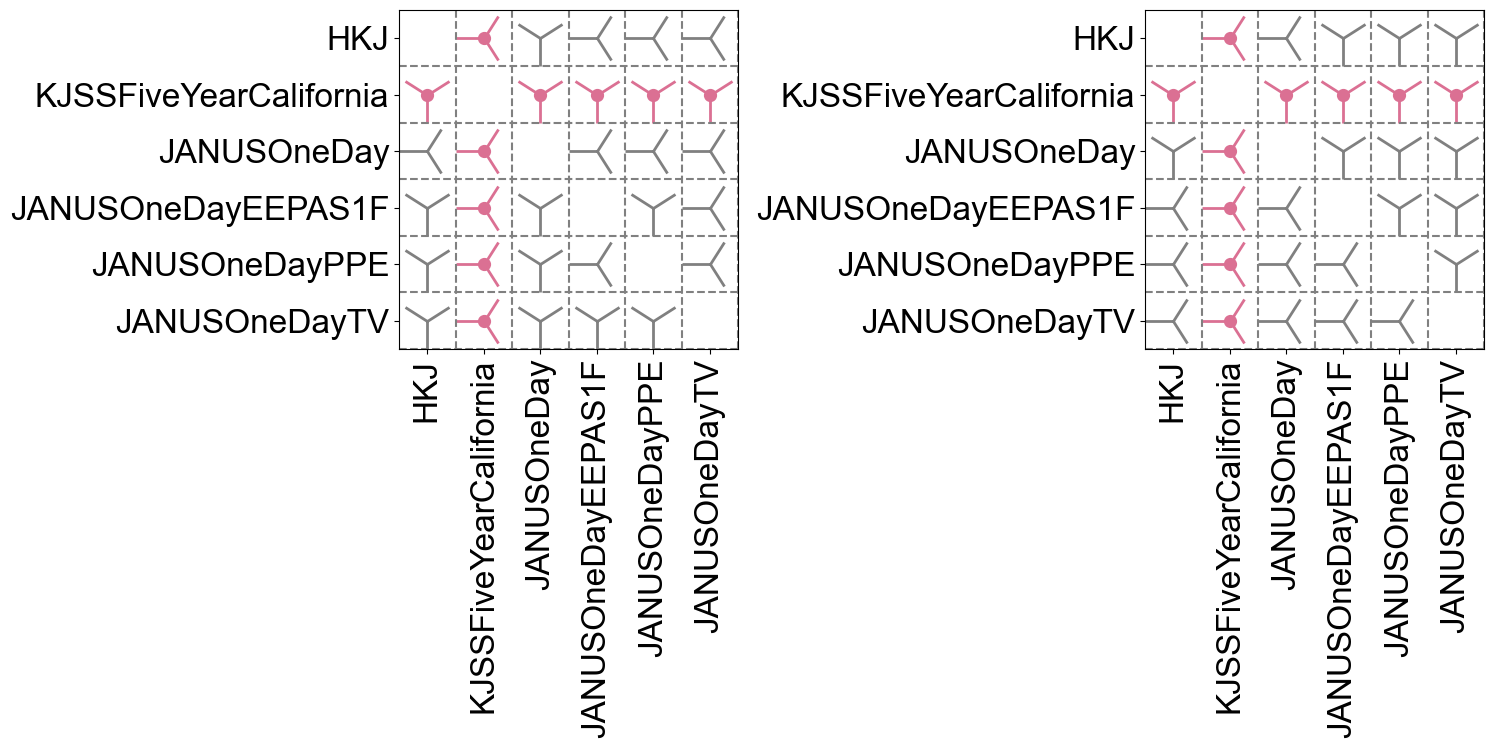

In [266]:
fig, ((ax_5ss, ax_6ss)) = plt.subplots(nrows=1, ncols=2, figsize=(14,16))

mj5ss = np.arange(1, np.shape(joli_5ss)[1],2)

matrix_joli5ss = []
for j in mj5ss:
    for i in mj5ss:
        matrix_joli5ss.append(stats.ttest_rel(joli_5ss.loc[:,joli_5ss.columns.values[j]], joli_5ss.loc[:,joli_5ss.columns.values[i]]))
       
matrix_pv5ss = []
for i in range(len(matrix_joli5ss)):
    matrix_pv5ss.append(matrix_joli5ss[i].pvalue)

igpa5ss = []
for j in mj5ss:
    for i in mj5ss:
        igpa5ss.append(sum(joli_5ss.loc[:, joli_5ss.columns.values[j]] - joli_5ss.loc[:, joli_5ss.columns.values[i]]) / len(np.unique(cat_aux5ss.get_spatial_idx())))

matrix_pv5ss_aux = np.reshape(matrix_pv5ss, (6,6))
igpa5ss_aux = np.reshape(igpa5ss, (6,6))
im = ax_5ss.matshow(matrix_pv5ss_aux, alpha=0)

for j in range(6): # row
    for i in range(6): #column
        if j != i: 
            if igpa5ss_aux[j, i] >= 0.0 and matrix_pv5ss_aux[j, i] <= 0.05 and j < i: # competing model is statistically more informative than reference model
                ax_5ss.plot(j, i, marker="1", color='palevioletred', markersize=40, alpha=1, markeredgewidth=2)
                ax_5ss.plot(j, i, marker=".", color='palevioletred', markersize=15, alpha=1, markeredgewidth=2)
            elif igpa5ss_aux[j,i] >= 0.0 and matrix_pv5ss_aux[j,i] <= 0.05 and j > i: # competing model is statistically more informative than reference model
                ax_5ss.plot(j, i, marker="1", color='palevioletred', markersize=40, alpha=1, markeredgewidth=2)
                ax_5ss.plot(j, i, marker=".", color='palevioletred', markersize=15, alpha=1, markeredgewidth=2)
            elif igpa5ss_aux[j,i] < 0.0 and matrix_pv5ss_aux[j,i] <= 0.05 and j < i: # competing model is statistically less informative than reference model
                ax_5ss.plot(j, i, marker="3", color='palevioletred', markersize=40, alpha=1, markeredgewidth=2)
                ax_5ss.plot(j, i, marker=".", color='palevioletred', markersize=15, alpha=1, markeredgewidth=2)
            elif igpa5ss_aux[j,i] < 0.0 and matrix_pv5ss_aux[j,i] <= 0.05 and j > i: # competing model is statistically less informative than reference model
                ax_5ss.plot(j, i, marker= "3", color='palevioletred', markersize=40, alpha=1, markeredgewidth=2)
                ax_5ss.plot(j, i, marker=".", color='palevioletred', markersize=15, alpha=1, markeredgewidth=2)
            
            elif igpa5ss_aux[j,i] >= 0.0 and matrix_pv5ss_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_5ss.plot(j, i, marker="1", color='grey', markersize=40, alpha=1, markeredgewidth=2)
            elif igpa5ss_aux[j,i] >= 0.0 and matrix_pv5ss_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_5ss.plot(j, i, marker="1", color='grey', markersize=40, alpha=1, markeredgewidth=2)   
            elif igpa5ss_aux[j,i] < 0.0 and matrix_pv5ss_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_5ss.plot(j, i, marker="3", color='grey', markersize=40, alpha=1, markeredgewidth=2)  
            elif igpa5ss_aux[j,i] < 0.0 and matrix_pv5ss_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_5ss.plot(j, i, marker= "3", color='grey', markersize=40, alpha=1, markeredgewidth=2)

ax_5ss.set_yticklabels(['', 'HKJ', 'KJSSFiveYearCalifornia', 'JANUSOneDay', 'JANUSOneDayEEPAS1F',
                       'JANUSOneDayPPE', 'JANUSOneDayTV'], fontsize=value1)
ax_5ss.set_xticklabels(['', 'HKJ', 'KJSSFiveYearCalifornia', 'JANUSOneDay', 'JANUSOneDayEEPAS1F',
                       'JANUSOneDayPPE', 'JANUSOneDayTV'], fontsize=value1, rotation=90)
ax_5ss.xaxis.set_ticks_position("bottom")

for i in range(6):
    ax_5ss.axvline(x= i + 0.5, ymin=0, ymax=1, color='grey', linestyle='--')
    ax_5ss.axhline(xmin=0, xmax=1, y = i + 0.5, color='grey', linestyle='--')


mj6ss = np.arange(1, np.shape(joli_6ss)[1],2)

matrix_joli6ss = []
for j in mj6ss:
    for i in mj6ss:
        matrix_joli6ss.append(stats.ttest_rel(joli_6ss.loc[:,joli_6ss.columns.values[j]], joli_6ss.loc[:,joli_6ss.columns.values[i]]))
       
matrix_pv6ss = []
for i in range(len(matrix_joli6ss)):
    matrix_pv6ss.append(matrix_joli6ss[i].pvalue)


igpa6ss = []
for j in mj6ss:
    for i in mj6ss:
        igpa6ss.append(sum(joli_6ss.loc[:, joli_6ss.columns.values[j]] - joli_6ss.loc[:, joli_6ss.columns.values[i]]) / len(np.unique(cat_aux6ss.get_spatial_idx())))

matrix_pv6ss_aux = np.reshape(matrix_pv6ss, (6,6))
igpa6ss_aux = np.reshape(igpa6ss, (6,6))
im = ax_6ss.matshow(matrix_pv6ss_aux, alpha=0)

for j in range(6): # row
    for i in range(6): #column
        if j != i: 
            if igpa6ss_aux[j, i] >= 0.0 and matrix_pv6ss_aux[j, i] <= 0.05 and j < i: # competing model is statistically more informative than reference model
                ax_6ss.plot(j, i, marker="1", color='palevioletred', markersize=40, alpha=1, markeredgewidth=2)
                ax_6ss.plot(j, i, marker=".", color='palevioletred', markersize=15, alpha=1, markeredgewidth=2)
            elif igpa6ss_aux[j,i] >= 0.0 and matrix_pv6ss_aux[j,i] <= 0.05 and j > i: # competing model is statistically more informative than reference model
                ax_6ss.plot(j, i, marker="1", color='palevioletred', markersize=40, alpha=1, markeredgewidth=2)
                ax_6ss.plot(j, i, marker=".", color='palevioletred', markersize=15, alpha=1, markeredgewidth=2)
            elif igpa6ss_aux[j,i] < 0.0 and matrix_pv6ss_aux[j,i] <= 0.05 and j < i: # competing model is statistically less informative than reference model
                ax_6ss.plot(j, i, marker="3", color='palevioletred', markersize=40, alpha=1, markeredgewidth=2)
                ax_6ss.plot(j, i, marker=".", color='palevioletred', markersize=15, alpha=1, markeredgewidth=2)
            elif igpa6ss_aux[j,i] < 0.0 and matrix_pv6ss_aux[j,i] <= 0.05 and j > i: # competing model is statistically less informative than reference model
                ax_6ss.plot(j, i, marker= "3", color='palevioletred', markersize=40, alpha=1, markeredgewidth=2)
                ax_6ss.plot(j, i, marker=".", color='palevioletred', markersize=15, alpha=1, markeredgewidth=2)
            
            elif igpa6ss_aux[j,i] >= 0.0 and matrix_pv6ss_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_6ss.plot(j, i, marker="1", color='grey', markersize=40, alpha=1, markeredgewidth=2)
            elif igpa6ss_aux[j,i] >= 0.0 and matrix_pv6ss_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_6ss.plot(j, i, marker="1", color='grey', markersize=40, alpha=1, markeredgewidth=2)   
            elif igpa6ss_aux[j,i] < 0.0 and matrix_pv6ss_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_6ss.plot(j, i, marker="3", color='grey', markersize=40, alpha=1, markeredgewidth=2)  
            elif igpa6ss_aux[j,i] < 0.0 and matrix_pv6ss_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_6ss.plot(j, i, marker= "3", color='grey', markersize=40, alpha=1, markeredgewidth=2)

ax_6ss.set_yticklabels(['', 'HKJ', 'KJSSFiveYearCalifornia', 'JANUSOneDay', 'JANUSOneDayEEPAS1F',
                       'JANUSOneDayPPE', 'JANUSOneDayTV'], fontsize=value1)
ax_6ss.set_xticklabels(['', 'HKJ', 'KJSSFiveYearCalifornia', 'JANUSOneDay', 'JANUSOneDayEEPAS1F',
                       'JANUSOneDayPPE', 'JANUSOneDayTV'], fontsize=value1, rotation=90)
ax_6ss.xaxis.set_ticks_position("bottom")

for i in range(6):
    ax_6ss.axvline(x= i + 0.5, ymin=0, ymax=1, color='grey', linestyle='--')
    ax_6ss.axhline(xmin=0, xmax=1, y = i + 0.5, color='grey', linestyle='--')
    
plt.subplots_adjust(wspace=1.2, hspace=0.3)
plt.savefig('expected_outputs/FigureS9.png', dpi=150, bbox_inches = 'tight')

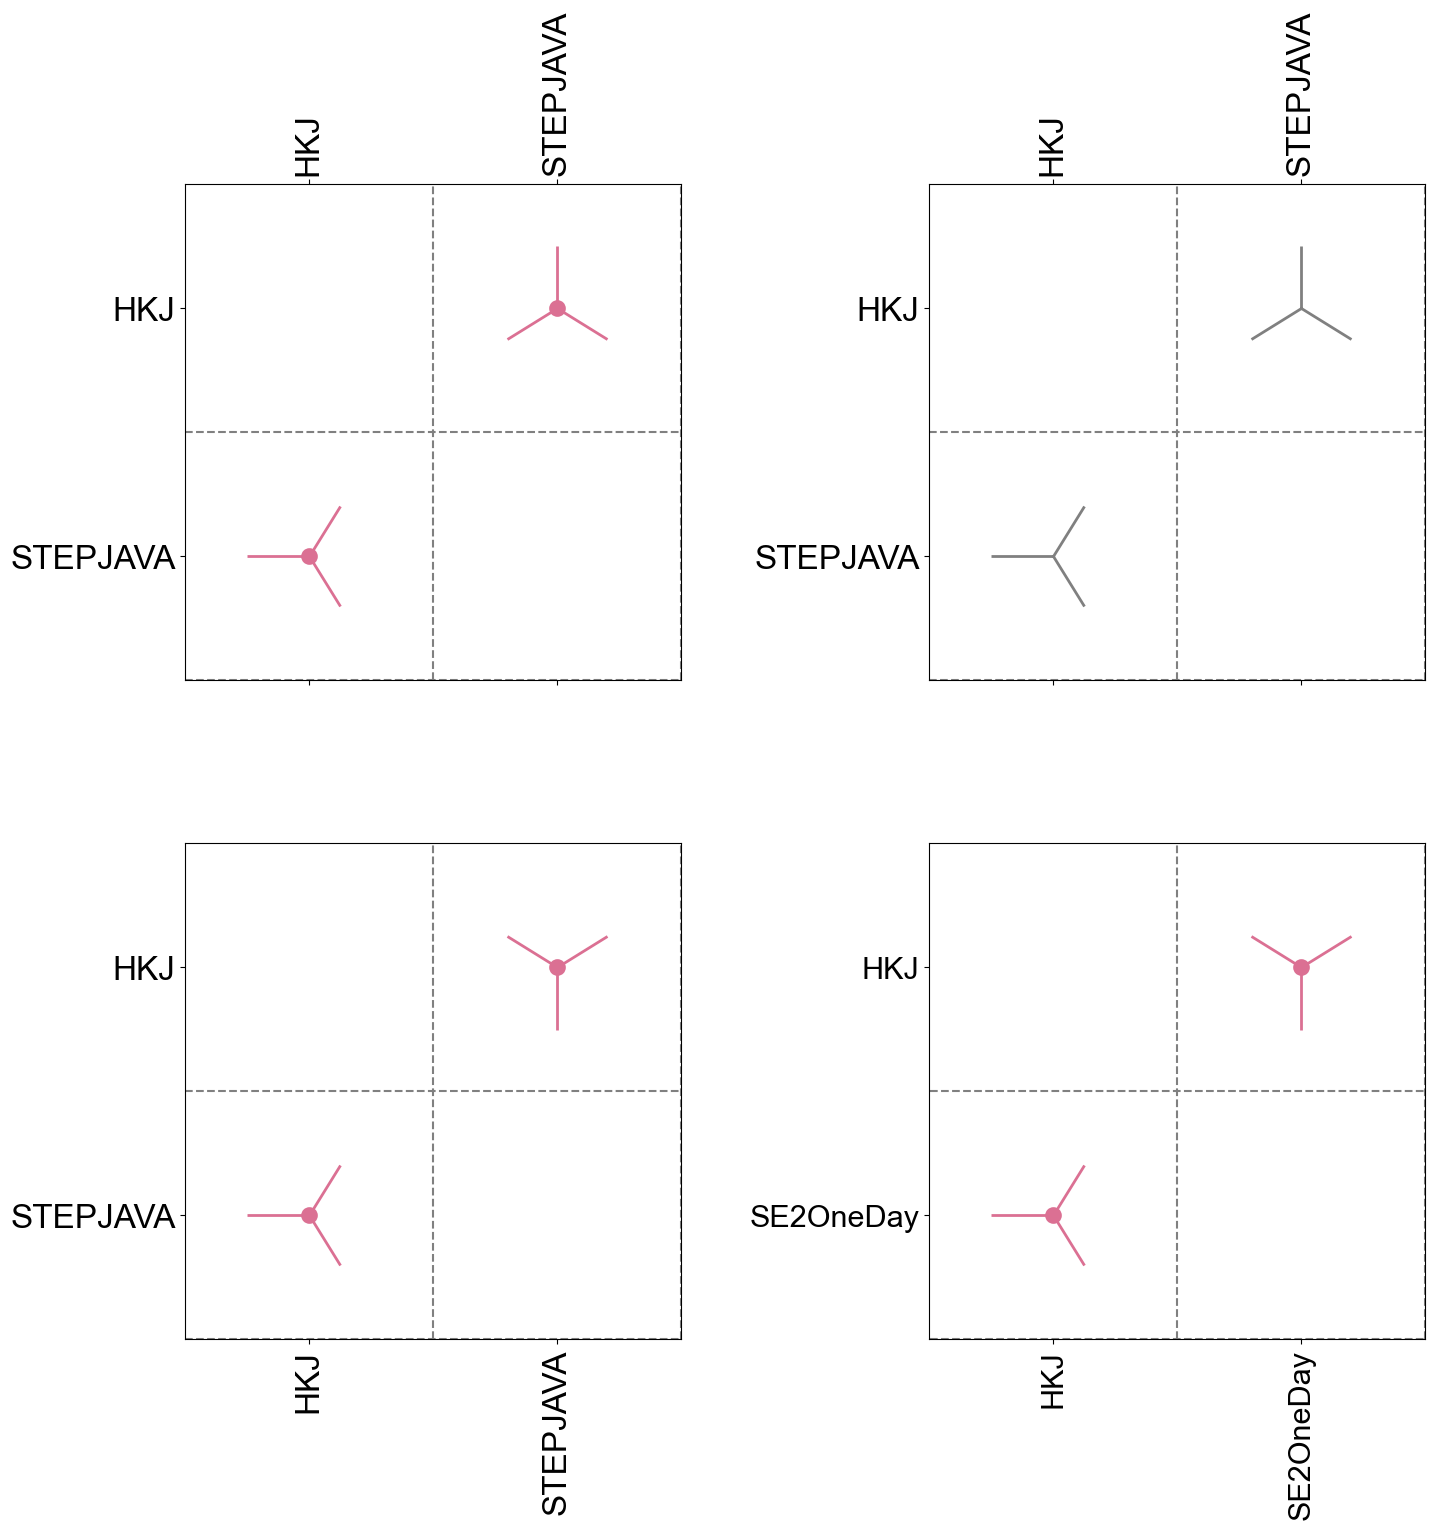

In [267]:
fig, ((ax_3s, ax_4s), (ax_5s, ax_6sss)) = plt.subplots(nrows=2, ncols=2, figsize=(16,16))

mj3s = np.arange(1,np.shape(joli_3s)[1], 2)

matrix_joli3s = []
for j in mj3s:
    for i in mj3s:
        matrix_joli3s.append(stats.ttest_rel(joli_3s.loc[:,joli_3s.columns.values[j]], joli_3s.loc[:,joli_3s.columns.values[i]]))
       
matrix_pv3s = []
for i in range(len(matrix_joli3s)):
    matrix_pv3s.append(matrix_joli3s[i].pvalue)

igpa3s = []
for j in mj3s:
    for i in mj3s:
        igpa3s.append(sum(joli_3s.loc[:, joli_3s.columns.values[j]] - joli_3s.loc[:, joli_3s.columns.values[i]]) / len(np.unique(cat_aux3s.get_spatial_idx())))

matrix_pv3s_aux = np.reshape(matrix_pv3s, (2,2))
igpa3s_aux = np.reshape(igpa3s, (2,2))
im = ax_3s.matshow(matrix_pv3s_aux, alpha=0)

for j in range(2): # row
    for i in range(2): #column
        if j != i: 
            if igpa3s_aux[j, i] >= 0.0 and matrix_pv3s_aux[j, i] <= 0.05 and j < i: # competing model is statistically more informative than reference model
                ax_3s.plot(j, i, marker="2", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_3s.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa3s_aux[j,i] >= 0.0 and matrix_pv3s_aux[j,i] <= 0.05 and j > i: # competing model is statistically more informative than reference model
                ax_3s.plot(j, i, marker="2", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_3s.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa3s_aux[j,i] < 0.0 and matrix_pv3s_aux[j,i] <= 0.05 and j < i: # competing model is statistically less informative than reference model
                ax_3s.plot(j, i, marker="3", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_3s.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa3s_aux[j,i] < 0.0 and matrix_pv3s_aux[j,i] <= 0.05 and j > i: # competing model is statistically less informative than reference model
                ax_3s.plot(j, i, marker= "3", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_3s.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            
            elif igpa3s_aux[j,i] >= 0.0 and matrix_pv3s_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_3s.plot(j, i, marker="2", color='grey', markersize=90, alpha=1, markeredgewidth=2)
            elif igpa3s_aux[j,i] >= 0.0 and matrix_pv3s_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_3s.plot(j, i, marker="2", color='grey', markersize=90, alpha=1, markeredgewidth=2)   
            elif igpa3s_aux[j,i] < 0.0 and matrix_pv3s_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_3s.plot(j, i, marker="3", color='grey', markersize=90, alpha=1, markeredgewidth=2)  
            elif igpa3s_aux[j,i] < 0.0 and matrix_pv3s_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_3s.plot(j, i, marker= "3", color='grey', markersize=90, alpha=1, markeredgewidth=2)

ax_3s.set_yticklabels(['', 'HKJ', 'STEPJAVA'], fontsize=value1)
ax_3s.set_xticklabels(['', 'HKJ', 'STEPJAVA'], fontsize=value1, rotation=90) 

for i in range(2):
    ax_3s.axvline(x= i + 0.5, ymin=0, ymax=1, color='grey', linestyle='--')
    ax_3s.axhline(xmin=0, xmax=1, y = i + 0.5, color='grey', linestyle='--')


mj4s = np.arange(1,np.shape(joli_4s)[1], 2)

matrix_joli4s = []
for j in mj4s:
    for i in mj4s:
        matrix_joli4s.append(stats.ttest_rel(joli_4s.loc[:,joli_4s.columns.values[j]], joli_4s.loc[:,joli_4s.columns.values[i]]))
       
matrix_pv4s = []
for i in range(len(matrix_joli4s)):
    matrix_pv4s.append(matrix_joli4s[i].pvalue)

igpa4s = []
for j in mj4s:
    for i in mj4s:
        igpa4s.append(sum(joli_4s.loc[:, joli_4s.columns.values[j]] - joli_4s.loc[:, joli_4s.columns.values[i]]) / len(np.unique(cat_aux4s.get_spatial_idx())))

matrix_pv4s_aux = np.reshape(matrix_pv4s, (2,2))
igpa4s_aux = np.reshape(igpa4s, (2,2))
im = ax_4s.matshow(matrix_pv4s_aux, alpha=0)

for j in range(2): # row
    for i in range(2): #column
        if j != i: 
            if igpa4s_aux[j, i] >= 0.0 and matrix_pv4s_aux[j, i] <= 0.05 and j < i: # competing model is statistically more informative than reference model
                ax_4s.plot(j, i, marker="2", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_4s.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa4s_aux[j,i] >= 0.0 and matrix_pv4s_aux[j,i] <= 0.05 and j > i: # competing model is statistically more informative than reference model
                ax_4s.plot(j, i, marker="2", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_4s.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa4s_aux[j,i] < 0.0 and matrix_pv4s_aux[j,i] <= 0.05 and j < i: # competing model is statistically less informative than reference model
                ax_4s.plot(j, i, marker="3", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_4s.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa4s_aux[j,i] < 0.0 and matrix_pv4s_aux[j,i] <= 0.05 and j > i: # competing model is statistically less informative than reference model
                ax_4s.plot(j, i, marker= "3", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_4s.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            
            elif igpa4s_aux[j,i] >= 0.0 and matrix_pv4s_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_4s.plot(j, i, marker="2", color='grey', markersize=90, alpha=1, markeredgewidth=2)
            elif igpa4s_aux[j,i] >= 0.0 and matrix_pv4s_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_4s.plot(j, i, marker="2", color='grey', markersize=90, alpha=1, markeredgewidth=2)   
            elif igpa4s_aux[j,i] < 0.0 and matrix_pv4s_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_4s.plot(j, i, marker="3", color='grey', markersize=90, alpha=1, markeredgewidth=2)  
            elif igpa4s_aux[j,i] < 0.0 and matrix_pv4s_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_4s.plot(j, i, marker= "3", color='grey', markersize=90, alpha=1, markeredgewidth=2)

ax_4s.set_yticklabels(['', 'HKJ', 'STEPJAVA'], fontsize=value1)
ax_4s.set_xticklabels(['', 'HKJ', 'STEPJAVA'], fontsize=value1, rotation=90)

for i in range(2):
    ax_4s.axvline(x= i + 0.5, ymin=0, ymax=1, color='grey', linestyle='--')
    ax_4s.axhline(xmin=0, xmax=1, y = i + 0.5, color='grey', linestyle='--')


mj5s = np.arange(1,np.shape(joli_5s)[1], 2)

matrix_joli5s = []
for j in mj5s:
    for i in mj5s:
        matrix_joli5s.append(stats.ttest_rel(joli_5s.loc[:,joli_5s.columns.values[j]], joli_5s.loc[:,joli_5s.columns.values[i]]))
       
matrix_pv5s = []
for i in range(len(matrix_joli5s)):
    matrix_pv5s.append(matrix_joli5s[i].pvalue)

igpa5s = []
for j in mj5s:
    for i in mj5s:
        igpa5s.append(sum(joli_5s.loc[:, joli_5s.columns.values[j]] - joli_5s.loc[:, joli_5s.columns.values[i]]) / len(np.unique(cat_aux5s.get_spatial_idx())))


matrix_pv5s_aux = np.reshape(matrix_pv5s, (2,2))
igpa5s_aux = np.reshape(igpa5s, (2,2))
im = ax_5s.matshow(matrix_pv5s_aux, alpha=0)

for j in range(2): # row
    for i in range(2): #column
        if j != i: 
            if igpa5s_aux[j, i] >= 0.0 and matrix_pv5s_aux[j, i] <= 0.05 and j < i: # competing model is statistically more informative than reference model
                ax_5s.plot(j, i, marker="1", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_5s.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa5s_aux[j,i] >= 0.0 and matrix_pv5s_aux[j,i] <= 0.05 and j > i: # competing model is statistically more informative than reference model
                ax_5s.plot(j, i, marker="1", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_5s.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa5s_aux[j,i] < 0.0 and matrix_pv5s_aux[j,i] <= 0.05 and j < i: # competing model is statistically less informative than reference model
                ax_5s.plot(j, i, marker="3", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_5s.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa5s_aux[j,i] < 0.0 and matrix_pv5s_aux[j,i] <= 0.05 and j > i: # competing model is statistically less informative than reference model
                ax_5s.plot(j, i, marker= "3", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_5s.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            
            elif igpa5s_aux[j,i] >= 0.0 and matrix_pv5s_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_5s.plot(j, i, marker="1", color='grey', markersize=90, alpha=1, markeredgewidth=2)
            elif igpa5s_aux[j,i] >= 0.0 and matrix_pv5s_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_5s.plot(j, i, marker="1", color='grey', markersize=90, alpha=1, markeredgewidth=2)   
            elif igpa5s_aux[j,i] < 0.0 and matrix_pv5s_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_5s.plot(j, i, marker="3", color='grey', markersize=90, alpha=1, markeredgewidth=2)  
            elif igpa5s_aux[j,i] < 0.0 and matrix_pv5s_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_5s.plot(j, i, marker= "3", color='grey', markersize=90, alpha=1, markeredgewidth=2)

ax_5s.xaxis.set_ticks_position("bottom")
ax_5s.set_yticklabels(['', 'HKJ', 'STEPJAVA'], fontsize=value1)
ax_5s.set_xticklabels(['', 'HKJ', 'STEPJAVA'], fontsize=value1, rotation=90)

for i in range(2):
    ax_5s.axvline(x= i + 0.5, ymin=0, ymax=1, color='grey', linestyle='--')
    ax_5s.axhline(xmin=0, xmax=1, y = i + 0.5, color='grey', linestyle='--')


mj6sss = np.arange(1, np.shape(joli_6sss)[1], 2)

matrix_joli6sss = []
for j in mj6sss:
    for i in mj6sss:
        matrix_joli6sss.append(stats.ttest_rel(joli_6sss.loc[:,joli_6sss.columns.values[j]], joli_6sss.loc[:,joli_6sss.columns.values[i]]))
       
matrix_pv6sss = []
for i in range(len(matrix_joli6sss)):
    matrix_pv6sss.append(matrix_joli6sss[i].pvalue)

igpa6sss = []
for j in mj6sss:
    for i in mj6sss:
        igpa6sss.append(sum(joli_6sss.loc[:, joli_6sss.columns.values[j]] - joli_6sss.loc[:, joli_6sss.columns.values[i]]) / len(np.unique(cat_aux6sss.get_spatial_idx())))

matrix_pv6sss_aux = np.reshape(matrix_pv6sss, (2,2))
igpa6sss_aux = np.reshape(igpa6sss, (2,2))
im = ax_6sss.matshow(matrix_pv6sss_aux, alpha=0)

for j in range(2): # row
    for i in range(2): #column
        if j != i: 
            if igpa6sss_aux[j, i] >= 0.0 and matrix_pv6sss_aux[j, i] <= 0.05 and j < i: # competing model is statistically more informative than reference model
                ax_6sss.plot(j, i, marker="1", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_6sss.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa6sss_aux[j,i] >= 0.0 and matrix_pv6sss_aux[j,i] <= 0.05 and j > i: # competing model is statistically more informative than reference model
                ax_6sss.plot(j, i, marker="1", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_6sss.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa6sss_aux[j,i] < 0.0 and matrix_pv6sss_aux[j,i] <= 0.05 and j < i: # competing model is statistically less informative than reference model
                ax_6sss.plot(j, i, marker="3", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_6sss.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            elif igpa6sss_aux[j,i] < 0.0 and matrix_pv6sss_aux[j,i] <= 0.05 and j > i: # competing model is statistically less informative than reference model
                ax_6sss.plot(j, i, marker= "3", color='palevioletred', markersize=90, alpha=1, markeredgewidth=2)
                ax_6sss.plot(j, i, marker=".", color='palevioletred', markersize=20, alpha=1, markeredgewidth=2)
            
            elif igpa6sss_aux[j,i] >= 0.0 and matrix_pv6sss_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_6sss.plot(j, i, marker="1", color='grey', markersize=90, alpha=1, markeredgewidth=2)
            elif igpa6sss_aux[j,i] >= 0.0 and matrix_pv6sss_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_6sss.plot(j, i, marker="1", color='grey', markersize=90, alpha=1, markeredgewidth=2)   
            elif igpa6sss_aux[j,i] < 0.0 and matrix_pv6sss_aux[j,i] > 0.05 and j < i: # both models can be considered statistically equally informative
                ax_6sss.plot(j, i, marker="3", color='grey', markersize=90, alpha=1, markeredgewidth=2)  
            elif igpa6sss_aux[j,i] < 0.0 and matrix_pv6sss_aux[j,i] > 0.05 and j > i: # both models can be considered statistically equally informative
                ax_6sss.plot(j, i, marker= "3", color='grey', markersize=90, alpha=1, markeredgewidth=2)


ax_6sss.set_yticklabels(['', 'HKJ', 'SE2OneDay'], fontsize=value2)
ax_6sss.set_xticklabels(['', 'HKJ', 'SE2OneDay'], fontsize=value2, rotation=90)
ax_6sss.xaxis.set_ticks_position("bottom")

for i in range(2):
    ax_6sss.axvline(x= i + 0.5, ymin=0.001, ymax=1.001, color='grey', linestyle='--')
    ax_6sss.axhline(xmin=0.001, xmax=1.001, y = i + 0.5, color='grey', linestyle='--')  
                
plt.subplots_adjust(wspace=0.5, hspace=0.15)    
plt.savefig('expected_outputs/FigureS10.png', dpi=150, bbox_inches = 'tight')

In [268]:
ETAS_DROneDayMd = pd.merge(ETAS_DROneDayMd2, ETAS_DROneDayMd3, how="inner", on="date")
ETAS_DROneDayPPEMd = pd.merge(ETAS_DROneDayPPEMd2, ETAS_DROneDayPPEMd3, how="inner", on="date")
ETAS_HWMd = pd.merge(ETAS_HWMd2, ETAS_HWMd3, how="inner", on="date")
K3Md = pd.merge(K3Md2, K3Md3, how="inner", on="date")
ETAS_HW_K3_AVERAGE_Md = pd.merge(ETAS_HW_K3_AVERAGE_Md2, ETAS_HW_K3_AVERAGE_Md3, how="inner", on="date")

In [269]:
ETAS_DROneDayMd_dates = []

for i in range(len(ETAS_DROneDayMd)):
    ETAS_DROneDayMd_dates.append(datetime.datetime.strptime(ETAS_DROneDayMd.date[ETAS_DROneDayMd.index[i]], '%Y-%m-%d'))

In [270]:
ETAS_DROneDayPPEMd_dates = []

for i in range(len(ETAS_DROneDayPPEMd)):
    ETAS_DROneDayPPEMd_dates.append(datetime.datetime.strptime(ETAS_DROneDayPPEMd.date[ETAS_DROneDayPPEMd.index[i]], '%Y-%m-%d'))

In [271]:
ETAS_HWMd_dates = []

for i in range(len(ETAS_HWMd)):
    ETAS_HWMd_dates.append(datetime.datetime.strptime(ETAS_HWMd.date[ETAS_HWMd.index[i]], '%Y-%m-%d'))

In [272]:
K3Md_dates = []

for i in range(len(K3Md)):
    K3Md_dates.append(datetime.datetime.strptime(K3Md.date[K3Md.index[i]], '%Y-%m-%d'))

In [273]:
ETAS_HW_K3_AVERAGE_Md_dates = []

for i in range(len(ETAS_HW_K3_AVERAGE_Md)):
    ETAS_HW_K3_AVERAGE_Md_dates.append(datetime.datetime.strptime(ETAS_HW_K3_AVERAGE_Md.date[ETAS_HW_K3_AVERAGE_Md.index[i]], '%Y-%m-%d'))

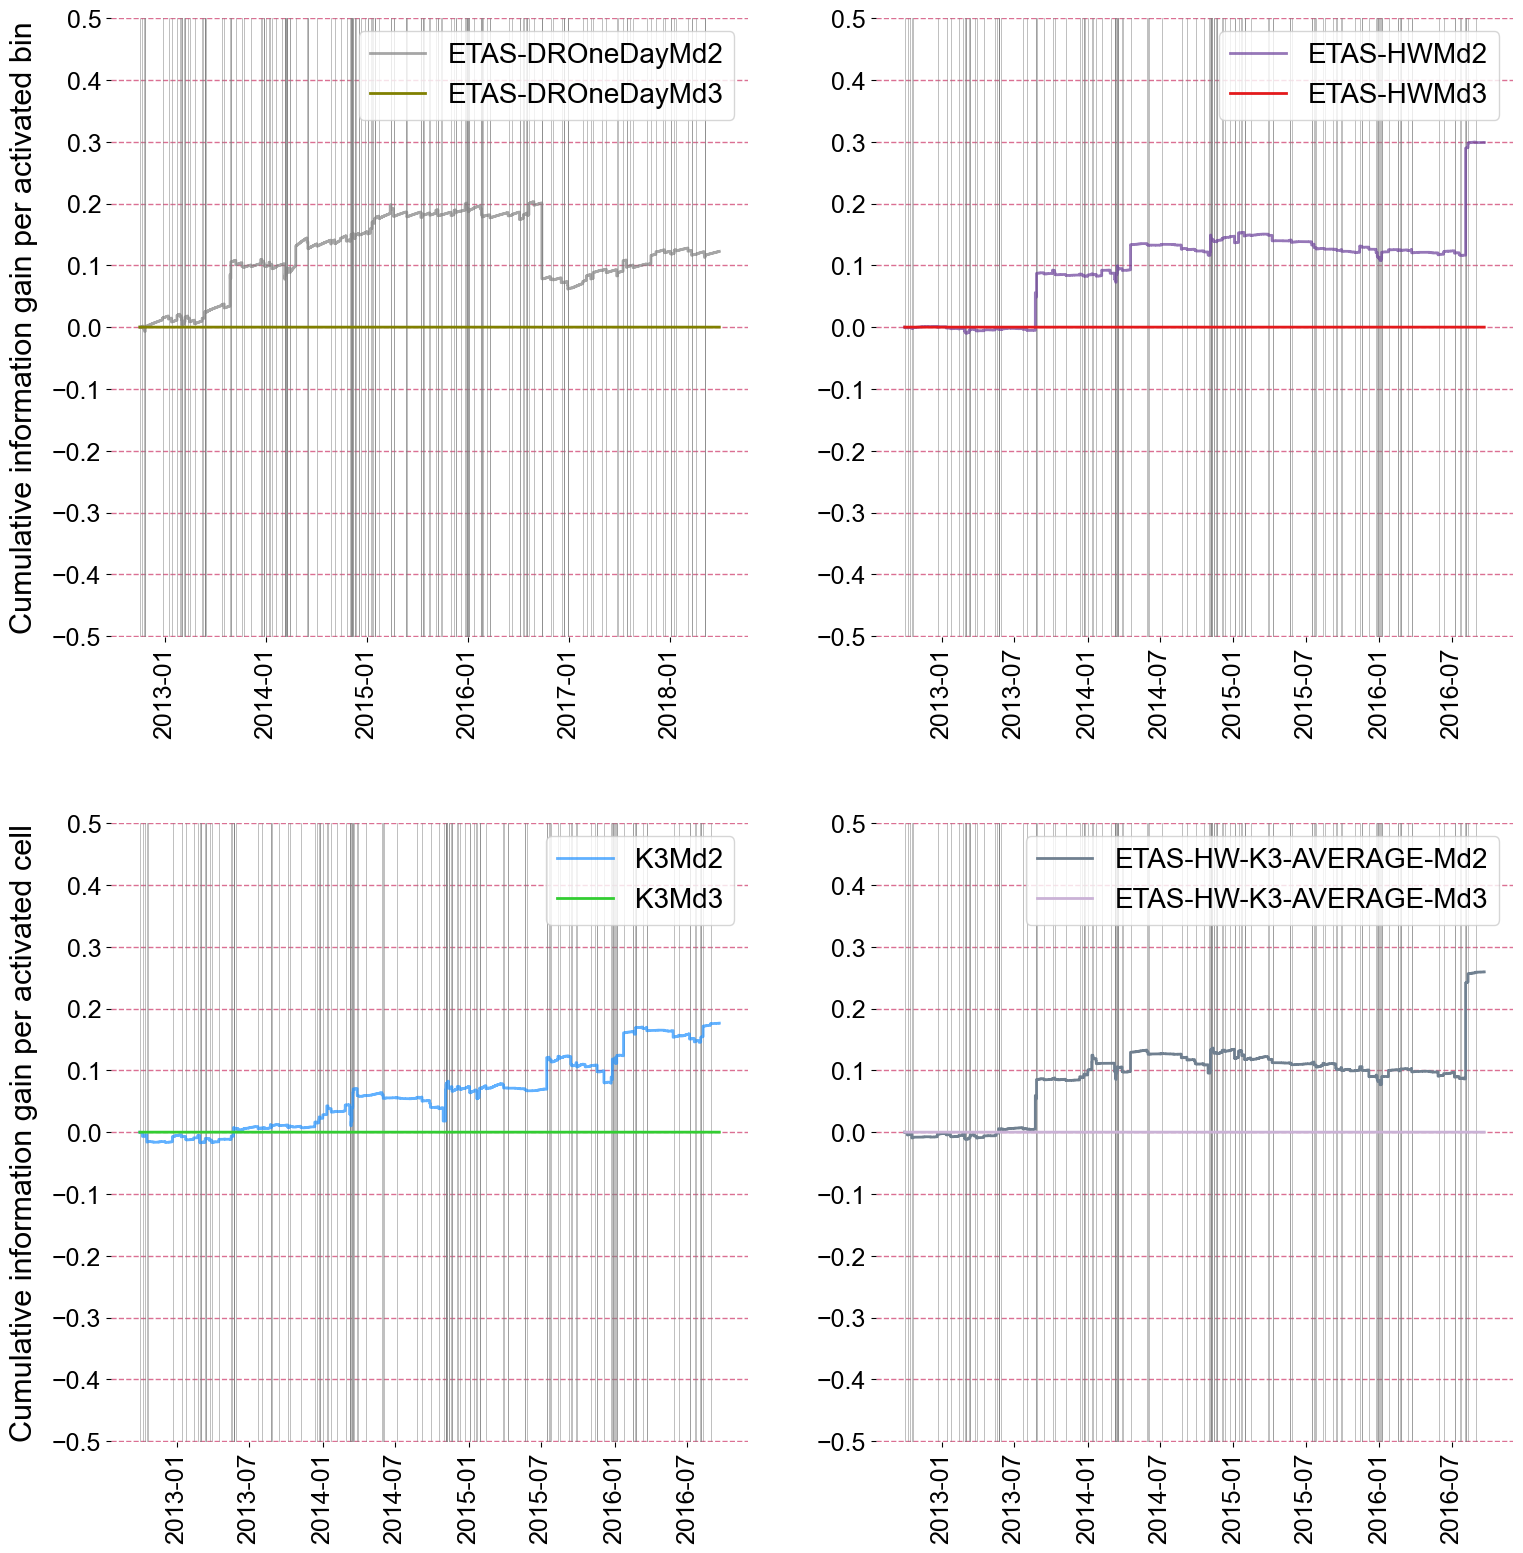

In [274]:
fig, ((ax_1,ax_2), (ax_3, ax_4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
fig.tight_layout()

ax_1.set_ylabel('Cumulative information gain per activated bin', fontsize=22, labelpad=10)
ax_1.set_ylim(-0.501, 0.501)
ax_1.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred') 

for i in range(len(catalogue_KJSSFiveYearCalifornia.get_datetimes())):
   ax_1.axvline(catalogue_KJSSFiveYearCalifornia.get_datetimes()[i], color='grey', linewidth=0.5, zorder=2, alpha=0.7)  

ax_1.step(ETAS_DROneDayMd_dates, np.cumsum(ETAS_DROneDayMd.joli_ETAS_DROneDayMd2.values - ETAS_DROneDayMd.joli_ETAS_DROneDayMd3.values) / len(np.unique(catalogue_KJSSFiveYearCalifornia.get_spatial_idx())), alpha=0.7, linewidth=2, color='#808080', where='mid', zorder=2, label='ETAS-DROneDayMd2')
ax_1.step(ETAS_DROneDayMd_dates, np.zeros(len(ETAS_DROneDayMd_dates)), zorder=2, alpha=1, linewidth=2, color='#808000', where='mid', label='ETAS-DROneDayMd3')

ax_1.legend(fontsize =20, loc=1)
plt.setp(ax_1.spines.values(), color="None")
ax_1.yaxis.set_ticks(np.arange(-0.5, 0.501, step=0.1))
ax_1.set_xticklabels(['', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01'])

for tick in ax_1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
    tick.label1.set_rotation(90)

for tick in ax_1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)


ax_2.set_ylim(-0.501, 0.501)
ax_2.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred') 
for i in range(len(catalogue_ETAS_HWMd2.get_datetimes())):
   ax_2.axvline(catalogue_ETAS_HWMd2.get_datetimes()[i], color='grey', linewidth=0.5, zorder=2, alpha=0.7)  

ax_2.step(ETAS_HWMd_dates, np.cumsum(ETAS_HWMd.joli_ETAS_HWMd2.values - ETAS_HWMd.joli_ETAS_HWMd3.values) / len(np.unique(catalogue_ETAS_HWMd2.get_spatial_idx())), alpha=0.7, linewidth=2, color='#6a3d9a', where='mid', zorder=2, label='ETAS-HWMd2')
ax_2.step(ETAS_HWMd_dates, np.zeros(len(ETAS_HWMd_dates)), zorder=2, alpha=1, linewidth=2, color='#e31a1c', where='mid', label='ETAS-HWMd3')

ax_2.legend(fontsize=20, loc=1)
plt.setp(ax_2.spines.values(), color="None")
ax_2.yaxis.set_ticks(np.arange(-0.5, 0.501, step=0.1))

for tick in ax_2.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
    tick.label1.set_rotation(90)

for tick in ax_2.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)


ax_3.set_ylabel('Cumulative information gain per activated cell', fontsize=22, labelpad=10)
ax_3.set_ylim(-0.501, 0.501)
ax_3.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred') 

for i in range(len(catalogue_ETAS_HWMd2.get_datetimes())):
   ax_3.axvline(catalogue_ETAS_HWMd2.get_datetimes()[i], color='grey', linewidth=0.5, zorder=2, alpha=0.7)  

ax_3.step(K3Md_dates, np.cumsum(K3Md.joli_K3Md2.values - K3Md.joli_K3Md3.values) / len(np.unique(catalogue_ETAS_HWMd2.get_spatial_idx())), alpha=0.7, linewidth=2, color='dodgerblue', where='mid', zorder=2, label='K3Md2')
ax_3.step(K3Md_dates, np.zeros(len(K3Md_dates)), zorder=2, alpha=1, linewidth=2, color='limegreen', where='mid', label='K3Md3')

ax_3.legend(fontsize=20, loc=1)
plt.setp(ax_3.spines.values(), color="None")
ax_3.yaxis.set_ticks(np.arange(-0.5, 0.501, step=0.1))

for tick in ax_3.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
    tick.label1.set_rotation(90)

for tick in ax_3.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)


ax_4.set_ylim(-0.501, 0.501)
ax_4.grid(axis="y", linestyle='--', linewidth=1, zorder=0, color='palevioletred') 

for i in range(len(catalogue_ETAS_HWMd2.get_datetimes())):
   ax_4.axvline(catalogue_ETAS_HWMd2.get_datetimes()[i], color='grey', linewidth=0.5, zorder=2, alpha=0.7)  

ax_4.step(ETAS_HW_K3_AVERAGE_Md_dates, np.cumsum(ETAS_HW_K3_AVERAGE_Md.joli_ETAS_HW_K3_Md2.values - ETAS_HW_K3_AVERAGE_Md.joli_ETAS_HW_K3_Md3.values) / len(np.unique(catalogue_ETAS_HWMd2.get_spatial_idx())), alpha=1, linewidth=2, color='#708090', where='mid', zorder=2, label='ETAS-HW-K3-AVERAGE-Md2')
ax_4.step(ETAS_HW_K3_AVERAGE_Md_dates, np.zeros(len(ETAS_HW_K3_AVERAGE_Md_dates)), zorder=2, alpha=1, linewidth=2, color='#cab2d6', where='mid', label='ETAS-HW-K3-AVERAGE-Md3')

ax_4.legend(fontsize=20, loc=1)
plt.setp(ax_4.spines.values(), color="None")
ax_4.yaxis.set_ticks(np.arange(-0.5, 0.501, step=0.1))

for tick in ax_4.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
    tick.label1.set_rotation(90)

for tick in ax_4.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)    

plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.savefig('expected_outputs/FigureS11.png', dpi=150, bbox_inches = 'tight')

In [275]:
pv_ETAS_DROneDayMd = stats.ttest_rel(ETAS_DROneDayMd.joli_ETAS_DROneDayMd2.values, ETAS_DROneDayMd.joli_ETAS_DROneDayMd3.values).pvalue
pv_ETAS_HWMd = stats.ttest_rel(ETAS_HWMd.joli_ETAS_HWMd2.values, ETAS_HWMd.joli_ETAS_HWMd3.values).pvalue
pv_K3Md = stats.ttest_rel(K3Md.joli_K3Md2.values, K3Md.joli_K3Md3.values).pvalue
pv_ETAS_HW_K3_AVERAGE_Md = stats.ttest_rel(ETAS_HW_K3_AVERAGE_Md.joli_ETAS_HW_K3_Md2.values, ETAS_HW_K3_AVERAGE_Md.joli_ETAS_HW_K3_Md3.values).pvalue